##  ライブラリー、データの読み込み

In [738]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [739]:
df_train = pd.read_csv("train.csv")
df_test = pd.read_csv("test.csv")
#df_gender = pd.read_csv("gender_submission.csv")
all_data = pd.concat([df_train, df_test], axis=0)

In [740]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [741]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [742]:
all_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Survived     891 non-null    float64
 2   Pclass       1309 non-null   int64  
 3   Name         1309 non-null   object 
 4   Sex          1309 non-null   object 
 5   Age          1046 non-null   float64
 6   SibSp        1309 non-null   int64  
 7   Parch        1309 non-null   int64  
 8   Ticket       1309 non-null   object 
 9   Fare         1308 non-null   float64
 10  Cabin        295 non-null    object 
 11  Embarked     1307 non-null   object 
dtypes: float64(3), int64(4), object(5)
memory usage: 132.9+ KB


In [743]:
df_train.describe(include=['O'])

Name   Sex Ticket Cabin Embarked
count                   891   891    891   204      889
unique                  891     2    681   147        3
top     Gaskell, Mr. Alfred  male   1601    G6        S
freq                      1   577      7     4      644

###  文字列を数値に置き換える。カテゴリー化

In [744]:
# 文字列を数字に置き換える
# sex            male⇒0, female⇒1
# Embarked       C ⇒0, S⇒1, Q⇒2

all_data["Sex"] = all_data["Sex"].apply(lambda x: 0 if x == "male" else 1 )

Embarked_dict = {"C":0, "S":1, "Q":2}
all_data["Embarked"] = all_data["Embarked"].map(Embarked_dict)

In [745]:
# Ticketをカテゴリー化

all_data["Ticket_category"] = all_data["Ticket"].apply(lambda x: x[0:3])
all_data["Ticket_category"] = all_data["Ticket_category"].astype("category")
all_data["Ticket_category"] = all_data["Ticket_category"].cat.codes

df_train=all_data.iloc[:891, :]

##  データを視覚化

In [746]:
df_train = all_data.iloc[0:891]
df_test = all_data.iloc[891:]

In [747]:
df_train.head()

PassengerId  Survived  Pclass  \
0            1       0.0       3   
1            2       1.0       1   
2            3       1.0       3   
3            4       1.0       1   
4            5       0.0       3   

                                                Name  Sex   Age  SibSp  Parch  \
0                            Braund, Mr. Owen Harris    0  22.0      1      0   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...    1  38.0      1      0   
2                             Heikkinen, Miss. Laina    1  26.0      0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)    1  35.0      1      0   
4                           Allen, Mr. William Henry    0  35.0      0      0   

             Ticket     Fare Cabin  Embarked  Ticket_category  
0         A/5 21171   7.2500   NaN       1.0              139  
1          PC 17599  71.2833   C85       0.0              154  
2  STON/O2. 3101282   7.9250   NaN       1.0              165  
3            113803  53.1000  C123       1.0                3  
4            373450   8.0500   NaN       1.0              108

In [748]:
feature_name = "Pclass"
df_train[[feature_name, "Survived"]].groupby(feature_name).mean()

Survived
Pclass          
1       0.629630
2       0.472826
3       0.242363

In [749]:
feature_name = "Sex"
df_train[[feature_name, "Survived"]].groupby(feature_name).mean()

Survived
Sex          
0    0.188908
1    0.742038

In [750]:
feature_name = "Age"
df_train[[feature_name, "Survived"]].groupby(feature_name).mean()

Survived
Age            
0.42        1.0
0.67        1.0
0.75        1.0
0.83        1.0
0.92        1.0
...         ...
70.00       0.0
70.50       0.0
71.00       0.0
74.00       0.0
80.00       1.0

[88 rows x 1 columns]

In [751]:
feature_name = "SibSp"
df_train[[feature_name, "Survived"]].groupby(feature_name).mean()

Survived
SibSp          
0      0.345395
1      0.535885
2      0.464286
3      0.250000
4      0.166667
5      0.000000
8      0.000000

In [752]:
feature_name = "Parch"
df_train[[feature_name, "Survived"]].groupby(feature_name).mean()

Survived
Parch          
0      0.343658
1      0.550847
2      0.500000
3      0.600000
4      0.000000
5      0.200000
6      0.000000

In [753]:
feature_name = "Embarked"
df_train[[feature_name, "Survived"]].groupby(feature_name).mean()

Survived
Embarked          
0.0       0.553571
1.0       0.336957
2.0       0.389610

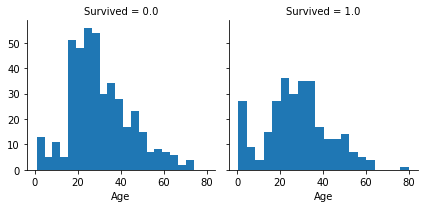

In [754]:
g = sns.FacetGrid(df_train, col='Survived')
g.map(plt.hist, 'Age', bins=20)

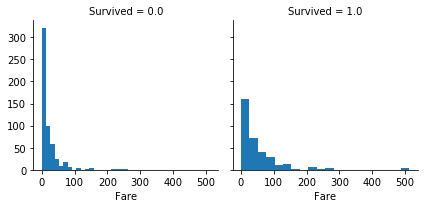

In [699]:
g = sns.FacetGrid(df_train, col='Survived')
g.map(plt.hist, 'Fare', bins=20)

C:\Users\takas\anaconda3\envs\keras_env\lib\site-packages\seaborn\axisgrid.py:243: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


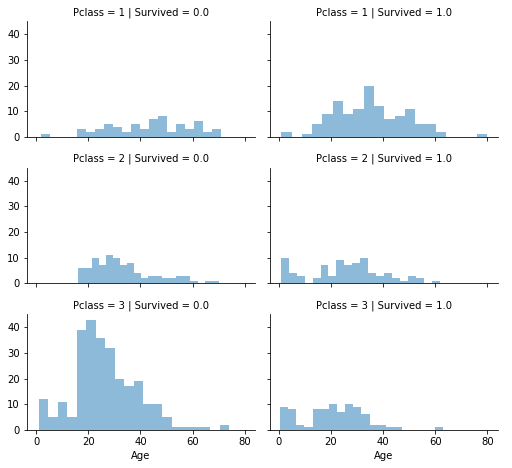

In [700]:
# grid = sns.FacetGrid(train_df, col='Pclass', hue='Survived')
grid = sns.FacetGrid(df_train, col='Survived', row='Pclass', size=2.2, aspect=1.6)
grid.map(plt.hist, 'Age', alpha=.5, bins=20)
grid.add_legend();

C:\Users\takas\anaconda3\envs\keras_env\lib\site-packages\seaborn\axisgrid.py:723: UserWarning: Using the pointplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)
C:\Users\takas\anaconda3\envs\keras_env\lib\site-packages\seaborn\axisgrid.py:728: UserWarning: Using the pointplot function without specifying `hue_order` is likely to produce an incorrect plot.
  warnings.warn(warning)


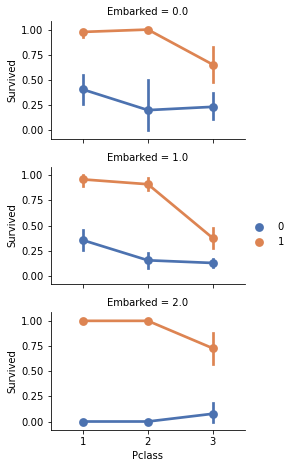

In [701]:
# grid = sns.FacetGrid(train_df, col='Embarked')
grid = sns.FacetGrid(df_train, row='Embarked', size=2.2, aspect=1.6)
grid.map(sns.pointplot, 'Pclass', 'Survived', 'Sex', palette='deep')
grid.add_legend()

In [755]:
all_data

PassengerId  Survived  Pclass  \
0              1       0.0       3   
1              2       1.0       1   
2              3       1.0       3   
3              4       1.0       1   
4              5       0.0       3   
..           ...       ...     ...   
413         1305       NaN       3   
414         1306       NaN       1   
415         1307       NaN       3   
416         1308       NaN       3   
417         1309       NaN       3   

                                                  Name  Sex   Age  SibSp  \
0                              Braund, Mr. Owen Harris    0  22.0      1   
1    Cumings, Mrs. John Bradley (Florence Briggs Th...    1  38.0      1   
2                               Heikkinen, Miss. Laina    1  26.0      0   
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)    1  35.0      1   
4                             Allen, Mr. William Henry    0  35.0      0   
..                                                 ...  ...   ...    ...   
413                                 Spector, Mr. Woolf    0   NaN      0   
414                       Oliva y Ocana, Dona. Fermina    1  39.0      0   
415                       Saether, Mr. Simon Sivertsen    0  38.5      0   
416                                Ware, Mr. Frederick    0   NaN      0   
417                           Peter, Master. Michael J    0   NaN      1   

     Parch              Ticket      Fare Cabin  Embarked  Ticket_category  
0        0           A/5 21171    7.2500   NaN       1.0              139  
1        0            PC 17599   71.2833   C85       0.0              154  
2        0    STON/O2. 3101282    7.9250   NaN       1.0              165  
3        0              113803   53.1000  C123       1.0                3  
4        0              373450    8.0500   NaN       1.0              108  
..     ...                 ...       ...   ...       ...              ...  
413      0           A.5. 3236    8.0500   NaN       1.0              137  
414      0            PC 17758  108.9000  C105       0.0              154  
415      0  SOTON/O.Q. 3101262    7.2500   NaN       1.0              164  
416      0              359309    8.0500   NaN       1.0               96  
417      1                2668   22.3583   NaN       0.0               57  

[1309 rows x 13 columns]

In [703]:
# sns.pairplot(df_train[["Pclass", "Survived", "Sex", "Age", "SibSp", "Parch", "Fare", "Embarked", "Ticket_category"]], hue="Survived")

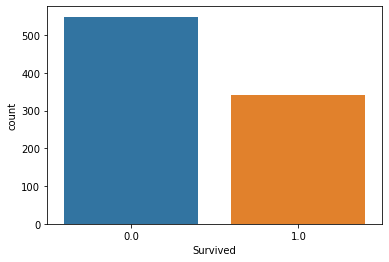

In [704]:
sns.countplot(df_train["Survived"])

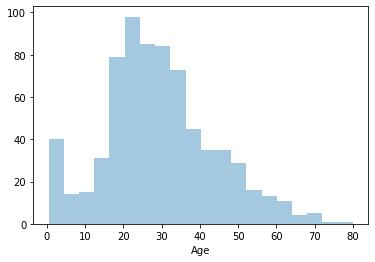

In [705]:
sns.distplot(df_train["Age"], kde=False)

In [706]:
df_train[["Survived","Cabin"]].groupby("Survived").describe()

Cabin                     
         count unique      top freq
Survived                           
0.0         68     62       G6    2
1.0        136    101  B96 B98    4

##  データの前処理

###  欠損値処理("Embarked")

In [756]:
all_data[all_data["Embarked"].isnull()]

PassengerId  Survived  Pclass                                       Name  \
61            62       1.0       1                        Icard, Miss. Amelie   
829          830       1.0       1  Stone, Mrs. George Nelson (Martha Evelyn)   

     Sex   Age  SibSp  Parch  Ticket  Fare Cabin  Embarked  Ticket_category  
61     1  38.0      0      0  113572  80.0   B28       NaN                3  
829    1  62.0      0      0  113572  80.0   B28       NaN                3

In [757]:
all_data["Embarked"].value_counts()

1.0    914
0.0    270
2.0    123
Name: Embarked, dtype: int64

In [758]:
all_data["Embarked"] = all_data["Embarked"].fillna(1)

In [759]:
all_data["Embarked"].value_counts()

1.0    916
0.0    270
2.0    123
Name: Embarked, dtype: int64

###  欠損値処理("Age")

In [760]:
all_data[all_data["Age"].isnull()]

PassengerId  Survived  Pclass                             Name  Sex  Age  \
5              6       0.0       3                 Moran, Mr. James    0  NaN   
17            18       1.0       2     Williams, Mr. Charles Eugene    0  NaN   
19            20       1.0       3          Masselmani, Mrs. Fatima    1  NaN   
26            27       0.0       3          Emir, Mr. Farred Chehab    0  NaN   
28            29       1.0       3    O'Dwyer, Miss. Ellen "Nellie"    1  NaN   
..           ...       ...     ...                              ...  ...  ...   
408         1300       NaN       3  Riordan, Miss. Johanna Hannah""    1  NaN   
410         1302       NaN       3           Naughton, Miss. Hannah    1  NaN   
413         1305       NaN       3               Spector, Mr. Woolf    0  NaN   
416         1308       NaN       3              Ware, Mr. Frederick    0  NaN   
417         1309       NaN       3         Peter, Master. Michael J    0  NaN   

     SibSp  Parch     Ticket     Fare Cabin  Embarked  Ticket_category  
5        0      0     330877   8.4583   NaN       2.0               81  
17       0      0     244373  13.0000   NaN       1.0               49  
19       0      0       2649   7.2250   NaN       0.0               55  
26       0      0       2631   7.2250   NaN       0.0               54  
28       0      0     330959   7.8792   NaN       2.0               81  
..     ...    ...        ...      ...   ...       ...              ...  
408      0      0     334915   7.7208   NaN       2.0               82  
410      0      0     365237   7.7500   NaN       2.0              100  
413      0      0  A.5. 3236   8.0500   NaN       1.0              137  
416      0      0     359309   8.0500   NaN       1.0               96  
417      1      1       2668  22.3583   NaN       0.0               57  

[263 rows x 13 columns]

In [761]:
#Ageが欠損している人についての名前
all_data[all_data["Age"].isnull()]["Name"].apply(lambda x:x.split(",")[1].split(".")[0].replace(" ","" )).value_counts()

Mr        176
Miss       50
Mrs        27
Master      8
Dr          1
Ms          1
Name: Name, dtype: int64

In [762]:
#全員の名前
all_data["Name"].apply(lambda x: x.split(",")[1].split(".")[0].replace(" ","" )).value_counts()

Mr             757
Miss           260
Mrs            197
Master          61
Dr               8
Rev              8
Col              4
Major            2
Mlle             2
Ms               2
theCountess      1
Dona             1
Lady             1
Capt             1
Don              1
Sir              1
Mme              1
Jonkheer         1
Name: Name, dtype: int64

## ↑名前から年齢を予測してみる

In [763]:
all_data["Name_"] = all_data["Name"].apply(lambda x: x.split(",")[1].split(".")[0].replace(" ","" ))

In [764]:
# Mrの年齢層
print(all_data[all_data["Name_"].values == "Mr"]["Age"].describe())
print("median=", all_data[all_data["Name_"].values == "Mr"]["Age"].median())
age_Mr = all_data[all_data["Name_"].values == "Mr"]["Age"].median()
#29歳程度だとわかる

count    581.000000
mean      32.252151
std       12.422089
min       11.000000
25%       23.000000
50%       29.000000
75%       39.000000
max       80.000000
Name: Age, dtype: float64
median= 29.0


In [765]:
# Missの年齢層
print(all_data[all_data["Name_"].values == "Miss"]["Age"].describe())
print("median=", all_data[all_data["Name_"].values == "Miss"]["Age"].median())

#22歳程度だとわかる

count    210.000000
mean      21.774238
std       12.249077
min        0.170000
25%       15.000000
50%       22.000000
75%       30.000000
max       63.000000
Name: Age, dtype: float64
median= 22.0


In [766]:
# Mrsの年齢層
print(all_data[all_data["Name_"].values == "Mrs"]["Age"].describe())
print("median=", all_data[all_data["Name_"].values == "Mrs"]["Age"].median())

#36歳程度だとわかる

count    170.000000
mean      36.994118
std       12.901767
min       14.000000
25%       27.000000
50%       35.500000
75%       46.500000
max       76.000000
Name: Age, dtype: float64
median= 35.5


In [767]:
# Masterの年齢層
print(all_data[all_data["Name_"].values == "Master"]["Age"].describe())
print("median=", all_data[all_data["Name_"].values == "Master"]["Age"].median())

#5歳程度だとわかる

count    53.000000
mean      5.482642
std       4.161554
min       0.330000
25%       2.000000
50%       4.000000
75%       9.000000
max      14.500000
Name: Age, dtype: float64
median= 4.0


In [768]:
# Drの年齢層
print(all_data[all_data["Name_"].values == "Dr"]["Age"].describe())
print("median=", all_data[all_data["Name_"].values == "Dr"]["Age"].median())

#49歳程度だとわかる

count     7.000000
mean     43.571429
std      11.731115
min      23.000000
25%      38.000000
50%      49.000000
75%      51.500000
max      54.000000
Name: Age, dtype: float64
median= 49.0


In [769]:
# Msの年齢層
print(all_data[all_data["Name_"].values == "Ms"]["Age"].describe())
print("median=", all_data[all_data["Name_"].values == "Ms"]["Age"].median())

#49歳程度だとわかる

count     1.0
mean     28.0
std       NaN
min      28.0
25%      28.0
50%      28.0
75%      28.0
max      28.0
Name: Age, dtype: float64
median= 28.0


In [770]:
#各名前の中間値をリスト化する
agelack_name = all_data[all_data["Age"].isnull()]["Name"].apply(lambda x:x.split(",")[1].split(".")[0].replace(" ","" )).value_counts().index
age_med_list = []
for idx, i in enumerate(agelack_name):
    age_med_list.append(all_data[all_data["Name_"].values == i]["Age"].median())
print(agelack_name)
age_med_list

Index(['Mr', 'Miss', 'Mrs', 'Master', 'Dr', 'Ms'], dtype='object')


[29.0, 22.0, 35.5, 4.0, 49.0, 28.0]

##  ★ここから　Name_情報から中間値をAgeに代入する

In [771]:
for idx, i in enumerate(agelack_name):
    all_data["Age"] = all_data.apply(lambda x: age_med_list[idx] if x["Name_"] == i and np.isnan(x["Age"])  else x["Age"], axis=1)
all_data.head()

PassengerId  Survived  Pclass  \
0            1       0.0       3   
1            2       1.0       1   
2            3       1.0       3   
3            4       1.0       1   
4            5       0.0       3   

                                                Name  Sex   Age  SibSp  Parch  \
0                            Braund, Mr. Owen Harris    0  22.0      1      0   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...    1  38.0      1      0   
2                             Heikkinen, Miss. Laina    1  26.0      0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)    1  35.0      1      0   
4                           Allen, Mr. William Henry    0  35.0      0      0   

             Ticket     Fare Cabin  Embarked  Ticket_category Name_  
0         A/5 21171   7.2500   NaN       1.0              139    Mr  
1          PC 17599  71.2833   C85       0.0              154   Mrs  
2  STON/O2. 3101282   7.9250   NaN       1.0              165  Miss  
3            113803  53.1000  C123       1.0                3   Mrs  
4            373450   8.0500   NaN       1.0              108    Mr

In [772]:
all_data[all_data["Age"].isnull()] #Age列の欠損値がなくなった

Empty DataFrame
Columns: [PassengerId, Survived, Pclass, Name, Sex, Age, SibSp, Parch, Ticket, Fare, Cabin, Embarked, Ticket_category, Name_]
Index: []

In [773]:
all_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 0 to 417
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   PassengerId      1309 non-null   int64  
 1   Survived         891 non-null    float64
 2   Pclass           1309 non-null   int64  
 3   Name             1309 non-null   object 
 4   Sex              1309 non-null   int64  
 5   Age              1309 non-null   float64
 6   SibSp            1309 non-null   int64  
 7   Parch            1309 non-null   int64  
 8   Ticket           1309 non-null   object 
 9   Fare             1308 non-null   float64
 10  Cabin            295 non-null    object 
 11  Embarked         1309 non-null   float64
 12  Ticket_category  1309 non-null   int16  
 13  Name_            1309 non-null   object 
dtypes: float64(4), int16(1), int64(5), object(4)
memory usage: 145.7+ KB


##  欠損値処理（"Fare"）

In [774]:
all_data[all_data["Fare"].isnull()]

PassengerId  Survived  Pclass                Name  Sex   Age  SibSp  \
152         1044       NaN       3  Storey, Mr. Thomas    0  60.5      0   

     Parch Ticket  Fare Cabin  Embarked  Ticket_category Name_  
152      0   3701   NaN   NaN       1.0              105    Mr

In [775]:
all_data.groupby("Pclass").median()["Fare"]

Pclass
1    60.0000
2    15.0458
3     8.0500
Name: Fare, dtype: float64

In [776]:
all_data["Fare"] = all_data["Fare"].apply(lambda x: all_data.groupby("Pclass").median()["Fare"][3] if np.isnan(x) else x)

In [777]:
all_data[all_data["Fare"].isnull()]

Empty DataFrame
Columns: [PassengerId, Survived, Pclass, Name, Sex, Age, SibSp, Parch, Ticket, Fare, Cabin, Embarked, Ticket_category, Name_]
Index: []

In [778]:
all_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 0 to 417
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   PassengerId      1309 non-null   int64  
 1   Survived         891 non-null    float64
 2   Pclass           1309 non-null   int64  
 3   Name             1309 non-null   object 
 4   Sex              1309 non-null   int64  
 5   Age              1309 non-null   float64
 6   SibSp            1309 non-null   int64  
 7   Parch            1309 non-null   int64  
 8   Ticket           1309 non-null   object 
 9   Fare             1309 non-null   float64
 10  Cabin            295 non-null    object 
 11  Embarked         1309 non-null   float64
 12  Ticket_category  1309 non-null   int16  
 13  Name_            1309 non-null   object 
dtypes: float64(4), int16(1), int64(5), object(4)
memory usage: 145.7+ KB


##  連続値の特徴量（"Age", "Fare"）を領域分けする

In [781]:
all_data["Age_band"] = pd.cut(all_data["Age"], 10)
all_data[["Age_band", "Survived"]].groupby("Age_band").mean()

Survived
Age_band                  
(0.0902, 8.153]   0.655172
(8.153, 16.136]   0.413043
(16.136, 24.119]  0.399061
(24.119, 32.102]  0.274306
(32.102, 40.085]  0.488889
(40.085, 48.068]  0.342857
(48.068, 56.051]  0.456522
(56.051, 64.034]  0.375000
(64.034, 72.017]  0.000000
(72.017, 80.0]    0.500000

In [782]:
all_data[["Age_band", "Survived"]].groupby("Age_band").count()

Survived
Age_band                  
(0.0902, 8.153]         58
(8.153, 16.136]         46
(16.136, 24.119]       213
(24.119, 32.102]       288
(32.102, 40.085]       135
(40.085, 48.068]        70
(48.068, 56.051]        46
(56.051, 64.034]        24
(64.034, 72.017]         9
(72.017, 80.0]           2

In [737]:
all_data

PassengerId  Survived  Pclass  \
0              1       0.0       3   
1              2       1.0       1   
2              3       1.0       3   
3              4       1.0       1   
4              5       0.0       3   
..           ...       ...     ...   
413         1305       NaN       3   
414         1306       NaN       1   
415         1307       NaN       3   
416         1308       NaN       3   
417         1309       NaN       3   

                                                  Name  Sex  Age  SibSp  \
0                              Braund, Mr. Owen Harris    0  1.0      1   
1    Cumings, Mrs. John Bradley (Florence Briggs Th...    1  2.0      1   
2                               Heikkinen, Miss. Laina    1  1.0      0   
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)    1  2.0      1   
4                             Allen, Mr. William Henry    0  2.0      0   
..                                                 ...  ...  ...    ...   
413                                 Spector, Mr. Woolf    0  1.0      0   
414                       Oliva y Ocana, Dona. Fermina    1  2.0      0   
415                       Saether, Mr. Simon Sivertsen    0  2.0      0   
416                                Ware, Mr. Frederick    0  1.0      0   
417                           Peter, Master. Michael J    0  0.0      1   

     Parch              Ticket      Fare Cabin  Embarked  Ticket_category  \
0        0           A/5 21171    7.2500   NaN       1.0              139   
1        0            PC 17599   71.2833   C85       0.0              154   
2        0    STON/O2. 3101282    7.9250   NaN       1.0              165   
3        0              113803   53.1000  C123       1.0                3   
4        0              373450    8.0500   NaN       1.0              108   
..     ...                 ...       ...   ...       ...              ...   
413      0           A.5. 3236    8.0500   NaN       1.0              137   
414      0            PC 17758  108.9000  C105       0.0              154   
415      0  SOTON/O.Q. 3101262    7.2500   NaN       1.0              164   
416      0              359309    8.0500   NaN       1.0               96   
417      1                2668   22.3583   NaN       0.0               57   

      Name_       Age_band  
0        Mr     (0.8, 1.2]  
1       Mrs     (1.6, 2.0]  
2      Miss     (0.8, 1.2]  
3       Mrs     (1.6, 2.0]  
4        Mr     (1.6, 2.0]  
..      ...            ...  
413      Mr     (0.8, 1.2]  
414    Dona     (1.6, 2.0]  
415      Mr     (1.6, 2.0]  
416      Mr     (0.8, 1.2]  
417  Master  (-0.004, 0.4]  

[1309 rows x 15 columns]

In [732]:
all_data["Age"] = all_data["Age"].apply(lambda x: 0 if x <= 16.136 else x)
all_data["Age"] = all_data["Age"].apply(lambda x: 1 if (x > 16.136)&(x <= 32.102) else x)
all_data["Age"] = all_data["Age"].apply(lambda x: 2 if (x > 32.102)&(x <= 48.068) else x)
all_data["Age"] = all_data["Age"].apply(lambda x: 3 if (x > 48.068)&(x <= 64.034) else x)
all_data["Age"] = all_data["Age"].apply(lambda x: 4 if x > 64.034 else x)

In [515]:
all_data["Fare"] = all_data["Fare"].apply(lambda x: 0 if x <= 102.466 else x)
all_data["Fare"] = all_data["Fare"].apply(lambda x: 1 if (x > 102.466)&(x <= 204.932) else x)
all_data["Fare"] = all_data["Fare"].apply(lambda x: 2 if (x > 204.932)&(x <= 307.398) else x)
all_data["Fare"] = all_data["Fare"].apply(lambda x: 3 if (x > 307.398)&(x <= 409.863) else x)
all_data["Fare"] = all_data["Fare"].apply(lambda x: 4 if x > 409.863 else x)

##  団体人数を設定

In [516]:
all_data["Family_size"] = all_data.apply(lambda x: x["SibSp"]+x["Parch"]+1, axis=1)
all_data[["Family_size", "Survived"]].groupby("Family_size").mean()

Survived
Family_size          
1            0.303538
2            0.552795
3            0.578431
4            0.724138
5            0.200000
6            0.136364
7            0.333333
8            0.000000
11           0.000000

In [517]:
all_data[["Family_size", "Survived"]].groupby("Family_size").count()

Survived
Family_size          
1                 537
2                 161
3                 102
4                  29
5                  15
6                  22
7                  12
8                   6
11                  7

In [518]:
all_data["Alone"] = all_data["Family_size"].apply(lambda x: 0 if x==1 else 1)

In [519]:
all_data[["Alone", "Survived"]].groupby("Alone").mean()

Survived
Alone          
0      0.303538
1      0.505650

In [520]:
all_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 0 to 417
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype   
---  ------           --------------  -----   
 0   PassengerId      1309 non-null   int64   
 1   Survived         891 non-null    float64 
 2   Pclass           1309 non-null   int64   
 3   Name             1309 non-null   object  
 4   Sex              1309 non-null   int64   
 5   Age              1309 non-null   float64 
 6   SibSp            1309 non-null   int64   
 7   Parch            1309 non-null   int64   
 8   Ticket           1309 non-null   object  
 9   Fare             1309 non-null   float64 
 10  Cabin            295 non-null    object  
 11  Embarked         1309 non-null   float64 
 12  Ticket_category  1309 non-null   int16   
 13  Name_            1309 non-null   object  
 14  Age_band         1309 non-null   category
 15  Family_size      1309 non-null   int64   
 16  Alone            1309 non-null   int64   
d

##  学習させる

In [521]:
from sklearn.model_selection import train_test_split

X = all_data.iloc[:891,:][["Pclass", "Sex", "Age", "Fare", "Embarked", "Family_size"]]
y = all_data.iloc[:891,:]["Survived"]
X_val = all_data.iloc[891:,:][["Pclass", "Sex", "Age", "Fare", "Embarked", "Family_size"]]
y_val = all_data.iloc[891:,:]["Survived"]
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8)

In [522]:
X_train

Pclass  Sex  Age  Fare  Embarked  Family_size
384       3    0  1.0   0.0       1.0            1
82        3    1  1.0   0.0       2.0            1
99        2    0  2.0   0.0       1.0            2
779       1    1  2.0   2.0       1.0            2
340       2    0  0.0   0.0       1.0            3
..      ...  ...  ...   ...       ...          ...
379       3    0  1.0   0.0       1.0            1
92        1    0  2.0   0.0       1.0            2
640       3    0  1.0   0.0       1.0            1
26        3    0  1.0   0.0       0.0            1
353       3    0  1.0   0.0       1.0            2

[712 rows x 6 columns]

##  RandomForestで実装

In [629]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import MinMaxScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV

clf = RandomForestClassifier()
clf.fit(X_train, y_train)

RandomForestClassifier()

In [628]:
params = {"n_estimators":[i for i in range(50, 202, 10)],
         "criterion":["gini", "entropy"],
         "max_depth":[i for i in range(1,10)],
         }

gs = GridSearchCV(clf, params)
gs.fit(X_train, y_train)

ValueError: Invalid parameter criterion for estimator MLPClassifier(). Check the list of available parameters with `estimator.get_params().keys()`.

In [634]:
params = {"n_estimators":[60],
         "criterion":["gini"],
         "max_depth":[6],
         }

gs = GridSearchCV(clf, params)
gs.fit(X_train, y_train)

GridSearchCV(estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini'], 'max_depth': [6],
                         'n_estimators': [60]})

In [635]:
gs.best_params_

{'criterion': 'gini', 'max_depth': 6, 'n_estimators': 60}

In [636]:
gs.best_estimator_

RandomForestClassifier(max_depth=6, n_estimators=60)

In [637]:
gs.best_score_

0.8033192159952722

In [638]:
gs.best_estimator_.score(X_test, y_test)

0.8547486033519553

In [639]:
gs.score(X_test, y_test)

0.8547486033519553

In [640]:
pretest_RF = gs.predict(X)
pretest_RF

array([0., 1., 0., 1., 0., 0., 0., 0., 1., 1., 1., 1., 0., 0., 1., 1., 0.,
       0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 1., 0., 0., 1., 1., 0.,
       0., 0., 0., 0., 1., 1., 1., 1., 0., 1., 1., 0., 0., 1., 0., 0., 0.,
       0., 1., 1., 1., 0., 1., 0., 1., 0., 0., 1., 0., 0., 0., 1., 1., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 1., 0., 1.,
       1., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 1., 0., 1., 0., 0., 1., 0., 0., 0., 0.,
       0., 0., 0., 0., 1., 0., 1., 0., 0., 1., 0., 0., 0., 1., 1., 0., 0.,
       1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0.,
       0., 0., 1., 1., 0., 0., 0., 0., 1., 0., 0., 0., 1., 1., 0., 0., 0.,
       0., 0., 1., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 1., 1., 0., 1.,
       0., 0., 0., 1., 0., 0., 1., 1., 1., 0., 0., 1., 1., 0., 0., 0., 0.,
       0., 1., 0., 0., 1., 0., 0., 1., 0., 0., 0., 1., 0., 0., 1., 0., 0.,
       0., 0., 0., 0., 0.

In [530]:
df_test["Survived"] = gs.predict(X_val)
submit_RF = df_test[["PassengerId", "Survived"]]

C:\Users\takas\anaconda3\envs\keras_env\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [531]:
# from sklearn.ensemble import ExtraTreesClassifier
# ExtraTreesClassifier = ExtraTreesClassifier()
# ExtraTreesClassifier.fit(X_train, y_train)
# y_pred = ExtraTreesClassifier.predict(X_test)
# extraTree_accy = round(accuracy_score(y_pred, y_test), 3)
# print(extraTree_accy)

In [532]:
# from sklearn.gaussian_process import GaussianProcessClassifier
# GaussianProcessClassifier = GaussianProcessClassifier()
# GaussianProcessClassifier.fit(X_train, y_train)
# y_pred = GaussianProcessClassifier.predict(X_test)
# gau_pro_accy = round(accuracy_score(y_pred, y_test), 3)
# print(gau_pro_accy)

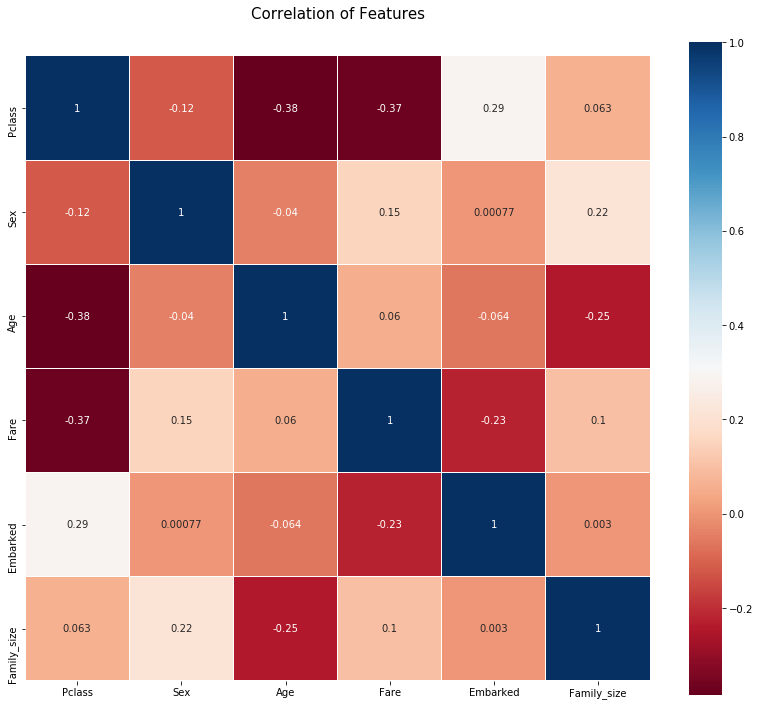

In [533]:
colormap = plt.cm.RdBu
plt.figure(figsize=(14,12))
plt.title('Correlation of Features', y=1.05, size=15)
sns.heatmap(X_train.astype(float).corr(),linewidths=0.1,vmax=1.0, 
            square=True, cmap=colormap, linecolor='white', annot=True)

##  LightGBMで実装

In [534]:
from optuna.integration import lightgbm as lgb

In [641]:
#交差検証k_fold=5で実施
from sklearn.model_selection import KFold
from sklearn.metrics import confusion_matrix, accuracy_score

ss = KFold(n_splits=5, shuffle=True)
param = {
            'objective': 'binary',
            'metric': 'binary_logloss',
            'verbosity': -1,
            'boosting_type': 'gbdt',
        }

acc_list = []
for train_index, val_index in ss.split(X_train, y_train):

    X_train_train, X_train_val = X_train.iloc[train_index], X_train.iloc[val_index]
    y_train_train, y_train_val = y_train.iloc[train_index], y_train.iloc[val_index]
    
    dtrain = lgb.Dataset(X_train_train, label=y_train_train)
    eval_data = lgb.Dataset(X_train_val, label=y_train_val)

    best = lgb.train(param, 
                     dtrain,
                     valid_sets=eval_data,
                     early_stopping_rounds=100)
    predict = best.predict(X_test)
    acc_list.append(accuracy_score(predict.round(), y_test))

acc_list

[I 2020-11-10 21:56:15,365] A new study created in memory with name: no-name-70f6a80c-9314-461d-a137-af7556de17c8
feature_fraction, val_score: 0.486707:  14%|######4                                      | 1/7 [00:00<00:01,  5.05it/s]

[1]	valid_0's binary_logloss: 0.63408
Training until validation scores don't improve for 100 rounds
[2]	valid_0's binary_logloss: 0.605329
[3]	valid_0's binary_logloss: 0.582394
[4]	valid_0's binary_logloss: 0.563987
[5]	valid_0's binary_logloss: 0.548865
[6]	valid_0's binary_logloss: 0.536596
[7]	valid_0's binary_logloss: 0.526418
[8]	valid_0's binary_logloss: 0.517623
[9]	valid_0's binary_logloss: 0.510224
[10]	valid_0's binary_logloss: 0.504642
[11]	valid_0's binary_logloss: 0.500452
[12]	valid_0's binary_logloss: 0.49687
[13]	valid_0's binary_logloss: 0.494275
[14]	valid_0's binary_logloss: 0.49183
[15]	valid_0's binary_logloss: 0.490221
[16]	valid_0's binary_logloss: 0.488671
[17]	valid_0's binary_logloss: 0.487561
[18]	valid_0's binary_logloss: 0.486707
[19]	valid_0's binary_logloss: 0.487185
[20]	valid_0's binary_logloss: 0.487969
[21]	valid_0's binary_logloss: 0.488986
[22]	valid_0's binary_logloss: 0.490125
[23]	valid_0's binary_logloss: 0.490739
[24]	valid_0's binary_logloss:

feature_fraction, val_score: 0.486707:  29%|############8                                | 2/7 [00:00<00:00,  5.04it/s][I 2020-11-10 21:56:15,780] Trial 1 finished with value: 0.49135314992636336 and parameters: {'feature_fraction': 0.6}. Best is trial 0 with value: 0.48670723711279684.


[1]	valid_0's binary_logloss: 0.661706
Training until validation scores don't improve for 100 rounds
[2]	valid_0's binary_logloss: 0.627944
[3]	valid_0's binary_logloss: 0.622265
[4]	valid_0's binary_logloss: 0.618232
[5]	valid_0's binary_logloss: 0.594779
[6]	valid_0's binary_logloss: 0.57833
[7]	valid_0's binary_logloss: 0.561581
[8]	valid_0's binary_logloss: 0.559884
[9]	valid_0's binary_logloss: 0.546685
[10]	valid_0's binary_logloss: 0.545584
[11]	valid_0's binary_logloss: 0.536934
[12]	valid_0's binary_logloss: 0.536526
[13]	valid_0's binary_logloss: 0.536607
[14]	valid_0's binary_logloss: 0.527727
[15]	valid_0's binary_logloss: 0.520395
[16]	valid_0's binary_logloss: 0.520677
[17]	valid_0's binary_logloss: 0.514803
[18]	valid_0's binary_logloss: 0.514872
[19]	valid_0's binary_logloss: 0.515112
[20]	valid_0's binary_logloss: 0.511229
[21]	valid_0's binary_logloss: 0.51097
[22]	valid_0's binary_logloss: 0.507322
[23]	valid_0's binary_logloss: 0.504381
[24]	valid_0's binary_logloss

feature_fraction, val_score: 0.481108:  43%|###################2                         | 3/7 [00:00<00:00,  5.05it/s]

[1]	valid_0's binary_logloss: 0.663513
Training until validation scores don't improve for 100 rounds
[2]	valid_0's binary_logloss: 0.637529
[3]	valid_0's binary_logloss: 0.616443
[4]	valid_0's binary_logloss: 0.599404
[5]	valid_0's binary_logloss: 0.594169
[6]	valid_0's binary_logloss: 0.57561
[7]	valid_0's binary_logloss: 0.572849
[8]	valid_0's binary_logloss: 0.559264
[9]	valid_0's binary_logloss: 0.558535
[10]	valid_0's binary_logloss: 0.546477
[11]	valid_0's binary_logloss: 0.546012
[12]	valid_0's binary_logloss: 0.538531
[13]	valid_0's binary_logloss: 0.532338
[14]	valid_0's binary_logloss: 0.525019
[15]	valid_0's binary_logloss: 0.524807
[16]	valid_0's binary_logloss: 0.518298
[17]	valid_0's binary_logloss: 0.518253
[18]	valid_0's binary_logloss: 0.512925
[19]	valid_0's binary_logloss: 0.509958
[20]	valid_0's binary_logloss: 0.507372
[21]	valid_0's binary_logloss: 0.506062
[22]	valid_0's binary_logloss: 0.503978
[23]	valid_0's binary_logloss: 0.503833
[24]	valid_0's binary_loglos

feature_fraction, val_score: 0.481108:  57%|#########################7                   | 4/7 [00:00<00:00,  4.87it/s]


[131]	valid_0's binary_logloss: 0.507809
[132]	valid_0's binary_logloss: 0.508267
[133]	valid_0's binary_logloss: 0.508681
[134]	valid_0's binary_logloss: 0.508898
[135]	valid_0's binary_logloss: 0.508723
Early stopping, best iteration is:
[35]	valid_0's binary_logloss: 0.491353
[1]	valid_0's binary_logloss: 0.661447
Training until validation scores don't improve for 100 rounds
[2]	valid_0's binary_logloss: 0.627864
[3]	valid_0's binary_logloss: 0.622398
[4]	valid_0's binary_logloss: 0.597323
[5]	valid_0's binary_logloss: 0.577045
[6]	valid_0's binary_logloss: 0.563994
[7]	valid_0's binary_logloss: 0.549836
[8]	valid_0's binary_logloss: 0.548047
[9]	valid_0's binary_logloss: 0.536727
[10]	valid_0's binary_logloss: 0.527384
[11]	valid_0's binary_logloss: 0.519668
[12]	valid_0's binary_logloss: 0.519422
[13]	valid_0's binary_logloss: 0.512616
[14]	valid_0's binary_logloss: 0.507437
[15]	valid_0's binary_logloss: 0.503277
[16]	valid_0's binary_logloss: 0.50079
[17]	valid_0's binary_loglo

feature_fraction, val_score: 0.481108:  71%|################################1            | 5/7 [00:01<00:00,  4.89it/s]


[113]	valid_0's binary_logloss: 0.522303
[114]	valid_0's binary_logloss: 0.52274
[115]	valid_0's binary_logloss: 0.523153
[116]	valid_0's binary_logloss: 0.523283
[117]	valid_0's binary_logloss: 0.52295
[118]	valid_0's binary_logloss: 0.523416
[119]	valid_0's binary_logloss: 0.523611
[120]	valid_0's binary_logloss: 0.52406
[121]	valid_0's binary_logloss: 0.524056
[122]	valid_0's binary_logloss: 0.524845
[123]	valid_0's binary_logloss: 0.525047
[124]	valid_0's binary_logloss: 0.525
[125]	valid_0's binary_logloss: 0.524889
[126]	valid_0's binary_logloss: 0.525259
[127]	valid_0's binary_logloss: 0.525555
Early stopping, best iteration is:
[27]	valid_0's binary_logloss: 0.487757
[1]	valid_0's binary_logloss: 0.661447
Training until validation scores don't improve for 100 rounds
[2]	valid_0's binary_logloss: 0.627864
[3]	valid_0's binary_logloss: 0.622398
[4]	valid_0's binary_logloss: 0.597323
[5]	valid_0's binary_logloss: 0.577045
[6]	valid_0's binary_logloss: 0.563994
[7]	valid_0's binar

feature_fraction, val_score: 0.481108:  86%|######################################5      | 6/7 [00:01<00:00,  4.84it/s]


[99]	valid_0's binary_logloss: 0.52072
[100]	valid_0's binary_logloss: 0.521264
[101]	valid_0's binary_logloss: 0.521549
[102]	valid_0's binary_logloss: 0.5217
[103]	valid_0's binary_logloss: 0.52201
[104]	valid_0's binary_logloss: 0.522449
[105]	valid_0's binary_logloss: 0.522431
[106]	valid_0's binary_logloss: 0.522482
[107]	valid_0's binary_logloss: 0.522412
[108]	valid_0's binary_logloss: 0.522514
[109]	valid_0's binary_logloss: 0.521978
[110]	valid_0's binary_logloss: 0.52185
[111]	valid_0's binary_logloss: 0.522414
[112]	valid_0's binary_logloss: 0.522429
[113]	valid_0's binary_logloss: 0.522303
[114]	valid_0's binary_logloss: 0.52274
[115]	valid_0's binary_logloss: 0.523153
[116]	valid_0's binary_logloss: 0.523283
[117]	valid_0's binary_logloss: 0.52295
[118]	valid_0's binary_logloss: 0.523416
[119]	valid_0's binary_logloss: 0.523611
[120]	valid_0's binary_logloss: 0.52406
[121]	valid_0's binary_logloss: 0.524056
[122]	valid_0's binary_logloss: 0.524845
[123]	valid_0's binary_l

num_leaves, val_score: 0.481108:   0%|                                                          | 0/20 [00:00<?, ?it/s]


[87]	valid_0's binary_logloss: 0.491378
[88]	valid_0's binary_logloss: 0.491586
[89]	valid_0's binary_logloss: 0.491568
[90]	valid_0's binary_logloss: 0.492093
[91]	valid_0's binary_logloss: 0.492117
[92]	valid_0's binary_logloss: 0.49294
[93]	valid_0's binary_logloss: 0.492983
[94]	valid_0's binary_logloss: 0.492848
[95]	valid_0's binary_logloss: 0.492545
[96]	valid_0's binary_logloss: 0.492671
[97]	valid_0's binary_logloss: 0.492707
[98]	valid_0's binary_logloss: 0.492889
[99]	valid_0's binary_logloss: 0.492973
[100]	valid_0's binary_logloss: 0.492892
[101]	valid_0's binary_logloss: 0.492811
[102]	valid_0's binary_logloss: 0.493107
[103]	valid_0's binary_logloss: 0.493185
[104]	valid_0's binary_logloss: 0.492947
[105]	valid_0's binary_logloss: 0.492989
[106]	valid_0's binary_logloss: 0.493569
[107]	valid_0's binary_logloss: 0.493478
[108]	valid_0's binary_logloss: 0.49361
[109]	valid_0's binary_logloss: 0.493944
[110]	valid_0's binary_logloss: 0.493941
[111]	valid_0's binary_logloss

num_leaves, val_score: 0.481108:   5%|##5                                               | 1/20 [00:00<00:04,  4.30it/s]


[69]	valid_0's binary_logloss: 0.483258
[70]	valid_0's binary_logloss: 0.482578
[71]	valid_0's binary_logloss: 0.482245
[72]	valid_0's binary_logloss: 0.481742
[73]	valid_0's binary_logloss: 0.481481
[74]	valid_0's binary_logloss: 0.481108
[75]	valid_0's binary_logloss: 0.481406
[76]	valid_0's binary_logloss: 0.48134
[77]	valid_0's binary_logloss: 0.48222
[78]	valid_0's binary_logloss: 0.4818
[79]	valid_0's binary_logloss: 0.481516
[80]	valid_0's binary_logloss: 0.481546
[81]	valid_0's binary_logloss: 0.481806
[82]	valid_0's binary_logloss: 0.481691
[83]	valid_0's binary_logloss: 0.481343
[84]	valid_0's binary_logloss: 0.48172
[85]	valid_0's binary_logloss: 0.482581
[86]	valid_0's binary_logloss: 0.482454
[87]	valid_0's binary_logloss: 0.4827
[88]	valid_0's binary_logloss: 0.482591
[89]	valid_0's binary_logloss: 0.482517
[90]	valid_0's binary_logloss: 0.482852
[91]	valid_0's binary_logloss: 0.482778
[92]	valid_0's binary_logloss: 0.482559
[93]	valid_0's binary_logloss: 0.482509
[94]	v

num_leaves, val_score: 0.481108:  10%|#####                                             | 2/20 [00:00<00:04,  4.40it/s]

[29]	valid_0's binary_logloss: 0.49528
[30]	valid_0's binary_logloss: 0.493447
[31]	valid_0's binary_logloss: 0.49351
[32]	valid_0's binary_logloss: 0.492517
[33]	valid_0's binary_logloss: 0.492721
[34]	valid_0's binary_logloss: 0.491912
[35]	valid_0's binary_logloss: 0.492213
[36]	valid_0's binary_logloss: 0.491023
[37]	valid_0's binary_logloss: 0.491138
[38]	valid_0's binary_logloss: 0.490261
[39]	valid_0's binary_logloss: 0.490335
[40]	valid_0's binary_logloss: 0.489771
[41]	valid_0's binary_logloss: 0.490346
[42]	valid_0's binary_logloss: 0.489165
[43]	valid_0's binary_logloss: 0.489164
[44]	valid_0's binary_logloss: 0.488325
[45]	valid_0's binary_logloss: 0.487965
[46]	valid_0's binary_logloss: 0.486411
[47]	valid_0's binary_logloss: 0.486619
[48]	valid_0's binary_logloss: 0.486205
[49]	valid_0's binary_logloss: 0.48606
[50]	valid_0's binary_logloss: 0.485628
[51]	valid_0's binary_logloss: 0.485847
[52]	valid_0's binary_logloss: 0.485474
[53]	valid_0's binary_logloss: 0.485265
[54

num_leaves, val_score: 0.481108:  15%|#######5                                          | 3/20 [00:00<00:03,  4.51it/s]


Training until validation scores don't improve for 100 rounds
[2]	valid_0's binary_logloss: 0.637529
[3]	valid_0's binary_logloss: 0.616443
[4]	valid_0's binary_logloss: 0.599404
[5]	valid_0's binary_logloss: 0.594169
[6]	valid_0's binary_logloss: 0.57561
[7]	valid_0's binary_logloss: 0.572849
[8]	valid_0's binary_logloss: 0.559264
[9]	valid_0's binary_logloss: 0.558535
[10]	valid_0's binary_logloss: 0.546477
[11]	valid_0's binary_logloss: 0.546012
[12]	valid_0's binary_logloss: 0.538531
[13]	valid_0's binary_logloss: 0.532338
[14]	valid_0's binary_logloss: 0.525019
[15]	valid_0's binary_logloss: 0.524807
[16]	valid_0's binary_logloss: 0.518298
[17]	valid_0's binary_logloss: 0.518253
[18]	valid_0's binary_logloss: 0.512925
[19]	valid_0's binary_logloss: 0.509958
[20]	valid_0's binary_logloss: 0.507372
[21]	valid_0's binary_logloss: 0.506062
[22]	valid_0's binary_logloss: 0.503978
[23]	valid_0's binary_logloss: 0.503833
[24]	valid_0's binary_logloss: 0.500578
[25]	valid_0's binary_logl

[I 2020-11-10 21:56:17,491] Trial 9 finished with value: 0.48110751164768556 and parameters: {'num_leaves': 28}. Best is trial 7 with value: 0.48110751164768556.
num_leaves, val_score: 0.481108:  15%|#######5                                          | 3/20 [00:00<00:03,  4.51it/s]

[1]	valid_0's binary_logloss: 0.663513
Training until validation scores don't improve for 100 rounds
[2]	valid_0's binary_logloss: 0.637529
[3]	valid_0's binary_logloss: 0.616443
[4]	valid_0's binary_logloss: 0.599404
[5]	valid_0's binary_logloss: 0.594169
[6]	valid_0's binary_logloss: 0.57561
[7]	valid_0's binary_logloss: 0.572849
[8]	valid_0's binary_logloss: 0.559264
[9]	valid_0's binary_logloss: 0.558535
[10]	valid_0's binary_logloss: 0.546477
[11]	valid_0's binary_logloss: 0.546012
[12]	valid_0's binary_logloss: 0.538531
[13]	valid_0's binary_logloss: 0.532338
[14]	valid_0's binary_logloss: 0.525019
[15]	valid_0's binary_logloss: 0.524807
[16]	valid_0's binary_logloss: 0.518298
[17]	valid_0's binary_logloss: 0.518253
[18]	valid_0's binary_logloss: 0.512925
[19]	valid_0's binary_logloss: 0.509958
[20]	valid_0's binary_logloss: 0.507372
[21]	valid_0's binary_logloss: 0.506062
[22]	valid_0's binary_logloss: 0.503978
[23]	valid_0's binary_logloss: 0.503833
[24]	valid_0's binary_loglos

num_leaves, val_score: 0.481108:  20%|##########                                        | 4/20 [00:00<00:03,  4.45it/s]

[174]	valid_0's binary_logloss: 0.484745
Early stopping, best iteration is:
[74]	valid_0's binary_logloss: 0.481108
[1]	valid_0's binary_logloss: 0.663513
Training until validation scores don't improve for 100 rounds
[2]	valid_0's binary_logloss: 0.637529
[3]	valid_0's binary_logloss: 0.616443
[4]	valid_0's binary_logloss: 0.599404
[5]	valid_0's binary_logloss: 0.594169
[6]	valid_0's binary_logloss: 0.57561
[7]	valid_0's binary_logloss: 0.572849
[8]	valid_0's binary_logloss: 0.559264
[9]	valid_0's binary_logloss: 0.558535
[10]	valid_0's binary_logloss: 0.546477
[11]	valid_0's binary_logloss: 0.546012
[12]	valid_0's binary_logloss: 0.538531
[13]	valid_0's binary_logloss: 0.532338
[14]	valid_0's binary_logloss: 0.525019
[15]	valid_0's binary_logloss: 0.524807
[16]	valid_0's binary_logloss: 0.518298
[17]	valid_0's binary_logloss: 0.518253
[18]	valid_0's binary_logloss: 0.512925
[19]	valid_0's binary_logloss: 0.509958
[20]	valid_0's binary_logloss: 0.507372
[21]	valid_0's binary_logloss: 0

num_leaves, val_score: 0.481108:  25%|############5                                     | 5/20 [00:01<00:03,  4.47it/s]


[142]	valid_0's binary_logloss: 0.485178
[143]	valid_0's binary_logloss: 0.48474
[144]	valid_0's binary_logloss: 0.484615
[145]	valid_0's binary_logloss: 0.485161
[146]	valid_0's binary_logloss: 0.485285
[147]	valid_0's binary_logloss: 0.485759
[148]	valid_0's binary_logloss: 0.485611
[149]	valid_0's binary_logloss: 0.48605
[150]	valid_0's binary_logloss: 0.486024
[151]	valid_0's binary_logloss: 0.485528
[152]	valid_0's binary_logloss: 0.485491
[153]	valid_0's binary_logloss: 0.485056
[154]	valid_0's binary_logloss: 0.485327
[155]	valid_0's binary_logloss: 0.485757
[156]	valid_0's binary_logloss: 0.485517
[157]	valid_0's binary_logloss: 0.485926
[158]	valid_0's binary_logloss: 0.485784
[159]	valid_0's binary_logloss: 0.485379
[160]	valid_0's binary_logloss: 0.48546
[161]	valid_0's binary_logloss: 0.485087
[162]	valid_0's binary_logloss: 0.485101
[163]	valid_0's binary_logloss: 0.485202
[164]	valid_0's binary_logloss: 0.485217
[165]	valid_0's binary_logloss: 0.484882
[166]	valid_0's bi

num_leaves, val_score: 0.481108:  30%|###############                                   | 6/20 [00:01<00:03,  4.44it/s]

[98]	valid_0's binary_logloss: 0.482593
[99]	valid_0's binary_logloss: 0.483443
[100]	valid_0's binary_logloss: 0.483378
[101]	valid_0's binary_logloss: 0.482952
[102]	valid_0's binary_logloss: 0.482898
[103]	valid_0's binary_logloss: 0.483726
[104]	valid_0's binary_logloss: 0.483747
[105]	valid_0's binary_logloss: 0.483909
[106]	valid_0's binary_logloss: 0.483432
[107]	valid_0's binary_logloss: 0.482987
[108]	valid_0's binary_logloss: 0.482634
[109]	valid_0's binary_logloss: 0.482541
[110]	valid_0's binary_logloss: 0.482245
[111]	valid_0's binary_logloss: 0.481905
[112]	valid_0's binary_logloss: 0.482263
[113]	valid_0's binary_logloss: 0.482225
[114]	valid_0's binary_logloss: 0.482148
[115]	valid_0's binary_logloss: 0.48185
[116]	valid_0's binary_logloss: 0.482198
[117]	valid_0's binary_logloss: 0.481933
[118]	valid_0's binary_logloss: 0.481777
[119]	valid_0's binary_logloss: 0.482565
[120]	valid_0's binary_logloss: 0.482476
[121]	valid_0's binary_logloss: 0.482421
[122]	valid_0's bin

num_leaves, val_score: 0.481108:  35%|#################5                                | 7/20 [00:01<00:02,  4.46it/s]


[65]	valid_0's binary_logloss: 0.483303
[66]	valid_0's binary_logloss: 0.482519
[67]	valid_0's binary_logloss: 0.482748
[68]	valid_0's binary_logloss: 0.483008
[69]	valid_0's binary_logloss: 0.483258
[70]	valid_0's binary_logloss: 0.482578
[71]	valid_0's binary_logloss: 0.482245
[72]	valid_0's binary_logloss: 0.481742
[73]	valid_0's binary_logloss: 0.481481
[74]	valid_0's binary_logloss: 0.481108
[75]	valid_0's binary_logloss: 0.481406
[76]	valid_0's binary_logloss: 0.48134
[77]	valid_0's binary_logloss: 0.48222
[78]	valid_0's binary_logloss: 0.4818
[79]	valid_0's binary_logloss: 0.481516
[80]	valid_0's binary_logloss: 0.481546
[81]	valid_0's binary_logloss: 0.481806
[82]	valid_0's binary_logloss: 0.481691
[83]	valid_0's binary_logloss: 0.481343
[84]	valid_0's binary_logloss: 0.48172
[85]	valid_0's binary_logloss: 0.482581
[86]	valid_0's binary_logloss: 0.482454
[87]	valid_0's binary_logloss: 0.4827
[88]	valid_0's binary_logloss: 0.482591
[89]	valid_0's binary_logloss: 0.482517
[90]	v

num_leaves, val_score: 0.481108:  40%|####################                              | 8/20 [00:01<00:02,  4.36it/s]


[35]	valid_0's binary_logloss: 0.492213
[36]	valid_0's binary_logloss: 0.491023
[37]	valid_0's binary_logloss: 0.491138
[38]	valid_0's binary_logloss: 0.490261
[39]	valid_0's binary_logloss: 0.490335
[40]	valid_0's binary_logloss: 0.489771
[41]	valid_0's binary_logloss: 0.490346
[42]	valid_0's binary_logloss: 0.489165
[43]	valid_0's binary_logloss: 0.489164
[44]	valid_0's binary_logloss: 0.488325
[45]	valid_0's binary_logloss: 0.487965
[46]	valid_0's binary_logloss: 0.486411
[47]	valid_0's binary_logloss: 0.486619
[48]	valid_0's binary_logloss: 0.486205
[49]	valid_0's binary_logloss: 0.48606
[50]	valid_0's binary_logloss: 0.485628
[51]	valid_0's binary_logloss: 0.485847
[52]	valid_0's binary_logloss: 0.485474
[53]	valid_0's binary_logloss: 0.485265
[54]	valid_0's binary_logloss: 0.485207
[55]	valid_0's binary_logloss: 0.485042
[56]	valid_0's binary_logloss: 0.484839
[57]	valid_0's binary_logloss: 0.485706
[58]	valid_0's binary_logloss: 0.484482
[59]	valid_0's binary_logloss: 0.484604


num_leaves, val_score: 0.481108:  45%|######################5                           | 9/20 [00:02<00:02,  4.33it/s]


[167]	valid_0's binary_logloss: 0.485242
[168]	valid_0's binary_logloss: 0.485121
[169]	valid_0's binary_logloss: 0.485087
[170]	valid_0's binary_logloss: 0.484982
[171]	valid_0's binary_logloss: 0.484884
[172]	valid_0's binary_logloss: 0.484801
[173]	valid_0's binary_logloss: 0.484771
[174]	valid_0's binary_logloss: 0.484745
Early stopping, best iteration is:
[74]	valid_0's binary_logloss: 0.481108
[1]	valid_0's binary_logloss: 0.663513
Training until validation scores don't improve for 100 rounds
[2]	valid_0's binary_logloss: 0.637529
[3]	valid_0's binary_logloss: 0.616443
[4]	valid_0's binary_logloss: 0.599404
[5]	valid_0's binary_logloss: 0.594169
[6]	valid_0's binary_logloss: 0.57561
[7]	valid_0's binary_logloss: 0.572849
[8]	valid_0's binary_logloss: 0.559264
[9]	valid_0's binary_logloss: 0.558535
[10]	valid_0's binary_logloss: 0.546477
[11]	valid_0's binary_logloss: 0.546012
[12]	valid_0's binary_logloss: 0.538531
[13]	valid_0's binary_logloss: 0.532338
[14]	valid_0's binary_lo

num_leaves, val_score: 0.481108:  50%|########################5                        | 10/20 [00:02<00:02,  4.33it/s]


[131]	valid_0's binary_logloss: 0.483996
[132]	valid_0's binary_logloss: 0.483962
[133]	valid_0's binary_logloss: 0.483888
[134]	valid_0's binary_logloss: 0.484191
[135]	valid_0's binary_logloss: 0.484157
[136]	valid_0's binary_logloss: 0.483972
[137]	valid_0's binary_logloss: 0.483946
[138]	valid_0's binary_logloss: 0.483922
[139]	valid_0's binary_logloss: 0.484576
[140]	valid_0's binary_logloss: 0.484748
[141]	valid_0's binary_logloss: 0.485322
[142]	valid_0's binary_logloss: 0.485178
[143]	valid_0's binary_logloss: 0.48474
[144]	valid_0's binary_logloss: 0.484615
[145]	valid_0's binary_logloss: 0.485161
[146]	valid_0's binary_logloss: 0.485285
[147]	valid_0's binary_logloss: 0.485759
[148]	valid_0's binary_logloss: 0.485611
[149]	valid_0's binary_logloss: 0.48605
[150]	valid_0's binary_logloss: 0.486024
[151]	valid_0's binary_logloss: 0.485528
[152]	valid_0's binary_logloss: 0.485491
[153]	valid_0's binary_logloss: 0.485056
[154]	valid_0's binary_logloss: 0.485327
[155]	valid_0's b

num_leaves, val_score: 0.481108:  55%|##########################9                      | 11/20 [00:02<00:02,  4.41it/s]


[98]	valid_0's binary_logloss: 0.482593
[99]	valid_0's binary_logloss: 0.483443
[100]	valid_0's binary_logloss: 0.483378
[101]	valid_0's binary_logloss: 0.482952
[102]	valid_0's binary_logloss: 0.482898
[103]	valid_0's binary_logloss: 0.483726
[104]	valid_0's binary_logloss: 0.483747
[105]	valid_0's binary_logloss: 0.483909
[106]	valid_0's binary_logloss: 0.483432
[107]	valid_0's binary_logloss: 0.482987
[108]	valid_0's binary_logloss: 0.482634
[109]	valid_0's binary_logloss: 0.482541
[110]	valid_0's binary_logloss: 0.482245
[111]	valid_0's binary_logloss: 0.481905
[112]	valid_0's binary_logloss: 0.482263
[113]	valid_0's binary_logloss: 0.482225
[114]	valid_0's binary_logloss: 0.482148
[115]	valid_0's binary_logloss: 0.48185
[116]	valid_0's binary_logloss: 0.482198
[117]	valid_0's binary_logloss: 0.481933
[118]	valid_0's binary_logloss: 0.481777
[119]	valid_0's binary_logloss: 0.482565
[120]	valid_0's binary_logloss: 0.482476
[121]	valid_0's binary_logloss: 0.482421
[122]	valid_0's bi

num_leaves, val_score: 0.481108:  60%|#############################4                   | 12/20 [00:02<00:01,  4.25it/s]


[55]	valid_0's binary_logloss: 0.485042
[56]	valid_0's binary_logloss: 0.484839
[57]	valid_0's binary_logloss: 0.485706
[58]	valid_0's binary_logloss: 0.484482
[59]	valid_0's binary_logloss: 0.484604
[60]	valid_0's binary_logloss: 0.484707
[61]	valid_0's binary_logloss: 0.48453
[62]	valid_0's binary_logloss: 0.484414
[63]	valid_0's binary_logloss: 0.48434
[64]	valid_0's binary_logloss: 0.483367
[65]	valid_0's binary_logloss: 0.483303
[66]	valid_0's binary_logloss: 0.482519
[67]	valid_0's binary_logloss: 0.482748
[68]	valid_0's binary_logloss: 0.483008
[69]	valid_0's binary_logloss: 0.483258
[70]	valid_0's binary_logloss: 0.482578
[71]	valid_0's binary_logloss: 0.482245
[72]	valid_0's binary_logloss: 0.481742
[73]	valid_0's binary_logloss: 0.481481
[74]	valid_0's binary_logloss: 0.481108
[75]	valid_0's binary_logloss: 0.481406
[76]	valid_0's binary_logloss: 0.48134
[77]	valid_0's binary_logloss: 0.48222
[78]	valid_0's binary_logloss: 0.4818
[79]	valid_0's binary_logloss: 0.481516
[80]	

num_leaves, val_score: 0.481108:  65%|###############################8                 | 13/20 [00:02<00:01,  4.37it/s]

[1]	valid_0's binary_logloss: 0.663513
Training until validation scores don't improve for 100 rounds
[2]	valid_0's binary_logloss: 0.637529
[3]	valid_0's binary_logloss: 0.616443
[4]	valid_0's binary_logloss: 0.599404
[5]	valid_0's binary_logloss: 0.594169
[6]	valid_0's binary_logloss: 0.57561
[7]	valid_0's binary_logloss: 0.572849
[8]	valid_0's binary_logloss: 0.559264
[9]	valid_0's binary_logloss: 0.558535
[10]	valid_0's binary_logloss: 0.546477
[11]	valid_0's binary_logloss: 0.546012
[12]	valid_0's binary_logloss: 0.538531
[13]	valid_0's binary_logloss: 0.532338
[14]	valid_0's binary_logloss: 0.525019
[15]	valid_0's binary_logloss: 0.524807
[16]	valid_0's binary_logloss: 0.518298
[17]	valid_0's binary_logloss: 0.518253
[18]	valid_0's binary_logloss: 0.512925
[19]	valid_0's binary_logloss: 0.509958
[20]	valid_0's binary_logloss: 0.507372
[21]	valid_0's binary_logloss: 0.506062
[22]	valid_0's binary_logloss: 0.503978
[23]	valid_0's binary_logloss: 0.503833
[24]	valid_0's binary_loglos

num_leaves, val_score: 0.481108:  70%|##################################3              | 14/20 [00:03<00:01,  4.44it/s]


[172]	valid_0's binary_logloss: 0.484801
[173]	valid_0's binary_logloss: 0.484771
[174]	valid_0's binary_logloss: 0.484745
Early stopping, best iteration is:
[74]	valid_0's binary_logloss: 0.481108
[1]	valid_0's binary_logloss: 0.663513
Training until validation scores don't improve for 100 rounds
[2]	valid_0's binary_logloss: 0.637529
[3]	valid_0's binary_logloss: 0.616443
[4]	valid_0's binary_logloss: 0.599404
[5]	valid_0's binary_logloss: 0.594169
[6]	valid_0's binary_logloss: 0.57561
[7]	valid_0's binary_logloss: 0.572849
[8]	valid_0's binary_logloss: 0.559264
[9]	valid_0's binary_logloss: 0.558535
[10]	valid_0's binary_logloss: 0.546477
[11]	valid_0's binary_logloss: 0.546012
[12]	valid_0's binary_logloss: 0.538531
[13]	valid_0's binary_logloss: 0.532338
[14]	valid_0's binary_logloss: 0.525019
[15]	valid_0's binary_logloss: 0.524807
[16]	valid_0's binary_logloss: 0.518298
[17]	valid_0's binary_logloss: 0.518253
[18]	valid_0's binary_logloss: 0.512925
[19]	valid_0's binary_logloss

num_leaves, val_score: 0.481108:  75%|####################################7            | 15/20 [00:03<00:01,  4.39it/s]


[131]	valid_0's binary_logloss: 0.483996
[132]	valid_0's binary_logloss: 0.483962
[133]	valid_0's binary_logloss: 0.483888
[134]	valid_0's binary_logloss: 0.484191
[135]	valid_0's binary_logloss: 0.484157
[136]	valid_0's binary_logloss: 0.483972
[137]	valid_0's binary_logloss: 0.483946
[138]	valid_0's binary_logloss: 0.483922
[139]	valid_0's binary_logloss: 0.484576
[140]	valid_0's binary_logloss: 0.484748
[141]	valid_0's binary_logloss: 0.485322
[142]	valid_0's binary_logloss: 0.485178
[143]	valid_0's binary_logloss: 0.48474
[144]	valid_0's binary_logloss: 0.484615
[145]	valid_0's binary_logloss: 0.485161
[146]	valid_0's binary_logloss: 0.485285
[147]	valid_0's binary_logloss: 0.485759
[148]	valid_0's binary_logloss: 0.485611
[149]	valid_0's binary_logloss: 0.48605
[150]	valid_0's binary_logloss: 0.486024
[151]	valid_0's binary_logloss: 0.485528
[152]	valid_0's binary_logloss: 0.485491
[153]	valid_0's binary_logloss: 0.485056
[154]	valid_0's binary_logloss: 0.485327
[155]	valid_0's b

num_leaves, val_score: 0.481108:  80%|#######################################2         | 16/20 [00:03<00:00,  4.36it/s]


[94]	valid_0's binary_logloss: 0.482109
[95]	valid_0's binary_logloss: 0.482066
[96]	valid_0's binary_logloss: 0.482016
[97]	valid_0's binary_logloss: 0.482259
[98]	valid_0's binary_logloss: 0.482593
[99]	valid_0's binary_logloss: 0.483443
[100]	valid_0's binary_logloss: 0.483378
[101]	valid_0's binary_logloss: 0.482952
[102]	valid_0's binary_logloss: 0.482898
[103]	valid_0's binary_logloss: 0.483726
[104]	valid_0's binary_logloss: 0.483747
[105]	valid_0's binary_logloss: 0.483909
[106]	valid_0's binary_logloss: 0.483432
[107]	valid_0's binary_logloss: 0.482987
[108]	valid_0's binary_logloss: 0.482634
[109]	valid_0's binary_logloss: 0.482541
[110]	valid_0's binary_logloss: 0.482245
[111]	valid_0's binary_logloss: 0.481905
[112]	valid_0's binary_logloss: 0.482263
[113]	valid_0's binary_logloss: 0.482225
[114]	valid_0's binary_logloss: 0.482148
[115]	valid_0's binary_logloss: 0.48185
[116]	valid_0's binary_logloss: 0.482198
[117]	valid_0's binary_logloss: 0.481933
[118]	valid_0's binary

num_leaves, val_score: 0.481108:  85%|#########################################6       | 17/20 [00:03<00:00,  4.40it/s]


[52]	valid_0's binary_logloss: 0.485474
[53]	valid_0's binary_logloss: 0.485265
[54]	valid_0's binary_logloss: 0.485207
[55]	valid_0's binary_logloss: 0.485042
[56]	valid_0's binary_logloss: 0.484839
[57]	valid_0's binary_logloss: 0.485706
[58]	valid_0's binary_logloss: 0.484482
[59]	valid_0's binary_logloss: 0.484604
[60]	valid_0's binary_logloss: 0.484707
[61]	valid_0's binary_logloss: 0.48453
[62]	valid_0's binary_logloss: 0.484414
[63]	valid_0's binary_logloss: 0.48434
[64]	valid_0's binary_logloss: 0.483367
[65]	valid_0's binary_logloss: 0.483303
[66]	valid_0's binary_logloss: 0.482519
[67]	valid_0's binary_logloss: 0.482748
[68]	valid_0's binary_logloss: 0.483008
[69]	valid_0's binary_logloss: 0.483258
[70]	valid_0's binary_logloss: 0.482578
[71]	valid_0's binary_logloss: 0.482245
[72]	valid_0's binary_logloss: 0.481742
[73]	valid_0's binary_logloss: 0.481481
[74]	valid_0's binary_logloss: 0.481108
[75]	valid_0's binary_logloss: 0.481406
[76]	valid_0's binary_logloss: 0.48134
[7

num_leaves, val_score: 0.481108:  90%|############################################1    | 18/20 [00:04<00:00,  4.40it/s]


[16]	valid_0's binary_logloss: 0.518298
[17]	valid_0's binary_logloss: 0.518253
[18]	valid_0's binary_logloss: 0.512925
[19]	valid_0's binary_logloss: 0.509958
[20]	valid_0's binary_logloss: 0.507372
[21]	valid_0's binary_logloss: 0.506062
[22]	valid_0's binary_logloss: 0.503978
[23]	valid_0's binary_logloss: 0.503833
[24]	valid_0's binary_logloss: 0.500578
[25]	valid_0's binary_logloss: 0.499718
[26]	valid_0's binary_logloss: 0.497624
[27]	valid_0's binary_logloss: 0.497629
[28]	valid_0's binary_logloss: 0.495256
[29]	valid_0's binary_logloss: 0.49528
[30]	valid_0's binary_logloss: 0.493447
[31]	valid_0's binary_logloss: 0.49351
[32]	valid_0's binary_logloss: 0.492517
[33]	valid_0's binary_logloss: 0.492721
[34]	valid_0's binary_logloss: 0.491912
[35]	valid_0's binary_logloss: 0.492213
[36]	valid_0's binary_logloss: 0.491023
[37]	valid_0's binary_logloss: 0.491138
[38]	valid_0's binary_logloss: 0.490261
[39]	valid_0's binary_logloss: 0.490335
[40]	valid_0's binary_logloss: 0.489771
[

num_leaves, val_score: 0.481108:  95%|##############################################5  | 19/20 [00:04<00:00,  4.34it/s]

[160]	valid_0's binary_logloss: 0.48546
[161]	valid_0's binary_logloss: 0.485087
[162]	valid_0's binary_logloss: 0.485101
[163]	valid_0's binary_logloss: 0.485202
[164]	valid_0's binary_logloss: 0.485217
[165]	valid_0's binary_logloss: 0.484882
[166]	valid_0's binary_logloss: 0.48515
[167]	valid_0's binary_logloss: 0.485242
[168]	valid_0's binary_logloss: 0.485121
[169]	valid_0's binary_logloss: 0.485087
[170]	valid_0's binary_logloss: 0.484982
[171]	valid_0's binary_logloss: 0.484884
[172]	valid_0's binary_logloss: 0.484801
[173]	valid_0's binary_logloss: 0.484771
[174]	valid_0's binary_logloss: 0.484745
Early stopping, best iteration is:
[74]	valid_0's binary_logloss: 0.481108
[1]	valid_0's binary_logloss: 0.663513
Training until validation scores don't improve for 100 rounds
[2]	valid_0's binary_logloss: 0.637529
[3]	valid_0's binary_logloss: 0.616443
[4]	valid_0's binary_logloss: 0.599404
[5]	valid_0's binary_logloss: 0.594169
[6]	valid_0's binary_logloss: 0.57561
[7]	valid_0's bin

bagging, val_score: 0.481108:   0%|                                                             | 0/10 [00:00<?, ?it/s]


[135]	valid_0's binary_logloss: 0.484157
[136]	valid_0's binary_logloss: 0.483972
[137]	valid_0's binary_logloss: 0.483946
[138]	valid_0's binary_logloss: 0.483922
[139]	valid_0's binary_logloss: 0.484576
[140]	valid_0's binary_logloss: 0.484748
[141]	valid_0's binary_logloss: 0.485322
[142]	valid_0's binary_logloss: 0.485178
[143]	valid_0's binary_logloss: 0.48474
[144]	valid_0's binary_logloss: 0.484615
[145]	valid_0's binary_logloss: 0.485161
[146]	valid_0's binary_logloss: 0.485285
[147]	valid_0's binary_logloss: 0.485759
[148]	valid_0's binary_logloss: 0.485611
[149]	valid_0's binary_logloss: 0.48605
[150]	valid_0's binary_logloss: 0.486024
[151]	valid_0's binary_logloss: 0.485528
[152]	valid_0's binary_logloss: 0.485491
[153]	valid_0's binary_logloss: 0.485056
[154]	valid_0's binary_logloss: 0.485327
[155]	valid_0's binary_logloss: 0.485757
[156]	valid_0's binary_logloss: 0.485517
[157]	valid_0's binary_logloss: 0.485926
[158]	valid_0's binary_logloss: 0.485784
[159]	valid_0's b

bagging, val_score: 0.480241:  10%|#####3                                               | 1/10 [00:00<00:02,  3.28it/s]

[1]	valid_0's binary_logloss: 0.664069
Training until validation scores don't improve for 100 rounds
[2]	valid_0's binary_logloss: 0.637985
[3]	valid_0's binary_logloss: 0.618
[4]	valid_0's binary_logloss: 0.601592
[5]	valid_0's binary_logloss: 0.594154
[6]	valid_0's binary_logloss: 0.574825
[7]	valid_0's binary_logloss: 0.572317
[8]	valid_0's binary_logloss: 0.559186
[9]	valid_0's binary_logloss: 0.558426
[10]	valid_0's binary_logloss: 0.54554
[11]	valid_0's binary_logloss: 0.544691
[12]	valid_0's binary_logloss: 0.538077
[13]	valid_0's binary_logloss: 0.531654
[14]	valid_0's binary_logloss: 0.523871
[15]	valid_0's binary_logloss: 0.524004
[16]	valid_0's binary_logloss: 0.520077
[17]	valid_0's binary_logloss: 0.519593
[18]	valid_0's binary_logloss: 0.515056
[19]	valid_0's binary_logloss: 0.512128
[20]	valid_0's binary_logloss: 0.509773
[21]	valid_0's binary_logloss: 0.508239
[22]	valid_0's binary_logloss: 0.506134
[23]	valid_0's binary_logloss: 0.505568
[24]	valid_0's binary_logloss: 

bagging, val_score: 0.479884:  20%|##########6                                          | 2/10 [00:00<00:02,  3.35it/s]

[165]	valid_0's binary_logloss: 0.48969
[166]	valid_0's binary_logloss: 0.49119
[167]	valid_0's binary_logloss: 0.491078
[168]	valid_0's binary_logloss: 0.490714
[169]	valid_0's binary_logloss: 0.490448
[170]	valid_0's binary_logloss: 0.48988
[171]	valid_0's binary_logloss: 0.488849
[172]	valid_0's binary_logloss: 0.488167
[173]	valid_0's binary_logloss: 0.48783
[174]	valid_0's binary_logloss: 0.487588
[175]	valid_0's binary_logloss: 0.487681
[176]	valid_0's binary_logloss: 0.48754
[177]	valid_0's binary_logloss: 0.488017
[178]	valid_0's binary_logloss: 0.488378
[179]	valid_0's binary_logloss: 0.48823
[180]	valid_0's binary_logloss: 0.487806
[181]	valid_0's binary_logloss: 0.487663
[182]	valid_0's binary_logloss: 0.487484
[183]	valid_0's binary_logloss: 0.487843
[184]	valid_0's binary_logloss: 0.489383
[185]	valid_0's binary_logloss: 0.48859
[186]	valid_0's binary_logloss: 0.48766
[187]	valid_0's binary_logloss: 0.487645
[188]	valid_0's binary_logloss: 0.487159
[189]	valid_0's binary_l

bagging, val_score: 0.479884:  30%|###############9                                     | 3/10 [00:00<00:02,  3.37it/s]

[75]	valid_0's binary_logloss: 0.487829
[76]	valid_0's binary_logloss: 0.487597
[77]	valid_0's binary_logloss: 0.48847
[78]	valid_0's binary_logloss: 0.487642
[79]	valid_0's binary_logloss: 0.487792
[80]	valid_0's binary_logloss: 0.487999
[81]	valid_0's binary_logloss: 0.488142
[82]	valid_0's binary_logloss: 0.488015
[83]	valid_0's binary_logloss: 0.486902
[84]	valid_0's binary_logloss: 0.486817
[85]	valid_0's binary_logloss: 0.487413
[86]	valid_0's binary_logloss: 0.486555
[87]	valid_0's binary_logloss: 0.487026
[88]	valid_0's binary_logloss: 0.486956
[89]	valid_0's binary_logloss: 0.486578
[90]	valid_0's binary_logloss: 0.485656
[91]	valid_0's binary_logloss: 0.485411
[92]	valid_0's binary_logloss: 0.485163
[93]	valid_0's binary_logloss: 0.484957
[94]	valid_0's binary_logloss: 0.483866
[95]	valid_0's binary_logloss: 0.483953
[96]	valid_0's binary_logloss: 0.484345
[97]	valid_0's binary_logloss: 0.484945
[98]	valid_0's binary_logloss: 0.484872
[99]	valid_0's binary_logloss: 0.486075
[

bagging, val_score: 0.479884:  40%|#####################2                               | 4/10 [00:01<00:01,  3.40it/s]

[164]	valid_0's binary_logloss: 0.48948
[165]	valid_0's binary_logloss: 0.490143
[166]	valid_0's binary_logloss: 0.491691
[167]	valid_0's binary_logloss: 0.491582
[168]	valid_0's binary_logloss: 0.491202
[169]	valid_0's binary_logloss: 0.490943
[170]	valid_0's binary_logloss: 0.490375
[171]	valid_0's binary_logloss: 0.489298
[172]	valid_0's binary_logloss: 0.488566
[173]	valid_0's binary_logloss: 0.488276
[174]	valid_0's binary_logloss: 0.488075
[175]	valid_0's binary_logloss: 0.488272
[176]	valid_0's binary_logloss: 0.488208
[177]	valid_0's binary_logloss: 0.488672
[178]	valid_0's binary_logloss: 0.489054
[179]	valid_0's binary_logloss: 0.488896
[180]	valid_0's binary_logloss: 0.488469
[181]	valid_0's binary_logloss: 0.488191
[182]	valid_0's binary_logloss: 0.487954
[183]	valid_0's binary_logloss: 0.488319
[184]	valid_0's binary_logloss: 0.489414
[185]	valid_0's binary_logloss: 0.488607
[186]	valid_0's binary_logloss: 0.487667
[187]	valid_0's binary_logloss: 0.487724
[188]	valid_0's b

bagging, val_score: 0.479884:  50%|##########################5                          | 5/10 [00:01<00:01,  3.43it/s]


[78]	valid_0's binary_logloss: 0.486877
[79]	valid_0's binary_logloss: 0.486743
[80]	valid_0's binary_logloss: 0.487615
[81]	valid_0's binary_logloss: 0.487789
[82]	valid_0's binary_logloss: 0.487616
[83]	valid_0's binary_logloss: 0.486823
[84]	valid_0's binary_logloss: 0.486731
[85]	valid_0's binary_logloss: 0.487096
[86]	valid_0's binary_logloss: 0.486014
[87]	valid_0's binary_logloss: 0.486708
[88]	valid_0's binary_logloss: 0.486939
[89]	valid_0's binary_logloss: 0.486468
[90]	valid_0's binary_logloss: 0.485561
[91]	valid_0's binary_logloss: 0.485333
[92]	valid_0's binary_logloss: 0.48511
[93]	valid_0's binary_logloss: 0.484843
[94]	valid_0's binary_logloss: 0.483631
[95]	valid_0's binary_logloss: 0.483737
[96]	valid_0's binary_logloss: 0.484074
[97]	valid_0's binary_logloss: 0.484404
[98]	valid_0's binary_logloss: 0.483948
[99]	valid_0's binary_logloss: 0.485316
[100]	valid_0's binary_logloss: 0.485388
[101]	valid_0's binary_logloss: 0.485805
[102]	valid_0's binary_logloss: 0.4864

bagging, val_score: 0.479884:  60%|###############################8                     | 6/10 [00:01<00:01,  3.42it/s]


[174]	valid_0's binary_logloss: 0.488059
[175]	valid_0's binary_logloss: 0.488258
[176]	valid_0's binary_logloss: 0.488195
[177]	valid_0's binary_logloss: 0.488662
[178]	valid_0's binary_logloss: 0.489046
[179]	valid_0's binary_logloss: 0.488894
[180]	valid_0's binary_logloss: 0.488464
[181]	valid_0's binary_logloss: 0.488198
[182]	valid_0's binary_logloss: 0.487967
[183]	valid_0's binary_logloss: 0.488338
[184]	valid_0's binary_logloss: 0.489448
[185]	valid_0's binary_logloss: 0.488638
[186]	valid_0's binary_logloss: 0.487664
[187]	valid_0's binary_logloss: 0.487722
[188]	valid_0's binary_logloss: 0.487188
[189]	valid_0's binary_logloss: 0.487633
[190]	valid_0's binary_logloss: 0.487874
[191]	valid_0's binary_logloss: 0.488119
[192]	valid_0's binary_logloss: 0.487953
[193]	valid_0's binary_logloss: 0.488504
[194]	valid_0's binary_logloss: 0.488916
[195]	valid_0's binary_logloss: 0.488834
[196]	valid_0's binary_logloss: 0.487951
[197]	valid_0's binary_logloss: 0.487379
[198]	valid_0's

bagging, val_score: 0.479884:  70%|#####################################                | 7/10 [00:02<00:00,  3.45it/s]

[70]	valid_0's binary_logloss: 0.487232
[71]	valid_0's binary_logloss: 0.48679
[72]	valid_0's binary_logloss: 0.486152
[73]	valid_0's binary_logloss: 0.486018
[74]	valid_0's binary_logloss: 0.485456
[75]	valid_0's binary_logloss: 0.486372
[76]	valid_0's binary_logloss: 0.486199
[77]	valid_0's binary_logloss: 0.487107
[78]	valid_0's binary_logloss: 0.486634
[79]	valid_0's binary_logloss: 0.486608
[80]	valid_0's binary_logloss: 0.486997
[81]	valid_0's binary_logloss: 0.487097
[82]	valid_0's binary_logloss: 0.487016
[83]	valid_0's binary_logloss: 0.485954
[84]	valid_0's binary_logloss: 0.485821
[85]	valid_0's binary_logloss: 0.486205
[86]	valid_0's binary_logloss: 0.485107
[87]	valid_0's binary_logloss: 0.485794
[88]	valid_0's binary_logloss: 0.48603
[89]	valid_0's binary_logloss: 0.485612
[90]	valid_0's binary_logloss: 0.484692
[91]	valid_0's binary_logloss: 0.484452
[92]	valid_0's binary_logloss: 0.484217
[93]	valid_0's binary_logloss: 0.4839
[94]	valid_0's binary_logloss: 0.482611
[95]

bagging, val_score: 0.479884:  80%|##########################################4          | 8/10 [00:02<00:00,  3.45it/s]


[166]	valid_0's binary_logloss: 0.492622
[167]	valid_0's binary_logloss: 0.492455
[168]	valid_0's binary_logloss: 0.491989
[169]	valid_0's binary_logloss: 0.49174
[170]	valid_0's binary_logloss: 0.491277
[171]	valid_0's binary_logloss: 0.49045
[172]	valid_0's binary_logloss: 0.489962
[173]	valid_0's binary_logloss: 0.489603
[174]	valid_0's binary_logloss: 0.48934
[175]	valid_0's binary_logloss: 0.489584
[176]	valid_0's binary_logloss: 0.489556
[177]	valid_0's binary_logloss: 0.489933
[178]	valid_0's binary_logloss: 0.490135
[179]	valid_0's binary_logloss: 0.489973
[180]	valid_0's binary_logloss: 0.48975
[181]	valid_0's binary_logloss: 0.489195
[182]	valid_0's binary_logloss: 0.488937
[183]	valid_0's binary_logloss: 0.489241
[184]	valid_0's binary_logloss: 0.4904
[185]	valid_0's binary_logloss: 0.489411
[186]	valid_0's binary_logloss: 0.488549
[187]	valid_0's binary_logloss: 0.488561
[188]	valid_0's binary_logloss: 0.488112
[189]	valid_0's binary_logloss: 0.488664
[190]	valid_0's binar

bagging, val_score: 0.478218:  90%|###############################################7     | 9/10 [00:02<00:00,  3.13it/s]

[248]	valid_0's binary_logloss: 0.492491
[249]	valid_0's binary_logloss: 0.492726
[250]	valid_0's binary_logloss: 0.493558
[251]	valid_0's binary_logloss: 0.493801
[252]	valid_0's binary_logloss: 0.493473
[253]	valid_0's binary_logloss: 0.493817
[254]	valid_0's binary_logloss: 0.495114
[255]	valid_0's binary_logloss: 0.49512
[256]	valid_0's binary_logloss: 0.495936
[257]	valid_0's binary_logloss: 0.494149
[258]	valid_0's binary_logloss: 0.492439
[259]	valid_0's binary_logloss: 0.492571
[260]	valid_0's binary_logloss: 0.493322
[261]	valid_0's binary_logloss: 0.492146
[262]	valid_0's binary_logloss: 0.491431
[263]	valid_0's binary_logloss: 0.493581
[264]	valid_0's binary_logloss: 0.495469
[265]	valid_0's binary_logloss: 0.496936
[266]	valid_0's binary_logloss: 0.498239
[267]	valid_0's binary_logloss: 0.498406
[268]	valid_0's binary_logloss: 0.496777
[269]	valid_0's binary_logloss: 0.496238
[270]	valid_0's binary_logloss: 0.495676
[271]	valid_0's binary_logloss: 0.495714
[272]	valid_0's b

feature_fraction_stage2, val_score: 0.475276:   0%|                                              | 0/3 [00:00<?, ?it/s]


[263]	valid_0's binary_logloss: 0.48797
[264]	valid_0's binary_logloss: 0.488194
[265]	valid_0's binary_logloss: 0.488939
[266]	valid_0's binary_logloss: 0.49011
[267]	valid_0's binary_logloss: 0.490747
[268]	valid_0's binary_logloss: 0.491815
[269]	valid_0's binary_logloss: 0.491616
[270]	valid_0's binary_logloss: 0.491198
[271]	valid_0's binary_logloss: 0.491081
[272]	valid_0's binary_logloss: 0.490964
[273]	valid_0's binary_logloss: 0.490526
[274]	valid_0's binary_logloss: 0.490348
[275]	valid_0's binary_logloss: 0.490895
[276]	valid_0's binary_logloss: 0.491276
[277]	valid_0's binary_logloss: 0.490557
[278]	valid_0's binary_logloss: 0.489816
[279]	valid_0's binary_logloss: 0.489269
[280]	valid_0's binary_logloss: 0.487912
[281]	valid_0's binary_logloss: 0.484039
[282]	valid_0's binary_logloss: 0.482742
[283]	valid_0's binary_logloss: 0.481269
[284]	valid_0's binary_logloss: 0.478193
[285]	valid_0's binary_logloss: 0.478065
[286]	valid_0's binary_logloss: 0.477601
[287]	valid_0's b

feature_fraction_stage2, val_score: 0.475276:  33%|############6                         | 1/3 [00:00<00:00,  2.86it/s]


[166]	valid_0's binary_logloss: 0.47894
[167]	valid_0's binary_logloss: 0.477574
[168]	valid_0's binary_logloss: 0.477095
[169]	valid_0's binary_logloss: 0.476899
[170]	valid_0's binary_logloss: 0.476985
[171]	valid_0's binary_logloss: 0.476527
[172]	valid_0's binary_logloss: 0.476146
[173]	valid_0's binary_logloss: 0.479428
[174]	valid_0's binary_logloss: 0.482741
[175]	valid_0's binary_logloss: 0.486565
[176]	valid_0's binary_logloss: 0.490244
[177]	valid_0's binary_logloss: 0.489016
[178]	valid_0's binary_logloss: 0.48704
[179]	valid_0's binary_logloss: 0.487132
[180]	valid_0's binary_logloss: 0.486682
[181]	valid_0's binary_logloss: 0.49001
[182]	valid_0's binary_logloss: 0.493286
[183]	valid_0's binary_logloss: 0.496588
[184]	valid_0's binary_logloss: 0.497888
[185]	valid_0's binary_logloss: 0.494899
[186]	valid_0's binary_logloss: 0.491882
[187]	valid_0's binary_logloss: 0.487708
[188]	valid_0's binary_logloss: 0.48597
[189]	valid_0's binary_logloss: 0.48727
[190]	valid_0's bina

feature_fraction_stage2, val_score: 0.475276:  67%|#########################3            | 2/3 [00:00<00:00,  2.88it/s]

[195]	valid_0's binary_logloss: 0.488822
[196]	valid_0's binary_logloss: 0.489513
[197]	valid_0's binary_logloss: 0.493663
[198]	valid_0's binary_logloss: 0.49612
[199]	valid_0's binary_logloss: 0.498228
[200]	valid_0's binary_logloss: 0.500082
[201]	valid_0's binary_logloss: 0.500236
[202]	valid_0's binary_logloss: 0.499861
[203]	valid_0's binary_logloss: 0.501168
[204]	valid_0's binary_logloss: 0.500744
[205]	valid_0's binary_logloss: 0.499331
[206]	valid_0's binary_logloss: 0.498708
[207]	valid_0's binary_logloss: 0.497782
[208]	valid_0's binary_logloss: 0.497784
[209]	valid_0's binary_logloss: 0.496729
[210]	valid_0's binary_logloss: 0.495939
[211]	valid_0's binary_logloss: 0.494875
[212]	valid_0's binary_logloss: 0.494813
[213]	valid_0's binary_logloss: 0.495282
[214]	valid_0's binary_logloss: 0.495254
[215]	valid_0's binary_logloss: 0.495562
[216]	valid_0's binary_logloss: 0.495913
[217]	valid_0's binary_logloss: 0.493894
[218]	valid_0's binary_logloss: 0.492205
[219]	valid_0's b

regularization_factors, val_score: 0.475276:   0%|                                              | 0/20 [00:00<?, ?it/s]

[255]	valid_0's binary_logloss: 0.487854
[256]	valid_0's binary_logloss: 0.487558
[257]	valid_0's binary_logloss: 0.488015
[258]	valid_0's binary_logloss: 0.488243
[259]	valid_0's binary_logloss: 0.488948
[260]	valid_0's binary_logloss: 0.489797
[261]	valid_0's binary_logloss: 0.488789
[262]	valid_0's binary_logloss: 0.487812
[263]	valid_0's binary_logloss: 0.48797
[264]	valid_0's binary_logloss: 0.488194
[265]	valid_0's binary_logloss: 0.488939
[266]	valid_0's binary_logloss: 0.49011
[267]	valid_0's binary_logloss: 0.490747
[268]	valid_0's binary_logloss: 0.491815
[269]	valid_0's binary_logloss: 0.491616
[270]	valid_0's binary_logloss: 0.491198
[271]	valid_0's binary_logloss: 0.491081
[272]	valid_0's binary_logloss: 0.490964
[273]	valid_0's binary_logloss: 0.490526
[274]	valid_0's binary_logloss: 0.490348
[275]	valid_0's binary_logloss: 0.490895
[276]	valid_0's binary_logloss: 0.491276
[277]	valid_0's binary_logloss: 0.490557
[278]	valid_0's binary_logloss: 0.489816
[279]	valid_0's bi

regularization_factors, val_score: 0.475276:   5%|#9                                    | 1/20 [00:00<00:06,  2.83it/s]


[180]	valid_0's binary_logloss: 0.482657
[181]	valid_0's binary_logloss: 0.484635
[182]	valid_0's binary_logloss: 0.485689
[183]	valid_0's binary_logloss: 0.486574
[184]	valid_0's binary_logloss: 0.487514
[185]	valid_0's binary_logloss: 0.483991
[186]	valid_0's binary_logloss: 0.481809
[187]	valid_0's binary_logloss: 0.479986
[188]	valid_0's binary_logloss: 0.476826
[189]	valid_0's binary_logloss: 0.476889
[190]	valid_0's binary_logloss: 0.47709
[191]	valid_0's binary_logloss: 0.477314
[192]	valid_0's binary_logloss: 0.477465
[193]	valid_0's binary_logloss: 0.47701
[194]	valid_0's binary_logloss: 0.476535
[195]	valid_0's binary_logloss: 0.47674
[196]	valid_0's binary_logloss: 0.476692
[197]	valid_0's binary_logloss: 0.479579
[198]	valid_0's binary_logloss: 0.480023
[199]	valid_0's binary_logloss: 0.480053
[200]	valid_0's binary_logloss: 0.482788
[201]	valid_0's binary_logloss: 0.483639
[202]	valid_0's binary_logloss: 0.485
[203]	valid_0's binary_logloss: 0.485863
[204]	valid_0's binar

regularization_factors, val_score: 0.475276:  10%|###8                                  | 2/20 [00:00<00:06,  2.83it/s]


[205]	valid_0's binary_logloss: 0.487763
[206]	valid_0's binary_logloss: 0.487321
[207]	valid_0's binary_logloss: 0.486859
[208]	valid_0's binary_logloss: 0.486455
[209]	valid_0's binary_logloss: 0.486129
[210]	valid_0's binary_logloss: 0.485952
[211]	valid_0's binary_logloss: 0.486294
[212]	valid_0's binary_logloss: 0.484502
[213]	valid_0's binary_logloss: 0.484838
[214]	valid_0's binary_logloss: 0.484906
[215]	valid_0's binary_logloss: 0.485058
[216]	valid_0's binary_logloss: 0.485284
[217]	valid_0's binary_logloss: 0.484932
[218]	valid_0's binary_logloss: 0.484694
[219]	valid_0's binary_logloss: 0.484477
[220]	valid_0's binary_logloss: 0.483272
[221]	valid_0's binary_logloss: 0.48256
[222]	valid_0's binary_logloss: 0.480658
[223]	valid_0's binary_logloss: 0.480127
[224]	valid_0's binary_logloss: 0.479537
[225]	valid_0's binary_logloss: 0.480242
[226]	valid_0's binary_logloss: 0.481032
[227]	valid_0's binary_logloss: 0.481801
[228]	valid_0's binary_logloss: 0.482631
[229]	valid_0's 

regularization_factors, val_score: 0.475276:  15%|#####7                                | 3/20 [00:00<00:05,  3.07it/s]


[39]	valid_0's binary_logloss: 0.522019
[40]	valid_0's binary_logloss: 0.521411
[41]	valid_0's binary_logloss: 0.520671
[42]	valid_0's binary_logloss: 0.518493
[43]	valid_0's binary_logloss: 0.518562
[44]	valid_0's binary_logloss: 0.516688
[45]	valid_0's binary_logloss: 0.516609
[46]	valid_0's binary_logloss: 0.516764
[47]	valid_0's binary_logloss: 0.516764
[48]	valid_0's binary_logloss: 0.516706
[49]	valid_0's binary_logloss: 0.516797
[50]	valid_0's binary_logloss: 0.51527
[51]	valid_0's binary_logloss: 0.51527
[52]	valid_0's binary_logloss: 0.515118
[53]	valid_0's binary_logloss: 0.515118
[54]	valid_0's binary_logloss: 0.514979
[55]	valid_0's binary_logloss: 0.514979
[56]	valid_0's binary_logloss: 0.51364
[57]	valid_0's binary_logloss: 0.51345
[58]	valid_0's binary_logloss: 0.51144
[59]	valid_0's binary_logloss: 0.510946
[60]	valid_0's binary_logloss: 0.509654
[61]	valid_0's binary_logloss: 0.50833
[62]	valid_0's binary_logloss: 0.507202
[63]	valid_0's binary_logloss: 0.507202
[64]	

[I 2020-11-10 21:56:26,660] Trial 42 finished with value: 0.4995135496020435 and parameters: {'lambda_l1': 5.525576882849429, 'lambda_l2': 3.5487831415939795}. Best is trial 41 with value: 0.47649223083321063.
regularization_factors, val_score: 0.475276:  15%|#####7                                | 3/20 [00:00<00:05,  3.07it/s]

[1]	valid_0's binary_logloss: 0.663568
Training until validation scores don't improve for 100 rounds
[2]	valid_0's binary_logloss: 0.637953
[3]	valid_0's binary_logloss: 0.617327
[4]	valid_0's binary_logloss: 0.60051
[5]	valid_0's binary_logloss: 0.596408
[6]	valid_0's binary_logloss: 0.579495
[7]	valid_0's binary_logloss: 0.576756
[8]	valid_0's binary_logloss: 0.565913
[9]	valid_0's binary_logloss: 0.565823
[10]	valid_0's binary_logloss: 0.552722
[11]	valid_0's binary_logloss: 0.552717
[12]	valid_0's binary_logloss: 0.54481
[13]	valid_0's binary_logloss: 0.539086
[14]	valid_0's binary_logloss: 0.531673
[15]	valid_0's binary_logloss: 0.531424
[16]	valid_0's binary_logloss: 0.52606
[17]	valid_0's binary_logloss: 0.526142
[18]	valid_0's binary_logloss: 0.52125
[19]	valid_0's binary_logloss: 0.517628
[20]	valid_0's binary_logloss: 0.514819
[21]	valid_0's binary_logloss: 0.512524
[22]	valid_0's binary_logloss: 0.510383
[23]	valid_0's binary_logloss: 0.509508
[24]	valid_0's binary_logloss: 

regularization_factors, val_score: 0.475276:  20%|#######6                              | 4/20 [00:01<00:05,  2.72it/s]


[364]	valid_0's binary_logloss: 0.477134
[365]	valid_0's binary_logloss: 0.478371
[366]	valid_0's binary_logloss: 0.480091
[367]	valid_0's binary_logloss: 0.481392
[368]	valid_0's binary_logloss: 0.482619
[369]	valid_0's binary_logloss: 0.481749
[370]	valid_0's binary_logloss: 0.479715
[371]	valid_0's binary_logloss: 0.479541
[372]	valid_0's binary_logloss: 0.478815
[373]	valid_0's binary_logloss: 0.478445
[374]	valid_0's binary_logloss: 0.477921
[375]	valid_0's binary_logloss: 0.47733
[376]	valid_0's binary_logloss: 0.476784
[377]	valid_0's binary_logloss: 0.475998
[378]	valid_0's binary_logloss: 0.476827
[379]	valid_0's binary_logloss: 0.477227
[380]	valid_0's binary_logloss: 0.47729
[381]	valid_0's binary_logloss: 0.478044
[382]	valid_0's binary_logloss: 0.478507
[383]	valid_0's binary_logloss: 0.479809
[384]	valid_0's binary_logloss: 0.480181
[385]	valid_0's binary_logloss: 0.481007
[386]	valid_0's binary_logloss: 0.4808
[387]	valid_0's binary_logloss: 0.481571
[388]	valid_0's bin

regularization_factors, val_score: 0.475276:  25%|#########5                            | 5/20 [00:01<00:06,  2.49it/s]

[254]	valid_0's binary_logloss: 0.486895
[255]	valid_0's binary_logloss: 0.487854
[256]	valid_0's binary_logloss: 0.487558
[257]	valid_0's binary_logloss: 0.488015
[258]	valid_0's binary_logloss: 0.488243
[259]	valid_0's binary_logloss: 0.488948
[260]	valid_0's binary_logloss: 0.489797
[261]	valid_0's binary_logloss: 0.488789
[262]	valid_0's binary_logloss: 0.487811
[263]	valid_0's binary_logloss: 0.48797
[264]	valid_0's binary_logloss: 0.488194
[265]	valid_0's binary_logloss: 0.488939
[266]	valid_0's binary_logloss: 0.49011
[267]	valid_0's binary_logloss: 0.490746
[268]	valid_0's binary_logloss: 0.491815
[269]	valid_0's binary_logloss: 0.491616
[270]	valid_0's binary_logloss: 0.491198
[271]	valid_0's binary_logloss: 0.491081
[272]	valid_0's binary_logloss: 0.490964
[273]	valid_0's binary_logloss: 0.490526
[274]	valid_0's binary_logloss: 0.490348
[275]	valid_0's binary_logloss: 0.490895
[276]	valid_0's binary_logloss: 0.491276
[277]	valid_0's binary_logloss: 0.490557
[278]	valid_0's bi

regularization_factors, val_score: 0.475276:  30%|###########4                          | 6/20 [00:02<00:05,  2.38it/s]


[370]	valid_0's binary_logloss: 0.479715
[371]	valid_0's binary_logloss: 0.479541
[372]	valid_0's binary_logloss: 0.478814
[373]	valid_0's binary_logloss: 0.478444
[374]	valid_0's binary_logloss: 0.47792
[375]	valid_0's binary_logloss: 0.477329
[376]	valid_0's binary_logloss: 0.476784
[377]	valid_0's binary_logloss: 0.475998
[378]	valid_0's binary_logloss: 0.476827
[379]	valid_0's binary_logloss: 0.477227
[380]	valid_0's binary_logloss: 0.47729
[381]	valid_0's binary_logloss: 0.478044
[382]	valid_0's binary_logloss: 0.478506
[383]	valid_0's binary_logloss: 0.479809
[384]	valid_0's binary_logloss: 0.480181
[385]	valid_0's binary_logloss: 0.481007
[386]	valid_0's binary_logloss: 0.4808
[387]	valid_0's binary_logloss: 0.48157
[388]	valid_0's binary_logloss: 0.481115
[389]	valid_0's binary_logloss: 0.481788
[390]	valid_0's binary_logloss: 0.481791
[391]	valid_0's binary_logloss: 0.48243
[392]	valid_0's binary_logloss: 0.483029
Early stopping, best iteration is:
[292]	valid_0's binary_logl

regularization_factors, val_score: 0.475276:  35%|#############3                        | 7/20 [00:02<00:05,  2.32it/s]


[296]	valid_0's binary_logloss: 0.478683
[297]	valid_0's binary_logloss: 0.4788
[298]	valid_0's binary_logloss: 0.478906
[299]	valid_0's binary_logloss: 0.478929
[300]	valid_0's binary_logloss: 0.479271
[301]	valid_0's binary_logloss: 0.479665
[302]	valid_0's binary_logloss: 0.479414
[303]	valid_0's binary_logloss: 0.47985
[304]	valid_0's binary_logloss: 0.479287
[305]	valid_0's binary_logloss: 0.479547
[306]	valid_0's binary_logloss: 0.480719
[307]	valid_0's binary_logloss: 0.480644
[308]	valid_0's binary_logloss: 0.48068
[309]	valid_0's binary_logloss: 0.480935
[310]	valid_0's binary_logloss: 0.48166
[311]	valid_0's binary_logloss: 0.481928
[312]	valid_0's binary_logloss: 0.481024
[313]	valid_0's binary_logloss: 0.481436
[314]	valid_0's binary_logloss: 0.48199
[315]	valid_0's binary_logloss: 0.482391
[316]	valid_0's binary_logloss: 0.482475
[317]	valid_0's binary_logloss: 0.483313
[318]	valid_0's binary_logloss: 0.484223
[319]	valid_0's binary_logloss: 0.485042
[320]	valid_0's binar

regularization_factors, val_score: 0.475276:  40%|###############2                      | 8/20 [00:03<00:05,  2.28it/s]

[1]	valid_0's binary_logloss: 0.663568
Training until validation scores don't improve for 100 rounds
[2]	valid_0's binary_logloss: 0.637953
[3]	valid_0's binary_logloss: 0.617327
[4]	valid_0's binary_logloss: 0.60051
[5]	valid_0's binary_logloss: 0.596408
[6]	valid_0's binary_logloss: 0.579495
[7]	valid_0's binary_logloss: 0.576756
[8]	valid_0's binary_logloss: 0.565913
[9]	valid_0's binary_logloss: 0.565823
[10]	valid_0's binary_logloss: 0.552722
[11]	valid_0's binary_logloss: 0.552717
[12]	valid_0's binary_logloss: 0.54481
[13]	valid_0's binary_logloss: 0.539086
[14]	valid_0's binary_logloss: 0.531673
[15]	valid_0's binary_logloss: 0.531424
[16]	valid_0's binary_logloss: 0.52606
[17]	valid_0's binary_logloss: 0.526142
[18]	valid_0's binary_logloss: 0.52125
[19]	valid_0's binary_logloss: 0.517628
[20]	valid_0's binary_logloss: 0.514819
[21]	valid_0's binary_logloss: 0.512524
[22]	valid_0's binary_logloss: 0.510383
[23]	valid_0's binary_logloss: 0.509508
[24]	valid_0's binary_logloss: 

regularization_factors, val_score: 0.475276:  45%|#################1                    | 9/20 [00:03<00:04,  2.26it/s]


[385]	valid_0's binary_logloss: 0.481007
[386]	valid_0's binary_logloss: 0.4808
[387]	valid_0's binary_logloss: 0.481571
[388]	valid_0's binary_logloss: 0.481115
[389]	valid_0's binary_logloss: 0.481789
[390]	valid_0's binary_logloss: 0.481791
[391]	valid_0's binary_logloss: 0.48243
[392]	valid_0's binary_logloss: 0.48303
Early stopping, best iteration is:
[292]	valid_0's binary_logloss: 0.475276
[1]	valid_0's binary_logloss: 0.663568
Training until validation scores don't improve for 100 rounds
[2]	valid_0's binary_logloss: 0.637953
[3]	valid_0's binary_logloss: 0.617327
[4]	valid_0's binary_logloss: 0.60051
[5]	valid_0's binary_logloss: 0.596408
[6]	valid_0's binary_logloss: 0.579495
[7]	valid_0's binary_logloss: 0.576756
[8]	valid_0's binary_logloss: 0.565913
[9]	valid_0's binary_logloss: 0.565823
[10]	valid_0's binary_logloss: 0.552722
[11]	valid_0's binary_logloss: 0.552717
[12]	valid_0's binary_logloss: 0.54481
[13]	valid_0's binary_logloss: 0.539086
[14]	valid_0's binary_loglos

regularization_factors, val_score: 0.475276:  50%|##################5                  | 10/20 [00:04<00:04,  2.25it/s]


[300]	valid_0's binary_logloss: 0.479272
[301]	valid_0's binary_logloss: 0.479665
[302]	valid_0's binary_logloss: 0.479414
[303]	valid_0's binary_logloss: 0.479851
[304]	valid_0's binary_logloss: 0.479287
[305]	valid_0's binary_logloss: 0.479547
[306]	valid_0's binary_logloss: 0.480719
[307]	valid_0's binary_logloss: 0.480644
[308]	valid_0's binary_logloss: 0.480681
[309]	valid_0's binary_logloss: 0.480935
[310]	valid_0's binary_logloss: 0.48166
[311]	valid_0's binary_logloss: 0.481929
[312]	valid_0's binary_logloss: 0.481025
[313]	valid_0's binary_logloss: 0.481437
[314]	valid_0's binary_logloss: 0.48199
[315]	valid_0's binary_logloss: 0.482391
[316]	valid_0's binary_logloss: 0.482476
[317]	valid_0's binary_logloss: 0.483313
[318]	valid_0's binary_logloss: 0.484223
[319]	valid_0's binary_logloss: 0.485043
[320]	valid_0's binary_logloss: 0.485926
[321]	valid_0's binary_logloss: 0.485238
[322]	valid_0's binary_logloss: 0.484889
[323]	valid_0's binary_logloss: 0.484561
[324]	valid_0's b

regularization_factors, val_score: 0.475276:  55%|####################3                | 11/20 [00:04<00:03,  2.26it/s]


[234]	valid_0's binary_logloss: 0.479615
[235]	valid_0's binary_logloss: 0.479543
[236]	valid_0's binary_logloss: 0.479608
[237]	valid_0's binary_logloss: 0.480803
[238]	valid_0's binary_logloss: 0.481758
[239]	valid_0's binary_logloss: 0.482629
[240]	valid_0's binary_logloss: 0.484311
[241]	valid_0's binary_logloss: 0.484795
[242]	valid_0's binary_logloss: 0.485998
[243]	valid_0's binary_logloss: 0.486405
[244]	valid_0's binary_logloss: 0.487151
[245]	valid_0's binary_logloss: 0.486528
[246]	valid_0's binary_logloss: 0.486417
[247]	valid_0's binary_logloss: 0.486539
[248]	valid_0's binary_logloss: 0.486129
[249]	valid_0's binary_logloss: 0.485989
[250]	valid_0's binary_logloss: 0.485001
[251]	valid_0's binary_logloss: 0.485531
[252]	valid_0's binary_logloss: 0.485764
[253]	valid_0's binary_logloss: 0.48611
[254]	valid_0's binary_logloss: 0.486895
[255]	valid_0's binary_logloss: 0.487854
[256]	valid_0's binary_logloss: 0.487558
[257]	valid_0's binary_logloss: 0.488015
[258]	valid_0's 

regularization_factors, val_score: 0.475276:  60%|######################2              | 12/20 [00:05<00:03,  2.23it/s]


[364]	valid_0's binary_logloss: 0.477134
[365]	valid_0's binary_logloss: 0.478371
[366]	valid_0's binary_logloss: 0.480091
[367]	valid_0's binary_logloss: 0.481392
[368]	valid_0's binary_logloss: 0.482619
[369]	valid_0's binary_logloss: 0.481749
[370]	valid_0's binary_logloss: 0.479715
[371]	valid_0's binary_logloss: 0.479541
[372]	valid_0's binary_logloss: 0.478815
[373]	valid_0's binary_logloss: 0.478445
[374]	valid_0's binary_logloss: 0.477921
[375]	valid_0's binary_logloss: 0.47733
[376]	valid_0's binary_logloss: 0.476784
[377]	valid_0's binary_logloss: 0.475998
[378]	valid_0's binary_logloss: 0.476827
[379]	valid_0's binary_logloss: 0.477227
[380]	valid_0's binary_logloss: 0.47729
[381]	valid_0's binary_logloss: 0.478044
[382]	valid_0's binary_logloss: 0.478507
[383]	valid_0's binary_logloss: 0.479809
[384]	valid_0's binary_logloss: 0.480181
[385]	valid_0's binary_logloss: 0.481007
[386]	valid_0's binary_logloss: 0.4808
[387]	valid_0's binary_logloss: 0.481571
[388]	valid_0's bin

regularization_factors, val_score: 0.475276:  65%|########################             | 13/20 [00:05<00:03,  2.23it/s]


[284]	valid_0's binary_logloss: 0.478193
[285]	valid_0's binary_logloss: 0.478065
[286]	valid_0's binary_logloss: 0.477601
[287]	valid_0's binary_logloss: 0.477774
[288]	valid_0's binary_logloss: 0.477991
[289]	valid_0's binary_logloss: 0.477103
[290]	valid_0's binary_logloss: 0.476227
[291]	valid_0's binary_logloss: 0.475996
[292]	valid_0's binary_logloss: 0.475276
[293]	valid_0's binary_logloss: 0.476466
[294]	valid_0's binary_logloss: 0.477721
[295]	valid_0's binary_logloss: 0.478159
[296]	valid_0's binary_logloss: 0.478683
[297]	valid_0's binary_logloss: 0.4788
[298]	valid_0's binary_logloss: 0.478906
[299]	valid_0's binary_logloss: 0.478929
[300]	valid_0's binary_logloss: 0.479272
[301]	valid_0's binary_logloss: 0.479665
[302]	valid_0's binary_logloss: 0.479414
[303]	valid_0's binary_logloss: 0.479851
[304]	valid_0's binary_logloss: 0.479287
[305]	valid_0's binary_logloss: 0.479547
[306]	valid_0's binary_logloss: 0.480719
[307]	valid_0's binary_logloss: 0.480644
[308]	valid_0's b

regularization_factors, val_score: 0.475276:  70%|#########################9           | 14/20 [00:06<00:02,  2.20it/s]

[381]	valid_0's binary_logloss: 0.478044
[382]	valid_0's binary_logloss: 0.478507
[383]	valid_0's binary_logloss: 0.479809
[384]	valid_0's binary_logloss: 0.480181
[385]	valid_0's binary_logloss: 0.481007
[386]	valid_0's binary_logloss: 0.4808
[387]	valid_0's binary_logloss: 0.481571
[388]	valid_0's binary_logloss: 0.481115
[389]	valid_0's binary_logloss: 0.481789
[390]	valid_0's binary_logloss: 0.481791
[391]	valid_0's binary_logloss: 0.48243
[392]	valid_0's binary_logloss: 0.48303
Early stopping, best iteration is:
[292]	valid_0's binary_logloss: 0.475276
[1]	valid_0's binary_logloss: 0.663568
Training until validation scores don't improve for 100 rounds
[2]	valid_0's binary_logloss: 0.637953
[3]	valid_0's binary_logloss: 0.617327
[4]	valid_0's binary_logloss: 0.60051
[5]	valid_0's binary_logloss: 0.596408
[6]	valid_0's binary_logloss: 0.579495
[7]	valid_0's binary_logloss: 0.576756
[8]	valid_0's binary_logloss: 0.565913
[9]	valid_0's binary_logloss: 0.565823
[10]	valid_0's binary_lo

regularization_factors, val_score: 0.475276:  75%|###########################7         | 15/20 [00:06<00:02,  2.21it/s]

[304]	valid_0's binary_logloss: 0.479287
[305]	valid_0's binary_logloss: 0.479547
[306]	valid_0's binary_logloss: 0.480719
[307]	valid_0's binary_logloss: 0.480644
[308]	valid_0's binary_logloss: 0.480681
[309]	valid_0's binary_logloss: 0.480935
[310]	valid_0's binary_logloss: 0.48166
[311]	valid_0's binary_logloss: 0.481929
[312]	valid_0's binary_logloss: 0.481025
[313]	valid_0's binary_logloss: 0.481437
[314]	valid_0's binary_logloss: 0.48199
[315]	valid_0's binary_logloss: 0.482391
[316]	valid_0's binary_logloss: 0.482476
[317]	valid_0's binary_logloss: 0.483313
[318]	valid_0's binary_logloss: 0.484223
[319]	valid_0's binary_logloss: 0.485043
[320]	valid_0's binary_logloss: 0.485926
[321]	valid_0's binary_logloss: 0.485238
[322]	valid_0's binary_logloss: 0.484889
[323]	valid_0's binary_logloss: 0.484561
[324]	valid_0's binary_logloss: 0.483032
[325]	valid_0's binary_logloss: 0.483903
[326]	valid_0's binary_logloss: 0.484373
[327]	valid_0's binary_logloss: 0.484422
[328]	valid_0's bi

regularization_factors, val_score: 0.475276:  80%|#############################6       | 16/20 [00:06<00:01,  2.22it/s]

[240]	valid_0's binary_logloss: 0.484311
[241]	valid_0's binary_logloss: 0.484795
[242]	valid_0's binary_logloss: 0.485998
[243]	valid_0's binary_logloss: 0.486405
[244]	valid_0's binary_logloss: 0.487151
[245]	valid_0's binary_logloss: 0.486528
[246]	valid_0's binary_logloss: 0.486417
[247]	valid_0's binary_logloss: 0.48654
[248]	valid_0's binary_logloss: 0.486129
[249]	valid_0's binary_logloss: 0.485989
[250]	valid_0's binary_logloss: 0.485001
[251]	valid_0's binary_logloss: 0.485531
[252]	valid_0's binary_logloss: 0.485764
[253]	valid_0's binary_logloss: 0.48611
[254]	valid_0's binary_logloss: 0.486895
[255]	valid_0's binary_logloss: 0.487854
[256]	valid_0's binary_logloss: 0.487558
[257]	valid_0's binary_logloss: 0.488015
[258]	valid_0's binary_logloss: 0.488243
[259]	valid_0's binary_logloss: 0.488948
[260]	valid_0's binary_logloss: 0.489797
[261]	valid_0's binary_logloss: 0.488789
[262]	valid_0's binary_logloss: 0.487812
[263]	valid_0's binary_logloss: 0.48797
[264]	valid_0's bin

regularization_factors, val_score: 0.475276:  85%|###############################4     | 17/20 [00:07<00:01,  2.22it/s]

[379]	valid_0's binary_logloss: 0.477227
[380]	valid_0's binary_logloss: 0.47729
[381]	valid_0's binary_logloss: 0.478044
[382]	valid_0's binary_logloss: 0.478507
[383]	valid_0's binary_logloss: 0.479809
[384]	valid_0's binary_logloss: 0.480181
[385]	valid_0's binary_logloss: 0.481007
[386]	valid_0's binary_logloss: 0.4808
[387]	valid_0's binary_logloss: 0.481571
[388]	valid_0's binary_logloss: 0.481115
[389]	valid_0's binary_logloss: 0.481789
[390]	valid_0's binary_logloss: 0.481791
[391]	valid_0's binary_logloss: 0.48243
[392]	valid_0's binary_logloss: 0.48303
Early stopping, best iteration is:
[292]	valid_0's binary_logloss: 0.475276
[1]	valid_0's binary_logloss: 0.663568
Training until validation scores don't improve for 100 rounds
[2]	valid_0's binary_logloss: 0.637953
[3]	valid_0's binary_logloss: 0.617327
[4]	valid_0's binary_logloss: 0.60051
[5]	valid_0's binary_logloss: 0.596408
[6]	valid_0's binary_logloss: 0.579495
[7]	valid_0's binary_logloss: 0.576756
[8]	valid_0's binary_

regularization_factors, val_score: 0.475276:  90%|#################################3   | 18/20 [00:07<00:00,  2.23it/s]

[305]	valid_0's binary_logloss: 0.479547
[306]	valid_0's binary_logloss: 0.480719
[307]	valid_0's binary_logloss: 0.480644
[308]	valid_0's binary_logloss: 0.480681
[309]	valid_0's binary_logloss: 0.480935
[310]	valid_0's binary_logloss: 0.48166
[311]	valid_0's binary_logloss: 0.481929
[312]	valid_0's binary_logloss: 0.481025
[313]	valid_0's binary_logloss: 0.481437
[314]	valid_0's binary_logloss: 0.48199
[315]	valid_0's binary_logloss: 0.482391
[316]	valid_0's binary_logloss: 0.482476
[317]	valid_0's binary_logloss: 0.483313
[318]	valid_0's binary_logloss: 0.484223
[319]	valid_0's binary_logloss: 0.485043
[320]	valid_0's binary_logloss: 0.485926
[321]	valid_0's binary_logloss: 0.485238
[322]	valid_0's binary_logloss: 0.484889
[323]	valid_0's binary_logloss: 0.484561
[324]	valid_0's binary_logloss: 0.483032
[325]	valid_0's binary_logloss: 0.483903
[326]	valid_0's binary_logloss: 0.484373
[327]	valid_0's binary_logloss: 0.484422
[328]	valid_0's binary_logloss: 0.48454
[329]	valid_0's bin

regularization_factors, val_score: 0.475276:  95%|###################################1 | 19/20 [00:08<00:00,  2.20it/s]

[1]	valid_0's binary_logloss: 0.663568
Training until validation scores don't improve for 100 rounds
[2]	valid_0's binary_logloss: 0.637953
[3]	valid_0's binary_logloss: 0.617327
[4]	valid_0's binary_logloss: 0.60051
[5]	valid_0's binary_logloss: 0.596408
[6]	valid_0's binary_logloss: 0.579495
[7]	valid_0's binary_logloss: 0.576756
[8]	valid_0's binary_logloss: 0.565913
[9]	valid_0's binary_logloss: 0.565823
[10]	valid_0's binary_logloss: 0.552722
[11]	valid_0's binary_logloss: 0.552717
[12]	valid_0's binary_logloss: 0.54481
[13]	valid_0's binary_logloss: 0.539086
[14]	valid_0's binary_logloss: 0.531673
[15]	valid_0's binary_logloss: 0.531424
[16]	valid_0's binary_logloss: 0.52606
[17]	valid_0's binary_logloss: 0.526142
[18]	valid_0's binary_logloss: 0.52125
[19]	valid_0's binary_logloss: 0.517628
[20]	valid_0's binary_logloss: 0.514819
[21]	valid_0's binary_logloss: 0.512524
[22]	valid_0's binary_logloss: 0.510383
[23]	valid_0's binary_logloss: 0.509508
[24]	valid_0's binary_logloss: 

min_data_in_leaf, val_score: 0.475276:   0%|                                                     | 0/5 [00:00<?, ?it/s]


[382]	valid_0's binary_logloss: 0.478507
[383]	valid_0's binary_logloss: 0.479809
[384]	valid_0's binary_logloss: 0.480181
[385]	valid_0's binary_logloss: 0.481007
[386]	valid_0's binary_logloss: 0.4808
[387]	valid_0's binary_logloss: 0.481571
[388]	valid_0's binary_logloss: 0.481115
[389]	valid_0's binary_logloss: 0.481789
[390]	valid_0's binary_logloss: 0.481791
[391]	valid_0's binary_logloss: 0.48243
[392]	valid_0's binary_logloss: 0.48303
Early stopping, best iteration is:
[292]	valid_0's binary_logloss: 0.475276
[1]	valid_0's binary_logloss: 0.663014
Training until validation scores don't improve for 100 rounds
[2]	valid_0's binary_logloss: 0.637463
[3]	valid_0's binary_logloss: 0.616907
[4]	valid_0's binary_logloss: 0.600187
[5]	valid_0's binary_logloss: 0.598092
[6]	valid_0's binary_logloss: 0.585137
[7]	valid_0's binary_logloss: 0.58319
[8]	valid_0's binary_logloss: 0.572281
[9]	valid_0's binary_logloss: 0.572281
[10]	valid_0's binary_logloss: 0.564061
[11]	valid_0's binary_lo

min_data_in_leaf, val_score: 0.475276:  20%|#########                                    | 1/5 [00:00<00:02,  1.81it/s]

[510]	valid_0's binary_logloss: 0.499331
[511]	valid_0's binary_logloss: 0.498803
[512]	valid_0's binary_logloss: 0.498361
[513]	valid_0's binary_logloss: 0.498088
[514]	valid_0's binary_logloss: 0.497859
[515]	valid_0's binary_logloss: 0.501071
[516]	valid_0's binary_logloss: 0.500908
[517]	valid_0's binary_logloss: 0.502271
[518]	valid_0's binary_logloss: 0.503438
[519]	valid_0's binary_logloss: 0.503438
[520]	valid_0's binary_logloss: 0.504378
[521]	valid_0's binary_logloss: 0.505318
[522]	valid_0's binary_logloss: 0.505994
[523]	valid_0's binary_logloss: 0.506336
[524]	valid_0's binary_logloss: 0.506933
[525]	valid_0's binary_logloss: 0.507095
Early stopping, best iteration is:
[425]	valid_0's binary_logloss: 0.496187
[1]	valid_0's binary_logloss: 0.662998
Training until validation scores don't improve for 100 rounds
[2]	valid_0's binary_logloss: 0.637301
[3]	valid_0's binary_logloss: 0.616336
[4]	valid_0's binary_logloss: 0.599451
[5]	valid_0's binary_logloss: 0.594198
[6]	valid_0

min_data_in_leaf, val_score: 0.475276:  40%|##################                           | 2/5 [00:00<00:01,  2.19it/s]

[111]	valid_0's binary_logloss: 0.490069
[112]	valid_0's binary_logloss: 0.490186
[113]	valid_0's binary_logloss: 0.48933
[114]	valid_0's binary_logloss: 0.488176
[115]	valid_0's binary_logloss: 0.488062
[116]	valid_0's binary_logloss: 0.48771
[117]	valid_0's binary_logloss: 0.488987
[118]	valid_0's binary_logloss: 0.490893
[119]	valid_0's binary_logloss: 0.49207
[120]	valid_0's binary_logloss: 0.492718
[121]	valid_0's binary_logloss: 0.492972
[122]	valid_0's binary_logloss: 0.493231
[123]	valid_0's binary_logloss: 0.493202
[124]	valid_0's binary_logloss: 0.493198
[125]	valid_0's binary_logloss: 0.493195
[126]	valid_0's binary_logloss: 0.49104
[127]	valid_0's binary_logloss: 0.491231
[128]	valid_0's binary_logloss: 0.490203
[129]	valid_0's binary_logloss: 0.488484
[130]	valid_0's binary_logloss: 0.487751
[131]	valid_0's binary_logloss: 0.486603
[132]	valid_0's binary_logloss: 0.485667
[133]	valid_0's binary_logloss: 0.485844
[134]	valid_0's binary_logloss: 0.486774
[135]	valid_0's bina

min_data_in_leaf, val_score: 0.475276:  60%|###########################                  | 3/5 [00:01<00:00,  2.54it/s]


[66]	valid_0's binary_logloss: 0.485154
[67]	valid_0's binary_logloss: 0.485158
[68]	valid_0's binary_logloss: 0.484843
[69]	valid_0's binary_logloss: 0.484795
[70]	valid_0's binary_logloss: 0.482757
[71]	valid_0's binary_logloss: 0.482344
[72]	valid_0's binary_logloss: 0.481055
[73]	valid_0's binary_logloss: 0.481205
[74]	valid_0's binary_logloss: 0.481134
[75]	valid_0's binary_logloss: 0.481176
[76]	valid_0's binary_logloss: 0.481375
[77]	valid_0's binary_logloss: 0.481983
[78]	valid_0's binary_logloss: 0.482697
[79]	valid_0's binary_logloss: 0.482193
[80]	valid_0's binary_logloss: 0.482471
[81]	valid_0's binary_logloss: 0.481484
[82]	valid_0's binary_logloss: 0.48051
[83]	valid_0's binary_logloss: 0.479644
[84]	valid_0's binary_logloss: 0.478669
[85]	valid_0's binary_logloss: 0.48058
[86]	valid_0's binary_logloss: 0.481186
[87]	valid_0's binary_logloss: 0.480202
[88]	valid_0's binary_logloss: 0.480761
[89]	valid_0's binary_logloss: 0.481749
[90]	valid_0's binary_logloss: 0.482039
[

min_data_in_leaf, val_score: 0.475276:  80%|####################################         | 4/5 [00:01<00:00,  2.65it/s]


[237]	valid_0's binary_logloss: 0.519104
[238]	valid_0's binary_logloss: 0.519104
[239]	valid_0's binary_logloss: 0.519104
[240]	valid_0's binary_logloss: 0.517535
[241]	valid_0's binary_logloss: 0.517535
[242]	valid_0's binary_logloss: 0.516193
[243]	valid_0's binary_logloss: 0.516328
[244]	valid_0's binary_logloss: 0.516612
[245]	valid_0's binary_logloss: 0.517208
[246]	valid_0's binary_logloss: 0.517346
[247]	valid_0's binary_logloss: 0.517346
[248]	valid_0's binary_logloss: 0.517366
[249]	valid_0's binary_logloss: 0.517389
[250]	valid_0's binary_logloss: 0.517414
[251]	valid_0's binary_logloss: 0.517414
[252]	valid_0's binary_logloss: 0.517441
[253]	valid_0's binary_logloss: 0.517441
[254]	valid_0's binary_logloss: 0.517679
[255]	valid_0's binary_logloss: 0.517832
[256]	valid_0's binary_logloss: 0.519125
[257]	valid_0's binary_logloss: 0.520341
[258]	valid_0's binary_logloss: 0.520418
[259]	valid_0's binary_logloss: 0.520488
[260]	valid_0's binary_logloss: 0.520521
[261]	valid_0's

min_data_in_leaf, val_score: 0.475276: 100%|#############################################| 5/5 [00:01<00:00,  2.75it/s]


[236]	valid_0's binary_logloss: 0.481364
[237]	valid_0's binary_logloss: 0.482646
[238]	valid_0's binary_logloss: 0.4836
[239]	valid_0's binary_logloss: 0.484472
[240]	valid_0's binary_logloss: 0.486029
[241]	valid_0's binary_logloss: 0.486415
[242]	valid_0's binary_logloss: 0.487319
[243]	valid_0's binary_logloss: 0.487644
[244]	valid_0's binary_logloss: 0.488234
[245]	valid_0's binary_logloss: 0.48783
[246]	valid_0's binary_logloss: 0.48799
[247]	valid_0's binary_logloss: 0.488224
[248]	valid_0's binary_logloss: 0.487909
[249]	valid_0's binary_logloss: 0.487772
[250]	valid_0's binary_logloss: 0.487391
[251]	valid_0's binary_logloss: 0.488129
[252]	valid_0's binary_logloss: 0.488307
[253]	valid_0's binary_logloss: 0.487987
[254]	valid_0's binary_logloss: 0.4878
[255]	valid_0's binary_logloss: 0.488511
[256]	valid_0's binary_logloss: 0.487572
[257]	valid_0's binary_logloss: 0.488119
[258]	valid_0's binary_logloss: 0.489003
[259]	valid_0's binary_logloss: 0.489645
[260]	valid_0's binar


[I 2020-11-10 21:56:36,243] A new study created in memory with name: no-name-089f01ea-88e2-4d1a-a733-3936be8c7d0a
feature_fraction, val_score: 0.462921:   0%|                                                     | 0/7 [00:00<?, ?it/s]

[1]	valid_0's binary_logloss: 0.652487
Training until validation scores don't improve for 100 rounds
[2]	valid_0's binary_logloss: 0.615094
[3]	valid_0's binary_logloss: 0.603584
[4]	valid_0's binary_logloss: 0.575247
[5]	valid_0's binary_logloss: 0.553647
[6]	valid_0's binary_logloss: 0.541018
[7]	valid_0's binary_logloss: 0.525587
[8]	valid_0's binary_logloss: 0.520921
[9]	valid_0's binary_logloss: 0.508076
[10]	valid_0's binary_logloss: 0.497215
[11]	valid_0's binary_logloss: 0.488881
[12]	valid_0's binary_logloss: 0.487458
[13]	valid_0's binary_logloss: 0.480454
[14]	valid_0's binary_logloss: 0.475161
[15]	valid_0's binary_logloss: 0.470907
[16]	valid_0's binary_logloss: 0.470864
[17]	valid_0's binary_logloss: 0.468256
[18]	valid_0's binary_logloss: 0.46538
[19]	valid_0's binary_logloss: 0.463251
[20]	valid_0's binary_logloss: 0.465095
[21]	valid_0's binary_logloss: 0.467378
[22]	valid_0's binary_logloss: 0.466033
[23]	valid_0's binary_logloss: 0.464572
[24]	valid_0's binary_loglos

feature_fraction, val_score: 0.462335:  29%|############8                                | 2/7 [00:00<00:00,  5.26it/s][I 2020-11-10 21:56:36,640] Trial 1 finished with value: 0.46233456436275405 and parameters: {'feature_fraction': 0.5}. Best is trial 1 with value: 0.46233456436275405.


[1]	valid_0's binary_logloss: 0.62956
Training until validation scores don't improve for 100 rounds
[2]	valid_0's binary_logloss: 0.597065
[3]	valid_0's binary_logloss: 0.58599
[4]	valid_0's binary_logloss: 0.575342
[5]	valid_0's binary_logloss: 0.558301
[6]	valid_0's binary_logloss: 0.551484
[7]	valid_0's binary_logloss: 0.538874
[8]	valid_0's binary_logloss: 0.534091
[9]	valid_0's binary_logloss: 0.51951
[10]	valid_0's binary_logloss: 0.512192
[11]	valid_0's binary_logloss: 0.512532
[12]	valid_0's binary_logloss: 0.502267
[13]	valid_0's binary_logloss: 0.496518
[14]	valid_0's binary_logloss: 0.488584
[15]	valid_0's binary_logloss: 0.486362
[16]	valid_0's binary_logloss: 0.48107
[17]	valid_0's binary_logloss: 0.477994
[18]	valid_0's binary_logloss: 0.476857
[19]	valid_0's binary_logloss: 0.477748
[20]	valid_0's binary_logloss: 0.476957
[21]	valid_0's binary_logloss: 0.476459
[22]	valid_0's binary_logloss: 0.474807
[23]	valid_0's binary_logloss: 0.473668
[24]	valid_0's binary_logloss: 

feature_fraction, val_score: 0.462335:  43%|###################2                         | 3/7 [00:00<00:00,  5.18it/s]

[1]	valid_0's binary_logloss: 0.652487
Training until validation scores don't improve for 100 rounds
[2]	valid_0's binary_logloss: 0.615094
[3]	valid_0's binary_logloss: 0.603584
[4]	valid_0's binary_logloss: 0.575247
[5]	valid_0's binary_logloss: 0.553647
[6]	valid_0's binary_logloss: 0.541018
[7]	valid_0's binary_logloss: 0.525587
[8]	valid_0's binary_logloss: 0.520921
[9]	valid_0's binary_logloss: 0.508076
[10]	valid_0's binary_logloss: 0.497215
[11]	valid_0's binary_logloss: 0.488881
[12]	valid_0's binary_logloss: 0.487458
[13]	valid_0's binary_logloss: 0.480454
[14]	valid_0's binary_logloss: 0.475161
[15]	valid_0's binary_logloss: 0.470907
[16]	valid_0's binary_logloss: 0.470864
[17]	valid_0's binary_logloss: 0.468256
[18]	valid_0's binary_logloss: 0.46538
[19]	valid_0's binary_logloss: 0.463251
[20]	valid_0's binary_logloss: 0.465095
[21]	valid_0's binary_logloss: 0.467378
[22]	valid_0's binary_logloss: 0.466033
[23]	valid_0's binary_logloss: 0.464572
[24]	valid_0's binary_loglos

feature_fraction, val_score: 0.462335:  57%|#########################7                   | 4/7 [00:00<00:00,  5.14it/s]

[1]	valid_0's binary_logloss: 0.655614
Training until validation scores don't improve for 100 rounds
[2]	valid_0's binary_logloss: 0.617335
[3]	valid_0's binary_logloss: 0.603808
[4]	valid_0's binary_logloss: 0.593565
[5]	valid_0's binary_logloss: 0.568334
[6]	valid_0's binary_logloss: 0.552386
[7]	valid_0's binary_logloss: 0.533985
[8]	valid_0's binary_logloss: 0.529179
[9]	valid_0's binary_logloss: 0.514629
[10]	valid_0's binary_logloss: 0.510344
[11]	valid_0's binary_logloss: 0.502121
[12]	valid_0's binary_logloss: 0.502317
[13]	valid_0's binary_logloss: 0.500347
[14]	valid_0's binary_logloss: 0.49254
[15]	valid_0's binary_logloss: 0.485385
[16]	valid_0's binary_logloss: 0.48655
[17]	valid_0's binary_logloss: 0.481323
[18]	valid_0's binary_logloss: 0.481507
[19]	valid_0's binary_logloss: 0.481076
[20]	valid_0's binary_logloss: 0.478365
[21]	valid_0's binary_logloss: 0.479435
[22]	valid_0's binary_logloss: 0.475846
[23]	valid_0's binary_logloss: 0.473362
[24]	valid_0's binary_logloss

feature_fraction, val_score: 0.462335:  86%|######################################5      | 6/7 [00:01<00:00,  5.14it/s]

[1]	valid_0's binary_logloss: 0.656146
Training until validation scores don't improve for 100 rounds
[2]	valid_0's binary_logloss: 0.627638
[3]	valid_0's binary_logloss: 0.606765
[4]	valid_0's binary_logloss: 0.588701
[5]	valid_0's binary_logloss: 0.583843
[6]	valid_0's binary_logloss: 0.561139
[7]	valid_0's binary_logloss: 0.553144
[8]	valid_0's binary_logloss: 0.540543
[9]	valid_0's binary_logloss: 0.539585
[10]	valid_0's binary_logloss: 0.524536
[11]	valid_0's binary_logloss: 0.523849
[12]	valid_0's binary_logloss: 0.517599
[13]	valid_0's binary_logloss: 0.512591
[14]	valid_0's binary_logloss: 0.502242
[15]	valid_0's binary_logloss: 0.501799
[16]	valid_0's binary_logloss: 0.497261
[17]	valid_0's binary_logloss: 0.498559
[18]	valid_0's binary_logloss: 0.495158
[19]	valid_0's binary_logloss: 0.49333
[20]	valid_0's binary_logloss: 0.491373
[21]	valid_0's binary_logloss: 0.491054
[22]	valid_0's binary_logloss: 0.490021
[23]	valid_0's binary_logloss: 0.48593
[24]	valid_0's binary_logloss

feature_fraction, val_score: 0.462335: 100%|#############################################| 7/7 [00:01<00:00,  5.10it/s]

[1]	valid_0's binary_logloss: 0.628132
Training until validation scores don't improve for 100 rounds
[2]	valid_0's binary_logloss: 0.594954
[3]	valid_0's binary_logloss: 0.568553
[4]	valid_0's binary_logloss: 0.549002
[5]	valid_0's binary_logloss: 0.531001
[6]	valid_0's binary_logloss: 0.517856
[7]	valid_0's binary_logloss: 0.5065
[8]	valid_0's binary_logloss: 0.499035
[9]	valid_0's binary_logloss: 0.492321
[10]	valid_0's binary_logloss: 0.48594
[11]	valid_0's binary_logloss: 0.479515
[12]	valid_0's binary_logloss: 0.474958
[13]	valid_0's binary_logloss: 0.469654
[14]	valid_0's binary_logloss: 0.466448
[15]	valid_0's binary_logloss: 0.464958
[16]	valid_0's binary_logloss: 0.462515
[17]	valid_0's binary_logloss: 0.463902
[18]	valid_0's binary_logloss: 0.46319
[19]	valid_0's binary_logloss: 0.464116
[20]	valid_0's binary_logloss: 0.464295
[21]	valid_0's binary_logloss: 0.46722
[22]	valid_0's binary_logloss: 0.467768
[23]	valid_0's binary_logloss: 0.467668
[24]	valid_0's binary_logloss: 0

[I 2020-11-10 21:56:37,629] Trial 6 finished with value: 0.46251546316509534 and parameters: {'feature_fraction': 1.0}. Best is trial 1 with value: 0.46233456436275405.
num_leaves, val_score: 0.462335:   5%|##5                                               | 1/20 [00:00<00:03,  5.06it/s]

[1]	valid_0's binary_logloss: 0.62956
Training until validation scores don't improve for 100 rounds
[2]	valid_0's binary_logloss: 0.597065
[3]	valid_0's binary_logloss: 0.58599
[4]	valid_0's binary_logloss: 0.575342
[5]	valid_0's binary_logloss: 0.558301
[6]	valid_0's binary_logloss: 0.551484
[7]	valid_0's binary_logloss: 0.538874
[8]	valid_0's binary_logloss: 0.534091
[9]	valid_0's binary_logloss: 0.51951
[10]	valid_0's binary_logloss: 0.512192
[11]	valid_0's binary_logloss: 0.512532
[12]	valid_0's binary_logloss: 0.502267
[13]	valid_0's binary_logloss: 0.496518
[14]	valid_0's binary_logloss: 0.488584
[15]	valid_0's binary_logloss: 0.486362
[16]	valid_0's binary_logloss: 0.48107
[17]	valid_0's binary_logloss: 0.477994
[18]	valid_0's binary_logloss: 0.476857
[19]	valid_0's binary_logloss: 0.477748
[20]	valid_0's binary_logloss: 0.476957
[21]	valid_0's binary_logloss: 0.476459
[22]	valid_0's binary_logloss: 0.474807
[23]	valid_0's binary_logloss: 0.473668
[24]	valid_0's binary_logloss: 

num_leaves, val_score: 0.462335:  10%|#####                                             | 2/20 [00:00<00:03,  5.15it/s]

[1]	valid_0's binary_logloss: 0.62956
Training until validation scores don't improve for 100 rounds
[2]	valid_0's binary_logloss: 0.597065
[3]	valid_0's binary_logloss: 0.58599
[4]	valid_0's binary_logloss: 0.575342
[5]	valid_0's binary_logloss: 0.558301
[6]	valid_0's binary_logloss: 0.551484
[7]	valid_0's binary_logloss: 0.538874
[8]	valid_0's binary_logloss: 0.534091
[9]	valid_0's binary_logloss: 0.51951
[10]	valid_0's binary_logloss: 0.512192
[11]	valid_0's binary_logloss: 0.512532
[12]	valid_0's binary_logloss: 0.502267
[13]	valid_0's binary_logloss: 0.496518
[14]	valid_0's binary_logloss: 0.488584
[15]	valid_0's binary_logloss: 0.486362
[16]	valid_0's binary_logloss: 0.48107
[17]	valid_0's binary_logloss: 0.477994
[18]	valid_0's binary_logloss: 0.476857
[19]	valid_0's binary_logloss: 0.477748
[20]	valid_0's binary_logloss: 0.476957
[21]	valid_0's binary_logloss: 0.476459
[22]	valid_0's binary_logloss: 0.474807
[23]	valid_0's binary_logloss: 0.473668
[24]	valid_0's binary_logloss: 

num_leaves, val_score: 0.462335:  15%|#######5                                          | 3/20 [00:00<00:03,  5.11it/s]

[1]	valid_0's binary_logloss: 0.62956
Training until validation scores don't improve for 100 rounds
[2]	valid_0's binary_logloss: 0.597065
[3]	valid_0's binary_logloss: 0.58599
[4]	valid_0's binary_logloss: 0.575342
[5]	valid_0's binary_logloss: 0.558301
[6]	valid_0's binary_logloss: 0.551484
[7]	valid_0's binary_logloss: 0.538874
[8]	valid_0's binary_logloss: 0.534091
[9]	valid_0's binary_logloss: 0.51951
[10]	valid_0's binary_logloss: 0.512192
[11]	valid_0's binary_logloss: 0.512532
[12]	valid_0's binary_logloss: 0.502267
[13]	valid_0's binary_logloss: 0.496518
[14]	valid_0's binary_logloss: 0.488584
[15]	valid_0's binary_logloss: 0.486362
[16]	valid_0's binary_logloss: 0.48107
[17]	valid_0's binary_logloss: 0.477994
[18]	valid_0's binary_logloss: 0.476857
[19]	valid_0's binary_logloss: 0.477748
[20]	valid_0's binary_logloss: 0.476957
[21]	valid_0's binary_logloss: 0.476459
[22]	valid_0's binary_logloss: 0.474807
[23]	valid_0's binary_logloss: 0.473668
[24]	valid_0's binary_logloss: 

num_leaves, val_score: 0.460802:  20%|##########                                        | 4/20 [00:00<00:02,  5.38it/s]

[1]	valid_0's binary_logloss: 0.633615
Training until validation scores don't improve for 100 rounds
[2]	valid_0's binary_logloss: 0.604778
[3]	valid_0's binary_logloss: 0.595224
[4]	valid_0's binary_logloss: 0.587604
[5]	valid_0's binary_logloss: 0.569661
[6]	valid_0's binary_logloss: 0.564066
[7]	valid_0's binary_logloss: 0.550694
[8]	valid_0's binary_logloss: 0.546505
[9]	valid_0's binary_logloss: 0.533867
[10]	valid_0's binary_logloss: 0.524714
[11]	valid_0's binary_logloss: 0.523368
[12]	valid_0's binary_logloss: 0.514435
[13]	valid_0's binary_logloss: 0.508498
[14]	valid_0's binary_logloss: 0.501995
[15]	valid_0's binary_logloss: 0.497474
[16]	valid_0's binary_logloss: 0.493344
[17]	valid_0's binary_logloss: 0.490135
[18]	valid_0's binary_logloss: 0.487665
[19]	valid_0's binary_logloss: 0.487722
[20]	valid_0's binary_logloss: 0.484133
[21]	valid_0's binary_logloss: 0.482303
[22]	valid_0's binary_logloss: 0.479338
[23]	valid_0's binary_logloss: 0.476896
[24]	valid_0's binary_loglo

num_leaves, val_score: 0.460802:  25%|############5                                     | 5/20 [00:00<00:02,  5.54it/s]

[25]	valid_0's binary_logloss: 0.473567
[26]	valid_0's binary_logloss: 0.47291
[27]	valid_0's binary_logloss: 0.471323
[28]	valid_0's binary_logloss: 0.469122
[29]	valid_0's binary_logloss: 0.467333
[30]	valid_0's binary_logloss: 0.465888
[31]	valid_0's binary_logloss: 0.466427
[32]	valid_0's binary_logloss: 0.466761
[33]	valid_0's binary_logloss: 0.465613
[34]	valid_0's binary_logloss: 0.466485
[35]	valid_0's binary_logloss: 0.467489
[36]	valid_0's binary_logloss: 0.465652
[37]	valid_0's binary_logloss: 0.464764
[38]	valid_0's binary_logloss: 0.464717
[39]	valid_0's binary_logloss: 0.464645
[40]	valid_0's binary_logloss: 0.4639
[41]	valid_0's binary_logloss: 0.463949
[42]	valid_0's binary_logloss: 0.463037
[43]	valid_0's binary_logloss: 0.461836
[44]	valid_0's binary_logloss: 0.460802
[45]	valid_0's binary_logloss: 0.461924
[46]	valid_0's binary_logloss: 0.463107
[47]	valid_0's binary_logloss: 0.464323
[48]	valid_0's binary_logloss: 0.463234
[49]	valid_0's binary_logloss: 0.463702
[50

num_leaves, val_score: 0.459127:  30%|###############                                   | 6/20 [00:01<00:02,  5.56it/s]

[40]	valid_0's binary_logloss: 0.461519
[41]	valid_0's binary_logloss: 0.461912
[42]	valid_0's binary_logloss: 0.460815
[43]	valid_0's binary_logloss: 0.460578
[44]	valid_0's binary_logloss: 0.460384
[45]	valid_0's binary_logloss: 0.460976
[46]	valid_0's binary_logloss: 0.461577
[47]	valid_0's binary_logloss: 0.462892
[48]	valid_0's binary_logloss: 0.463464
[49]	valid_0's binary_logloss: 0.464659
[50]	valid_0's binary_logloss: 0.463774
[51]	valid_0's binary_logloss: 0.464526
[52]	valid_0's binary_logloss: 0.464753
[53]	valid_0's binary_logloss: 0.465052
[54]	valid_0's binary_logloss: 0.465874
[55]	valid_0's binary_logloss: 0.467375
[56]	valid_0's binary_logloss: 0.466935
[57]	valid_0's binary_logloss: 0.467979
[58]	valid_0's binary_logloss: 0.46973
[59]	valid_0's binary_logloss: 0.46955
[60]	valid_0's binary_logloss: 0.469067
[61]	valid_0's binary_logloss: 0.469655
[62]	valid_0's binary_logloss: 0.469712
[63]	valid_0's binary_logloss: 0.469684
[64]	valid_0's binary_logloss: 0.470162
[6

num_leaves, val_score: 0.459127:  35%|#################5                                | 7/20 [00:01<00:02,  5.52it/s]


[63]	valid_0's binary_logloss: 0.477485
[64]	valid_0's binary_logloss: 0.477058
[65]	valid_0's binary_logloss: 0.478466
[66]	valid_0's binary_logloss: 0.479788
[67]	valid_0's binary_logloss: 0.479381
[68]	valid_0's binary_logloss: 0.477949
[69]	valid_0's binary_logloss: 0.4781
[70]	valid_0's binary_logloss: 0.478336
[71]	valid_0's binary_logloss: 0.477961
[72]	valid_0's binary_logloss: 0.476887
[73]	valid_0's binary_logloss: 0.478209
[74]	valid_0's binary_logloss: 0.478412
[75]	valid_0's binary_logloss: 0.478069
[76]	valid_0's binary_logloss: 0.479345
[77]	valid_0's binary_logloss: 0.47957
[78]	valid_0's binary_logloss: 0.478311
[79]	valid_0's binary_logloss: 0.477209
[80]	valid_0's binary_logloss: 0.47746
[81]	valid_0's binary_logloss: 0.478692
[82]	valid_0's binary_logloss: 0.478376
[83]	valid_0's binary_logloss: 0.478024
[84]	valid_0's binary_logloss: 0.477164
[85]	valid_0's binary_logloss: 0.477907
[86]	valid_0's binary_logloss: 0.47759
[87]	valid_0's binary_logloss: 0.478316
[88]

num_leaves, val_score: 0.459127:  40%|####################                              | 8/20 [00:01<00:02,  5.36it/s]

[50]	valid_0's binary_logloss: 0.470643
[51]	valid_0's binary_logloss: 0.471372
[52]	valid_0's binary_logloss: 0.472189
[53]	valid_0's binary_logloss: 0.473042
[54]	valid_0's binary_logloss: 0.474093
[55]	valid_0's binary_logloss: 0.475558
[56]	valid_0's binary_logloss: 0.475194
[57]	valid_0's binary_logloss: 0.477381
[58]	valid_0's binary_logloss: 0.479135
[59]	valid_0's binary_logloss: 0.478948
[60]	valid_0's binary_logloss: 0.478604
[61]	valid_0's binary_logloss: 0.479864
[62]	valid_0's binary_logloss: 0.479577
[63]	valid_0's binary_logloss: 0.479719
[64]	valid_0's binary_logloss: 0.481437
[65]	valid_0's binary_logloss: 0.483124
[66]	valid_0's binary_logloss: 0.484652
[67]	valid_0's binary_logloss: 0.486557
[68]	valid_0's binary_logloss: 0.486914
[69]	valid_0's binary_logloss: 0.486775
[70]	valid_0's binary_logloss: 0.488438
[71]	valid_0's binary_logloss: 0.489035
[72]	valid_0's binary_logloss: 0.489187
[73]	valid_0's binary_logloss: 0.490803
[74]	valid_0's binary_logloss: 0.492542


num_leaves, val_score: 0.459127:  45%|######################5                           | 9/20 [00:01<00:02,  5.23it/s]


[35]	valid_0's binary_logloss: 0.466194
[36]	valid_0's binary_logloss: 0.465929
[37]	valid_0's binary_logloss: 0.464399
[38]	valid_0's binary_logloss: 0.465972
[39]	valid_0's binary_logloss: 0.466992
[40]	valid_0's binary_logloss: 0.467204
[41]	valid_0's binary_logloss: 0.467594
[42]	valid_0's binary_logloss: 0.46643
[43]	valid_0's binary_logloss: 0.466266
[44]	valid_0's binary_logloss: 0.466137
[45]	valid_0's binary_logloss: 0.466811
[46]	valid_0's binary_logloss: 0.467541
[47]	valid_0's binary_logloss: 0.469128
[48]	valid_0's binary_logloss: 0.470604
[49]	valid_0's binary_logloss: 0.471319
[50]	valid_0's binary_logloss: 0.470643
[51]	valid_0's binary_logloss: 0.471372
[52]	valid_0's binary_logloss: 0.472189
[53]	valid_0's binary_logloss: 0.473042
[54]	valid_0's binary_logloss: 0.474093
[55]	valid_0's binary_logloss: 0.475558
[56]	valid_0's binary_logloss: 0.475194
[57]	valid_0's binary_logloss: 0.477381
[58]	valid_0's binary_logloss: 0.479135
[59]	valid_0's binary_logloss: 0.478948


num_leaves, val_score: 0.459127:  50%|########################5                        | 10/20 [00:01<00:01,  5.16it/s]


[26]	valid_0's binary_logloss: 0.469908
[27]	valid_0's binary_logloss: 0.468995
[28]	valid_0's binary_logloss: 0.466162
[29]	valid_0's binary_logloss: 0.464713
[30]	valid_0's binary_logloss: 0.462335
[31]	valid_0's binary_logloss: 0.464303
[32]	valid_0's binary_logloss: 0.46474
[33]	valid_0's binary_logloss: 0.462829
[34]	valid_0's binary_logloss: 0.464353
[35]	valid_0's binary_logloss: 0.466194
[36]	valid_0's binary_logloss: 0.465929
[37]	valid_0's binary_logloss: 0.464399
[38]	valid_0's binary_logloss: 0.465972
[39]	valid_0's binary_logloss: 0.466992
[40]	valid_0's binary_logloss: 0.467204
[41]	valid_0's binary_logloss: 0.467594
[42]	valid_0's binary_logloss: 0.46643
[43]	valid_0's binary_logloss: 0.466266
[44]	valid_0's binary_logloss: 0.466137
[45]	valid_0's binary_logloss: 0.466811
[46]	valid_0's binary_logloss: 0.467541
[47]	valid_0's binary_logloss: 0.469128
[48]	valid_0's binary_logloss: 0.470604
[49]	valid_0's binary_logloss: 0.471319
[50]	valid_0's binary_logloss: 0.470643
[

num_leaves, val_score: 0.459127:  55%|##########################9                      | 11/20 [00:02<00:01,  5.22it/s]


[20]	valid_0's binary_logloss: 0.507511
[21]	valid_0's binary_logloss: 0.505879
[22]	valid_0's binary_logloss: 0.501439
[23]	valid_0's binary_logloss: 0.498375
[24]	valid_0's binary_logloss: 0.494956
[25]	valid_0's binary_logloss: 0.4934
[26]	valid_0's binary_logloss: 0.494636
[27]	valid_0's binary_logloss: 0.492197
[28]	valid_0's binary_logloss: 0.49105
[29]	valid_0's binary_logloss: 0.489598
[30]	valid_0's binary_logloss: 0.488695
[31]	valid_0's binary_logloss: 0.48746
[32]	valid_0's binary_logloss: 0.486448
[33]	valid_0's binary_logloss: 0.487798
[34]	valid_0's binary_logloss: 0.489153
[35]	valid_0's binary_logloss: 0.488208
[36]	valid_0's binary_logloss: 0.485364
[37]	valid_0's binary_logloss: 0.484695
[38]	valid_0's binary_logloss: 0.486094
[39]	valid_0's binary_logloss: 0.485231
[40]	valid_0's binary_logloss: 0.482714
[41]	valid_0's binary_logloss: 0.482254
[42]	valid_0's binary_logloss: 0.483683
[43]	valid_0's binary_logloss: 0.481423
[44]	valid_0's binary_logloss: 0.479807
[45

num_leaves, val_score: 0.459127:  60%|#############################4                   | 12/20 [00:02<00:01,  5.05it/s]


[10]	valid_0's binary_logloss: 0.512192
[11]	valid_0's binary_logloss: 0.512532
[12]	valid_0's binary_logloss: 0.502267
[13]	valid_0's binary_logloss: 0.496518
[14]	valid_0's binary_logloss: 0.488584
[15]	valid_0's binary_logloss: 0.486362
[16]	valid_0's binary_logloss: 0.48107
[17]	valid_0's binary_logloss: 0.477994
[18]	valid_0's binary_logloss: 0.476857
[19]	valid_0's binary_logloss: 0.477748
[20]	valid_0's binary_logloss: 0.476957
[21]	valid_0's binary_logloss: 0.476459
[22]	valid_0's binary_logloss: 0.474807
[23]	valid_0's binary_logloss: 0.473668
[24]	valid_0's binary_logloss: 0.47248
[25]	valid_0's binary_logloss: 0.471336
[26]	valid_0's binary_logloss: 0.469908
[27]	valid_0's binary_logloss: 0.468995
[28]	valid_0's binary_logloss: 0.466162
[29]	valid_0's binary_logloss: 0.464713
[30]	valid_0's binary_logloss: 0.462335
[31]	valid_0's binary_logloss: 0.464303
[32]	valid_0's binary_logloss: 0.46474
[33]	valid_0's binary_logloss: 0.462829
[34]	valid_0's binary_logloss: 0.464353
[3

num_leaves, val_score: 0.459127:  65%|###############################8                 | 13/20 [00:02<00:01,  5.03it/s]

[1]	valid_0's binary_logloss: 0.62956
Training until validation scores don't improve for 100 rounds
[2]	valid_0's binary_logloss: 0.597065
[3]	valid_0's binary_logloss: 0.58599
[4]	valid_0's binary_logloss: 0.575342
[5]	valid_0's binary_logloss: 0.558301
[6]	valid_0's binary_logloss: 0.551484
[7]	valid_0's binary_logloss: 0.538874
[8]	valid_0's binary_logloss: 0.534091
[9]	valid_0's binary_logloss: 0.51951
[10]	valid_0's binary_logloss: 0.512192
[11]	valid_0's binary_logloss: 0.512532
[12]	valid_0's binary_logloss: 0.502267
[13]	valid_0's binary_logloss: 0.496518
[14]	valid_0's binary_logloss: 0.488584
[15]	valid_0's binary_logloss: 0.486362
[16]	valid_0's binary_logloss: 0.48107
[17]	valid_0's binary_logloss: 0.477994
[18]	valid_0's binary_logloss: 0.476857
[19]	valid_0's binary_logloss: 0.477748
[20]	valid_0's binary_logloss: 0.476957
[21]	valid_0's binary_logloss: 0.476459
[22]	valid_0's binary_logloss: 0.474807
[23]	valid_0's binary_logloss: 0.473668
[24]	valid_0's binary_logloss: 

num_leaves, val_score: 0.459127:  65%|###############################8                 | 13/20 [00:02<00:01,  5.03it/s]

[1]	valid_0's binary_logloss: 0.62956
Training until validation scores don't improve for 100 rounds
[2]	valid_0's binary_logloss: 0.597065
[3]	valid_0's binary_logloss: 0.58599
[4]	valid_0's binary_logloss: 0.575342
[5]	valid_0's binary_logloss: 0.558301
[6]	valid_0's binary_logloss: 0.551484
[7]	valid_0's binary_logloss: 0.538874
[8]	valid_0's binary_logloss: 0.534091
[9]	valid_0's binary_logloss: 0.51951
[10]	valid_0's binary_logloss: 0.512192
[11]	valid_0's binary_logloss: 0.512532
[12]	valid_0's binary_logloss: 0.502267
[13]	valid_0's binary_logloss: 0.496518
[14]	valid_0's binary_logloss: 0.488584
[15]	valid_0's binary_logloss: 0.486362
[16]	valid_0's binary_logloss: 0.48107
[17]	valid_0's binary_logloss: 0.477994
[18]	valid_0's binary_logloss: 0.476857
[19]	valid_0's binary_logloss: 0.477748
[20]	valid_0's binary_logloss: 0.476957
[21]	valid_0's binary_logloss: 0.476459
[22]	valid_0's binary_logloss: 0.474807
[23]	valid_0's binary_logloss: 0.473668
[24]	valid_0's binary_logloss: 

num_leaves, val_score: 0.459127:  75%|####################################7            | 15/20 [00:02<00:00,  5.13it/s]

[1]	valid_0's binary_logloss: 0.630389
Training until validation scores don't improve for 100 rounds
[2]	valid_0's binary_logloss: 0.598186
[3]	valid_0's binary_logloss: 0.588219
[4]	valid_0's binary_logloss: 0.578717
[5]	valid_0's binary_logloss: 0.561584
[6]	valid_0's binary_logloss: 0.555336
[7]	valid_0's binary_logloss: 0.54249
[8]	valid_0's binary_logloss: 0.538083
[9]	valid_0's binary_logloss: 0.523477
[10]	valid_0's binary_logloss: 0.516067
[11]	valid_0's binary_logloss: 0.516622
[12]	valid_0's binary_logloss: 0.505065
[13]	valid_0's binary_logloss: 0.498816
[14]	valid_0's binary_logloss: 0.490081
[15]	valid_0's binary_logloss: 0.486887
[16]	valid_0's binary_logloss: 0.480534
[17]	valid_0's binary_logloss: 0.476595
[18]	valid_0's binary_logloss: 0.47497
[19]	valid_0's binary_logloss: 0.475203
[20]	valid_0's binary_logloss: 0.47431
[21]	valid_0's binary_logloss: 0.472839
[22]	valid_0's binary_logloss: 0.471923
[23]	valid_0's binary_logloss: 0.471208
[24]	valid_0's binary_logloss:

num_leaves, val_score: 0.459127:  80%|#######################################2         | 16/20 [00:03<00:00,  5.02it/s]


[11]	valid_0's binary_logloss: 0.512532
[12]	valid_0's binary_logloss: 0.502267
[13]	valid_0's binary_logloss: 0.496518
[14]	valid_0's binary_logloss: 0.488584
[15]	valid_0's binary_logloss: 0.486362
[16]	valid_0's binary_logloss: 0.48107
[17]	valid_0's binary_logloss: 0.477994
[18]	valid_0's binary_logloss: 0.476857
[19]	valid_0's binary_logloss: 0.477748
[20]	valid_0's binary_logloss: 0.476957
[21]	valid_0's binary_logloss: 0.476459
[22]	valid_0's binary_logloss: 0.474807
[23]	valid_0's binary_logloss: 0.473668
[24]	valid_0's binary_logloss: 0.47248
[25]	valid_0's binary_logloss: 0.471336
[26]	valid_0's binary_logloss: 0.469908
[27]	valid_0's binary_logloss: 0.468995
[28]	valid_0's binary_logloss: 0.466162
[29]	valid_0's binary_logloss: 0.464713
[30]	valid_0's binary_logloss: 0.462335
[31]	valid_0's binary_logloss: 0.464303
[32]	valid_0's binary_logloss: 0.46474
[33]	valid_0's binary_logloss: 0.462829
[34]	valid_0's binary_logloss: 0.464353
[35]	valid_0's binary_logloss: 0.466194
[3

num_leaves, val_score: 0.459127:  85%|#########################################6       | 17/20 [00:03<00:00,  4.98it/s]

[1]	valid_0's binary_logloss: 0.62956
Training until validation scores don't improve for 100 rounds
[2]	valid_0's binary_logloss: 0.597065
[3]	valid_0's binary_logloss: 0.58599
[4]	valid_0's binary_logloss: 0.575342
[5]	valid_0's binary_logloss: 0.558301
[6]	valid_0's binary_logloss: 0.551484
[7]	valid_0's binary_logloss: 0.538874
[8]	valid_0's binary_logloss: 0.534091
[9]	valid_0's binary_logloss: 0.51951
[10]	valid_0's binary_logloss: 0.512192
[11]	valid_0's binary_logloss: 0.512532
[12]	valid_0's binary_logloss: 0.502267
[13]	valid_0's binary_logloss: 0.496518
[14]	valid_0's binary_logloss: 0.488584
[15]	valid_0's binary_logloss: 0.486362
[16]	valid_0's binary_logloss: 0.48107
[17]	valid_0's binary_logloss: 0.477994
[18]	valid_0's binary_logloss: 0.476857
[19]	valid_0's binary_logloss: 0.477748
[20]	valid_0's binary_logloss: 0.476957
[21]	valid_0's binary_logloss: 0.476459
[22]	valid_0's binary_logloss: 0.474807
[23]	valid_0's binary_logloss: 0.473668
[24]	valid_0's binary_logloss: 

num_leaves, val_score: 0.459127:  95%|##############################################5  | 19/20 [00:03<00:00,  4.97it/s]

[1]	valid_0's binary_logloss: 0.643641
Training until validation scores don't improve for 100 rounds
[2]	valid_0's binary_logloss: 0.622121
[3]	valid_0's binary_logloss: 0.611768
[4]	valid_0's binary_logloss: 0.603104
[5]	valid_0's binary_logloss: 0.586583
[6]	valid_0's binary_logloss: 0.579542
[7]	valid_0's binary_logloss: 0.566481
[8]	valid_0's binary_logloss: 0.560707
[9]	valid_0's binary_logloss: 0.550324
[10]	valid_0's binary_logloss: 0.541946
[11]	valid_0's binary_logloss: 0.540433
[12]	valid_0's binary_logloss: 0.533908
[13]	valid_0's binary_logloss: 0.528638
[14]	valid_0's binary_logloss: 0.524386
[15]	valid_0's binary_logloss: 0.518611
[16]	valid_0's binary_logloss: 0.515272
[17]	valid_0's binary_logloss: 0.512597
[18]	valid_0's binary_logloss: 0.510462
[19]	valid_0's binary_logloss: 0.511662
[20]	valid_0's binary_logloss: 0.507511
[21]	valid_0's binary_logloss: 0.505879
[22]	valid_0's binary_logloss: 0.501439
[23]	valid_0's binary_logloss: 0.498375
[24]	valid_0's binary_loglo

  0%|                                                                                           | 0/10 [00:00<?, ?it/s]


Training until validation scores don't improve for 100 rounds
[2]	valid_0's binary_logloss: 0.597065
[3]	valid_0's binary_logloss: 0.58599
[4]	valid_0's binary_logloss: 0.575342
[5]	valid_0's binary_logloss: 0.558301
[6]	valid_0's binary_logloss: 0.551484
[7]	valid_0's binary_logloss: 0.538874
[8]	valid_0's binary_logloss: 0.534091
[9]	valid_0's binary_logloss: 0.51951
[10]	valid_0's binary_logloss: 0.512192
[11]	valid_0's binary_logloss: 0.512532
[12]	valid_0's binary_logloss: 0.502267
[13]	valid_0's binary_logloss: 0.496518
[14]	valid_0's binary_logloss: 0.488584
[15]	valid_0's binary_logloss: 0.486362
[16]	valid_0's binary_logloss: 0.48107
[17]	valid_0's binary_logloss: 0.477994
[18]	valid_0's binary_logloss: 0.476857
[19]	valid_0's binary_logloss: 0.477748
[20]	valid_0's binary_logloss: 0.476957
[21]	valid_0's binary_logloss: 0.476459
[22]	valid_0's binary_logloss: 0.474807
[23]	valid_0's binary_logloss: 0.473668
[24]	valid_0's binary_logloss: 0.47248
[25]	valid_0's binary_logloss

bagging, val_score: 0.457902:  10%|#####3                                               | 1/10 [00:00<00:01,  5.02it/s]

[1]	valid_0's binary_logloss: 0.630146
Training until validation scores don't improve for 100 rounds
[2]	valid_0's binary_logloss: 0.596765
[3]	valid_0's binary_logloss: 0.584892
[4]	valid_0's binary_logloss: 0.576321
[5]	valid_0's binary_logloss: 0.559373
[6]	valid_0's binary_logloss: 0.551051
[7]	valid_0's binary_logloss: 0.537582
[8]	valid_0's binary_logloss: 0.531778
[9]	valid_0's binary_logloss: 0.517138
[10]	valid_0's binary_logloss: 0.509738
[11]	valid_0's binary_logloss: 0.509269
[12]	valid_0's binary_logloss: 0.4977
[13]	valid_0's binary_logloss: 0.4912
[14]	valid_0's binary_logloss: 0.482737
[15]	valid_0's binary_logloss: 0.479419
[16]	valid_0's binary_logloss: 0.474954
[17]	valid_0's binary_logloss: 0.472392
[18]	valid_0's binary_logloss: 0.470484
[19]	valid_0's binary_logloss: 0.472281
[20]	valid_0's binary_logloss: 0.471187
[21]	valid_0's binary_logloss: 0.469712
[22]	valid_0's binary_logloss: 0.469021
[23]	valid_0's binary_logloss: 0.468498
[24]	valid_0's binary_logloss: 

bagging, val_score: 0.457360:  20%|##########6                                          | 2/10 [00:00<00:01,  5.01it/s]

[1]	valid_0's binary_logloss: 0.630445
Training until validation scores don't improve for 100 rounds
[2]	valid_0's binary_logloss: 0.597287
[3]	valid_0's binary_logloss: 0.585664
[4]	valid_0's binary_logloss: 0.577128
[5]	valid_0's binary_logloss: 0.560168
[6]	valid_0's binary_logloss: 0.552754
[7]	valid_0's binary_logloss: 0.538871
[8]	valid_0's binary_logloss: 0.533325
[9]	valid_0's binary_logloss: 0.51861
[10]	valid_0's binary_logloss: 0.510651
[11]	valid_0's binary_logloss: 0.509573
[12]	valid_0's binary_logloss: 0.497618
[13]	valid_0's binary_logloss: 0.490695
[14]	valid_0's binary_logloss: 0.481936
[15]	valid_0's binary_logloss: 0.479169
[16]	valid_0's binary_logloss: 0.474169
[17]	valid_0's binary_logloss: 0.47138
[18]	valid_0's binary_logloss: 0.469284
[19]	valid_0's binary_logloss: 0.470739
[20]	valid_0's binary_logloss: 0.470216
[21]	valid_0's binary_logloss: 0.468609
[22]	valid_0's binary_logloss: 0.467724
[23]	valid_0's binary_logloss: 0.467051
[24]	valid_0's binary_logloss

bagging, val_score: 0.457295:  30%|###############9                                     | 3/10 [00:00<00:01,  5.02it/s]

[1]	valid_0's binary_logloss: 0.630397
Training until validation scores don't improve for 100 rounds
[2]	valid_0's binary_logloss: 0.597201
[3]	valid_0's binary_logloss: 0.585593
[4]	valid_0's binary_logloss: 0.577032
[5]	valid_0's binary_logloss: 0.56003
[6]	valid_0's binary_logloss: 0.552562
[7]	valid_0's binary_logloss: 0.538846
[8]	valid_0's binary_logloss: 0.533254
[9]	valid_0's binary_logloss: 0.518544
[10]	valid_0's binary_logloss: 0.510776
[11]	valid_0's binary_logloss: 0.509603
[12]	valid_0's binary_logloss: 0.497628
[13]	valid_0's binary_logloss: 0.490612
[14]	valid_0's binary_logloss: 0.481863
[15]	valid_0's binary_logloss: 0.479076
[16]	valid_0's binary_logloss: 0.474087
[17]	valid_0's binary_logloss: 0.471271
[18]	valid_0's binary_logloss: 0.469154
[19]	valid_0's binary_logloss: 0.4706
[20]	valid_0's binary_logloss: 0.470083
[21]	valid_0's binary_logloss: 0.468469
[22]	valid_0's binary_logloss: 0.467671
[23]	valid_0's binary_logloss: 0.46707
[24]	valid_0's binary_logloss: 

bagging, val_score: 0.457295:  40%|#####################2                               | 4/10 [00:00<00:01,  5.05it/s]

[1]	valid_0's binary_logloss: 0.630103
Training until validation scores don't improve for 100 rounds
[2]	valid_0's binary_logloss: 0.596696
[3]	valid_0's binary_logloss: 0.584809
[4]	valid_0's binary_logloss: 0.576212
[5]	valid_0's binary_logloss: 0.559267
[6]	valid_0's binary_logloss: 0.551055
[7]	valid_0's binary_logloss: 0.537456
[8]	valid_0's binary_logloss: 0.531738
[9]	valid_0's binary_logloss: 0.517112
[10]	valid_0's binary_logloss: 0.509683
[11]	valid_0's binary_logloss: 0.509231
[12]	valid_0's binary_logloss: 0.497682
[13]	valid_0's binary_logloss: 0.491218
[14]	valid_0's binary_logloss: 0.482763
[15]	valid_0's binary_logloss: 0.47983
[16]	valid_0's binary_logloss: 0.47532
[17]	valid_0's binary_logloss: 0.472885
[18]	valid_0's binary_logloss: 0.471074
[19]	valid_0's binary_logloss: 0.472883
[20]	valid_0's binary_logloss: 0.471808
[21]	valid_0's binary_logloss: 0.470318
[22]	valid_0's binary_logloss: 0.46961
[23]	valid_0's binary_logloss: 0.469072
[24]	valid_0's binary_logloss:

bagging, val_score: 0.457295:  50%|##########################5                          | 5/10 [00:00<00:00,  5.09it/s]

[1]	valid_0's binary_logloss: 0.63024
Training until validation scores don't improve for 100 rounds
[2]	valid_0's binary_logloss: 0.596975
[3]	valid_0's binary_logloss: 0.585177
[4]	valid_0's binary_logloss: 0.576774
[5]	valid_0's binary_logloss: 0.559835
[6]	valid_0's binary_logloss: 0.551937
[7]	valid_0's binary_logloss: 0.538202
[8]	valid_0's binary_logloss: 0.532726
[9]	valid_0's binary_logloss: 0.518157
[10]	valid_0's binary_logloss: 0.510621
[11]	valid_0's binary_logloss: 0.510499
[12]	valid_0's binary_logloss: 0.499559
[13]	valid_0's binary_logloss: 0.493695
[14]	valid_0's binary_logloss: 0.486218
[15]	valid_0's binary_logloss: 0.483421
[16]	valid_0's binary_logloss: 0.478674
[17]	valid_0's binary_logloss: 0.476036
[18]	valid_0's binary_logloss: 0.474047
[19]	valid_0's binary_logloss: 0.475668
[20]	valid_0's binary_logloss: 0.47451
[21]	valid_0's binary_logloss: 0.472866
[22]	valid_0's binary_logloss: 0.471157
[23]	valid_0's binary_logloss: 0.470461
[24]	valid_0's binary_logloss

bagging, val_score: 0.457110:  60%|###############################8                     | 6/10 [00:01<00:00,  5.06it/s]

[1]	valid_0's binary_logloss: 0.630056
Training until validation scores don't improve for 100 rounds
[2]	valid_0's binary_logloss: 0.596613
[3]	valid_0's binary_logloss: 0.584802
[4]	valid_0's binary_logloss: 0.576399
[5]	valid_0's binary_logloss: 0.559384
[6]	valid_0's binary_logloss: 0.551366
[7]	valid_0's binary_logloss: 0.537808
[8]	valid_0's binary_logloss: 0.532237
[9]	valid_0's binary_logloss: 0.517731
[10]	valid_0's binary_logloss: 0.510382
[11]	valid_0's binary_logloss: 0.510054
[12]	valid_0's binary_logloss: 0.498396
[13]	valid_0's binary_logloss: 0.491896
[14]	valid_0's binary_logloss: 0.483356
[15]	valid_0's binary_logloss: 0.480372
[16]	valid_0's binary_logloss: 0.475823
[17]	valid_0's binary_logloss: 0.473389
[18]	valid_0's binary_logloss: 0.471576
[19]	valid_0's binary_logloss: 0.473385
[20]	valid_0's binary_logloss: 0.472272
[21]	valid_0's binary_logloss: 0.470769
[22]	valid_0's binary_logloss: 0.469961
[23]	valid_0's binary_logloss: 0.468369
[24]	valid_0's binary_loglo

bagging, val_score: 0.455851:  70%|#####################################                | 7/10 [00:01<00:00,  5.00it/s]

[1]	valid_0's binary_logloss: 0.63008
Training until validation scores don't improve for 100 rounds
[2]	valid_0's binary_logloss: 0.596894
[3]	valid_0's binary_logloss: 0.585134
[4]	valid_0's binary_logloss: 0.576502
[5]	valid_0's binary_logloss: 0.559625
[6]	valid_0's binary_logloss: 0.552353
[7]	valid_0's binary_logloss: 0.538361
[8]	valid_0's binary_logloss: 0.532945
[9]	valid_0's binary_logloss: 0.518355
[10]	valid_0's binary_logloss: 0.510243
[11]	valid_0's binary_logloss: 0.509122
[12]	valid_0's binary_logloss: 0.497208
[13]	valid_0's binary_logloss: 0.490362
[14]	valid_0's binary_logloss: 0.481583
[15]	valid_0's binary_logloss: 0.478811
[16]	valid_0's binary_logloss: 0.473869
[17]	valid_0's binary_logloss: 0.471044
[18]	valid_0's binary_logloss: 0.468918
[19]	valid_0's binary_logloss: 0.470342
[20]	valid_0's binary_logloss: 0.468715
[21]	valid_0's binary_logloss: 0.467078
[22]	valid_0's binary_logloss: 0.466258
[23]	valid_0's binary_logloss: 0.465642
[24]	valid_0's binary_loglos

bagging, val_score: 0.455163:  80%|##########################################4          | 8/10 [00:01<00:00,  5.05it/s]

[1]	valid_0's binary_logloss: 0.629974
Training until validation scores don't improve for 100 rounds
[2]	valid_0's binary_logloss: 0.596696
[3]	valid_0's binary_logloss: 0.585521
[4]	valid_0's binary_logloss: 0.576677
[5]	valid_0's binary_logloss: 0.559656
[6]	valid_0's binary_logloss: 0.552648
[7]	valid_0's binary_logloss: 0.538747
[8]	valid_0's binary_logloss: 0.532892
[9]	valid_0's binary_logloss: 0.518392
[10]	valid_0's binary_logloss: 0.510508
[11]	valid_0's binary_logloss: 0.509104
[12]	valid_0's binary_logloss: 0.497553
[13]	valid_0's binary_logloss: 0.490595
[14]	valid_0's binary_logloss: 0.482167
[15]	valid_0's binary_logloss: 0.479462
[16]	valid_0's binary_logloss: 0.473376
[17]	valid_0's binary_logloss: 0.470493
[18]	valid_0's binary_logloss: 0.468335
[19]	valid_0's binary_logloss: 0.469713
[20]	valid_0's binary_logloss: 0.468012
[21]	valid_0's binary_logloss: 0.466897
[22]	valid_0's binary_logloss: 0.466204
[23]	valid_0's binary_logloss: 0.464978
[24]	valid_0's binary_loglo

bagging, val_score: 0.454725:  90%|###############################################7     | 9/10 [00:01<00:00,  5.19it/s]


Training until validation scores don't improve for 100 rounds
[2]	valid_0's binary_logloss: 0.599113
[3]	valid_0's binary_logloss: 0.587957
[4]	valid_0's binary_logloss: 0.58051
[5]	valid_0's binary_logloss: 0.561288
[6]	valid_0's binary_logloss: 0.554666
[7]	valid_0's binary_logloss: 0.540067
[8]	valid_0's binary_logloss: 0.535152
[9]	valid_0's binary_logloss: 0.521075
[10]	valid_0's binary_logloss: 0.512078
[11]	valid_0's binary_logloss: 0.511431
[12]	valid_0's binary_logloss: 0.502311
[13]	valid_0's binary_logloss: 0.495392
[14]	valid_0's binary_logloss: 0.485254
[15]	valid_0's binary_logloss: 0.48182
[16]	valid_0's binary_logloss: 0.476223
[17]	valid_0's binary_logloss: 0.472283
[18]	valid_0's binary_logloss: 0.469248
[19]	valid_0's binary_logloss: 0.467912
[20]	valid_0's binary_logloss: 0.465746
[21]	valid_0's binary_logloss: 0.463917
[22]	valid_0's binary_logloss: 0.463379
[23]	valid_0's binary_logloss: 0.462986
[24]	valid_0's binary_logloss: 0.462706
[25]	valid_0's binary_loglo

feature_fraction_stage2, val_score: 0.452037:   0%|                                              | 0/6 [00:00<?, ?it/s]


[3]	valid_0's binary_logloss: 0.587859
[4]	valid_0's binary_logloss: 0.582496
[5]	valid_0's binary_logloss: 0.563333
[6]	valid_0's binary_logloss: 0.55877
[7]	valid_0's binary_logloss: 0.545275
[8]	valid_0's binary_logloss: 0.537968
[9]	valid_0's binary_logloss: 0.523864
[10]	valid_0's binary_logloss: 0.513591
[11]	valid_0's binary_logloss: 0.51361
[12]	valid_0's binary_logloss: 0.506153
[13]	valid_0's binary_logloss: 0.502151
[14]	valid_0's binary_logloss: 0.494027
[15]	valid_0's binary_logloss: 0.490585
[16]	valid_0's binary_logloss: 0.48385
[17]	valid_0's binary_logloss: 0.479749
[18]	valid_0's binary_logloss: 0.476935
[19]	valid_0's binary_logloss: 0.475635
[20]	valid_0's binary_logloss: 0.472671
[21]	valid_0's binary_logloss: 0.470657
[22]	valid_0's binary_logloss: 0.469512
[23]	valid_0's binary_logloss: 0.467322
[24]	valid_0's binary_logloss: 0.465455
[25]	valid_0's binary_logloss: 0.462766
[26]	valid_0's binary_logloss: 0.462007
[27]	valid_0's binary_logloss: 0.459989
[28]	vali

feature_fraction_stage2, val_score: 0.452037:  17%|######3                               | 1/6 [00:00<00:00,  5.62it/s]


Training until validation scores don't improve for 100 rounds
[2]	valid_0's binary_logloss: 0.59813
[3]	valid_0's binary_logloss: 0.587859
[4]	valid_0's binary_logloss: 0.582496
[5]	valid_0's binary_logloss: 0.563333
[6]	valid_0's binary_logloss: 0.55877
[7]	valid_0's binary_logloss: 0.545275
[8]	valid_0's binary_logloss: 0.537968
[9]	valid_0's binary_logloss: 0.523864
[10]	valid_0's binary_logloss: 0.513591
[11]	valid_0's binary_logloss: 0.51361
[12]	valid_0's binary_logloss: 0.506153
[13]	valid_0's binary_logloss: 0.502151
[14]	valid_0's binary_logloss: 0.494027
[15]	valid_0's binary_logloss: 0.490585
[16]	valid_0's binary_logloss: 0.48385
[17]	valid_0's binary_logloss: 0.479749
[18]	valid_0's binary_logloss: 0.476935
[19]	valid_0's binary_logloss: 0.475635
[20]	valid_0's binary_logloss: 0.472671
[21]	valid_0's binary_logloss: 0.470657
[22]	valid_0's binary_logloss: 0.469512
[23]	valid_0's binary_logloss: 0.467322
[24]	valid_0's binary_logloss: 0.465455
[25]	valid_0's binary_logloss

feature_fraction_stage2, val_score: 0.452037:  33%|############6                         | 2/6 [00:00<00:00,  5.61it/s]


Training until validation scores don't improve for 100 rounds
[2]	valid_0's binary_logloss: 0.59813
[3]	valid_0's binary_logloss: 0.587859
[4]	valid_0's binary_logloss: 0.582496
[5]	valid_0's binary_logloss: 0.563333
[6]	valid_0's binary_logloss: 0.55877
[7]	valid_0's binary_logloss: 0.545275
[8]	valid_0's binary_logloss: 0.537968
[9]	valid_0's binary_logloss: 0.523864
[10]	valid_0's binary_logloss: 0.513591
[11]	valid_0's binary_logloss: 0.51361
[12]	valid_0's binary_logloss: 0.506153
[13]	valid_0's binary_logloss: 0.502151
[14]	valid_0's binary_logloss: 0.494027
[15]	valid_0's binary_logloss: 0.490585
[16]	valid_0's binary_logloss: 0.48385
[17]	valid_0's binary_logloss: 0.479749
[18]	valid_0's binary_logloss: 0.476935
[19]	valid_0's binary_logloss: 0.475635
[20]	valid_0's binary_logloss: 0.472671
[21]	valid_0's binary_logloss: 0.470657
[22]	valid_0's binary_logloss: 0.469512
[23]	valid_0's binary_logloss: 0.467322
[24]	valid_0's binary_logloss: 0.465455
[25]	valid_0's binary_logloss

feature_fraction_stage2, val_score: 0.452037:  50%|###################                   | 3/6 [00:00<00:00,  5.53it/s]


[9]	valid_0's binary_logloss: 0.523864
[10]	valid_0's binary_logloss: 0.513591
[11]	valid_0's binary_logloss: 0.51361
[12]	valid_0's binary_logloss: 0.506153
[13]	valid_0's binary_logloss: 0.502151
[14]	valid_0's binary_logloss: 0.494027
[15]	valid_0's binary_logloss: 0.490585
[16]	valid_0's binary_logloss: 0.48385
[17]	valid_0's binary_logloss: 0.479749
[18]	valid_0's binary_logloss: 0.476935
[19]	valid_0's binary_logloss: 0.475635
[20]	valid_0's binary_logloss: 0.472671
[21]	valid_0's binary_logloss: 0.470657
[22]	valid_0's binary_logloss: 0.469512
[23]	valid_0's binary_logloss: 0.467322
[24]	valid_0's binary_logloss: 0.465455
[25]	valid_0's binary_logloss: 0.462766
[26]	valid_0's binary_logloss: 0.462007
[27]	valid_0's binary_logloss: 0.459989
[28]	valid_0's binary_logloss: 0.457006
[29]	valid_0's binary_logloss: 0.456089
[30]	valid_0's binary_logloss: 0.454064
[31]	valid_0's binary_logloss: 0.453441
[32]	valid_0's binary_logloss: 0.452037
[33]	valid_0's binary_logloss: 0.452806
[3

feature_fraction_stage2, val_score: 0.452037:  67%|#########################3            | 4/6 [00:00<00:00,  5.40it/s]


[17]	valid_0's binary_logloss: 0.479749
[18]	valid_0's binary_logloss: 0.476935
[19]	valid_0's binary_logloss: 0.475635
[20]	valid_0's binary_logloss: 0.472671
[21]	valid_0's binary_logloss: 0.470657
[22]	valid_0's binary_logloss: 0.469512
[23]	valid_0's binary_logloss: 0.467322
[24]	valid_0's binary_logloss: 0.465455
[25]	valid_0's binary_logloss: 0.462766
[26]	valid_0's binary_logloss: 0.462007
[27]	valid_0's binary_logloss: 0.459989
[28]	valid_0's binary_logloss: 0.457006
[29]	valid_0's binary_logloss: 0.456089
[30]	valid_0's binary_logloss: 0.454064
[31]	valid_0's binary_logloss: 0.453441
[32]	valid_0's binary_logloss: 0.452037
[33]	valid_0's binary_logloss: 0.452806
[34]	valid_0's binary_logloss: 0.456135
[35]	valid_0's binary_logloss: 0.45832
[36]	valid_0's binary_logloss: 0.458822
[37]	valid_0's binary_logloss: 0.458138
[38]	valid_0's binary_logloss: 0.459503
[39]	valid_0's binary_logloss: 0.459366
[40]	valid_0's binary_logloss: 0.462176
[41]	valid_0's binary_logloss: 0.462262


feature_fraction_stage2, val_score: 0.452037:  83%|###############################6      | 5/6 [00:00<00:00,  5.53it/s]


[6]	valid_0's binary_logloss: 0.55877
[7]	valid_0's binary_logloss: 0.545275
[8]	valid_0's binary_logloss: 0.537968
[9]	valid_0's binary_logloss: 0.523864
[10]	valid_0's binary_logloss: 0.513591
[11]	valid_0's binary_logloss: 0.51361
[12]	valid_0's binary_logloss: 0.506153
[13]	valid_0's binary_logloss: 0.502151
[14]	valid_0's binary_logloss: 0.494027
[15]	valid_0's binary_logloss: 0.490585
[16]	valid_0's binary_logloss: 0.48385
[17]	valid_0's binary_logloss: 0.479749
[18]	valid_0's binary_logloss: 0.476935
[19]	valid_0's binary_logloss: 0.475635
[20]	valid_0's binary_logloss: 0.472671
[21]	valid_0's binary_logloss: 0.470657
[22]	valid_0's binary_logloss: 0.469512
[23]	valid_0's binary_logloss: 0.467322
[24]	valid_0's binary_logloss: 0.465455
[25]	valid_0's binary_logloss: 0.462766
[26]	valid_0's binary_logloss: 0.462007
[27]	valid_0's binary_logloss: 0.459989
[28]	valid_0's binary_logloss: 0.457006
[29]	valid_0's binary_logloss: 0.456089
[30]	valid_0's binary_logloss: 0.454064
[31]	v

regularization_factors, val_score: 0.452037:   0%|                                              | 0/20 [00:00<?, ?it/s]


[11]	valid_0's binary_logloss: 0.51361
[12]	valid_0's binary_logloss: 0.506153
[13]	valid_0's binary_logloss: 0.502151
[14]	valid_0's binary_logloss: 0.494027
[15]	valid_0's binary_logloss: 0.490585
[16]	valid_0's binary_logloss: 0.48385
[17]	valid_0's binary_logloss: 0.479749
[18]	valid_0's binary_logloss: 0.476935
[19]	valid_0's binary_logloss: 0.475635
[20]	valid_0's binary_logloss: 0.472671
[21]	valid_0's binary_logloss: 0.470657
[22]	valid_0's binary_logloss: 0.469512
[23]	valid_0's binary_logloss: 0.467322
[24]	valid_0's binary_logloss: 0.465455
[25]	valid_0's binary_logloss: 0.462766
[26]	valid_0's binary_logloss: 0.462007
[27]	valid_0's binary_logloss: 0.459989
[28]	valid_0's binary_logloss: 0.457006
[29]	valid_0's binary_logloss: 0.456089
[30]	valid_0's binary_logloss: 0.454064
[31]	valid_0's binary_logloss: 0.453441
[32]	valid_0's binary_logloss: 0.452037
[33]	valid_0's binary_logloss: 0.452806
[34]	valid_0's binary_logloss: 0.456135
[35]	valid_0's binary_logloss: 0.45832
[3

regularization_factors, val_score: 0.451696:   5%|#9                                    | 1/20 [00:00<00:03,  5.17it/s]

[1]	valid_0's binary_logloss: 0.630013
Training until validation scores don't improve for 100 rounds
[2]	valid_0's binary_logloss: 0.598157
[3]	valid_0's binary_logloss: 0.587929
[4]	valid_0's binary_logloss: 0.582606
[5]	valid_0's binary_logloss: 0.563459
[6]	valid_0's binary_logloss: 0.558923
[7]	valid_0's binary_logloss: 0.545438
[8]	valid_0's binary_logloss: 0.538151
[9]	valid_0's binary_logloss: 0.524105
[10]	valid_0's binary_logloss: 0.513776
[11]	valid_0's binary_logloss: 0.513768
[12]	valid_0's binary_logloss: 0.506298
[13]	valid_0's binary_logloss: 0.502286
[14]	valid_0's binary_logloss: 0.494149
[15]	valid_0's binary_logloss: 0.490732
[16]	valid_0's binary_logloss: 0.48383
[17]	valid_0's binary_logloss: 0.479728
[18]	valid_0's binary_logloss: 0.476907
[19]	valid_0's binary_logloss: 0.475611
[20]	valid_0's binary_logloss: 0.472432
[21]	valid_0's binary_logloss: 0.470393
[22]	valid_0's binary_logloss: 0.469449
[23]	valid_0's binary_logloss: 0.467253
[24]	valid_0's binary_loglos

regularization_factors, val_score: 0.451696:  10%|###8                                  | 2/20 [00:00<00:03,  5.14it/s]


Training until validation scores don't improve for 100 rounds
[2]	valid_0's binary_logloss: 0.598275
[3]	valid_0's binary_logloss: 0.5881
[4]	valid_0's binary_logloss: 0.582818
[5]	valid_0's binary_logloss: 0.563709
[6]	valid_0's binary_logloss: 0.559218
[7]	valid_0's binary_logloss: 0.545743
[8]	valid_0's binary_logloss: 0.538482
[9]	valid_0's binary_logloss: 0.524426
[10]	valid_0's binary_logloss: 0.514087
[11]	valid_0's binary_logloss: 0.514072
[12]	valid_0's binary_logloss: 0.506596
[13]	valid_0's binary_logloss: 0.502581
[14]	valid_0's binary_logloss: 0.494457
[15]	valid_0's binary_logloss: 0.49106
[16]	valid_0's binary_logloss: 0.484139
[17]	valid_0's binary_logloss: 0.479968
[18]	valid_0's binary_logloss: 0.477074
[19]	valid_0's binary_logloss: 0.475794
[20]	valid_0's binary_logloss: 0.472629
[21]	valid_0's binary_logloss: 0.470582
[22]	valid_0's binary_logloss: 0.469648
[23]	valid_0's binary_logloss: 0.467473
[24]	valid_0's binary_logloss: 0.465616
[25]	valid_0's binary_loglos

regularization_factors, val_score: 0.451696:  15%|#####7                                | 3/20 [00:00<00:03,  5.15it/s]

[1]	valid_0's binary_logloss: 0.63014
Training until validation scores don't improve for 100 rounds
[2]	valid_0's binary_logloss: 0.598367
[3]	valid_0's binary_logloss: 0.588235
[4]	valid_0's binary_logloss: 0.582988
[5]	valid_0's binary_logloss: 0.563908
[6]	valid_0's binary_logloss: 0.559455
[7]	valid_0's binary_logloss: 0.545988
[8]	valid_0's binary_logloss: 0.538749
[9]	valid_0's binary_logloss: 0.524685
[10]	valid_0's binary_logloss: 0.51434
[11]	valid_0's binary_logloss: 0.514318
[12]	valid_0's binary_logloss: 0.506752
[13]	valid_0's binary_logloss: 0.502739
[14]	valid_0's binary_logloss: 0.494637
[15]	valid_0's binary_logloss: 0.49127
[16]	valid_0's binary_logloss: 0.484344
[17]	valid_0's binary_logloss: 0.48015
[18]	valid_0's binary_logloss: 0.477229
[19]	valid_0's binary_logloss: 0.475954
[20]	valid_0's binary_logloss: 0.47281
[21]	valid_0's binary_logloss: 0.471035
[22]	valid_0's binary_logloss: 0.470092
[23]	valid_0's binary_logloss: 0.467924
[24]	valid_0's binary_logloss: 0

regularization_factors, val_score: 0.451591:  20%|#######6                              | 4/20 [00:00<00:03,  5.18it/s]

[1]	valid_0's binary_logloss: 0.629992
Training until validation scores don't improve for 100 rounds
[2]	valid_0's binary_logloss: 0.598122
[3]	valid_0's binary_logloss: 0.587875
[4]	valid_0's binary_logloss: 0.582536
[5]	valid_0's binary_logloss: 0.563379
[6]	valid_0's binary_logloss: 0.558826
[7]	valid_0's binary_logloss: 0.545338
[8]	valid_0's binary_logloss: 0.538041
[9]	valid_0's binary_logloss: 0.524
[10]	valid_0's binary_logloss: 0.51372
[11]	valid_0's binary_logloss: 0.513727
[12]	valid_0's binary_logloss: 0.506257
[13]	valid_0's binary_logloss: 0.502244
[14]	valid_0's binary_logloss: 0.494101
[15]	valid_0's binary_logloss: 0.490669
[16]	valid_0's binary_logloss: 0.483769
[17]	valid_0's binary_logloss: 0.479664
[18]	valid_0's binary_logloss: 0.476843
[19]	valid_0's binary_logloss: 0.475551
[20]	valid_0's binary_logloss: 0.472422
[21]	valid_0's binary_logloss: 0.470402
[22]	valid_0's binary_logloss: 0.46929
[23]	valid_0's binary_logloss: 0.467102
[24]	valid_0's binary_logloss: 0

regularization_factors, val_score: 0.451591:  25%|#########5                            | 5/20 [00:00<00:02,  5.26it/s]


[4]	valid_0's binary_logloss: 0.582632
[5]	valid_0's binary_logloss: 0.563493
[6]	valid_0's binary_logloss: 0.558957
[7]	valid_0's binary_logloss: 0.545473
[8]	valid_0's binary_logloss: 0.538187
[9]	valid_0's binary_logloss: 0.52414
[10]	valid_0's binary_logloss: 0.513809
[11]	valid_0's binary_logloss: 0.513801
[12]	valid_0's binary_logloss: 0.506329
[13]	valid_0's binary_logloss: 0.502316
[14]	valid_0's binary_logloss: 0.494179
[15]	valid_0's binary_logloss: 0.490762
[16]	valid_0's binary_logloss: 0.483858
[17]	valid_0's binary_logloss: 0.479754
[18]	valid_0's binary_logloss: 0.476931
[19]	valid_0's binary_logloss: 0.475634
[20]	valid_0's binary_logloss: 0.472456
[21]	valid_0's binary_logloss: 0.470414
[22]	valid_0's binary_logloss: 0.46947
[23]	valid_0's binary_logloss: 0.467275
[24]	valid_0's binary_logloss: 0.465402
[25]	valid_0's binary_logloss: 0.462711
[26]	valid_0's binary_logloss: 0.461937
[27]	valid_0's binary_logloss: 0.459955
[28]	valid_0's binary_logloss: 0.456951
[29]	va

regularization_factors, val_score: 0.451591:  30%|###########4                          | 6/20 [00:01<00:02,  5.25it/s]


Training until validation scores don't improve for 100 rounds
[2]	valid_0's binary_logloss: 0.598153
[3]	valid_0's binary_logloss: 0.587919
[4]	valid_0's binary_logloss: 0.582589
[5]	valid_0's binary_logloss: 0.563441
[6]	valid_0's binary_logloss: 0.558898
[7]	valid_0's binary_logloss: 0.545412
[8]	valid_0's binary_logloss: 0.538122
[9]	valid_0's binary_logloss: 0.524077
[10]	valid_0's binary_logloss: 0.513858
[11]	valid_0's binary_logloss: 0.513853
[12]	valid_0's binary_logloss: 0.506375
[13]	valid_0's binary_logloss: 0.502353
[14]	valid_0's binary_logloss: 0.494203
[15]	valid_0's binary_logloss: 0.490777
[16]	valid_0's binary_logloss: 0.483869
[17]	valid_0's binary_logloss: 0.479762
[18]	valid_0's binary_logloss: 0.476936
[19]	valid_0's binary_logloss: 0.475638
[20]	valid_0's binary_logloss: 0.472505
[21]	valid_0's binary_logloss: 0.47046
[22]	valid_0's binary_logloss: 0.469519
[23]	valid_0's binary_logloss: 0.467321
[24]	valid_0's binary_logloss: 0.465447
[25]	valid_0's binary_logl

regularization_factors, val_score: 0.451591:  35%|#############3                        | 7/20 [00:01<00:02,  5.21it/s]


Training until validation scores don't improve for 100 rounds
[2]	valid_0's binary_logloss: 0.598152
[3]	valid_0's binary_logloss: 0.587917
[4]	valid_0's binary_logloss: 0.582586
[5]	valid_0's binary_logloss: 0.563438
[6]	valid_0's binary_logloss: 0.558893
[7]	valid_0's binary_logloss: 0.545408
[8]	valid_0's binary_logloss: 0.538117
[9]	valid_0's binary_logloss: 0.524072
[10]	valid_0's binary_logloss: 0.513853
[11]	valid_0's binary_logloss: 0.513848
[12]	valid_0's binary_logloss: 0.50637
[13]	valid_0's binary_logloss: 0.502349
[14]	valid_0's binary_logloss: 0.494198
[15]	valid_0's binary_logloss: 0.490771
[16]	valid_0's binary_logloss: 0.483864
[17]	valid_0's binary_logloss: 0.479757
[18]	valid_0's binary_logloss: 0.476932
[19]	valid_0's binary_logloss: 0.475633
[20]	valid_0's binary_logloss: 0.4725
[21]	valid_0's binary_logloss: 0.470456
[22]	valid_0's binary_logloss: 0.469515
[23]	valid_0's binary_logloss: 0.467317
[24]	valid_0's binary_logloss: 0.465442
[25]	valid_0's binary_loglos

regularization_factors, val_score: 0.451591:  40%|###############2                      | 8/20 [00:01<00:02,  5.11it/s]

[1]	valid_0's binary_logloss: 0.630009
Training until validation scores don't improve for 100 rounds
[2]	valid_0's binary_logloss: 0.59815
[3]	valid_0's binary_logloss: 0.587918
[4]	valid_0's binary_logloss: 0.58259
[5]	valid_0's binary_logloss: 0.563441
[6]	valid_0's binary_logloss: 0.558901
[7]	valid_0's binary_logloss: 0.545415
[8]	valid_0's binary_logloss: 0.538126
[9]	valid_0's binary_logloss: 0.524081
[10]	valid_0's binary_logloss: 0.513752
[11]	valid_0's binary_logloss: 0.513745
[12]	valid_0's binary_logloss: 0.506275
[13]	valid_0's binary_logloss: 0.502264
[14]	valid_0's binary_logloss: 0.494125
[15]	valid_0's binary_logloss: 0.490706
[16]	valid_0's binary_logloss: 0.483805
[17]	valid_0's binary_logloss: 0.479706
[18]	valid_0's binary_logloss: 0.476887
[19]	valid_0's binary_logloss: 0.47559
[20]	valid_0's binary_logloss: 0.47241
[21]	valid_0's binary_logloss: 0.470372
[22]	valid_0's binary_logloss: 0.46943
[23]	valid_0's binary_logloss: 0.467233
[24]	valid_0's binary_logloss: 0

regularization_factors, val_score: 0.451591:  45%|#################1                    | 9/20 [00:01<00:02,  5.16it/s]

[1]	valid_0's binary_logloss: 0.630015
Training until validation scores don't improve for 100 rounds
[2]	valid_0's binary_logloss: 0.59816
[3]	valid_0's binary_logloss: 0.58793
[4]	valid_0's binary_logloss: 0.582604
[5]	valid_0's binary_logloss: 0.563458
[6]	valid_0's binary_logloss: 0.558919
[7]	valid_0's binary_logloss: 0.545434
[8]	valid_0's binary_logloss: 0.538146
[9]	valid_0's binary_logloss: 0.5241
[10]	valid_0's binary_logloss: 0.513771
[11]	valid_0's binary_logloss: 0.513763
[12]	valid_0's binary_logloss: 0.506293
[13]	valid_0's binary_logloss: 0.502281
[14]	valid_0's binary_logloss: 0.494143
[15]	valid_0's binary_logloss: 0.490724
[16]	valid_0's binary_logloss: 0.483822
[17]	valid_0's binary_logloss: 0.479721
[18]	valid_0's binary_logloss: 0.476901
[19]	valid_0's binary_logloss: 0.475604
[20]	valid_0's binary_logloss: 0.472424
[21]	valid_0's binary_logloss: 0.470386
[22]	valid_0's binary_logloss: 0.469443
[23]	valid_0's binary_logloss: 0.467247
[24]	valid_0's binary_logloss: 

regularization_factors, val_score: 0.451591:  50%|##################5                  | 10/20 [00:01<00:01,  5.20it/s]

[1]	valid_0's binary_logloss: 0.630013
Training until validation scores don't improve for 100 rounds
[2]	valid_0's binary_logloss: 0.598158
[3]	valid_0's binary_logloss: 0.587929
[4]	valid_0's binary_logloss: 0.582605
[5]	valid_0's binary_logloss: 0.563458
[6]	valid_0's binary_logloss: 0.558921
[7]	valid_0's binary_logloss: 0.545436
[8]	valid_0's binary_logloss: 0.538149
[9]	valid_0's binary_logloss: 0.524103
[10]	valid_0's binary_logloss: 0.513773
[11]	valid_0's binary_logloss: 0.513766
[12]	valid_0's binary_logloss: 0.506296
[13]	valid_0's binary_logloss: 0.502284
[14]	valid_0's binary_logloss: 0.494146
[15]	valid_0's binary_logloss: 0.490729
[16]	valid_0's binary_logloss: 0.483827
[17]	valid_0's binary_logloss: 0.479726
[18]	valid_0's binary_logloss: 0.476905
[19]	valid_0's binary_logloss: 0.475608
[20]	valid_0's binary_logloss: 0.472429
[21]	valid_0's binary_logloss: 0.47039
[22]	valid_0's binary_logloss: 0.469447
[23]	valid_0's binary_logloss: 0.467251
[24]	valid_0's binary_loglos

regularization_factors, val_score: 0.451591:  55%|####################3                | 11/20 [00:02<00:01,  5.16it/s]

[1]	valid_0's binary_logloss: 0.629992
Training until validation scores don't improve for 100 rounds
[2]	valid_0's binary_logloss: 0.598121
[3]	valid_0's binary_logloss: 0.587875
[4]	valid_0's binary_logloss: 0.582537
[5]	valid_0's binary_logloss: 0.563379
[6]	valid_0's binary_logloss: 0.558827
[7]	valid_0's binary_logloss: 0.545339
[8]	valid_0's binary_logloss: 0.538042
[9]	valid_0's binary_logloss: 0.524001
[10]	valid_0's binary_logloss: 0.513721
[11]	valid_0's binary_logloss: 0.513728
[12]	valid_0's binary_logloss: 0.506258
[13]	valid_0's binary_logloss: 0.502245
[14]	valid_0's binary_logloss: 0.494103
[15]	valid_0's binary_logloss: 0.490671
[16]	valid_0's binary_logloss: 0.483771
[17]	valid_0's binary_logloss: 0.479666
[18]	valid_0's binary_logloss: 0.476844
[19]	valid_0's binary_logloss: 0.475553
[20]	valid_0's binary_logloss: 0.472423
[21]	valid_0's binary_logloss: 0.470403
[22]	valid_0's binary_logloss: 0.469291
[23]	valid_0's binary_logloss: 0.467103
[24]	valid_0's binary_loglo

regularization_factors, val_score: 0.451591:  60%|######################2              | 12/20 [00:02<00:01,  5.29it/s]

[6]	valid_0's binary_logloss: 0.558756
[7]	valid_0's binary_logloss: 0.545266
[8]	valid_0's binary_logloss: 0.537964
[9]	valid_0's binary_logloss: 0.523926
[10]	valid_0's binary_logloss: 0.513644
[11]	valid_0's binary_logloss: 0.513653
[12]	valid_0's binary_logloss: 0.506185
[13]	valid_0's binary_logloss: 0.502175
[14]	valid_0's binary_logloss: 0.494047
[15]	valid_0's binary_logloss: 0.49061
[16]	valid_0's binary_logloss: 0.483717
[17]	valid_0's binary_logloss: 0.479619
[18]	valid_0's binary_logloss: 0.476806
[19]	valid_0's binary_logloss: 0.475514
[20]	valid_0's binary_logloss: 0.472384
[21]	valid_0's binary_logloss: 0.470368
[22]	valid_0's binary_logloss: 0.469237
[23]	valid_0's binary_logloss: 0.46705
[24]	valid_0's binary_logloss: 0.465185
[25]	valid_0's binary_logloss: 0.462498
[26]	valid_0's binary_logloss: 0.461744
[27]	valid_0's binary_logloss: 0.459755
[28]	valid_0's binary_logloss: 0.456765
[29]	valid_0's binary_logloss: 0.455854
[30]	valid_0's binary_logloss: 0.453748
[31]	v

regularization_factors, val_score: 0.451591:  65%|########################             | 13/20 [00:02<00:01,  5.29it/s]


Training until validation scores don't improve for 100 rounds
[2]	valid_0's binary_logloss: 0.598131
[3]	valid_0's binary_logloss: 0.587861
[4]	valid_0's binary_logloss: 0.582498
[5]	valid_0's binary_logloss: 0.563335
[6]	valid_0's binary_logloss: 0.558771
[7]	valid_0's binary_logloss: 0.545277
[8]	valid_0's binary_logloss: 0.53797
[9]	valid_0's binary_logloss: 0.523866
[10]	valid_0's binary_logloss: 0.513593
[11]	valid_0's binary_logloss: 0.513612
[12]	valid_0's binary_logloss: 0.506154
[13]	valid_0's binary_logloss: 0.502152
[14]	valid_0's binary_logloss: 0.494028
[15]	valid_0's binary_logloss: 0.490587
[16]	valid_0's binary_logloss: 0.483852
[17]	valid_0's binary_logloss: 0.479751
[18]	valid_0's binary_logloss: 0.476936
[19]	valid_0's binary_logloss: 0.475636
[20]	valid_0's binary_logloss: 0.472672
[21]	valid_0's binary_logloss: 0.470658
[22]	valid_0's binary_logloss: 0.469513
[23]	valid_0's binary_logloss: 0.467323
[24]	valid_0's binary_logloss: 0.465456
[25]	valid_0's binary_logl

regularization_factors, val_score: 0.451591:  70%|#########################9           | 14/20 [00:02<00:01,  5.15it/s]


[5]	valid_0's binary_logloss: 0.579398
[6]	valid_0's binary_logloss: 0.57399
[7]	valid_0's binary_logloss: 0.561267
[8]	valid_0's binary_logloss: 0.555083
[9]	valid_0's binary_logloss: 0.542839
[10]	valid_0's binary_logloss: 0.532149
[11]	valid_0's binary_logloss: 0.530232
[12]	valid_0's binary_logloss: 0.52272
[13]	valid_0's binary_logloss: 0.518358
[14]	valid_0's binary_logloss: 0.510537
[15]	valid_0's binary_logloss: 0.507073
[16]	valid_0's binary_logloss: 0.499878
[17]	valid_0's binary_logloss: 0.495147
[18]	valid_0's binary_logloss: 0.491022
[19]	valid_0's binary_logloss: 0.489806
[20]	valid_0's binary_logloss: 0.486886
[21]	valid_0's binary_logloss: 0.484176
[22]	valid_0's binary_logloss: 0.482833
[23]	valid_0's binary_logloss: 0.481112
[24]	valid_0's binary_logloss: 0.47957
[25]	valid_0's binary_logloss: 0.476121
[26]	valid_0's binary_logloss: 0.474925
[27]	valid_0's binary_logloss: 0.472594
[28]	valid_0's binary_logloss: 0.469549
[29]	valid_0's binary_logloss: 0.467119
[30]	va

regularization_factors, val_score: 0.451591:  80%|#############################6       | 16/20 [00:03<00:00,  4.13it/s]

[1]	valid_0's binary_logloss: 0.631149
Training until validation scores don't improve for 100 rounds
[2]	valid_0's binary_logloss: 0.600056
[3]	valid_0's binary_logloss: 0.591128
[4]	valid_0's binary_logloss: 0.586206
[5]	valid_0's binary_logloss: 0.567473
[6]	valid_0's binary_logloss: 0.563588
[7]	valid_0's binary_logloss: 0.551092
[8]	valid_0's binary_logloss: 0.544127
[9]	valid_0's binary_logloss: 0.530079
[10]	valid_0's binary_logloss: 0.519492
[11]	valid_0's binary_logloss: 0.519574
[12]	valid_0's binary_logloss: 0.512322
[13]	valid_0's binary_logloss: 0.508447
[14]	valid_0's binary_logloss: 0.500723
[15]	valid_0's binary_logloss: 0.497182
[16]	valid_0's binary_logloss: 0.490028
[17]	valid_0's binary_logloss: 0.485309
[18]	valid_0's binary_logloss: 0.481825
[19]	valid_0's binary_logloss: 0.480501
[20]	valid_0's binary_logloss: 0.476864
[21]	valid_0's binary_logloss: 0.47449
[22]	valid_0's binary_logloss: 0.473459
[23]	valid_0's binary_logloss: 0.471671
[24]	valid_0's binary_loglos

regularization_factors, val_score: 0.451591:  85%|###############################4     | 17/20 [00:03<00:00,  4.36it/s]


Training until validation scores don't improve for 100 rounds
[2]	valid_0's binary_logloss: 0.598137
[3]	valid_0's binary_logloss: 0.587869
[4]	valid_0's binary_logloss: 0.582508
[5]	valid_0's binary_logloss: 0.563345
[6]	valid_0's binary_logloss: 0.558783
[7]	valid_0's binary_logloss: 0.545289
[8]	valid_0's binary_logloss: 0.537983
[9]	valid_0's binary_logloss: 0.523954
[10]	valid_0's binary_logloss: 0.513678
[11]	valid_0's binary_logloss: 0.513695
[12]	valid_0's binary_logloss: 0.506233
[13]	valid_0's binary_logloss: 0.50223
[14]	valid_0's binary_logloss: 0.494103
[15]	valid_0's binary_logloss: 0.490656
[16]	valid_0's binary_logloss: 0.483917
[17]	valid_0's binary_logloss: 0.479812
[18]	valid_0's binary_logloss: 0.476994
[19]	valid_0's binary_logloss: 0.475693
[20]	valid_0's binary_logloss: 0.472548
[21]	valid_0's binary_logloss: 0.470529
[22]	valid_0's binary_logloss: 0.4694
[23]	valid_0's binary_logloss: 0.467226
[24]	valid_0's binary_logloss: 0.465372
[25]	valid_0's binary_loglos

regularization_factors, val_score: 0.451591:  90%|#################################3   | 18/20 [00:03<00:00,  4.52it/s]

[1]	valid_0's binary_logloss: 0.631312
Training until validation scores don't improve for 100 rounds
[2]	valid_0's binary_logloss: 0.600304
[3]	valid_0's binary_logloss: 0.591392
[4]	valid_0's binary_logloss: 0.586468
[5]	valid_0's binary_logloss: 0.567743
[6]	valid_0's binary_logloss: 0.563861
[7]	valid_0's binary_logloss: 0.551353
[8]	valid_0's binary_logloss: 0.544413
[9]	valid_0's binary_logloss: 0.530371
[10]	valid_0's binary_logloss: 0.519775
[11]	valid_0's binary_logloss: 0.519846
[12]	valid_0's binary_logloss: 0.512576
[13]	valid_0's binary_logloss: 0.508698
[14]	valid_0's binary_logloss: 0.500973
[15]	valid_0's binary_logloss: 0.497433
[16]	valid_0's binary_logloss: 0.490275
[17]	valid_0's binary_logloss: 0.485535
[18]	valid_0's binary_logloss: 0.482029
[19]	valid_0's binary_logloss: 0.480707
[20]	valid_0's binary_logloss: 0.477082
[21]	valid_0's binary_logloss: 0.474695
[22]	valid_0's binary_logloss: 0.473656
[23]	valid_0's binary_logloss: 0.471875
[24]	valid_0's binary_loglo

regularization_factors, val_score: 0.451591:  95%|###################################1 | 19/20 [00:03<00:00,  4.73it/s]


Training until validation scores don't improve for 100 rounds
[2]	valid_0's binary_logloss: 0.598265
[3]	valid_0's binary_logloss: 0.588049
[4]	valid_0's binary_logloss: 0.582718
[5]	valid_0's binary_logloss: 0.563607
[6]	valid_0's binary_logloss: 0.559062
[7]	valid_0's binary_logloss: 0.545585
[8]	valid_0's binary_logloss: 0.538301
[9]	valid_0's binary_logloss: 0.52425
[10]	valid_0's binary_logloss: 0.513913
[11]	valid_0's binary_logloss: 0.513902
[12]	valid_0's binary_logloss: 0.506427
[13]	valid_0's binary_logloss: 0.502407
[14]	valid_0's binary_logloss: 0.494268
[15]	valid_0's binary_logloss: 0.490849
[16]	valid_0's binary_logloss: 0.483939
[17]	valid_0's binary_logloss: 0.47983
[18]	valid_0's binary_logloss: 0.476998
[19]	valid_0's binary_logloss: 0.4757
[20]	valid_0's binary_logloss: 0.472523
[21]	valid_0's binary_logloss: 0.470476
[22]	valid_0's binary_logloss: 0.469527
[23]	valid_0's binary_logloss: 0.467336
[24]	valid_0's binary_logloss: 0.465465
[25]	valid_0's binary_logloss

min_data_in_leaf, val_score: 0.451591:   0%|                                                     | 0/5 [00:00<?, ?it/s]

[1]	valid_0's binary_logloss: 0.62998
Training until validation scores don't improve for 100 rounds
[2]	valid_0's binary_logloss: 0.598103
[3]	valid_0's binary_logloss: 0.587853
[4]	valid_0's binary_logloss: 0.582513
[5]	valid_0's binary_logloss: 0.563349
[6]	valid_0's binary_logloss: 0.558795
[7]	valid_0's binary_logloss: 0.545306
[8]	valid_0's binary_logloss: 0.538008
[9]	valid_0's binary_logloss: 0.523968
[10]	valid_0's binary_logloss: 0.513687
[11]	valid_0's binary_logloss: 0.513695
[12]	valid_0's binary_logloss: 0.506226
[13]	valid_0's binary_logloss: 0.502215
[14]	valid_0's binary_logloss: 0.494072
[15]	valid_0's binary_logloss: 0.490639
[16]	valid_0's binary_logloss: 0.483741
[17]	valid_0's binary_logloss: 0.479638
[18]	valid_0's binary_logloss: 0.47682
[19]	valid_0's binary_logloss: 0.475529
[20]	valid_0's binary_logloss: 0.472398
[21]	valid_0's binary_logloss: 0.470379
[22]	valid_0's binary_logloss: 0.469268
[23]	valid_0's binary_logloss: 0.467079
[24]	valid_0's binary_logloss

min_data_in_leaf, val_score: 0.451591:  20%|#########                                    | 1/5 [00:00<00:00,  5.14it/s]

[1]	valid_0's binary_logloss: 0.629673
Training until validation scores don't improve for 100 rounds
[2]	valid_0's binary_logloss: 0.598772
[3]	valid_0's binary_logloss: 0.588536
[4]	valid_0's binary_logloss: 0.583295
[5]	valid_0's binary_logloss: 0.562466
[6]	valid_0's binary_logloss: 0.557092
[7]	valid_0's binary_logloss: 0.542814
[8]	valid_0's binary_logloss: 0.535541
[9]	valid_0's binary_logloss: 0.520382
[10]	valid_0's binary_logloss: 0.510026
[11]	valid_0's binary_logloss: 0.50945
[12]	valid_0's binary_logloss: 0.504169
[13]	valid_0's binary_logloss: 0.503921
[14]	valid_0's binary_logloss: 0.497161
[15]	valid_0's binary_logloss: 0.493665
[16]	valid_0's binary_logloss: 0.487223
[17]	valid_0's binary_logloss: 0.484237
[18]	valid_0's binary_logloss: 0.482612
[19]	valid_0's binary_logloss: 0.480697
[20]	valid_0's binary_logloss: 0.478955
[21]	valid_0's binary_logloss: 0.476079
[22]	valid_0's binary_logloss: 0.475634
[23]	valid_0's binary_logloss: 0.473587
[24]	valid_0's binary_loglos

min_data_in_leaf, val_score: 0.451591:  40%|##################                           | 2/5 [00:00<00:00,  5.24it/s]

[1]	valid_0's binary_logloss: 0.629992
Training until validation scores don't improve for 100 rounds
[2]	valid_0's binary_logloss: 0.598122
[3]	valid_0's binary_logloss: 0.589092
[4]	valid_0's binary_logloss: 0.584298
[5]	valid_0's binary_logloss: 0.565048
[6]	valid_0's binary_logloss: 0.560481
[7]	valid_0's binary_logloss: 0.54791
[8]	valid_0's binary_logloss: 0.542258
[9]	valid_0's binary_logloss: 0.527998
[10]	valid_0's binary_logloss: 0.519929
[11]	valid_0's binary_logloss: 0.518235
[12]	valid_0's binary_logloss: 0.51063
[13]	valid_0's binary_logloss: 0.506615
[14]	valid_0's binary_logloss: 0.498396
[15]	valid_0's binary_logloss: 0.494739
[16]	valid_0's binary_logloss: 0.487672
[17]	valid_0's binary_logloss: 0.484286
[18]	valid_0's binary_logloss: 0.482082
[19]	valid_0's binary_logloss: 0.479875
[20]	valid_0's binary_logloss: 0.476866
[21]	valid_0's binary_logloss: 0.475745
[22]	valid_0's binary_logloss: 0.474576
[23]	valid_0's binary_logloss: 0.473738
[24]	valid_0's binary_logloss

min_data_in_leaf, val_score: 0.451591:  60%|###########################                  | 3/5 [00:00<00:00,  4.15it/s]

[224]	valid_0's binary_logloss: 0.486024
[225]	valid_0's binary_logloss: 0.485108
[226]	valid_0's binary_logloss: 0.48477
[227]	valid_0's binary_logloss: 0.48526
[228]	valid_0's binary_logloss: 0.485752
[229]	valid_0's binary_logloss: 0.485185
[230]	valid_0's binary_logloss: 0.485185
[231]	valid_0's binary_logloss: 0.484838
[232]	valid_0's binary_logloss: 0.48456
[233]	valid_0's binary_logloss: 0.484638
[234]	valid_0's binary_logloss: 0.484638
[235]	valid_0's binary_logloss: 0.484291
[236]	valid_0's binary_logloss: 0.483541
[237]	valid_0's binary_logloss: 0.483837
[238]	valid_0's binary_logloss: 0.483837
[239]	valid_0's binary_logloss: 0.483645
[240]	valid_0's binary_logloss: 0.482924
[241]	valid_0's binary_logloss: 0.482386
[242]	valid_0's binary_logloss: 0.481945
[243]	valid_0's binary_logloss: 0.482007
[244]	valid_0's binary_logloss: 0.481577
[245]	valid_0's binary_logloss: 0.480849
[246]	valid_0's binary_logloss: 0.480654
[247]	valid_0's binary_logloss: 0.480654
[248]	valid_0's bin

min_data_in_leaf, val_score: 0.451591:  80%|####################################         | 4/5 [00:01<00:00,  4.08it/s]


Early stopping, best iteration is:
[106]	valid_0's binary_logloss: 0.46819
[1]	valid_0's binary_logloss: 0.629901
Training until validation scores don't improve for 100 rounds
[2]	valid_0's binary_logloss: 0.599008
[3]	valid_0's binary_logloss: 0.5895
[4]	valid_0's binary_logloss: 0.583968
[5]	valid_0's binary_logloss: 0.564984
[6]	valid_0's binary_logloss: 0.559103
[7]	valid_0's binary_logloss: 0.544734
[8]	valid_0's binary_logloss: 0.537601
[9]	valid_0's binary_logloss: 0.523533
[10]	valid_0's binary_logloss: 0.514272
[11]	valid_0's binary_logloss: 0.514744
[12]	valid_0's binary_logloss: 0.505702
[13]	valid_0's binary_logloss: 0.50463
[14]	valid_0's binary_logloss: 0.497973
[15]	valid_0's binary_logloss: 0.494537
[16]	valid_0's binary_logloss: 0.48883
[17]	valid_0's binary_logloss: 0.485506
[18]	valid_0's binary_logloss: 0.483592
[19]	valid_0's binary_logloss: 0.482841
[20]	valid_0's binary_logloss: 0.479364
[21]	valid_0's binary_logloss: 0.476475
[22]	valid_0's binary_logloss: 0.47

min_data_in_leaf, val_score: 0.451591: 100%|#############################################| 5/5 [00:01<00:00,  4.23it/s]
[I 2020-11-10 21:56:49,938] A new study created in memory with name: no-name-b489c754-ad89-47c6-ae69-3756049d0030
feature_fraction, val_score: inf:   0%|                                                          | 0/7 [00:00<?, ?it/s]

Early stopping, best iteration is:
[30]	valid_0's binary_logloss: 0.463828
[1]	valid_0's binary_logloss: 0.656621
Training until validation scores don't improve for 100 rounds
[2]	valid_0's binary_logloss: 0.630269
[3]	valid_0's binary_logloss: 0.609891
[4]	valid_0's binary_logloss: 0.593197
[5]	valid_0's binary_logloss: 0.585468
[6]	valid_0's binary_logloss: 0.562995
[7]	valid_0's binary_logloss: 0.555823
[8]	valid_0's binary_logloss: 0.542561
[9]	valid_0's binary_logloss: 0.541138
[10]	valid_0's binary_logloss: 0.525916
[11]	valid_0's binary_logloss: 0.524882
[12]	valid_0's binary_logloss: 0.518215
[13]	valid_0's binary_logloss: 0.512733
[14]	valid_0's binary_logloss: 0.502027
[15]	valid_0's binary_logloss: 0.501383
[16]	valid_0's binary_logloss: 0.495934
[17]	valid_0's binary_logloss: 0.49537
[18]	valid_0's binary_logloss: 0.490989
[19]	valid_0's binary_logloss: 0.488593
[20]	valid_0's binary_logloss: 0.487544
[21]	valid_0's binary_logloss: 0.484667
[22]	valid_0's binary_logloss: 0.

feature_fraction, val_score: 0.420358:  14%|######4                                      | 1/7 [00:00<00:02,  2.41it/s]

[288]	valid_0's binary_logloss: 0.42137
[289]	valid_0's binary_logloss: 0.421366
[290]	valid_0's binary_logloss: 0.421701
[291]	valid_0's binary_logloss: 0.421803
[292]	valid_0's binary_logloss: 0.4218
[293]	valid_0's binary_logloss: 0.421604
[294]	valid_0's binary_logloss: 0.421319
[295]	valid_0's binary_logloss: 0.421153
[296]	valid_0's binary_logloss: 0.421271
[297]	valid_0's binary_logloss: 0.421308
[298]	valid_0's binary_logloss: 0.421341
[299]	valid_0's binary_logloss: 0.42134
[300]	valid_0's binary_logloss: 0.421659
[301]	valid_0's binary_logloss: 0.421493
[302]	valid_0's binary_logloss: 0.421389
[303]	valid_0's binary_logloss: 0.421425
[304]	valid_0's binary_logloss: 0.421525
[305]	valid_0's binary_logloss: 0.421386
[306]	valid_0's binary_logloss: 0.421402
[307]	valid_0's binary_logloss: 0.42125
[308]	valid_0's binary_logloss: 0.421287
[309]	valid_0's binary_logloss: 0.421289
[310]	valid_0's binary_logloss: 0.421024
[311]	valid_0's binary_logloss: 0.421001
[312]	valid_0's binar

feature_fraction, val_score: 0.420358:  29%|############8                                | 2/7 [00:00<00:01,  2.78it/s]


[63]	valid_0's binary_logloss: 0.432133
[64]	valid_0's binary_logloss: 0.43239
[65]	valid_0's binary_logloss: 0.432572
[66]	valid_0's binary_logloss: 0.432809
[67]	valid_0's binary_logloss: 0.433437
[68]	valid_0's binary_logloss: 0.43334
[69]	valid_0's binary_logloss: 0.433978
[70]	valid_0's binary_logloss: 0.434256
[71]	valid_0's binary_logloss: 0.433922
[72]	valid_0's binary_logloss: 0.434187
[73]	valid_0's binary_logloss: 0.434304
[74]	valid_0's binary_logloss: 0.434389
[75]	valid_0's binary_logloss: 0.434511
[76]	valid_0's binary_logloss: 0.434952
[77]	valid_0's binary_logloss: 0.434634
[78]	valid_0's binary_logloss: 0.435723
[79]	valid_0's binary_logloss: 0.435088
[80]	valid_0's binary_logloss: 0.434642
[81]	valid_0's binary_logloss: 0.435692
[82]	valid_0's binary_logloss: 0.435262
[83]	valid_0's binary_logloss: 0.435158
[84]	valid_0's binary_logloss: 0.43556
[85]	valid_0's binary_logloss: 0.436796
[86]	valid_0's binary_logloss: 0.437476
[87]	valid_0's binary_logloss: 0.437342
[8

feature_fraction, val_score: 0.420358:  43%|###################2                         | 3/7 [00:00<00:01,  3.09it/s][I 2020-11-10 21:56:50,838] Trial 2 finished with value: 0.42515854827873933 and parameters: {'feature_fraction': 0.6}. Best is trial 0 with value: 0.42035841576443267.



[30]	valid_0's binary_logloss: 0.431548
[31]	valid_0's binary_logloss: 0.430529
[32]	valid_0's binary_logloss: 0.430448
[33]	valid_0's binary_logloss: 0.428961
[34]	valid_0's binary_logloss: 0.428109
[35]	valid_0's binary_logloss: 0.427122
[36]	valid_0's binary_logloss: 0.42682
[37]	valid_0's binary_logloss: 0.426547
[38]	valid_0's binary_logloss: 0.427331
[39]	valid_0's binary_logloss: 0.425907
[40]	valid_0's binary_logloss: 0.42636
[41]	valid_0's binary_logloss: 0.425895
[42]	valid_0's binary_logloss: 0.426498
[43]	valid_0's binary_logloss: 0.426985
[44]	valid_0's binary_logloss: 0.426693
[45]	valid_0's binary_logloss: 0.427273
[46]	valid_0's binary_logloss: 0.426782
[47]	valid_0's binary_logloss: 0.427
[48]	valid_0's binary_logloss: 0.426541
[49]	valid_0's binary_logloss: 0.426769
[50]	valid_0's binary_logloss: 0.42717
[51]	valid_0's binary_logloss: 0.427189
[52]	valid_0's binary_logloss: 0.426396
[53]	valid_0's binary_logloss: 0.426168
[54]	valid_0's binary_logloss: 0.425894
[55]	

feature_fraction, val_score: 0.420358:  43%|###################2                         | 3/7 [00:00<00:01,  3.09it/s]

[1]	valid_0's binary_logloss: 0.656099
Training until validation scores don't improve for 100 rounds
[2]	valid_0's binary_logloss: 0.617665
[3]	valid_0's binary_logloss: 0.600458
[4]	valid_0's binary_logloss: 0.587069
[5]	valid_0's binary_logloss: 0.560616
[6]	valid_0's binary_logloss: 0.543536
[7]	valid_0's binary_logloss: 0.526349
[8]	valid_0's binary_logloss: 0.518496
[9]	valid_0's binary_logloss: 0.504919
[10]	valid_0's binary_logloss: 0.50236
[11]	valid_0's binary_logloss: 0.495266
[12]	valid_0's binary_logloss: 0.490784
[13]	valid_0's binary_logloss: 0.485904
[14]	valid_0's binary_logloss: 0.476776
[15]	valid_0's binary_logloss: 0.469065
[16]	valid_0's binary_logloss: 0.466108
[17]	valid_0's binary_logloss: 0.459979
[18]	valid_0's binary_logloss: 0.457521
[19]	valid_0's binary_logloss: 0.45518
[20]	valid_0's binary_logloss: 0.451705
[21]	valid_0's binary_logloss: 0.449902
[22]	valid_0's binary_logloss: 0.444699
[23]	valid_0's binary_logloss: 0.440258
[24]	valid_0's binary_logloss

feature_fraction, val_score: 0.420358:  57%|#########################7                   | 4/7 [00:01<00:00,  3.33it/s]


[150]	valid_0's binary_logloss: 0.442021
[151]	valid_0's binary_logloss: 0.442343
[152]	valid_0's binary_logloss: 0.441844
[153]	valid_0's binary_logloss: 0.441816
[154]	valid_0's binary_logloss: 0.441765
[155]	valid_0's binary_logloss: 0.442385
[156]	valid_0's binary_logloss: 0.442089
[157]	valid_0's binary_logloss: 0.441912
[158]	valid_0's binary_logloss: 0.442053
[159]	valid_0's binary_logloss: 0.441905
[160]	valid_0's binary_logloss: 0.441836
Early stopping, best iteration is:
[60]	valid_0's binary_logloss: 0.425159
[1]	valid_0's binary_logloss: 0.645542
Training until validation scores don't improve for 100 rounds
[2]	valid_0's binary_logloss: 0.60852
[3]	valid_0's binary_logloss: 0.59267
[4]	valid_0's binary_logloss: 0.566394
[5]	valid_0's binary_logloss: 0.544671
[6]	valid_0's binary_logloss: 0.530869
[7]	valid_0's binary_logloss: 0.515994
[8]	valid_0's binary_logloss: 0.508393
[9]	valid_0's binary_logloss: 0.496667
[10]	valid_0's binary_logloss: 0.486659
[11]	valid_0's binary_

feature_fraction, val_score: 0.420358:  71%|################################1            | 5/7 [00:01<00:00,  3.62it/s]

[104]	valid_0's binary_logloss: 0.436254
[105]	valid_0's binary_logloss: 0.436132
[106]	valid_0's binary_logloss: 0.436266
[107]	valid_0's binary_logloss: 0.437398
[108]	valid_0's binary_logloss: 0.43808
[109]	valid_0's binary_logloss: 0.437839
[110]	valid_0's binary_logloss: 0.438673
[111]	valid_0's binary_logloss: 0.438497
[112]	valid_0's binary_logloss: 0.438314
[113]	valid_0's binary_logloss: 0.438365
[114]	valid_0's binary_logloss: 0.438876
[115]	valid_0's binary_logloss: 0.439588
[116]	valid_0's binary_logloss: 0.439934
[117]	valid_0's binary_logloss: 0.439837
[118]	valid_0's binary_logloss: 0.440156
[119]	valid_0's binary_logloss: 0.440836
[120]	valid_0's binary_logloss: 0.440926
[121]	valid_0's binary_logloss: 0.44056
[122]	valid_0's binary_logloss: 0.441153
[123]	valid_0's binary_logloss: 0.441438
[124]	valid_0's binary_logloss: 0.441284
[125]	valid_0's binary_logloss: 0.441126
[126]	valid_0's binary_logloss: 0.441152
[127]	valid_0's binary_logloss: 0.441387
[128]	valid_0's bi

feature_fraction, val_score: 0.420358:  86%|######################################5      | 6/7 [00:01<00:00,  3.88it/s]


[78]	valid_0's binary_logloss: 0.429104
[79]	valid_0's binary_logloss: 0.42941
[80]	valid_0's binary_logloss: 0.430004
[81]	valid_0's binary_logloss: 0.429929
[82]	valid_0's binary_logloss: 0.430463
[83]	valid_0's binary_logloss: 0.43091
[84]	valid_0's binary_logloss: 0.431053
[85]	valid_0's binary_logloss: 0.431907
[86]	valid_0's binary_logloss: 0.431873
[87]	valid_0's binary_logloss: 0.431588
[88]	valid_0's binary_logloss: 0.431628
[89]	valid_0's binary_logloss: 0.432581
[90]	valid_0's binary_logloss: 0.432824
[91]	valid_0's binary_logloss: 0.43228
[92]	valid_0's binary_logloss: 0.431809
[93]	valid_0's binary_logloss: 0.432052
[94]	valid_0's binary_logloss: 0.432446
[95]	valid_0's binary_logloss: 0.43321
[96]	valid_0's binary_logloss: 0.433299
[97]	valid_0's binary_logloss: 0.433661
[98]	valid_0's binary_logloss: 0.434355
[99]	valid_0's binary_logloss: 0.434314
[100]	valid_0's binary_logloss: 0.43497
[101]	valid_0's binary_logloss: 0.435332
[102]	valid_0's binary_logloss: 0.434942
[

num_leaves, val_score: 0.420358:   0%|                                                          | 0/20 [00:00<?, ?it/s]

[57]	valid_0's binary_logloss: 0.42355
[58]	valid_0's binary_logloss: 0.42391
[59]	valid_0's binary_logloss: 0.423313
[60]	valid_0's binary_logloss: 0.422859
[61]	valid_0's binary_logloss: 0.423352
[62]	valid_0's binary_logloss: 0.423363
[63]	valid_0's binary_logloss: 0.423087
[64]	valid_0's binary_logloss: 0.423274
[65]	valid_0's binary_logloss: 0.423722
[66]	valid_0's binary_logloss: 0.42319
[67]	valid_0's binary_logloss: 0.422954
[68]	valid_0's binary_logloss: 0.422518
[69]	valid_0's binary_logloss: 0.422175
[70]	valid_0's binary_logloss: 0.421921
[71]	valid_0's binary_logloss: 0.421469
[72]	valid_0's binary_logloss: 0.421245
[73]	valid_0's binary_logloss: 0.421403
[74]	valid_0's binary_logloss: 0.422117
[75]	valid_0's binary_logloss: 0.422293
[76]	valid_0's binary_logloss: 0.42239
[77]	valid_0's binary_logloss: 0.422576
[78]	valid_0's binary_logloss: 0.423066
[79]	valid_0's binary_logloss: 0.422711
[80]	valid_0's binary_logloss: 0.422351
[81]	valid_0's binary_logloss: 0.422551
[82]

num_leaves, val_score: 0.420358:   5%|##5                                               | 1/20 [00:00<00:07,  2.53it/s]

[1]	valid_0's binary_logloss: 0.656621
Training until validation scores don't improve for 100 rounds
[2]	valid_0's binary_logloss: 0.630269
[3]	valid_0's binary_logloss: 0.609891
[4]	valid_0's binary_logloss: 0.593197
[5]	valid_0's binary_logloss: 0.585468
[6]	valid_0's binary_logloss: 0.562995
[7]	valid_0's binary_logloss: 0.555823
[8]	valid_0's binary_logloss: 0.542561
[9]	valid_0's binary_logloss: 0.541138
[10]	valid_0's binary_logloss: 0.525916
[11]	valid_0's binary_logloss: 0.524882
[12]	valid_0's binary_logloss: 0.518215
[13]	valid_0's binary_logloss: 0.512733
[14]	valid_0's binary_logloss: 0.502027
[15]	valid_0's binary_logloss: 0.501383
[16]	valid_0's binary_logloss: 0.495934
[17]	valid_0's binary_logloss: 0.49537
[18]	valid_0's binary_logloss: 0.490989
[19]	valid_0's binary_logloss: 0.488593
[20]	valid_0's binary_logloss: 0.487544
[21]	valid_0's binary_logloss: 0.484667
[22]	valid_0's binary_logloss: 0.483188
[23]	valid_0's binary_logloss: 0.478672
[24]	valid_0's binary_loglos

num_leaves, val_score: 0.420358:  10%|#####                                             | 2/20 [00:00<00:07,  2.53it/s]

[1]	valid_0's binary_logloss: 0.656621
Training until validation scores don't improve for 100 rounds
[2]	valid_0's binary_logloss: 0.630269
[3]	valid_0's binary_logloss: 0.609891
[4]	valid_0's binary_logloss: 0.593197
[5]	valid_0's binary_logloss: 0.585468
[6]	valid_0's binary_logloss: 0.562995
[7]	valid_0's binary_logloss: 0.555823
[8]	valid_0's binary_logloss: 0.542561
[9]	valid_0's binary_logloss: 0.541138
[10]	valid_0's binary_logloss: 0.525916
[11]	valid_0's binary_logloss: 0.524882
[12]	valid_0's binary_logloss: 0.518215
[13]	valid_0's binary_logloss: 0.512733
[14]	valid_0's binary_logloss: 0.502027
[15]	valid_0's binary_logloss: 0.501383
[16]	valid_0's binary_logloss: 0.495934
[17]	valid_0's binary_logloss: 0.49537
[18]	valid_0's binary_logloss: 0.490989
[19]	valid_0's binary_logloss: 0.488593
[20]	valid_0's binary_logloss: 0.487544
[21]	valid_0's binary_logloss: 0.484667
[22]	valid_0's binary_logloss: 0.483188
[23]	valid_0's binary_logloss: 0.478672
[24]	valid_0's binary_loglos

num_leaves, val_score: 0.420358:  15%|#######5                                          | 3/20 [00:01<00:06,  2.51it/s]

[1]	valid_0's binary_logloss: 0.656621
Training until validation scores don't improve for 100 rounds
[2]	valid_0's binary_logloss: 0.630269
[3]	valid_0's binary_logloss: 0.609891
[4]	valid_0's binary_logloss: 0.593197
[5]	valid_0's binary_logloss: 0.585468
[6]	valid_0's binary_logloss: 0.562995
[7]	valid_0's binary_logloss: 0.555823
[8]	valid_0's binary_logloss: 0.542561
[9]	valid_0's binary_logloss: 0.541138
[10]	valid_0's binary_logloss: 0.525916
[11]	valid_0's binary_logloss: 0.524882
[12]	valid_0's binary_logloss: 0.518215
[13]	valid_0's binary_logloss: 0.512733
[14]	valid_0's binary_logloss: 0.502027
[15]	valid_0's binary_logloss: 0.501383
[16]	valid_0's binary_logloss: 0.495934
[17]	valid_0's binary_logloss: 0.49537
[18]	valid_0's binary_logloss: 0.490989
[19]	valid_0's binary_logloss: 0.488593
[20]	valid_0's binary_logloss: 0.487544
[21]	valid_0's binary_logloss: 0.484667
[22]	valid_0's binary_logloss: 0.483188
[23]	valid_0's binary_logloss: 0.478672
[24]	valid_0's binary_loglos

num_leaves, val_score: 0.420358:  20%|##########                                        | 4/20 [00:01<00:06,  2.47it/s]


[338]	valid_0's binary_logloss: 0.421862
[339]	valid_0's binary_logloss: 0.421708
[340]	valid_0's binary_logloss: 0.421721
[341]	valid_0's binary_logloss: 0.421758
[342]	valid_0's binary_logloss: 0.422052
[343]	valid_0's binary_logloss: 0.422194
[344]	valid_0's binary_logloss: 0.422173
[345]	valid_0's binary_logloss: 0.4222
Early stopping, best iteration is:
[245]	valid_0's binary_logloss: 0.420358
[1]	valid_0's binary_logloss: 0.656621
Training until validation scores don't improve for 100 rounds
[2]	valid_0's binary_logloss: 0.630269
[3]	valid_0's binary_logloss: 0.609891
[4]	valid_0's binary_logloss: 0.593197
[5]	valid_0's binary_logloss: 0.585468
[6]	valid_0's binary_logloss: 0.562995
[7]	valid_0's binary_logloss: 0.555823
[8]	valid_0's binary_logloss: 0.542561
[9]	valid_0's binary_logloss: 0.541138
[10]	valid_0's binary_logloss: 0.525916
[11]	valid_0's binary_logloss: 0.524882
[12]	valid_0's binary_logloss: 0.518215
[13]	valid_0's binary_logloss: 0.512733
[14]	valid_0's binary_lo

num_leaves, val_score: 0.420358:  25%|############5                                     | 5/20 [00:02<00:06,  2.39it/s]


[268]	valid_0's binary_logloss: 0.420758
[269]	valid_0's binary_logloss: 0.420766
[270]	valid_0's binary_logloss: 0.420798
[271]	valid_0's binary_logloss: 0.420804
[272]	valid_0's binary_logloss: 0.42117
[273]	valid_0's binary_logloss: 0.42117
[274]	valid_0's binary_logloss: 0.421512
[275]	valid_0's binary_logloss: 0.4217
[276]	valid_0's binary_logloss: 0.421724
[277]	valid_0's binary_logloss: 0.421551
[278]	valid_0's binary_logloss: 0.421688
[279]	valid_0's binary_logloss: 0.422026
[280]	valid_0's binary_logloss: 0.421683
[281]	valid_0's binary_logloss: 0.42185
[282]	valid_0's binary_logloss: 0.421857
[283]	valid_0's binary_logloss: 0.421669
[284]	valid_0's binary_logloss: 0.421682
[285]	valid_0's binary_logloss: 0.421518
[286]	valid_0's binary_logloss: 0.421518
[287]	valid_0's binary_logloss: 0.4217
[288]	valid_0's binary_logloss: 0.42137
[289]	valid_0's binary_logloss: 0.421366
[290]	valid_0's binary_logloss: 0.421701
[291]	valid_0's binary_logloss: 0.421803
[292]	valid_0's binary_

num_leaves, val_score: 0.420358:  30%|###############                                   | 6/20 [00:02<00:05,  2.39it/s]


[223]	valid_0's binary_logloss: 0.42167
[224]	valid_0's binary_logloss: 0.421695
[225]	valid_0's binary_logloss: 0.421398
[226]	valid_0's binary_logloss: 0.421424
[227]	valid_0's binary_logloss: 0.42117
[228]	valid_0's binary_logloss: 0.421151
[229]	valid_0's binary_logloss: 0.421393
[230]	valid_0's binary_logloss: 0.42087
[231]	valid_0's binary_logloss: 0.420876
[232]	valid_0's binary_logloss: 0.420974
[233]	valid_0's binary_logloss: 0.4212
[234]	valid_0's binary_logloss: 0.42128
[235]	valid_0's binary_logloss: 0.420987
[236]	valid_0's binary_logloss: 0.421004
[237]	valid_0's binary_logloss: 0.421221
[238]	valid_0's binary_logloss: 0.421635
[239]	valid_0's binary_logloss: 0.421647
[240]	valid_0's binary_logloss: 0.421173
[241]	valid_0's binary_logloss: 0.421139
[242]	valid_0's binary_logloss: 0.420715
[243]	valid_0's binary_logloss: 0.420681
[244]	valid_0's binary_logloss: 0.420599
[245]	valid_0's binary_logloss: 0.420358
[246]	valid_0's binary_logloss: 0.420764
[247]	valid_0's binar

num_leaves, val_score: 0.420358:  35%|#################5                                | 7/20 [00:02<00:05,  2.40it/s]

[1]	valid_0's binary_logloss: 0.656621
Training until validation scores don't improve for 100 rounds
[2]	valid_0's binary_logloss: 0.630269
[3]	valid_0's binary_logloss: 0.609891
[4]	valid_0's binary_logloss: 0.593197
[5]	valid_0's binary_logloss: 0.585468
[6]	valid_0's binary_logloss: 0.562995
[7]	valid_0's binary_logloss: 0.555823
[8]	valid_0's binary_logloss: 0.542561
[9]	valid_0's binary_logloss: 0.541138
[10]	valid_0's binary_logloss: 0.525916
[11]	valid_0's binary_logloss: 0.524882
[12]	valid_0's binary_logloss: 0.518215
[13]	valid_0's binary_logloss: 0.512733
[14]	valid_0's binary_logloss: 0.502027
[15]	valid_0's binary_logloss: 0.501383
[16]	valid_0's binary_logloss: 0.495934
[17]	valid_0's binary_logloss: 0.49537
[18]	valid_0's binary_logloss: 0.490989
[19]	valid_0's binary_logloss: 0.488593
[20]	valid_0's binary_logloss: 0.487544
[21]	valid_0's binary_logloss: 0.484667
[22]	valid_0's binary_logloss: 0.483188
[23]	valid_0's binary_logloss: 0.478672
[24]	valid_0's binary_loglos

num_leaves, val_score: 0.420358:  40%|####################                              | 8/20 [00:03<00:05,  2.32it/s]

[319]	valid_0's binary_logloss: 0.421312
[320]	valid_0's binary_logloss: 0.421204
[321]	valid_0's binary_logloss: 0.421497
[322]	valid_0's binary_logloss: 0.421227
[323]	valid_0's binary_logloss: 0.42126
[324]	valid_0's binary_logloss: 0.421274
[325]	valid_0's binary_logloss: 0.421445
[326]	valid_0's binary_logloss: 0.421448
[327]	valid_0's binary_logloss: 0.421439
[328]	valid_0's binary_logloss: 0.421442
[329]	valid_0's binary_logloss: 0.421608
[330]	valid_0's binary_logloss: 0.4216
[331]	valid_0's binary_logloss: 0.421593
[332]	valid_0's binary_logloss: 0.421489
[333]	valid_0's binary_logloss: 0.421645
[334]	valid_0's binary_logloss: 0.421645
[335]	valid_0's binary_logloss: 0.421477
[336]	valid_0's binary_logloss: 0.421385
[337]	valid_0's binary_logloss: 0.421544
[338]	valid_0's binary_logloss: 0.421862
[339]	valid_0's binary_logloss: 0.421708
[340]	valid_0's binary_logloss: 0.421721
[341]	valid_0's binary_logloss: 0.421758
[342]	valid_0's binary_logloss: 0.422052
[343]	valid_0's bin

num_leaves, val_score: 0.420358:  45%|######################5                           | 9/20 [00:03<00:04,  2.26it/s]


[232]	valid_0's binary_logloss: 0.420974
[233]	valid_0's binary_logloss: 0.4212
[234]	valid_0's binary_logloss: 0.42128
[235]	valid_0's binary_logloss: 0.420987
[236]	valid_0's binary_logloss: 0.421004
[237]	valid_0's binary_logloss: 0.421221
[238]	valid_0's binary_logloss: 0.421635
[239]	valid_0's binary_logloss: 0.421647
[240]	valid_0's binary_logloss: 0.421173
[241]	valid_0's binary_logloss: 0.421139
[242]	valid_0's binary_logloss: 0.420715
[243]	valid_0's binary_logloss: 0.420681
[244]	valid_0's binary_logloss: 0.420599
[245]	valid_0's binary_logloss: 0.420358
[246]	valid_0's binary_logloss: 0.420764
[247]	valid_0's binary_logloss: 0.420773
[248]	valid_0's binary_logloss: 0.420795
[249]	valid_0's binary_logloss: 0.420815
[250]	valid_0's binary_logloss: 0.420845
[251]	valid_0's binary_logloss: 0.421044
[252]	valid_0's binary_logloss: 0.420966
[253]	valid_0's binary_logloss: 0.420971
[254]	valid_0's binary_logloss: 0.420903
[255]	valid_0's binary_logloss: 0.421271
[256]	valid_0's bi

num_leaves, val_score: 0.420358:  50%|########################5                        | 10/20 [00:04<00:04,  2.31it/s]

[1]	valid_0's binary_logloss: 0.656621
Training until validation scores don't improve for 100 rounds
[2]	valid_0's binary_logloss: 0.630269
[3]	valid_0's binary_logloss: 0.609891
[4]	valid_0's binary_logloss: 0.593197
[5]	valid_0's binary_logloss: 0.585468
[6]	valid_0's binary_logloss: 0.562995
[7]	valid_0's binary_logloss: 0.555823
[8]	valid_0's binary_logloss: 0.542561
[9]	valid_0's binary_logloss: 0.541138
[10]	valid_0's binary_logloss: 0.525916
[11]	valid_0's binary_logloss: 0.524882
[12]	valid_0's binary_logloss: 0.518215
[13]	valid_0's binary_logloss: 0.512733
[14]	valid_0's binary_logloss: 0.502027
[15]	valid_0's binary_logloss: 0.501383
[16]	valid_0's binary_logloss: 0.495934
[17]	valid_0's binary_logloss: 0.49537
[18]	valid_0's binary_logloss: 0.490989
[19]	valid_0's binary_logloss: 0.488593
[20]	valid_0's binary_logloss: 0.487544
[21]	valid_0's binary_logloss: 0.484667
[22]	valid_0's binary_logloss: 0.483188
[23]	valid_0's binary_logloss: 0.478672
[24]	valid_0's binary_loglos

num_leaves, val_score: 0.420358:  55%|##########################9                      | 11/20 [00:04<00:03,  2.31it/s]


[337]	valid_0's binary_logloss: 0.421544
[338]	valid_0's binary_logloss: 0.421862
[339]	valid_0's binary_logloss: 0.421708
[340]	valid_0's binary_logloss: 0.421721
[341]	valid_0's binary_logloss: 0.421758
[342]	valid_0's binary_logloss: 0.422052
[343]	valid_0's binary_logloss: 0.422194
[344]	valid_0's binary_logloss: 0.422173
[345]	valid_0's binary_logloss: 0.4222
Early stopping, best iteration is:
[245]	valid_0's binary_logloss: 0.420358
[1]	valid_0's binary_logloss: 0.656621
Training until validation scores don't improve for 100 rounds
[2]	valid_0's binary_logloss: 0.630269
[3]	valid_0's binary_logloss: 0.609891
[4]	valid_0's binary_logloss: 0.593197
[5]	valid_0's binary_logloss: 0.585468
[6]	valid_0's binary_logloss: 0.562995
[7]	valid_0's binary_logloss: 0.555823
[8]	valid_0's binary_logloss: 0.542561
[9]	valid_0's binary_logloss: 0.541138
[10]	valid_0's binary_logloss: 0.525916
[11]	valid_0's binary_logloss: 0.524882
[12]	valid_0's binary_logloss: 0.518215
[13]	valid_0's binary_l

num_leaves, val_score: 0.420358:  60%|#############################4                   | 12/20 [00:05<00:03,  2.32it/s]


[286]	valid_0's binary_logloss: 0.421518
[287]	valid_0's binary_logloss: 0.4217
[288]	valid_0's binary_logloss: 0.42137
[289]	valid_0's binary_logloss: 0.421366
[290]	valid_0's binary_logloss: 0.421701
[291]	valid_0's binary_logloss: 0.421803
[292]	valid_0's binary_logloss: 0.4218
[293]	valid_0's binary_logloss: 0.421604
[294]	valid_0's binary_logloss: 0.421319
[295]	valid_0's binary_logloss: 0.421153
[296]	valid_0's binary_logloss: 0.421271
[297]	valid_0's binary_logloss: 0.421308
[298]	valid_0's binary_logloss: 0.421341
[299]	valid_0's binary_logloss: 0.42134
[300]	valid_0's binary_logloss: 0.421659
[301]	valid_0's binary_logloss: 0.421493
[302]	valid_0's binary_logloss: 0.421389
[303]	valid_0's binary_logloss: 0.421425
[304]	valid_0's binary_logloss: 0.421525
[305]	valid_0's binary_logloss: 0.421386
[306]	valid_0's binary_logloss: 0.421402
[307]	valid_0's binary_logloss: 0.42125
[308]	valid_0's binary_logloss: 0.421287
[309]	valid_0's binary_logloss: 0.421289
[310]	valid_0's binary

num_leaves, val_score: 0.420358:  65%|###############################8                 | 13/20 [00:05<00:03,  2.33it/s]


[251]	valid_0's binary_logloss: 0.421044
[252]	valid_0's binary_logloss: 0.420966
[253]	valid_0's binary_logloss: 0.420971
[254]	valid_0's binary_logloss: 0.420903
[255]	valid_0's binary_logloss: 0.421271
[256]	valid_0's binary_logloss: 0.420917
[257]	valid_0's binary_logloss: 0.420706
[258]	valid_0's binary_logloss: 0.421098
[259]	valid_0's binary_logloss: 0.42113
[260]	valid_0's binary_logloss: 0.420808
[261]	valid_0's binary_logloss: 0.420799
[262]	valid_0's binary_logloss: 0.420717
[263]	valid_0's binary_logloss: 0.420887
[264]	valid_0's binary_logloss: 0.420934
[265]	valid_0's binary_logloss: 0.420721
[266]	valid_0's binary_logloss: 0.420902
[267]	valid_0's binary_logloss: 0.420711
[268]	valid_0's binary_logloss: 0.420758
[269]	valid_0's binary_logloss: 0.420766
[270]	valid_0's binary_logloss: 0.420798
[271]	valid_0's binary_logloss: 0.420804
[272]	valid_0's binary_logloss: 0.42117
[273]	valid_0's binary_logloss: 0.42117
[274]	valid_0's binary_logloss: 0.421512
[275]	valid_0's bi

num_leaves, val_score: 0.420358:  70%|##################################3              | 14/20 [00:05<00:02,  2.31it/s]

[1]	valid_0's binary_logloss: 0.656621
Training until validation scores don't improve for 100 rounds
[2]	valid_0's binary_logloss: 0.630269
[3]	valid_0's binary_logloss: 0.609891
[4]	valid_0's binary_logloss: 0.593197
[5]	valid_0's binary_logloss: 0.585468
[6]	valid_0's binary_logloss: 0.562995
[7]	valid_0's binary_logloss: 0.555823
[8]	valid_0's binary_logloss: 0.542561
[9]	valid_0's binary_logloss: 0.541138
[10]	valid_0's binary_logloss: 0.525916
[11]	valid_0's binary_logloss: 0.524882
[12]	valid_0's binary_logloss: 0.518215
[13]	valid_0's binary_logloss: 0.512733
[14]	valid_0's binary_logloss: 0.502027
[15]	valid_0's binary_logloss: 0.501383
[16]	valid_0's binary_logloss: 0.495934
[17]	valid_0's binary_logloss: 0.49537
[18]	valid_0's binary_logloss: 0.490989
[19]	valid_0's binary_logloss: 0.488593
[20]	valid_0's binary_logloss: 0.487544
[21]	valid_0's binary_logloss: 0.484667
[22]	valid_0's binary_logloss: 0.483188
[23]	valid_0's binary_logloss: 0.478672
[24]	valid_0's binary_loglos

num_leaves, val_score: 0.420358:  75%|####################################7            | 15/20 [00:06<00:02,  2.28it/s]

[318]	valid_0's binary_logloss: 0.421121
[319]	valid_0's binary_logloss: 0.421312
[320]	valid_0's binary_logloss: 0.421204
[321]	valid_0's binary_logloss: 0.421497
[322]	valid_0's binary_logloss: 0.421227
[323]	valid_0's binary_logloss: 0.42126
[324]	valid_0's binary_logloss: 0.421274
[325]	valid_0's binary_logloss: 0.421445
[326]	valid_0's binary_logloss: 0.421448
[327]	valid_0's binary_logloss: 0.421439
[328]	valid_0's binary_logloss: 0.421442
[329]	valid_0's binary_logloss: 0.421608
[330]	valid_0's binary_logloss: 0.4216
[331]	valid_0's binary_logloss: 0.421593
[332]	valid_0's binary_logloss: 0.421489
[333]	valid_0's binary_logloss: 0.421645
[334]	valid_0's binary_logloss: 0.421645
[335]	valid_0's binary_logloss: 0.421477
[336]	valid_0's binary_logloss: 0.421385
[337]	valid_0's binary_logloss: 0.421544
[338]	valid_0's binary_logloss: 0.421862
[339]	valid_0's binary_logloss: 0.421708
[340]	valid_0's binary_logloss: 0.421721
[341]	valid_0's binary_logloss: 0.421758
[342]	valid_0's bin

num_leaves, val_score: 0.420358:  80%|#######################################2         | 16/20 [00:06<00:01,  2.27it/s]

[251]	valid_0's binary_logloss: 0.421044
[252]	valid_0's binary_logloss: 0.420966
[253]	valid_0's binary_logloss: 0.420971
[254]	valid_0's binary_logloss: 0.420903
[255]	valid_0's binary_logloss: 0.421271
[256]	valid_0's binary_logloss: 0.420917
[257]	valid_0's binary_logloss: 0.420706
[258]	valid_0's binary_logloss: 0.421098
[259]	valid_0's binary_logloss: 0.42113
[260]	valid_0's binary_logloss: 0.420808
[261]	valid_0's binary_logloss: 0.420799
[262]	valid_0's binary_logloss: 0.420717
[263]	valid_0's binary_logloss: 0.420887
[264]	valid_0's binary_logloss: 0.420934
[265]	valid_0's binary_logloss: 0.420721
[266]	valid_0's binary_logloss: 0.420902
[267]	valid_0's binary_logloss: 0.420711
[268]	valid_0's binary_logloss: 0.420758
[269]	valid_0's binary_logloss: 0.420766
[270]	valid_0's binary_logloss: 0.420798
[271]	valid_0's binary_logloss: 0.420804
[272]	valid_0's binary_logloss: 0.42117
[273]	valid_0's binary_logloss: 0.42117
[274]	valid_0's binary_logloss: 0.421512
[275]	valid_0's bin

num_leaves, val_score: 0.420358:  85%|#########################################6       | 17/20 [00:07<00:01,  2.24it/s]

[341]	valid_0's binary_logloss: 0.421758
[342]	valid_0's binary_logloss: 0.422052
[343]	valid_0's binary_logloss: 0.422194
[344]	valid_0's binary_logloss: 0.422173
[345]	valid_0's binary_logloss: 0.4222
Early stopping, best iteration is:
[245]	valid_0's binary_logloss: 0.420358
[1]	valid_0's binary_logloss: 0.656621
Training until validation scores don't improve for 100 rounds
[2]	valid_0's binary_logloss: 0.630269
[3]	valid_0's binary_logloss: 0.609891
[4]	valid_0's binary_logloss: 0.593197
[5]	valid_0's binary_logloss: 0.585468
[6]	valid_0's binary_logloss: 0.562995
[7]	valid_0's binary_logloss: 0.555823
[8]	valid_0's binary_logloss: 0.542561
[9]	valid_0's binary_logloss: 0.541138
[10]	valid_0's binary_logloss: 0.525916
[11]	valid_0's binary_logloss: 0.524882
[12]	valid_0's binary_logloss: 0.518215
[13]	valid_0's binary_logloss: 0.512733
[14]	valid_0's binary_logloss: 0.502027
[15]	valid_0's binary_logloss: 0.501383
[16]	valid_0's binary_logloss: 0.495934
[17]	valid_0's binary_loglos

num_leaves, val_score: 0.420358:  90%|############################################1    | 18/20 [00:07<00:00,  2.26it/s]

[295]	valid_0's binary_logloss: 0.421153
[296]	valid_0's binary_logloss: 0.421271
[297]	valid_0's binary_logloss: 0.421308
[298]	valid_0's binary_logloss: 0.421341
[299]	valid_0's binary_logloss: 0.42134
[300]	valid_0's binary_logloss: 0.421659
[301]	valid_0's binary_logloss: 0.421493
[302]	valid_0's binary_logloss: 0.421389
[303]	valid_0's binary_logloss: 0.421425
[304]	valid_0's binary_logloss: 0.421525
[305]	valid_0's binary_logloss: 0.421386
[306]	valid_0's binary_logloss: 0.421402
[307]	valid_0's binary_logloss: 0.42125
[308]	valid_0's binary_logloss: 0.421287
[309]	valid_0's binary_logloss: 0.421289
[310]	valid_0's binary_logloss: 0.421024
[311]	valid_0's binary_logloss: 0.421001
[312]	valid_0's binary_logloss: 0.421013
[313]	valid_0's binary_logloss: 0.420876
[314]	valid_0's binary_logloss: 0.421184
[315]	valid_0's binary_logloss: 0.421508
[316]	valid_0's binary_logloss: 0.421265
[317]	valid_0's binary_logloss: 0.421123
[318]	valid_0's binary_logloss: 0.421121
[319]	valid_0's bi

num_leaves, val_score: 0.420358:  95%|##############################################5  | 19/20 [00:08<00:00,  2.28it/s]

[245]	valid_0's binary_logloss: 0.420358
[246]	valid_0's binary_logloss: 0.420764
[247]	valid_0's binary_logloss: 0.420773
[248]	valid_0's binary_logloss: 0.420795
[249]	valid_0's binary_logloss: 0.420815
[250]	valid_0's binary_logloss: 0.420845
[251]	valid_0's binary_logloss: 0.421044
[252]	valid_0's binary_logloss: 0.420966
[253]	valid_0's binary_logloss: 0.420971
[254]	valid_0's binary_logloss: 0.420903
[255]	valid_0's binary_logloss: 0.421271
[256]	valid_0's binary_logloss: 0.420917
[257]	valid_0's binary_logloss: 0.420706
[258]	valid_0's binary_logloss: 0.421098
[259]	valid_0's binary_logloss: 0.42113
[260]	valid_0's binary_logloss: 0.420808
[261]	valid_0's binary_logloss: 0.420799
[262]	valid_0's binary_logloss: 0.420717
[263]	valid_0's binary_logloss: 0.420887
[264]	valid_0's binary_logloss: 0.420934
[265]	valid_0's binary_logloss: 0.420721
[266]	valid_0's binary_logloss: 0.420902
[267]	valid_0's binary_logloss: 0.420711
[268]	valid_0's binary_logloss: 0.420758
[269]	valid_0's b

bagging, val_score: 0.420358:   0%|                                                             | 0/10 [00:00<?, ?it/s]

[1]	valid_0's binary_logloss: 0.659023
Training until validation scores don't improve for 100 rounds
[2]	valid_0's binary_logloss: 0.630801
[3]	valid_0's binary_logloss: 0.610224
[4]	valid_0's binary_logloss: 0.59263
[5]	valid_0's binary_logloss: 0.586474
[6]	valid_0's binary_logloss: 0.564946
[7]	valid_0's binary_logloss: 0.558367
[8]	valid_0's binary_logloss: 0.546171
[9]	valid_0's binary_logloss: 0.545235
[10]	valid_0's binary_logloss: 0.529747
[11]	valid_0's binary_logloss: 0.528224
[12]	valid_0's binary_logloss: 0.522087
[13]	valid_0's binary_logloss: 0.516208
[14]	valid_0's binary_logloss: 0.505969
[15]	valid_0's binary_logloss: 0.505314
[16]	valid_0's binary_logloss: 0.500354
[17]	valid_0's binary_logloss: 0.499529
[18]	valid_0's binary_logloss: 0.495112
[19]	valid_0's binary_logloss: 0.493116
[20]	valid_0's binary_logloss: 0.491112
[21]	valid_0's binary_logloss: 0.489081
[22]	valid_0's binary_logloss: 0.487248
[23]	valid_0's binary_logloss: 0.481855
[24]	valid_0's binary_loglos

bagging, val_score: 0.411623:  10%|#####3                                               | 1/10 [00:00<00:05,  1.56it/s]


[494]	valid_0's binary_logloss: 0.415453
[495]	valid_0's binary_logloss: 0.41415
[496]	valid_0's binary_logloss: 0.414287
[497]	valid_0's binary_logloss: 0.414274
[498]	valid_0's binary_logloss: 0.414307
[499]	valid_0's binary_logloss: 0.413974
Early stopping, best iteration is:
[399]	valid_0's binary_logloss: 0.411623
[1]	valid_0's binary_logloss: 0.658741
Training until validation scores don't improve for 100 rounds
[2]	valid_0's binary_logloss: 0.630478
[3]	valid_0's binary_logloss: 0.610167
[4]	valid_0's binary_logloss: 0.592706
[5]	valid_0's binary_logloss: 0.586321
[6]	valid_0's binary_logloss: 0.564589
[7]	valid_0's binary_logloss: 0.558094
[8]	valid_0's binary_logloss: 0.545853
[9]	valid_0's binary_logloss: 0.54497
[10]	valid_0's binary_logloss: 0.529438
[11]	valid_0's binary_logloss: 0.527881
[12]	valid_0's binary_logloss: 0.52172
[13]	valid_0's binary_logloss: 0.515841
[14]	valid_0's binary_logloss: 0.505967
[15]	valid_0's binary_logloss: 0.505304
[16]	valid_0's binary_loglo

bagging, val_score: 0.411114:  20%|##########6                                          | 2/10 [00:01<00:05,  1.57it/s]

[435]	valid_0's binary_logloss: 0.414085
[436]	valid_0's binary_logloss: 0.413988
[437]	valid_0's binary_logloss: 0.414016
[438]	valid_0's binary_logloss: 0.414518
[439]	valid_0's binary_logloss: 0.414774
[440]	valid_0's binary_logloss: 0.415523
[441]	valid_0's binary_logloss: 0.415563
[442]	valid_0's binary_logloss: 0.415672
[443]	valid_0's binary_logloss: 0.415877
[444]	valid_0's binary_logloss: 0.415705
[445]	valid_0's binary_logloss: 0.415607
[446]	valid_0's binary_logloss: 0.415519
[447]	valid_0's binary_logloss: 0.415285
[448]	valid_0's binary_logloss: 0.415039
[449]	valid_0's binary_logloss: 0.414414
[450]	valid_0's binary_logloss: 0.414553
[451]	valid_0's binary_logloss: 0.414237
[452]	valid_0's binary_logloss: 0.414673
[453]	valid_0's binary_logloss: 0.414584
[454]	valid_0's binary_logloss: 0.414473
[455]	valid_0's binary_logloss: 0.415244
[456]	valid_0's binary_logloss: 0.414786
[457]	valid_0's binary_logloss: 0.414708
[458]	valid_0's binary_logloss: 0.414716
[459]	valid_0's 

bagging, val_score: 0.411114:  30%|###############9                                     | 3/10 [00:01<00:04,  1.59it/s]


[382]	valid_0's binary_logloss: 0.416306
[383]	valid_0's binary_logloss: 0.416234
[384]	valid_0's binary_logloss: 0.415652
[385]	valid_0's binary_logloss: 0.415844
[386]	valid_0's binary_logloss: 0.414934
[387]	valid_0's binary_logloss: 0.415479
[388]	valid_0's binary_logloss: 0.41564
[389]	valid_0's binary_logloss: 0.415133
[390]	valid_0's binary_logloss: 0.415216
[391]	valid_0's binary_logloss: 0.415106
[392]	valid_0's binary_logloss: 0.414429
[393]	valid_0's binary_logloss: 0.414288
[394]	valid_0's binary_logloss: 0.414112
[395]	valid_0's binary_logloss: 0.413805
[396]	valid_0's binary_logloss: 0.413003
[397]	valid_0's binary_logloss: 0.4122
[398]	valid_0's binary_logloss: 0.411616
[399]	valid_0's binary_logloss: 0.411491
[400]	valid_0's binary_logloss: 0.411557
[401]	valid_0's binary_logloss: 0.412513
[402]	valid_0's binary_logloss: 0.412648
[403]	valid_0's binary_logloss: 0.412125
[404]	valid_0's binary_logloss: 0.41268
[405]	valid_0's binary_logloss: 0.412349
[406]	valid_0's bin

bagging, val_score: 0.411114:  40%|#####################2                               | 4/10 [00:02<00:03,  1.60it/s]

[1]	valid_0's binary_logloss: 0.659092
Training until validation scores don't improve for 100 rounds
[2]	valid_0's binary_logloss: 0.630808
[3]	valid_0's binary_logloss: 0.610277
[4]	valid_0's binary_logloss: 0.5927
[5]	valid_0's binary_logloss: 0.586498
[6]	valid_0's binary_logloss: 0.564887
[7]	valid_0's binary_logloss: 0.558335
[8]	valid_0's binary_logloss: 0.546189
[9]	valid_0's binary_logloss: 0.545313
[10]	valid_0's binary_logloss: 0.529758
[11]	valid_0's binary_logloss: 0.528215
[12]	valid_0's binary_logloss: 0.521981
[13]	valid_0's binary_logloss: 0.516181
[14]	valid_0's binary_logloss: 0.506184
[15]	valid_0's binary_logloss: 0.505515
[16]	valid_0's binary_logloss: 0.500556
[17]	valid_0's binary_logloss: 0.4995
[18]	valid_0's binary_logloss: 0.495206
[19]	valid_0's binary_logloss: 0.493241
[20]	valid_0's binary_logloss: 0.491269
[21]	valid_0's binary_logloss: 0.489362
[22]	valid_0's binary_logloss: 0.487535
[23]	valid_0's binary_logloss: 0.482269
[24]	valid_0's binary_logloss: 

bagging, val_score: 0.410996:  50%|##########################5                          | 5/10 [00:03<00:03,  1.60it/s]

[1]	valid_0's binary_logloss: 0.659092
Training until validation scores don't improve for 100 rounds
[2]	valid_0's binary_logloss: 0.630808
[3]	valid_0's binary_logloss: 0.610488
[4]	valid_0's binary_logloss: 0.593022
[5]	valid_0's binary_logloss: 0.586827
[6]	valid_0's binary_logloss: 0.565118
[7]	valid_0's binary_logloss: 0.55862
[8]	valid_0's binary_logloss: 0.546359
[9]	valid_0's binary_logloss: 0.545477
[10]	valid_0's binary_logloss: 0.529875
[11]	valid_0's binary_logloss: 0.528279
[12]	valid_0's binary_logloss: 0.522052
[13]	valid_0's binary_logloss: 0.516167
[14]	valid_0's binary_logloss: 0.506192
[15]	valid_0's binary_logloss: 0.50554
[16]	valid_0's binary_logloss: 0.500586
[17]	valid_0's binary_logloss: 0.499547
[18]	valid_0's binary_logloss: 0.495272
[19]	valid_0's binary_logloss: 0.49327
[20]	valid_0's binary_logloss: 0.492102
[21]	valid_0's binary_logloss: 0.490197
[22]	valid_0's binary_logloss: 0.488388
[23]	valid_0's binary_logloss: 0.483093
[24]	valid_0's binary_logloss:

bagging, val_score: 0.410974:  60%|###############################8                     | 6/10 [00:03<00:02,  1.59it/s]

[1]	valid_0's binary_logloss: 0.658695
Training until validation scores don't improve for 100 rounds
[2]	valid_0's binary_logloss: 0.630773
[3]	valid_0's binary_logloss: 0.610319
[4]	valid_0's binary_logloss: 0.592762
[5]	valid_0's binary_logloss: 0.585339
[6]	valid_0's binary_logloss: 0.563973
[7]	valid_0's binary_logloss: 0.557638
[8]	valid_0's binary_logloss: 0.543866
[9]	valid_0's binary_logloss: 0.542983
[10]	valid_0's binary_logloss: 0.528023
[11]	valid_0's binary_logloss: 0.526595
[12]	valid_0's binary_logloss: 0.520384
[13]	valid_0's binary_logloss: 0.514582
[14]	valid_0's binary_logloss: 0.504833
[15]	valid_0's binary_logloss: 0.504211
[16]	valid_0's binary_logloss: 0.499187
[17]	valid_0's binary_logloss: 0.498207
[18]	valid_0's binary_logloss: 0.493777
[19]	valid_0's binary_logloss: 0.491837
[20]	valid_0's binary_logloss: 0.490787
[21]	valid_0's binary_logloss: 0.488863
[22]	valid_0's binary_logloss: 0.487018
[23]	valid_0's binary_logloss: 0.481482
[24]	valid_0's binary_loglo

bagging, val_score: 0.410974:  70%|#####################################                | 7/10 [00:04<00:01,  1.58it/s]


[491]	valid_0's binary_logloss: 0.416064
[492]	valid_0's binary_logloss: 0.415579
[493]	valid_0's binary_logloss: 0.415479
[494]	valid_0's binary_logloss: 0.416343
[495]	valid_0's binary_logloss: 0.415023
[496]	valid_0's binary_logloss: 0.414905
[497]	valid_0's binary_logloss: 0.414892
[498]	valid_0's binary_logloss: 0.414912
[499]	valid_0's binary_logloss: 0.414694
Early stopping, best iteration is:
[399]	valid_0's binary_logloss: 0.412279
[1]	valid_0's binary_logloss: 0.658591
Training until validation scores don't improve for 100 rounds
[2]	valid_0's binary_logloss: 0.630551
[3]	valid_0's binary_logloss: 0.610264
[4]	valid_0's binary_logloss: 0.592774
[5]	valid_0's binary_logloss: 0.586381
[6]	valid_0's binary_logloss: 0.565339
[7]	valid_0's binary_logloss: 0.558822
[8]	valid_0's binary_logloss: 0.544895
[9]	valid_0's binary_logloss: 0.543926
[10]	valid_0's binary_logloss: 0.528627
[11]	valid_0's binary_logloss: 0.527156
[12]	valid_0's binary_logloss: 0.521024
[13]	valid_0's binary

bagging, val_score: 0.410974:  80%|##########################################4          | 8/10 [00:05<00:01,  1.59it/s]


[429]	valid_0's binary_logloss: 0.414955
[430]	valid_0's binary_logloss: 0.414822
[431]	valid_0's binary_logloss: 0.414983
[432]	valid_0's binary_logloss: 0.415337
[433]	valid_0's binary_logloss: 0.415156
[434]	valid_0's binary_logloss: 0.414889
[435]	valid_0's binary_logloss: 0.41459
[436]	valid_0's binary_logloss: 0.414471
[437]	valid_0's binary_logloss: 0.414447
[438]	valid_0's binary_logloss: 0.414861
[439]	valid_0's binary_logloss: 0.415082
[440]	valid_0's binary_logloss: 0.415038
[441]	valid_0's binary_logloss: 0.41509
[442]	valid_0's binary_logloss: 0.415302
[443]	valid_0's binary_logloss: 0.415567
[444]	valid_0's binary_logloss: 0.415464
[445]	valid_0's binary_logloss: 0.415415
[446]	valid_0's binary_logloss: 0.415283
[447]	valid_0's binary_logloss: 0.414904
[448]	valid_0's binary_logloss: 0.414642
[449]	valid_0's binary_logloss: 0.413945
[450]	valid_0's binary_logloss: 0.414089
[451]	valid_0's binary_logloss: 0.413816
[452]	valid_0's binary_logloss: 0.414329
[453]	valid_0's b

bagging, val_score: 0.410974:  90%|###############################################7     | 9/10 [00:05<00:00,  1.59it/s]


[379]	valid_0's binary_logloss: 0.416533
[380]	valid_0's binary_logloss: 0.416814
[381]	valid_0's binary_logloss: 0.416902
[382]	valid_0's binary_logloss: 0.416636
[383]	valid_0's binary_logloss: 0.416671
[384]	valid_0's binary_logloss: 0.415951
[385]	valid_0's binary_logloss: 0.416082
[386]	valid_0's binary_logloss: 0.415081
[387]	valid_0's binary_logloss: 0.415593
[388]	valid_0's binary_logloss: 0.415746
[389]	valid_0's binary_logloss: 0.415251
[390]	valid_0's binary_logloss: 0.415295
[391]	valid_0's binary_logloss: 0.415171
[392]	valid_0's binary_logloss: 0.414465
[393]	valid_0's binary_logloss: 0.41423
[394]	valid_0's binary_logloss: 0.413734
[395]	valid_0's binary_logloss: 0.413457
[396]	valid_0's binary_logloss: 0.412485
[397]	valid_0's binary_logloss: 0.411574
[398]	valid_0's binary_logloss: 0.411158
[399]	valid_0's binary_logloss: 0.411043
[400]	valid_0's binary_logloss: 0.411092
[401]	valid_0's binary_logloss: 0.412083
[402]	valid_0's binary_logloss: 0.412235
[403]	valid_0's 

feature_fraction_stage2, val_score: 0.409408:   0%|                                              | 0/3 [00:00<?, ?it/s]

[364]	valid_0's binary_logloss: 0.422327
[365]	valid_0's binary_logloss: 0.422566
[366]	valid_0's binary_logloss: 0.421955
[367]	valid_0's binary_logloss: 0.42206
[368]	valid_0's binary_logloss: 0.422168
[369]	valid_0's binary_logloss: 0.422409
[370]	valid_0's binary_logloss: 0.421896
[371]	valid_0's binary_logloss: 0.421942
[372]	valid_0's binary_logloss: 0.42407
[373]	valid_0's binary_logloss: 0.424258
[374]	valid_0's binary_logloss: 0.424631
[375]	valid_0's binary_logloss: 0.423903
[376]	valid_0's binary_logloss: 0.423646
[377]	valid_0's binary_logloss: 0.424191
[378]	valid_0's binary_logloss: 0.424335
[379]	valid_0's binary_logloss: 0.424485
[380]	valid_0's binary_logloss: 0.424394
[381]	valid_0's binary_logloss: 0.424626
[382]	valid_0's binary_logloss: 0.424918
[383]	valid_0's binary_logloss: 0.424368
[384]	valid_0's binary_logloss: 0.424689
[385]	valid_0's binary_logloss: 0.424808
[386]	valid_0's binary_logloss: 0.422733
[387]	valid_0's binary_logloss: 0.423118
[388]	valid_0's bi

feature_fraction_stage2, val_score: 0.409408:  33%|############6                         | 1/3 [00:00<00:00,  4.40it/s]


[34]	valid_0's binary_logloss: 0.433429
[35]	valid_0's binary_logloss: 0.432939
[36]	valid_0's binary_logloss: 0.432606
[37]	valid_0's binary_logloss: 0.431101
[38]	valid_0's binary_logloss: 0.430707
[39]	valid_0's binary_logloss: 0.430387
[40]	valid_0's binary_logloss: 0.430131
[41]	valid_0's binary_logloss: 0.429743
[42]	valid_0's binary_logloss: 0.428913
[43]	valid_0's binary_logloss: 0.429938
[44]	valid_0's binary_logloss: 0.430962
[45]	valid_0's binary_logloss: 0.428549
[46]	valid_0's binary_logloss: 0.428983
[47]	valid_0's binary_logloss: 0.430091
[48]	valid_0's binary_logloss: 0.429177
[49]	valid_0's binary_logloss: 0.430198
[50]	valid_0's binary_logloss: 0.429401
[51]	valid_0's binary_logloss: 0.430231
[52]	valid_0's binary_logloss: 0.430949
[53]	valid_0's binary_logloss: 0.429096
[54]	valid_0's binary_logloss: 0.429216
[55]	valid_0's binary_logloss: 0.429998
[56]	valid_0's binary_logloss: 0.427659
[57]	valid_0's binary_logloss: 0.426303
[58]	valid_0's binary_logloss: 0.425942

feature_fraction_stage2, val_score: 0.409408:  67%|#########################3            | 2/3 [00:00<00:00,  4.44it/s]

[1]	valid_0's binary_logloss: 0.660016
Training until validation scores don't improve for 100 rounds
[2]	valid_0's binary_logloss: 0.631104
[3]	valid_0's binary_logloss: 0.60884
[4]	valid_0's binary_logloss: 0.590943
[5]	valid_0's binary_logloss: 0.58678
[6]	valid_0's binary_logloss: 0.564269
[7]	valid_0's binary_logloss: 0.557522
[8]	valid_0's binary_logloss: 0.547215
[9]	valid_0's binary_logloss: 0.54597
[10]	valid_0's binary_logloss: 0.530318
[11]	valid_0's binary_logloss: 0.528988
[12]	valid_0's binary_logloss: 0.522868
[13]	valid_0's binary_logloss: 0.517866
[14]	valid_0's binary_logloss: 0.508135
[15]	valid_0's binary_logloss: 0.507128
[16]	valid_0's binary_logloss: 0.500203
[17]	valid_0's binary_logloss: 0.500864
[18]	valid_0's binary_logloss: 0.495152
[19]	valid_0's binary_logloss: 0.493205
[20]	valid_0's binary_logloss: 0.491376
[21]	valid_0's binary_logloss: 0.489674
[22]	valid_0's binary_logloss: 0.48725
[23]	valid_0's binary_logloss: 0.483538
[24]	valid_0's binary_logloss: 

regularization_factors, val_score: 0.409408:   0%|                                              | 0/20 [00:00<?, ?it/s]


[354]	valid_0's binary_logloss: 0.417724
[355]	valid_0's binary_logloss: 0.418051
[356]	valid_0's binary_logloss: 0.419484
[357]	valid_0's binary_logloss: 0.419389
[358]	valid_0's binary_logloss: 0.41922
[359]	valid_0's binary_logloss: 0.419872
[360]	valid_0's binary_logloss: 0.420749
[361]	valid_0's binary_logloss: 0.420975
[362]	valid_0's binary_logloss: 0.422642
[363]	valid_0's binary_logloss: 0.42246
[364]	valid_0's binary_logloss: 0.422327
[365]	valid_0's binary_logloss: 0.422566
[366]	valid_0's binary_logloss: 0.421955
[367]	valid_0's binary_logloss: 0.42206
[368]	valid_0's binary_logloss: 0.422168
[369]	valid_0's binary_logloss: 0.422409
[370]	valid_0's binary_logloss: 0.421896
[371]	valid_0's binary_logloss: 0.421942
[372]	valid_0's binary_logloss: 0.42407
[373]	valid_0's binary_logloss: 0.424258
[374]	valid_0's binary_logloss: 0.424631
[375]	valid_0's binary_logloss: 0.423903
[376]	valid_0's binary_logloss: 0.423646
[377]	valid_0's binary_logloss: 0.424191
[378]	valid_0's bin

regularization_factors, val_score: 0.409408:   5%|#9                                    | 1/20 [00:00<00:10,  1.89it/s]


[365]	valid_0's binary_logloss: 0.422566
[366]	valid_0's binary_logloss: 0.421955
[367]	valid_0's binary_logloss: 0.42206
[368]	valid_0's binary_logloss: 0.422168
[369]	valid_0's binary_logloss: 0.422409
[370]	valid_0's binary_logloss: 0.421896
[371]	valid_0's binary_logloss: 0.421942
[372]	valid_0's binary_logloss: 0.42407
[373]	valid_0's binary_logloss: 0.424258
[374]	valid_0's binary_logloss: 0.424631
[375]	valid_0's binary_logloss: 0.423903
[376]	valid_0's binary_logloss: 0.423646
[377]	valid_0's binary_logloss: 0.424191
[378]	valid_0's binary_logloss: 0.424335
[379]	valid_0's binary_logloss: 0.424485
[380]	valid_0's binary_logloss: 0.424394
[381]	valid_0's binary_logloss: 0.424626
[382]	valid_0's binary_logloss: 0.424918
[383]	valid_0's binary_logloss: 0.424368
[384]	valid_0's binary_logloss: 0.424689
[385]	valid_0's binary_logloss: 0.424808
[386]	valid_0's binary_logloss: 0.422733
[387]	valid_0's binary_logloss: 0.423118
[388]	valid_0's binary_logloss: 0.422949
[389]	valid_0's b

regularization_factors, val_score: 0.409408:  10%|###8                                  | 2/20 [00:01<00:09,  1.90it/s]


[414]	valid_0's binary_logloss: 0.418821
[415]	valid_0's binary_logloss: 0.419004
[416]	valid_0's binary_logloss: 0.420026
[417]	valid_0's binary_logloss: 0.421667
[418]	valid_0's binary_logloss: 0.423435
[419]	valid_0's binary_logloss: 0.424826
[420]	valid_0's binary_logloss: 0.427156
[421]	valid_0's binary_logloss: 0.426092
[422]	valid_0's binary_logloss: 0.423842
[423]	valid_0's binary_logloss: 0.42396
[424]	valid_0's binary_logloss: 0.424342
[425]	valid_0's binary_logloss: 0.422214
[426]	valid_0's binary_logloss: 0.423175
[427]	valid_0's binary_logloss: 0.423717
[428]	valid_0's binary_logloss: 0.424282
[429]	valid_0's binary_logloss: 0.425519
[430]	valid_0's binary_logloss: 0.426484
[431]	valid_0's binary_logloss: 0.426884
[432]	valid_0's binary_logloss: 0.426713
[433]	valid_0's binary_logloss: 0.426566
[434]	valid_0's binary_logloss: 0.426985
[435]	valid_0's binary_logloss: 0.426877
[436]	valid_0's binary_logloss: 0.42697
[437]	valid_0's binary_logloss: 0.42668
[438]	valid_0's bi

regularization_factors, val_score: 0.409408:  15%|#####7                                | 3/20 [00:01<00:08,  1.90it/s]

[1]	valid_0's binary_logloss: 0.660016
Training until validation scores don't improve for 100 rounds
[2]	valid_0's binary_logloss: 0.631104
[3]	valid_0's binary_logloss: 0.60884
[4]	valid_0's binary_logloss: 0.590943
[5]	valid_0's binary_logloss: 0.58678
[6]	valid_0's binary_logloss: 0.564269
[7]	valid_0's binary_logloss: 0.557522
[8]	valid_0's binary_logloss: 0.547215
[9]	valid_0's binary_logloss: 0.54597
[10]	valid_0's binary_logloss: 0.530318
[11]	valid_0's binary_logloss: 0.528988
[12]	valid_0's binary_logloss: 0.522868
[13]	valid_0's binary_logloss: 0.517866
[14]	valid_0's binary_logloss: 0.508135
[15]	valid_0's binary_logloss: 0.507128
[16]	valid_0's binary_logloss: 0.500203
[17]	valid_0's binary_logloss: 0.500864
[18]	valid_0's binary_logloss: 0.495152
[19]	valid_0's binary_logloss: 0.493205
[20]	valid_0's binary_logloss: 0.491376
[21]	valid_0's binary_logloss: 0.489674
[22]	valid_0's binary_logloss: 0.48725
[23]	valid_0's binary_logloss: 0.483538
[24]	valid_0's binary_logloss: 

regularization_factors, val_score: 0.409408:  20%|#######6                              | 4/20 [00:02<00:08,  1.91it/s]

[366]	valid_0's binary_logloss: 0.421955
[367]	valid_0's binary_logloss: 0.42206
[368]	valid_0's binary_logloss: 0.422168
[369]	valid_0's binary_logloss: 0.422409
[370]	valid_0's binary_logloss: 0.421896
[371]	valid_0's binary_logloss: 0.421942
[372]	valid_0's binary_logloss: 0.42407
[373]	valid_0's binary_logloss: 0.424258
[374]	valid_0's binary_logloss: 0.424631
[375]	valid_0's binary_logloss: 0.423903
[376]	valid_0's binary_logloss: 0.423646
[377]	valid_0's binary_logloss: 0.424191
[378]	valid_0's binary_logloss: 0.424335
[379]	valid_0's binary_logloss: 0.424485
[380]	valid_0's binary_logloss: 0.424394
[381]	valid_0's binary_logloss: 0.424626
[382]	valid_0's binary_logloss: 0.424918
[383]	valid_0's binary_logloss: 0.424368
[384]	valid_0's binary_logloss: 0.424689
[385]	valid_0's binary_logloss: 0.424808
[386]	valid_0's binary_logloss: 0.422733
[387]	valid_0's binary_logloss: 0.423118
[388]	valid_0's binary_logloss: 0.422949
[389]	valid_0's binary_logloss: 0.422189
[390]	valid_0's bi

regularization_factors, val_score: 0.409408:  25%|#########5                            | 5/20 [00:02<00:07,  1.91it/s]


[412]	valid_0's binary_logloss: 0.41748
[413]	valid_0's binary_logloss: 0.417653
[414]	valid_0's binary_logloss: 0.418821
[415]	valid_0's binary_logloss: 0.419004
[416]	valid_0's binary_logloss: 0.420026
[417]	valid_0's binary_logloss: 0.421667
[418]	valid_0's binary_logloss: 0.423435
[419]	valid_0's binary_logloss: 0.424826
[420]	valid_0's binary_logloss: 0.427156
[421]	valid_0's binary_logloss: 0.426092
[422]	valid_0's binary_logloss: 0.423842
[423]	valid_0's binary_logloss: 0.42396
[424]	valid_0's binary_logloss: 0.424342
[425]	valid_0's binary_logloss: 0.422214
[426]	valid_0's binary_logloss: 0.423175
[427]	valid_0's binary_logloss: 0.423717
[428]	valid_0's binary_logloss: 0.424282
[429]	valid_0's binary_logloss: 0.425519
[430]	valid_0's binary_logloss: 0.426484
[431]	valid_0's binary_logloss: 0.426884
[432]	valid_0's binary_logloss: 0.426713
[433]	valid_0's binary_logloss: 0.426566
[434]	valid_0's binary_logloss: 0.426985
[435]	valid_0's binary_logloss: 0.426877
[436]	valid_0's b

regularization_factors, val_score: 0.409408:  30%|###########4                          | 6/20 [00:03<00:07,  1.92it/s]

[1]	valid_0's binary_logloss: 0.66374
Training until validation scores don't improve for 100 rounds
[2]	valid_0's binary_logloss: 0.640289
[3]	valid_0's binary_logloss: 0.621517
[4]	valid_0's binary_logloss: 0.606305
[5]	valid_0's binary_logloss: 0.604264
[6]	valid_0's binary_logloss: 0.587696
[7]	valid_0's binary_logloss: 0.582808
[8]	valid_0's binary_logloss: 0.574123
[9]	valid_0's binary_logloss: 0.574123
[10]	valid_0's binary_logloss: 0.561658
[11]	valid_0's binary_logloss: 0.561658
[12]	valid_0's binary_logloss: 0.5555
[13]	valid_0's binary_logloss: 0.550244
[14]	valid_0's binary_logloss: 0.541999
[15]	valid_0's binary_logloss: 0.541999
[16]	valid_0's binary_logloss: 0.53741
[17]	valid_0's binary_logloss: 0.53741
[18]	valid_0's binary_logloss: 0.533514
[19]	valid_0's binary_logloss: 0.530769
[20]	valid_0's binary_logloss: 0.528518
[21]	valid_0's binary_logloss: 0.52849
[22]	valid_0's binary_logloss: 0.526561
[23]	valid_0's binary_logloss: 0.521758
[24]	valid_0's binary_logloss: 0.

regularization_factors, val_score: 0.409408:  35%|#############3                        | 7/20 [00:04<00:08,  1.57it/s]


[886]	valid_0's binary_logloss: 0.447141
[887]	valid_0's binary_logloss: 0.446982
[888]	valid_0's binary_logloss: 0.446991
[889]	valid_0's binary_logloss: 0.446991
[890]	valid_0's binary_logloss: 0.447001
[891]	valid_0's binary_logloss: 0.447001
[892]	valid_0's binary_logloss: 0.446879
[893]	valid_0's binary_logloss: 0.44689
[894]	valid_0's binary_logloss: 0.446891
[895]	valid_0's binary_logloss: 0.446892
[896]	valid_0's binary_logloss: 0.446893
[897]	valid_0's binary_logloss: 0.446893
[898]	valid_0's binary_logloss: 0.446894
[899]	valid_0's binary_logloss: 0.446894
[900]	valid_0's binary_logloss: 0.446895
[901]	valid_0's binary_logloss: 0.446895
[902]	valid_0's binary_logloss: 0.446895
[903]	valid_0's binary_logloss: 0.446895
[904]	valid_0's binary_logloss: 0.446895
[905]	valid_0's binary_logloss: 0.446895
[906]	valid_0's binary_logloss: 0.446895
[907]	valid_0's binary_logloss: 0.446895
[908]	valid_0's binary_logloss: 0.446895
[909]	valid_0's binary_logloss: 0.446895
[910]	valid_0's 

regularization_factors, val_score: 0.409408:  40%|###############2                      | 8/20 [00:04<00:07,  1.56it/s]

[1]	valid_0's binary_logloss: 0.660016
Training until validation scores don't improve for 100 rounds
[2]	valid_0's binary_logloss: 0.631104
[3]	valid_0's binary_logloss: 0.608841
[4]	valid_0's binary_logloss: 0.590943
[5]	valid_0's binary_logloss: 0.58678
[6]	valid_0's binary_logloss: 0.564269
[7]	valid_0's binary_logloss: 0.557522
[8]	valid_0's binary_logloss: 0.547216
[9]	valid_0's binary_logloss: 0.54597
[10]	valid_0's binary_logloss: 0.530319
[11]	valid_0's binary_logloss: 0.528989
[12]	valid_0's binary_logloss: 0.522869
[13]	valid_0's binary_logloss: 0.517866
[14]	valid_0's binary_logloss: 0.508136
[15]	valid_0's binary_logloss: 0.507129
[16]	valid_0's binary_logloss: 0.500203
[17]	valid_0's binary_logloss: 0.500864
[18]	valid_0's binary_logloss: 0.495153
[19]	valid_0's binary_logloss: 0.493205
[20]	valid_0's binary_logloss: 0.491377
[21]	valid_0's binary_logloss: 0.489675
[22]	valid_0's binary_logloss: 0.48725
[23]	valid_0's binary_logloss: 0.483539
[24]	valid_0's binary_logloss:

regularization_factors, val_score: 0.409143:  45%|#################1                    | 9/20 [00:05<00:06,  1.67it/s]


[374]	valid_0's binary_logloss: 0.424347
[375]	valid_0's binary_logloss: 0.423618
[376]	valid_0's binary_logloss: 0.423371
[377]	valid_0's binary_logloss: 0.423916
[378]	valid_0's binary_logloss: 0.424064
[379]	valid_0's binary_logloss: 0.424216
[380]	valid_0's binary_logloss: 0.424125
[381]	valid_0's binary_logloss: 0.424357
[382]	valid_0's binary_logloss: 0.424648
[383]	valid_0's binary_logloss: 0.424096
[384]	valid_0's binary_logloss: 0.424455
[385]	valid_0's binary_logloss: 0.42457
[386]	valid_0's binary_logloss: 0.4225
[387]	valid_0's binary_logloss: 0.422884
[388]	valid_0's binary_logloss: 0.422719
[389]	valid_0's binary_logloss: 0.421958
[390]	valid_0's binary_logloss: 0.421849
[391]	valid_0's binary_logloss: 0.421092
[392]	valid_0's binary_logloss: 0.420763
[393]	valid_0's binary_logloss: 0.420501
[394]	valid_0's binary_logloss: 0.420532
[395]	valid_0's binary_logloss: 0.420064
[396]	valid_0's binary_logloss: 0.419868
[397]	valid_0's binary_logloss: 0.419901
[398]	valid_0's bi

regularization_factors, val_score: 0.409143:  50%|##################5                  | 10/20 [00:05<00:05,  1.76it/s]

[1]	valid_0's binary_logloss: 0.660016
Training until validation scores don't improve for 100 rounds
[2]	valid_0's binary_logloss: 0.631104
[3]	valid_0's binary_logloss: 0.608841
[4]	valid_0's binary_logloss: 0.590943
[5]	valid_0's binary_logloss: 0.58678
[6]	valid_0's binary_logloss: 0.564269
[7]	valid_0's binary_logloss: 0.557522
[8]	valid_0's binary_logloss: 0.547216
[9]	valid_0's binary_logloss: 0.54597
[10]	valid_0's binary_logloss: 0.530318
[11]	valid_0's binary_logloss: 0.528988
[12]	valid_0's binary_logloss: 0.522868
[13]	valid_0's binary_logloss: 0.517866
[14]	valid_0's binary_logloss: 0.508135
[15]	valid_0's binary_logloss: 0.507128
[16]	valid_0's binary_logloss: 0.500203
[17]	valid_0's binary_logloss: 0.500864
[18]	valid_0's binary_logloss: 0.495152
[19]	valid_0's binary_logloss: 0.493205
[20]	valid_0's binary_logloss: 0.491377
[21]	valid_0's binary_logloss: 0.489675
[22]	valid_0's binary_logloss: 0.48725
[23]	valid_0's binary_logloss: 0.483539
[24]	valid_0's binary_logloss:

regularization_factors, val_score: 0.409143:  55%|####################3                | 11/20 [00:06<00:04,  1.84it/s]


[398]	valid_0's binary_logloss: 0.419844
[399]	valid_0's binary_logloss: 0.419594
[400]	valid_0's binary_logloss: 0.419686
[401]	valid_0's binary_logloss: 0.419049
[402]	valid_0's binary_logloss: 0.418657
[403]	valid_0's binary_logloss: 0.418261
[404]	valid_0's binary_logloss: 0.417113
[405]	valid_0's binary_logloss: 0.416234
[406]	valid_0's binary_logloss: 0.416212
[407]	valid_0's binary_logloss: 0.416583
[408]	valid_0's binary_logloss: 0.417047
[409]	valid_0's binary_logloss: 0.41657
[410]	valid_0's binary_logloss: 0.417159
[411]	valid_0's binary_logloss: 0.417036
[412]	valid_0's binary_logloss: 0.41754
[413]	valid_0's binary_logloss: 0.417712
[414]	valid_0's binary_logloss: 0.418881
[415]	valid_0's binary_logloss: 0.419064
[416]	valid_0's binary_logloss: 0.420088
[417]	valid_0's binary_logloss: 0.42173
[418]	valid_0's binary_logloss: 0.423495
[419]	valid_0's binary_logloss: 0.424883
[420]	valid_0's binary_logloss: 0.42721
[421]	valid_0's binary_logloss: 0.426145
[422]	valid_0's bin

regularization_factors, val_score: 0.406345:  60%|######################2              | 12/20 [00:06<00:04,  1.86it/s]


[444]	valid_0's binary_logloss: 0.416496
[445]	valid_0's binary_logloss: 0.4163
[446]	valid_0's binary_logloss: 0.41656
[447]	valid_0's binary_logloss: 0.416796
[448]	valid_0's binary_logloss: 0.415699
[449]	valid_0's binary_logloss: 0.415515
Early stopping, best iteration is:
[349]	valid_0's binary_logloss: 0.406345
[1]	valid_0's binary_logloss: 0.660074
Training until validation scores don't improve for 100 rounds
[2]	valid_0's binary_logloss: 0.631117
[3]	valid_0's binary_logloss: 0.608871
[4]	valid_0's binary_logloss: 0.590916
[5]	valid_0's binary_logloss: 0.586786
[6]	valid_0's binary_logloss: 0.564287
[7]	valid_0's binary_logloss: 0.557571
[8]	valid_0's binary_logloss: 0.547261
[9]	valid_0's binary_logloss: 0.546057
[10]	valid_0's binary_logloss: 0.530429
[11]	valid_0's binary_logloss: 0.529129
[12]	valid_0's binary_logloss: 0.522998
[13]	valid_0's binary_logloss: 0.517986
[14]	valid_0's binary_logloss: 0.50829
[15]	valid_0's binary_logloss: 0.507304
[16]	valid_0's binary_loglos

regularization_factors, val_score: 0.406122:  65%|########################             | 13/20 [00:07<00:03,  1.88it/s]


[292]	valid_0's binary_logloss: 0.412122
[293]	valid_0's binary_logloss: 0.411277
[294]	valid_0's binary_logloss: 0.410694
[295]	valid_0's binary_logloss: 0.411145
[296]	valid_0's binary_logloss: 0.411526
[297]	valid_0's binary_logloss: 0.41186
[298]	valid_0's binary_logloss: 0.412225
[299]	valid_0's binary_logloss: 0.412339
[300]	valid_0's binary_logloss: 0.413192
[301]	valid_0's binary_logloss: 0.413297
[302]	valid_0's binary_logloss: 0.412886
[303]	valid_0's binary_logloss: 0.412886
[304]	valid_0's binary_logloss: 0.412567
[305]	valid_0's binary_logloss: 0.411648
[306]	valid_0's binary_logloss: 0.411784
[307]	valid_0's binary_logloss: 0.411541
[308]	valid_0's binary_logloss: 0.411321
[309]	valid_0's binary_logloss: 0.411086
[310]	valid_0's binary_logloss: 0.410692
[311]	valid_0's binary_logloss: 0.410533
[312]	valid_0's binary_logloss: 0.408428
[313]	valid_0's binary_logloss: 0.407691
[314]	valid_0's binary_logloss: 0.40778
[315]	valid_0's binary_logloss: 0.40726
[316]	valid_0's bi

regularization_factors, val_score: 0.406122:  70%|#########################9           | 14/20 [00:07<00:03,  1.95it/s]

[405]	valid_0's binary_logloss: 0.414102
[406]	valid_0's binary_logloss: 0.412952
[407]	valid_0's binary_logloss: 0.412487
[408]	valid_0's binary_logloss: 0.412896
[409]	valid_0's binary_logloss: 0.412573
[410]	valid_0's binary_logloss: 0.413126
[411]	valid_0's binary_logloss: 0.413776
[412]	valid_0's binary_logloss: 0.41389
[413]	valid_0's binary_logloss: 0.41374
[414]	valid_0's binary_logloss: 0.414688
[415]	valid_0's binary_logloss: 0.415
[416]	valid_0's binary_logloss: 0.416003
[417]	valid_0's binary_logloss: 0.417077
[418]	valid_0's binary_logloss: 0.41877
[419]	valid_0's binary_logloss: 0.420184
[420]	valid_0's binary_logloss: 0.421788
[421]	valid_0's binary_logloss: 0.42181
[422]	valid_0's binary_logloss: 0.423477
[423]	valid_0's binary_logloss: 0.423156
[424]	valid_0's binary_logloss: 0.423211
[425]	valid_0's binary_logloss: 0.420737
[426]	valid_0's binary_logloss: 0.419576
[427]	valid_0's binary_logloss: 0.419192
[428]	valid_0's binary_logloss: 0.419192
[429]	valid_0's binary_

regularization_factors, val_score: 0.406122:  75%|###########################7         | 15/20 [00:08<00:02,  1.97it/s]

[296]	valid_0's binary_logloss: 0.415178
[297]	valid_0's binary_logloss: 0.415408
[298]	valid_0's binary_logloss: 0.415678
[299]	valid_0's binary_logloss: 0.415781
[300]	valid_0's binary_logloss: 0.416204
[301]	valid_0's binary_logloss: 0.416353
[302]	valid_0's binary_logloss: 0.415946
[303]	valid_0's binary_logloss: 0.415967
[304]	valid_0's binary_logloss: 0.415649
[305]	valid_0's binary_logloss: 0.414827
[306]	valid_0's binary_logloss: 0.415366
[307]	valid_0's binary_logloss: 0.415364
[308]	valid_0's binary_logloss: 0.415364
[309]	valid_0's binary_logloss: 0.41524
[310]	valid_0's binary_logloss: 0.414702
[311]	valid_0's binary_logloss: 0.414624
[312]	valid_0's binary_logloss: 0.41312
[313]	valid_0's binary_logloss: 0.412349
[314]	valid_0's binary_logloss: 0.412394
[315]	valid_0's binary_logloss: 0.411808
[316]	valid_0's binary_logloss: 0.412591
[317]	valid_0's binary_logloss: 0.412157
[318]	valid_0's binary_logloss: 0.412067
[319]	valid_0's binary_logloss: 0.412717
[320]	valid_0's bi

regularization_factors, val_score: 0.406122:  80%|#############################6       | 16/20 [00:08<00:02,  1.94it/s]

[385]	valid_0's binary_logloss: 0.415271
[386]	valid_0's binary_logloss: 0.414893
[387]	valid_0's binary_logloss: 0.414963
[388]	valid_0's binary_logloss: 0.415464
[389]	valid_0's binary_logloss: 0.415119
[390]	valid_0's binary_logloss: 0.41522
[391]	valid_0's binary_logloss: 0.414949
[392]	valid_0's binary_logloss: 0.415047
[393]	valid_0's binary_logloss: 0.415047
[394]	valid_0's binary_logloss: 0.415293
[395]	valid_0's binary_logloss: 0.41538
[396]	valid_0's binary_logloss: 0.415745
[397]	valid_0's binary_logloss: 0.416463
[398]	valid_0's binary_logloss: 0.418434
[399]	valid_0's binary_logloss: 0.41904
[400]	valid_0's binary_logloss: 0.419691
[401]	valid_0's binary_logloss: 0.420966
[402]	valid_0's binary_logloss: 0.421009
[403]	valid_0's binary_logloss: 0.419341
[404]	valid_0's binary_logloss: 0.417505
[405]	valid_0's binary_logloss: 0.416013
[406]	valid_0's binary_logloss: 0.416013
[407]	valid_0's binary_logloss: 0.416299
[408]	valid_0's binary_logloss: 0.416672
[409]	valid_0's bin

regularization_factors, val_score: 0.406122:  85%|###############################4     | 17/20 [00:09<00:01,  1.99it/s]


[426]	valid_0's binary_logloss: 0.418904
[427]	valid_0's binary_logloss: 0.41939
[428]	valid_0's binary_logloss: 0.419909
[429]	valid_0's binary_logloss: 0.421001
[430]	valid_0's binary_logloss: 0.422086
[431]	valid_0's binary_logloss: 0.422508
[432]	valid_0's binary_logloss: 0.422312
[433]	valid_0's binary_logloss: 0.422146
[434]	valid_0's binary_logloss: 0.422726
[435]	valid_0's binary_logloss: 0.422604
[436]	valid_0's binary_logloss: 0.422352
[437]	valid_0's binary_logloss: 0.422352
Early stopping, best iteration is:
[337]	valid_0's binary_logloss: 0.407435
[1]	valid_0's binary_logloss: 0.660142
Training until validation scores don't improve for 100 rounds
[2]	valid_0's binary_logloss: 0.63125
[3]	valid_0's binary_logloss: 0.60902
[4]	valid_0's binary_logloss: 0.591098
[5]	valid_0's binary_logloss: 0.586998
[6]	valid_0's binary_logloss: 0.56452
[7]	valid_0's binary_logloss: 0.557444
[8]	valid_0's binary_logloss: 0.547144
[9]	valid_0's binary_logloss: 0.54598
[10]	valid_0's binary_l

regularization_factors, val_score: 0.406122:  90%|#################################3   | 18/20 [00:09<00:00,  2.03it/s]


[297]	valid_0's binary_logloss: 0.408698
[298]	valid_0's binary_logloss: 0.408583
[299]	valid_0's binary_logloss: 0.408442
[300]	valid_0's binary_logloss: 0.408287
[301]	valid_0's binary_logloss: 0.408402
[302]	valid_0's binary_logloss: 0.408783
[303]	valid_0's binary_logloss: 0.409068
[304]	valid_0's binary_logloss: 0.409613
[305]	valid_0's binary_logloss: 0.409708
[306]	valid_0's binary_logloss: 0.40989
[307]	valid_0's binary_logloss: 0.409379
[308]	valid_0's binary_logloss: 0.409433
[309]	valid_0's binary_logloss: 0.408973
[310]	valid_0's binary_logloss: 0.408273
[311]	valid_0's binary_logloss: 0.408044
[312]	valid_0's binary_logloss: 0.407233
[313]	valid_0's binary_logloss: 0.407184
[314]	valid_0's binary_logloss: 0.407287
[315]	valid_0's binary_logloss: 0.407313
[316]	valid_0's binary_logloss: 0.408017
[317]	valid_0's binary_logloss: 0.40737
[318]	valid_0's binary_logloss: 0.407467
[319]	valid_0's binary_logloss: 0.408254
[320]	valid_0's binary_logloss: 0.407938
[321]	valid_0's b

regularization_factors, val_score: 0.406122:  95%|###################################1 | 19/20 [00:10<00:00,  2.09it/s]

[1]	valid_0's binary_logloss: 0.660064
Training until validation scores don't improve for 100 rounds
[2]	valid_0's binary_logloss: 0.631097
[3]	valid_0's binary_logloss: 0.608848
[4]	valid_0's binary_logloss: 0.590889
[5]	valid_0's binary_logloss: 0.586754
[6]	valid_0's binary_logloss: 0.564251
[7]	valid_0's binary_logloss: 0.557531
[8]	valid_0's binary_logloss: 0.547221
[9]	valid_0's binary_logloss: 0.546014
[10]	valid_0's binary_logloss: 0.530385
[11]	valid_0's binary_logloss: 0.529083
[12]	valid_0's binary_logloss: 0.522955
[13]	valid_0's binary_logloss: 0.517945
[14]	valid_0's binary_logloss: 0.508246
[15]	valid_0's binary_logloss: 0.507259
[16]	valid_0's binary_logloss: 0.500299
[17]	valid_0's binary_logloss: 0.500955
[18]	valid_0's binary_logloss: 0.495209
[19]	valid_0's binary_logloss: 0.493253
[20]	valid_0's binary_logloss: 0.491077
[21]	valid_0's binary_logloss: 0.489405
[22]	valid_0's binary_logloss: 0.486962
[23]	valid_0's binary_logloss: 0.483314
[24]	valid_0's binary_loglo

min_data_in_leaf, val_score: 0.406122:   0%|                                                     | 0/5 [00:00<?, ?it/s]


[377]	valid_0's binary_logloss: 0.416063
[378]	valid_0's binary_logloss: 0.41639
[379]	valid_0's binary_logloss: 0.416621
[380]	valid_0's binary_logloss: 0.416562
[381]	valid_0's binary_logloss: 0.417144
[382]	valid_0's binary_logloss: 0.417096
[383]	valid_0's binary_logloss: 0.416948
[384]	valid_0's binary_logloss: 0.417461
[385]	valid_0's binary_logloss: 0.417645
[386]	valid_0's binary_logloss: 0.417279
[387]	valid_0's binary_logloss: 0.417464
[388]	valid_0's binary_logloss: 0.417095
[389]	valid_0's binary_logloss: 0.416664
[390]	valid_0's binary_logloss: 0.416505
[391]	valid_0's binary_logloss: 0.416132
[392]	valid_0's binary_logloss: 0.416008
[393]	valid_0's binary_logloss: 0.41561
[394]	valid_0's binary_logloss: 0.41543
[395]	valid_0's binary_logloss: 0.414811
[396]	valid_0's binary_logloss: 0.414584
[397]	valid_0's binary_logloss: 0.413532
[398]	valid_0's binary_logloss: 0.413516
[399]	valid_0's binary_logloss: 0.413752
[400]	valid_0's binary_logloss: 0.413791
[401]	valid_0's bi

min_data_in_leaf, val_score: 0.406122:  20%|#########                                    | 1/5 [00:00<00:02,  1.54it/s]

[1]	valid_0's binary_logloss: 0.658393
Training until validation scores don't improve for 100 rounds
[2]	valid_0's binary_logloss: 0.629826
[3]	valid_0's binary_logloss: 0.60755
[4]	valid_0's binary_logloss: 0.58995
[5]	valid_0's binary_logloss: 0.586656
[6]	valid_0's binary_logloss: 0.563876
[7]	valid_0's binary_logloss: 0.556997
[8]	valid_0's binary_logloss: 0.546161
[9]	valid_0's binary_logloss: 0.545564
[10]	valid_0's binary_logloss: 0.529747
[11]	valid_0's binary_logloss: 0.528206
[12]	valid_0's binary_logloss: 0.522065
[13]	valid_0's binary_logloss: 0.517047
[14]	valid_0's binary_logloss: 0.507276
[15]	valid_0's binary_logloss: 0.506108
[16]	valid_0's binary_logloss: 0.503291
[17]	valid_0's binary_logloss: 0.503957
[18]	valid_0's binary_logloss: 0.501751
[19]	valid_0's binary_logloss: 0.499648
[20]	valid_0's binary_logloss: 0.497661
[21]	valid_0's binary_logloss: 0.496269
[22]	valid_0's binary_logloss: 0.493694
[23]	valid_0's binary_logloss: 0.489692
[24]	valid_0's binary_logloss

min_data_in_leaf, val_score: 0.406122:  40%|##################                           | 2/5 [00:01<00:01,  1.59it/s][I 2020-11-10 21:57:19,438] Trial 61 finished with value: 0.41444353695889313 and parameters: {'min_child_samples': 25}. Best is trial 61 with value: 0.41444353695889313.



[312]	valid_0's binary_logloss: 0.42095
[313]	valid_0's binary_logloss: 0.420573
[314]	valid_0's binary_logloss: 0.420737
[315]	valid_0's binary_logloss: 0.420029
[316]	valid_0's binary_logloss: 0.420311
[317]	valid_0's binary_logloss: 0.419921
[318]	valid_0's binary_logloss: 0.419206
[319]	valid_0's binary_logloss: 0.419839
[320]	valid_0's binary_logloss: 0.420373
[321]	valid_0's binary_logloss: 0.420903
[322]	valid_0's binary_logloss: 0.421833
[323]	valid_0's binary_logloss: 0.421822
[324]	valid_0's binary_logloss: 0.421837
[325]	valid_0's binary_logloss: 0.419952
[326]	valid_0's binary_logloss: 0.419367
[327]	valid_0's binary_logloss: 0.419316
[328]	valid_0's binary_logloss: 0.419256
[329]	valid_0's binary_logloss: 0.417844
[330]	valid_0's binary_logloss: 0.417572
[331]	valid_0's binary_logloss: 0.417618
[332]	valid_0's binary_logloss: 0.417464
[333]	valid_0's binary_logloss: 0.415906
[334]	valid_0's binary_logloss: 0.414787
[335]	valid_0's binary_logloss: 0.414548
[336]	valid_0's 

min_data_in_leaf, val_score: 0.406122:  40%|##################                           | 2/5 [00:01<00:01,  1.59it/s]

[1]	valid_0's binary_logloss: 0.660882
Training until validation scores don't improve for 100 rounds
[2]	valid_0's binary_logloss: 0.660882
[3]	valid_0's binary_logloss: 0.660882
[4]	valid_0's binary_logloss: 0.660882
[5]	valid_0's binary_logloss: 0.655649
[6]	valid_0's binary_logloss: 0.649613
[7]	valid_0's binary_logloss: 0.644554
[8]	valid_0's binary_logloss: 0.640526
[9]	valid_0's binary_logloss: 0.640526
[10]	valid_0's binary_logloss: 0.633839
[11]	valid_0's binary_logloss: 0.633839
[12]	valid_0's binary_logloss: 0.633839
[13]	valid_0's binary_logloss: 0.633839
[14]	valid_0's binary_logloss: 0.628234
[15]	valid_0's binary_logloss: 0.628234
[16]	valid_0's binary_logloss: 0.624919
[17]	valid_0's binary_logloss: 0.624919
[18]	valid_0's binary_logloss: 0.622111
[19]	valid_0's binary_logloss: 0.622111
[20]	valid_0's binary_logloss: 0.622111
[21]	valid_0's binary_logloss: 0.619724
[22]	valid_0's binary_logloss: 0.619724
[23]	valid_0's binary_logloss: 0.614869
[24]	valid_0's binary_loglo

min_data_in_leaf, val_score: 0.406122:  60%|###########################                  | 3/5 [00:01<00:01,  1.88it/s]

[173]	valid_0's binary_logloss: 0.466855
[174]	valid_0's binary_logloss: 0.467294
[175]	valid_0's binary_logloss: 0.467294
[176]	valid_0's binary_logloss: 0.467067
[177]	valid_0's binary_logloss: 0.467067
[178]	valid_0's binary_logloss: 0.467343
[179]	valid_0's binary_logloss: 0.467673
[180]	valid_0's binary_logloss: 0.467562
[181]	valid_0's binary_logloss: 0.466982
[182]	valid_0's binary_logloss: 0.466819
[183]	valid_0's binary_logloss: 0.466819
[184]	valid_0's binary_logloss: 0.46674
[185]	valid_0's binary_logloss: 0.46674
[186]	valid_0's binary_logloss: 0.466678
[187]	valid_0's binary_logloss: 0.466718
[188]	valid_0's binary_logloss: 0.466718
[189]	valid_0's binary_logloss: 0.466718
[190]	valid_0's binary_logloss: 0.466718
[191]	valid_0's binary_logloss: 0.466718
[192]	valid_0's binary_logloss: 0.466718
[193]	valid_0's binary_logloss: 0.466718
[194]	valid_0's binary_logloss: 0.466789
[195]	valid_0's binary_logloss: 0.466792
[196]	valid_0's binary_logloss: 0.4668
[197]	valid_0's bina

min_data_in_leaf, val_score: 0.406122:  80%|####################################         | 4/5 [00:02<00:00,  1.74it/s]

[1]	valid_0's binary_logloss: 0.65926
Training until validation scores don't improve for 100 rounds
[2]	valid_0's binary_logloss: 0.630662
[3]	valid_0's binary_logloss: 0.608359
[4]	valid_0's binary_logloss: 0.590736
[5]	valid_0's binary_logloss: 0.587424
[6]	valid_0's binary_logloss: 0.574267
[7]	valid_0's binary_logloss: 0.56594
[8]	valid_0's binary_logloss: 0.556336
[9]	valid_0's binary_logloss: 0.556336
[10]	valid_0's binary_logloss: 0.547586
[11]	valid_0's binary_logloss: 0.547586
[12]	valid_0's binary_logloss: 0.541106
[13]	valid_0's binary_logloss: 0.535822
[14]	valid_0's binary_logloss: 0.530803
[15]	valid_0's binary_logloss: 0.530803
[16]	valid_0's binary_logloss: 0.526156
[17]	valid_0's binary_logloss: 0.526286
[18]	valid_0's binary_logloss: 0.522464
[19]	valid_0's binary_logloss: 0.520153
[20]	valid_0's binary_logloss: 0.518256
[21]	valid_0's binary_logloss: 0.518178
[22]	valid_0's binary_logloss: 0.516632
[23]	valid_0's binary_logloss: 0.50895
[24]	valid_0's binary_logloss:

min_data_in_leaf, val_score: 0.406122: 100%|#############################################| 5/5 [00:02<00:00,  1.79it/s]
[I 2020-11-10 21:57:21,015] A new study created in memory with name: no-name-966d55f3-f86a-42ae-a495-1866ff4f1694


[374]	valid_0's binary_logloss: 0.450215
[375]	valid_0's binary_logloss: 0.450547
[376]	valid_0's binary_logloss: 0.450867
[377]	valid_0's binary_logloss: 0.450867
[378]	valid_0's binary_logloss: 0.450625
[379]	valid_0's binary_logloss: 0.450418
[380]	valid_0's binary_logloss: 0.45022
[381]	valid_0's binary_logloss: 0.450112
[382]	valid_0's binary_logloss: 0.45013
[383]	valid_0's binary_logloss: 0.451721
[384]	valid_0's binary_logloss: 0.451536
[385]	valid_0's binary_logloss: 0.451467
[386]	valid_0's binary_logloss: 0.450989
[387]	valid_0's binary_logloss: 0.45096
[388]	valid_0's binary_logloss: 0.451097
[389]	valid_0's binary_logloss: 0.451263
[390]	valid_0's binary_logloss: 0.45141
[391]	valid_0's binary_logloss: 0.4512
[392]	valid_0's binary_logloss: 0.45129
[393]	valid_0's binary_logloss: 0.451425
[394]	valid_0's binary_logloss: 0.451246
[395]	valid_0's binary_logloss: 0.451349
[396]	valid_0's binary_logloss: 0.451331
[397]	valid_0's binary_logloss: 0.449571
[398]	valid_0's binary_

feature_fraction, val_score: inf:   0%|                                                          | 0/7 [00:00<?, ?it/s]

[1]	valid_0's binary_logloss: 0.632609
Training until validation scores don't improve for 100 rounds
[2]	valid_0's binary_logloss: 0.60359
[3]	valid_0's binary_logloss: 0.593725
[4]	valid_0's binary_logloss: 0.571138
[5]	valid_0's binary_logloss: 0.552539
[6]	valid_0's binary_logloss: 0.535424
[7]	valid_0's binary_logloss: 0.521988
[8]	valid_0's binary_logloss: 0.51627
[9]	valid_0's binary_logloss: 0.505342
[10]	valid_0's binary_logloss: 0.496326
[11]	valid_0's binary_logloss: 0.488693
[12]	valid_0's binary_logloss: 0.485482
[13]	valid_0's binary_logloss: 0.478352
[14]	valid_0's binary_logloss: 0.470586
[15]	valid_0's binary_logloss: 0.463864
[16]	valid_0's binary_logloss: 0.457973
[17]	valid_0's binary_logloss: 0.454217
[18]	valid_0's binary_logloss: 0.451107
[19]	valid_0's binary_logloss: 0.44826
[20]	valid_0's binary_logloss: 0.444383
[21]	valid_0's binary_logloss: 0.442479
[22]	valid_0's binary_logloss: 0.44044
[23]	valid_0's binary_logloss: 0.438124
[24]	valid_0's binary_logloss: 

feature_fraction, val_score: 0.424012:  14%|######4                                      | 1/7 [00:00<00:01,  4.25it/s]

[125]	valid_0's binary_logloss: 0.44239
[126]	valid_0's binary_logloss: 0.442554
[127]	valid_0's binary_logloss: 0.442342
[128]	valid_0's binary_logloss: 0.442553
[129]	valid_0's binary_logloss: 0.442636
[130]	valid_0's binary_logloss: 0.442791
[131]	valid_0's binary_logloss: 0.44292
[132]	valid_0's binary_logloss: 0.443335
[133]	valid_0's binary_logloss: 0.443075
[134]	valid_0's binary_logloss: 0.443483
[135]	valid_0's binary_logloss: 0.443457
[136]	valid_0's binary_logloss: 0.443197
[137]	valid_0's binary_logloss: 0.44328
[138]	valid_0's binary_logloss: 0.444021
[139]	valid_0's binary_logloss: 0.444526
[140]	valid_0's binary_logloss: 0.44478
Early stopping, best iteration is:
[40]	valid_0's binary_logloss: 0.424012
[1]	valid_0's binary_logloss: 0.616547
Training until validation scores don't improve for 100 rounds
[2]	valid_0's binary_logloss: 0.592053
[3]	valid_0's binary_logloss: 0.582178
[4]	valid_0's binary_logloss: 0.574071
[5]	valid_0's binary_logloss: 0.554562
[6]	valid_0's bi

feature_fraction, val_score: 0.420250:  29%|############8                                | 2/7 [00:00<00:01,  4.10it/s]


[96]	valid_0's binary_logloss: 0.423039
[97]	valid_0's binary_logloss: 0.423333
[98]	valid_0's binary_logloss: 0.423516
[99]	valid_0's binary_logloss: 0.423245
[100]	valid_0's binary_logloss: 0.423595
[101]	valid_0's binary_logloss: 0.423582
[102]	valid_0's binary_logloss: 0.424433
[103]	valid_0's binary_logloss: 0.424171
[104]	valid_0's binary_logloss: 0.424215
[105]	valid_0's binary_logloss: 0.424089
[106]	valid_0's binary_logloss: 0.423994
[107]	valid_0's binary_logloss: 0.424185
[108]	valid_0's binary_logloss: 0.424248
[109]	valid_0's binary_logloss: 0.424768
[110]	valid_0's binary_logloss: 0.425251
[111]	valid_0's binary_logloss: 0.425601
[112]	valid_0's binary_logloss: 0.425741
[113]	valid_0's binary_logloss: 0.425965
[114]	valid_0's binary_logloss: 0.42641
[115]	valid_0's binary_logloss: 0.426434
[116]	valid_0's binary_logloss: 0.426397
[117]	valid_0's binary_logloss: 0.426153
[118]	valid_0's binary_logloss: 0.426193
[119]	valid_0's binary_logloss: 0.426098
[120]	valid_0's bina

feature_fraction, val_score: 0.420250:  43%|###################2                         | 3/7 [00:00<00:01,  3.92it/s]


[151]	valid_0's binary_logloss: 0.438787
[152]	valid_0's binary_logloss: 0.43857
[153]	valid_0's binary_logloss: 0.438628
[154]	valid_0's binary_logloss: 0.438356
[155]	valid_0's binary_logloss: 0.438959
[156]	valid_0's binary_logloss: 0.43874
[157]	valid_0's binary_logloss: 0.438771
Early stopping, best iteration is:
[57]	valid_0's binary_logloss: 0.424519
[1]	valid_0's binary_logloss: 0.632609
Training until validation scores don't improve for 100 rounds
[2]	valid_0's binary_logloss: 0.60359
[3]	valid_0's binary_logloss: 0.593725
[4]	valid_0's binary_logloss: 0.571138
[5]	valid_0's binary_logloss: 0.552539
[6]	valid_0's binary_logloss: 0.535424
[7]	valid_0's binary_logloss: 0.521988
[8]	valid_0's binary_logloss: 0.51627
[9]	valid_0's binary_logloss: 0.505342
[10]	valid_0's binary_logloss: 0.496326
[11]	valid_0's binary_logloss: 0.488693
[12]	valid_0's binary_logloss: 0.485482
[13]	valid_0's binary_logloss: 0.478352
[14]	valid_0's binary_logloss: 0.470586
[15]	valid_0's binary_loglos

feature_fraction, val_score: 0.420250:  57%|#########################7                   | 4/7 [00:01<00:00,  3.96it/s]

[97]	valid_0's binary_logloss: 0.440995
[98]	valid_0's binary_logloss: 0.440798
[99]	valid_0's binary_logloss: 0.441283
[100]	valid_0's binary_logloss: 0.441462
[101]	valid_0's binary_logloss: 0.441132
[102]	valid_0's binary_logloss: 0.440696
[103]	valid_0's binary_logloss: 0.440442
[104]	valid_0's binary_logloss: 0.440316
[105]	valid_0's binary_logloss: 0.440768
[106]	valid_0's binary_logloss: 0.441405
[107]	valid_0's binary_logloss: 0.440971
[108]	valid_0's binary_logloss: 0.442126
[109]	valid_0's binary_logloss: 0.442363
[110]	valid_0's binary_logloss: 0.442306
[111]	valid_0's binary_logloss: 0.442704
[112]	valid_0's binary_logloss: 0.442765
[113]	valid_0's binary_logloss: 0.442765
[114]	valid_0's binary_logloss: 0.442472
[115]	valid_0's binary_logloss: 0.442145
[116]	valid_0's binary_logloss: 0.441751
[117]	valid_0's binary_logloss: 0.442152
[118]	valid_0's binary_logloss: 0.442204
[119]	valid_0's binary_logloss: 0.441956
[120]	valid_0's binary_logloss: 0.441866
[121]	valid_0's bin

feature_fraction, val_score: 0.419627:  71%|################################1            | 5/7 [00:01<00:00,  4.04it/s]


[58]	valid_0's binary_logloss: 0.425254
[59]	valid_0's binary_logloss: 0.426171
[60]	valid_0's binary_logloss: 0.426063
[61]	valid_0's binary_logloss: 0.426928
[62]	valid_0's binary_logloss: 0.427454
[63]	valid_0's binary_logloss: 0.427727
[64]	valid_0's binary_logloss: 0.429067
[65]	valid_0's binary_logloss: 0.430166
[66]	valid_0's binary_logloss: 0.430175
[67]	valid_0's binary_logloss: 0.431372
[68]	valid_0's binary_logloss: 0.431236
[69]	valid_0's binary_logloss: 0.430807
[70]	valid_0's binary_logloss: 0.430784
[71]	valid_0's binary_logloss: 0.431204
[72]	valid_0's binary_logloss: 0.431096
[73]	valid_0's binary_logloss: 0.431659
[74]	valid_0's binary_logloss: 0.431382
[75]	valid_0's binary_logloss: 0.431585
[76]	valid_0's binary_logloss: 0.432237
[77]	valid_0's binary_logloss: 0.432266
[78]	valid_0's binary_logloss: 0.432902
[79]	valid_0's binary_logloss: 0.433101
[80]	valid_0's binary_logloss: 0.433245
[81]	valid_0's binary_logloss: 0.432925
[82]	valid_0's binary_logloss: 0.433388

feature_fraction, val_score: 0.409767:  86%|######################################5      | 6/7 [00:02<00:00,  1.97it/s]

[844]	valid_0's binary_logloss: 0.410103
[845]	valid_0's binary_logloss: 0.410096
[846]	valid_0's binary_logloss: 0.410114
[847]	valid_0's binary_logloss: 0.410112
[848]	valid_0's binary_logloss: 0.410106
[849]	valid_0's binary_logloss: 0.4101
[850]	valid_0's binary_logloss: 0.410117
[851]	valid_0's binary_logloss: 0.410113
[852]	valid_0's binary_logloss: 0.410083
[853]	valid_0's binary_logloss: 0.410328
[854]	valid_0's binary_logloss: 0.410281
[855]	valid_0's binary_logloss: 0.410263
[856]	valid_0's binary_logloss: 0.410266
[857]	valid_0's binary_logloss: 0.410293
[858]	valid_0's binary_logloss: 0.410254
[859]	valid_0's binary_logloss: 0.410251
[860]	valid_0's binary_logloss: 0.410378
[861]	valid_0's binary_logloss: 0.410407
[862]	valid_0's binary_logloss: 0.410469
[863]	valid_0's binary_logloss: 0.410461
[864]	valid_0's binary_logloss: 0.410442
[865]	valid_0's binary_logloss: 0.410429
[866]	valid_0's binary_logloss: 0.410538
[867]	valid_0's binary_logloss: 0.410529
[868]	valid_0's bi

num_leaves, val_score: 0.409767:   0%|                                                          | 0/20 [00:00<?, ?it/s]


[156]	valid_0's binary_logloss: 0.43874
[157]	valid_0's binary_logloss: 0.438771
Early stopping, best iteration is:
[57]	valid_0's binary_logloss: 0.424519
[1]	valid_0's binary_logloss: 0.635738
Training until validation scores don't improve for 100 rounds
[2]	valid_0's binary_logloss: 0.610446
[3]	valid_0's binary_logloss: 0.59047
[4]	valid_0's binary_logloss: 0.573609
[5]	valid_0's binary_logloss: 0.569663
[6]	valid_0's binary_logloss: 0.553339
[7]	valid_0's binary_logloss: 0.546737
[8]	valid_0's binary_logloss: 0.533671
[9]	valid_0's binary_logloss: 0.532663
[10]	valid_0's binary_logloss: 0.521666
[11]	valid_0's binary_logloss: 0.521015
[12]	valid_0's binary_logloss: 0.513267
[13]	valid_0's binary_logloss: 0.506755
[14]	valid_0's binary_logloss: 0.499388
[15]	valid_0's binary_logloss: 0.49902
[16]	valid_0's binary_logloss: 0.492785
[17]	valid_0's binary_logloss: 0.491727
[18]	valid_0's binary_logloss: 0.486664
[19]	valid_0's binary_logloss: 0.483293
[20]	valid_0's binary_logloss: 0

num_leaves, val_score: 0.409767:   5%|##5                                               | 1/20 [00:01<00:19,  1.03s/it]


[829]	valid_0's binary_logloss: 0.410268
[830]	valid_0's binary_logloss: 0.41024
[831]	valid_0's binary_logloss: 0.410236
[832]	valid_0's binary_logloss: 0.410217
[833]	valid_0's binary_logloss: 0.410467
[834]	valid_0's binary_logloss: 0.410402
[835]	valid_0's binary_logloss: 0.410343
[836]	valid_0's binary_logloss: 0.41035
[837]	valid_0's binary_logloss: 0.410218
[838]	valid_0's binary_logloss: 0.410205
[839]	valid_0's binary_logloss: 0.410203
[840]	valid_0's binary_logloss: 0.410186
[841]	valid_0's binary_logloss: 0.410179
[842]	valid_0's binary_logloss: 0.41014
[843]	valid_0's binary_logloss: 0.410106
[844]	valid_0's binary_logloss: 0.410103
[845]	valid_0's binary_logloss: 0.410096
[846]	valid_0's binary_logloss: 0.410114
[847]	valid_0's binary_logloss: 0.410112
[848]	valid_0's binary_logloss: 0.410106
[849]	valid_0's binary_logloss: 0.4101
[850]	valid_0's binary_logloss: 0.410117
[851]	valid_0's binary_logloss: 0.410113
[852]	valid_0's binary_logloss: 0.410083
[853]	valid_0's bina

num_leaves, val_score: 0.409767:  10%|#####                                             | 2/20 [00:02<00:18,  1.02s/it]

[1]	valid_0's binary_logloss: 0.635738
Training until validation scores don't improve for 100 rounds
[2]	valid_0's binary_logloss: 0.610446
[3]	valid_0's binary_logloss: 0.59047
[4]	valid_0's binary_logloss: 0.573609
[5]	valid_0's binary_logloss: 0.569663
[6]	valid_0's binary_logloss: 0.553339
[7]	valid_0's binary_logloss: 0.546737
[8]	valid_0's binary_logloss: 0.533671
[9]	valid_0's binary_logloss: 0.532663
[10]	valid_0's binary_logloss: 0.521666
[11]	valid_0's binary_logloss: 0.521015
[12]	valid_0's binary_logloss: 0.513267
[13]	valid_0's binary_logloss: 0.506755
[14]	valid_0's binary_logloss: 0.499388
[15]	valid_0's binary_logloss: 0.49902
[16]	valid_0's binary_logloss: 0.492785
[17]	valid_0's binary_logloss: 0.491727
[18]	valid_0's binary_logloss: 0.486664
[19]	valid_0's binary_logloss: 0.483293
[20]	valid_0's binary_logloss: 0.480089
[21]	valid_0's binary_logloss: 0.478722
[22]	valid_0's binary_logloss: 0.476375
[23]	valid_0's binary_logloss: 0.472333
[24]	valid_0's binary_logloss

num_leaves, val_score: 0.409767:  15%|#######5                                          | 3/20 [00:03<00:17,  1.02s/it]

[1]	valid_0's binary_logloss: 0.635738
Training until validation scores don't improve for 100 rounds
[2]	valid_0's binary_logloss: 0.610446
[3]	valid_0's binary_logloss: 0.59047
[4]	valid_0's binary_logloss: 0.573609
[5]	valid_0's binary_logloss: 0.569663
[6]	valid_0's binary_logloss: 0.553339
[7]	valid_0's binary_logloss: 0.546737
[8]	valid_0's binary_logloss: 0.533671
[9]	valid_0's binary_logloss: 0.532663
[10]	valid_0's binary_logloss: 0.521666
[11]	valid_0's binary_logloss: 0.521015
[12]	valid_0's binary_logloss: 0.513267
[13]	valid_0's binary_logloss: 0.506755
[14]	valid_0's binary_logloss: 0.499388
[15]	valid_0's binary_logloss: 0.49902
[16]	valid_0's binary_logloss: 0.492785
[17]	valid_0's binary_logloss: 0.491727
[18]	valid_0's binary_logloss: 0.486664
[19]	valid_0's binary_logloss: 0.483293
[20]	valid_0's binary_logloss: 0.480089
[21]	valid_0's binary_logloss: 0.478722
[22]	valid_0's binary_logloss: 0.476375
[23]	valid_0's binary_logloss: 0.472333
[24]	valid_0's binary_logloss

num_leaves, val_score: 0.409767:  20%|##########                                        | 4/20 [00:04<00:16,  1.02s/it]

[1]	valid_0's binary_logloss: 0.635738
Training until validation scores don't improve for 100 rounds
[2]	valid_0's binary_logloss: 0.610446
[3]	valid_0's binary_logloss: 0.59047
[4]	valid_0's binary_logloss: 0.573609
[5]	valid_0's binary_logloss: 0.569663
[6]	valid_0's binary_logloss: 0.553339
[7]	valid_0's binary_logloss: 0.546737
[8]	valid_0's binary_logloss: 0.533671
[9]	valid_0's binary_logloss: 0.532663
[10]	valid_0's binary_logloss: 0.521666
[11]	valid_0's binary_logloss: 0.521015
[12]	valid_0's binary_logloss: 0.513267
[13]	valid_0's binary_logloss: 0.506755
[14]	valid_0's binary_logloss: 0.499388
[15]	valid_0's binary_logloss: 0.49902
[16]	valid_0's binary_logloss: 0.492785
[17]	valid_0's binary_logloss: 0.491727
[18]	valid_0's binary_logloss: 0.486664
[19]	valid_0's binary_logloss: 0.483293
[20]	valid_0's binary_logloss: 0.480089
[21]	valid_0's binary_logloss: 0.478722
[22]	valid_0's binary_logloss: 0.476375
[23]	valid_0's binary_logloss: 0.472333
[24]	valid_0's binary_logloss

num_leaves, val_score: 0.409767:  25%|############5                                     | 5/20 [00:05<00:15,  1.03s/it]

[849]	valid_0's binary_logloss: 0.4101
[850]	valid_0's binary_logloss: 0.410117
[851]	valid_0's binary_logloss: 0.410113
[852]	valid_0's binary_logloss: 0.410083
[853]	valid_0's binary_logloss: 0.410328
[854]	valid_0's binary_logloss: 0.410281
[855]	valid_0's binary_logloss: 0.410263
[856]	valid_0's binary_logloss: 0.410266
[857]	valid_0's binary_logloss: 0.410293
[858]	valid_0's binary_logloss: 0.410254
[859]	valid_0's binary_logloss: 0.410251
[860]	valid_0's binary_logloss: 0.410378
[861]	valid_0's binary_logloss: 0.410407
[862]	valid_0's binary_logloss: 0.410469
[863]	valid_0's binary_logloss: 0.410461
[864]	valid_0's binary_logloss: 0.410442
[865]	valid_0's binary_logloss: 0.410429
[866]	valid_0's binary_logloss: 0.410538
[867]	valid_0's binary_logloss: 0.410529
[868]	valid_0's binary_logloss: 0.410512
[869]	valid_0's binary_logloss: 0.410504
[870]	valid_0's binary_logloss: 0.410553
[871]	valid_0's binary_logloss: 0.410548
[872]	valid_0's binary_logloss: 0.410523
[873]	valid_0's bi

num_leaves, val_score: 0.409767:  30%|###############                                   | 6/20 [00:06<00:14,  1.03s/it]

[774]	valid_0's binary_logloss: 0.409866
[775]	valid_0's binary_logloss: 0.409793
[776]	valid_0's binary_logloss: 0.409925
[777]	valid_0's binary_logloss: 0.409858
[778]	valid_0's binary_logloss: 0.409919
[779]	valid_0's binary_logloss: 0.40989
[780]	valid_0's binary_logloss: 0.409878
[781]	valid_0's binary_logloss: 0.409951
[782]	valid_0's binary_logloss: 0.409926
[783]	valid_0's binary_logloss: 0.409905
[784]	valid_0's binary_logloss: 0.409905
[785]	valid_0's binary_logloss: 0.409832
[786]	valid_0's binary_logloss: 0.409834
[787]	valid_0's binary_logloss: 0.409767
[788]	valid_0's binary_logloss: 0.409838
[789]	valid_0's binary_logloss: 0.409913
[790]	valid_0's binary_logloss: 0.409895
[791]	valid_0's binary_logloss: 0.409968
[792]	valid_0's binary_logloss: 0.409924
[793]	valid_0's binary_logloss: 0.409992
[794]	valid_0's binary_logloss: 0.40997
[795]	valid_0's binary_logloss: 0.409958
[796]	valid_0's binary_logloss: 0.409951
[797]	valid_0's binary_logloss: 0.410014
[798]	valid_0's bi

num_leaves, val_score: 0.409767:  35%|#################5                                | 7/20 [00:07<00:13,  1.03s/it]


[853]	valid_0's binary_logloss: 0.410328
[854]	valid_0's binary_logloss: 0.410281
[855]	valid_0's binary_logloss: 0.410263
[856]	valid_0's binary_logloss: 0.410266
[857]	valid_0's binary_logloss: 0.410293
[858]	valid_0's binary_logloss: 0.410254
[859]	valid_0's binary_logloss: 0.410251
[860]	valid_0's binary_logloss: 0.410378
[861]	valid_0's binary_logloss: 0.410407
[862]	valid_0's binary_logloss: 0.410469
[863]	valid_0's binary_logloss: 0.410461
[864]	valid_0's binary_logloss: 0.410442
[865]	valid_0's binary_logloss: 0.410429
[866]	valid_0's binary_logloss: 0.410538
[867]	valid_0's binary_logloss: 0.410529
[868]	valid_0's binary_logloss: 0.410512
[869]	valid_0's binary_logloss: 0.410504
[870]	valid_0's binary_logloss: 0.410553
[871]	valid_0's binary_logloss: 0.410548
[872]	valid_0's binary_logloss: 0.410523
[873]	valid_0's binary_logloss: 0.410395
[874]	valid_0's binary_logloss: 0.410357
[875]	valid_0's binary_logloss: 0.410349
[876]	valid_0's binary_logloss: 0.410315
[877]	valid_0's

num_leaves, val_score: 0.409767:  40%|####################                              | 8/20 [00:08<00:12,  1.03s/it]


[773]	valid_0's binary_logloss: 0.409988
[774]	valid_0's binary_logloss: 0.409866
[775]	valid_0's binary_logloss: 0.409793
[776]	valid_0's binary_logloss: 0.409925
[777]	valid_0's binary_logloss: 0.409858
[778]	valid_0's binary_logloss: 0.409919
[779]	valid_0's binary_logloss: 0.40989
[780]	valid_0's binary_logloss: 0.409878
[781]	valid_0's binary_logloss: 0.409951
[782]	valid_0's binary_logloss: 0.409926
[783]	valid_0's binary_logloss: 0.409905
[784]	valid_0's binary_logloss: 0.409905
[785]	valid_0's binary_logloss: 0.409832
[786]	valid_0's binary_logloss: 0.409834
[787]	valid_0's binary_logloss: 0.409767
[788]	valid_0's binary_logloss: 0.409838
[789]	valid_0's binary_logloss: 0.409913
[790]	valid_0's binary_logloss: 0.409895
[791]	valid_0's binary_logloss: 0.409968
[792]	valid_0's binary_logloss: 0.409924
[793]	valid_0's binary_logloss: 0.409992
[794]	valid_0's binary_logloss: 0.40997
[795]	valid_0's binary_logloss: 0.409958
[796]	valid_0's binary_logloss: 0.409951
[797]	valid_0's b

num_leaves, val_score: 0.409767:  45%|######################5                           | 9/20 [00:09<00:11,  1.03s/it]


[872]	valid_0's binary_logloss: 0.410523
[873]	valid_0's binary_logloss: 0.410395
[874]	valid_0's binary_logloss: 0.410357
[875]	valid_0's binary_logloss: 0.410349
[876]	valid_0's binary_logloss: 0.410315
[877]	valid_0's binary_logloss: 0.410308
[878]	valid_0's binary_logloss: 0.410293
[879]	valid_0's binary_logloss: 0.410539
[880]	valid_0's binary_logloss: 0.410639
[881]	valid_0's binary_logloss: 0.410624
[882]	valid_0's binary_logloss: 0.410585
[883]	valid_0's binary_logloss: 0.410581
[884]	valid_0's binary_logloss: 0.410542
[885]	valid_0's binary_logloss: 0.410524
[886]	valid_0's binary_logloss: 0.410489
[887]	valid_0's binary_logloss: 0.410474
Early stopping, best iteration is:
[787]	valid_0's binary_logloss: 0.409767
[1]	valid_0's binary_logloss: 0.635738
Training until validation scores don't improve for 100 rounds
[2]	valid_0's binary_logloss: 0.610446
[3]	valid_0's binary_logloss: 0.59047
[4]	valid_0's binary_logloss: 0.573609
[5]	valid_0's binary_logloss: 0.569663
[6]	valid_0

num_leaves, val_score: 0.409767:  50%|########################5                        | 10/20 [00:10<00:10,  1.04s/it][I 2020-11-10 21:57:34,001] Trial 16 finished with value: 0.40976687610091017 and parameters: {'num_leaves': 100}. Best is trial 7 with value: 0.40976687610091017.



[770]	valid_0's binary_logloss: 0.410034
[771]	valid_0's binary_logloss: 0.409954
[772]	valid_0's binary_logloss: 0.409957
[773]	valid_0's binary_logloss: 0.409988
[774]	valid_0's binary_logloss: 0.409866
[775]	valid_0's binary_logloss: 0.409793
[776]	valid_0's binary_logloss: 0.409925
[777]	valid_0's binary_logloss: 0.409858
[778]	valid_0's binary_logloss: 0.409919
[779]	valid_0's binary_logloss: 0.40989
[780]	valid_0's binary_logloss: 0.409878
[781]	valid_0's binary_logloss: 0.409951
[782]	valid_0's binary_logloss: 0.409926
[783]	valid_0's binary_logloss: 0.409905
[784]	valid_0's binary_logloss: 0.409905
[785]	valid_0's binary_logloss: 0.409832
[786]	valid_0's binary_logloss: 0.409834
[787]	valid_0's binary_logloss: 0.409767
[788]	valid_0's binary_logloss: 0.409838
[789]	valid_0's binary_logloss: 0.409913
[790]	valid_0's binary_logloss: 0.409895
[791]	valid_0's binary_logloss: 0.409968
[792]	valid_0's binary_logloss: 0.409924
[793]	valid_0's binary_logloss: 0.409992
[794]	valid_0's 

num_leaves, val_score: 0.409767:  50%|########################5                        | 10/20 [00:10<00:10,  1.04s/it]

[1]	valid_0's binary_logloss: 0.635738
Training until validation scores don't improve for 100 rounds
[2]	valid_0's binary_logloss: 0.610446
[3]	valid_0's binary_logloss: 0.59047
[4]	valid_0's binary_logloss: 0.573609
[5]	valid_0's binary_logloss: 0.569663
[6]	valid_0's binary_logloss: 0.553339
[7]	valid_0's binary_logloss: 0.546737
[8]	valid_0's binary_logloss: 0.533671
[9]	valid_0's binary_logloss: 0.532663
[10]	valid_0's binary_logloss: 0.521666
[11]	valid_0's binary_logloss: 0.521015
[12]	valid_0's binary_logloss: 0.513267
[13]	valid_0's binary_logloss: 0.506755
[14]	valid_0's binary_logloss: 0.499388
[15]	valid_0's binary_logloss: 0.49902
[16]	valid_0's binary_logloss: 0.492785
[17]	valid_0's binary_logloss: 0.491727
[18]	valid_0's binary_logloss: 0.486664
[19]	valid_0's binary_logloss: 0.483293
[20]	valid_0's binary_logloss: 0.480089
[21]	valid_0's binary_logloss: 0.478722
[22]	valid_0's binary_logloss: 0.476375
[23]	valid_0's binary_logloss: 0.472333
[24]	valid_0's binary_logloss

num_leaves, val_score: 0.409767:  55%|##########################9                      | 11/20 [00:11<00:09,  1.03s/it]

[1]	valid_0's binary_logloss: 0.635738
Training until validation scores don't improve for 100 rounds
[2]	valid_0's binary_logloss: 0.610446
[3]	valid_0's binary_logloss: 0.59047
[4]	valid_0's binary_logloss: 0.573609
[5]	valid_0's binary_logloss: 0.569663
[6]	valid_0's binary_logloss: 0.553339
[7]	valid_0's binary_logloss: 0.546737
[8]	valid_0's binary_logloss: 0.533671
[9]	valid_0's binary_logloss: 0.532663
[10]	valid_0's binary_logloss: 0.521666
[11]	valid_0's binary_logloss: 0.521015
[12]	valid_0's binary_logloss: 0.513267
[13]	valid_0's binary_logloss: 0.506755
[14]	valid_0's binary_logloss: 0.499388
[15]	valid_0's binary_logloss: 0.49902
[16]	valid_0's binary_logloss: 0.492785
[17]	valid_0's binary_logloss: 0.491727
[18]	valid_0's binary_logloss: 0.486664
[19]	valid_0's binary_logloss: 0.483293
[20]	valid_0's binary_logloss: 0.480089
[21]	valid_0's binary_logloss: 0.478722
[22]	valid_0's binary_logloss: 0.476375
[23]	valid_0's binary_logloss: 0.472333
[24]	valid_0's binary_logloss

num_leaves, val_score: 0.409767:  60%|#############################4                   | 12/20 [00:12<00:08,  1.03s/it]

[866]	valid_0's binary_logloss: 0.410538
[867]	valid_0's binary_logloss: 0.410529
[868]	valid_0's binary_logloss: 0.410512
[869]	valid_0's binary_logloss: 0.410504
[870]	valid_0's binary_logloss: 0.410553
[871]	valid_0's binary_logloss: 0.410548
[872]	valid_0's binary_logloss: 0.410523
[873]	valid_0's binary_logloss: 0.410395
[874]	valid_0's binary_logloss: 0.410357
[875]	valid_0's binary_logloss: 0.410349
[876]	valid_0's binary_logloss: 0.410315
[877]	valid_0's binary_logloss: 0.410308
[878]	valid_0's binary_logloss: 0.410293
[879]	valid_0's binary_logloss: 0.410539
[880]	valid_0's binary_logloss: 0.410639
[881]	valid_0's binary_logloss: 0.410624
[882]	valid_0's binary_logloss: 0.410585
[883]	valid_0's binary_logloss: 0.410581
[884]	valid_0's binary_logloss: 0.410542
[885]	valid_0's binary_logloss: 0.410524
[886]	valid_0's binary_logloss: 0.410489
[887]	valid_0's binary_logloss: 0.410474
Early stopping, best iteration is:
[787]	valid_0's binary_logloss: 0.409767
[1]	valid_0's binary_l

num_leaves, val_score: 0.401454:  65%|###############################8                 | 13/20 [00:12<00:06,  1.12it/s]


[489]	valid_0's binary_logloss: 0.404162
[490]	valid_0's binary_logloss: 0.404087
[491]	valid_0's binary_logloss: 0.404084
[492]	valid_0's binary_logloss: 0.404574
[493]	valid_0's binary_logloss: 0.404407
[494]	valid_0's binary_logloss: 0.404442
[495]	valid_0's binary_logloss: 0.404549
[496]	valid_0's binary_logloss: 0.404595
[497]	valid_0's binary_logloss: 0.404592
[498]	valid_0's binary_logloss: 0.404635
[499]	valid_0's binary_logloss: 0.404633
[500]	valid_0's binary_logloss: 0.404726
[501]	valid_0's binary_logloss: 0.404716
[502]	valid_0's binary_logloss: 0.404574
[503]	valid_0's binary_logloss: 0.404569
[504]	valid_0's binary_logloss: 0.404452
[505]	valid_0's binary_logloss: 0.404508
[506]	valid_0's binary_logloss: 0.404594
[507]	valid_0's binary_logloss: 0.404782
[508]	valid_0's binary_logloss: 0.404768
[509]	valid_0's binary_logloss: 0.404668
[510]	valid_0's binary_logloss: 0.404731
[511]	valid_0's binary_logloss: 0.404717
[512]	valid_0's binary_logloss: 0.404795
[513]	valid_0's

num_leaves, val_score: 0.401454:  70%|##################################3              | 14/20 [00:13<00:05,  1.09it/s]


[817]	valid_0's binary_logloss: 0.410481
[818]	valid_0's binary_logloss: 0.410423
[819]	valid_0's binary_logloss: 0.410412
[820]	valid_0's binary_logloss: 0.410514
[821]	valid_0's binary_logloss: 0.410504
[822]	valid_0's binary_logloss: 0.410453
[823]	valid_0's binary_logloss: 0.410443
[824]	valid_0's binary_logloss: 0.410406
[825]	valid_0's binary_logloss: 0.410402
[826]	valid_0's binary_logloss: 0.41035
[827]	valid_0's binary_logloss: 0.41032
[828]	valid_0's binary_logloss: 0.410293
[829]	valid_0's binary_logloss: 0.410268
[830]	valid_0's binary_logloss: 0.41024
[831]	valid_0's binary_logloss: 0.410236
[832]	valid_0's binary_logloss: 0.410217
[833]	valid_0's binary_logloss: 0.410467
[834]	valid_0's binary_logloss: 0.410402
[835]	valid_0's binary_logloss: 0.410343
[836]	valid_0's binary_logloss: 0.41035
[837]	valid_0's binary_logloss: 0.410218
[838]	valid_0's binary_logloss: 0.410205
[839]	valid_0's binary_logloss: 0.410203
[840]	valid_0's binary_logloss: 0.410186
[841]	valid_0's bin

num_leaves, val_score: 0.401454:  75%|####################################7            | 15/20 [00:14<00:04,  1.06it/s]

[1]	valid_0's binary_logloss: 0.635738
Training until validation scores don't improve for 100 rounds
[2]	valid_0's binary_logloss: 0.610446
[3]	valid_0's binary_logloss: 0.59047
[4]	valid_0's binary_logloss: 0.573609
[5]	valid_0's binary_logloss: 0.569663
[6]	valid_0's binary_logloss: 0.553339
[7]	valid_0's binary_logloss: 0.546737
[8]	valid_0's binary_logloss: 0.533671
[9]	valid_0's binary_logloss: 0.532663
[10]	valid_0's binary_logloss: 0.521666
[11]	valid_0's binary_logloss: 0.521015
[12]	valid_0's binary_logloss: 0.513267
[13]	valid_0's binary_logloss: 0.506755
[14]	valid_0's binary_logloss: 0.499388
[15]	valid_0's binary_logloss: 0.49902
[16]	valid_0's binary_logloss: 0.492785
[17]	valid_0's binary_logloss: 0.491727
[18]	valid_0's binary_logloss: 0.486664
[19]	valid_0's binary_logloss: 0.483293
[20]	valid_0's binary_logloss: 0.480089
[21]	valid_0's binary_logloss: 0.478722
[22]	valid_0's binary_logloss: 0.476375
[23]	valid_0's binary_logloss: 0.472333
[24]	valid_0's binary_logloss

num_leaves, val_score: 0.401454:  80%|#######################################2         | 16/20 [00:15<00:03,  1.04it/s]

[1]	valid_0's binary_logloss: 0.635738
Training until validation scores don't improve for 100 rounds
[2]	valid_0's binary_logloss: 0.610446
[3]	valid_0's binary_logloss: 0.59047
[4]	valid_0's binary_logloss: 0.573609
[5]	valid_0's binary_logloss: 0.569663
[6]	valid_0's binary_logloss: 0.553339
[7]	valid_0's binary_logloss: 0.546737
[8]	valid_0's binary_logloss: 0.533671
[9]	valid_0's binary_logloss: 0.532663
[10]	valid_0's binary_logloss: 0.521666
[11]	valid_0's binary_logloss: 0.521015
[12]	valid_0's binary_logloss: 0.513267
[13]	valid_0's binary_logloss: 0.506755
[14]	valid_0's binary_logloss: 0.499388
[15]	valid_0's binary_logloss: 0.49902
[16]	valid_0's binary_logloss: 0.492785
[17]	valid_0's binary_logloss: 0.491727
[18]	valid_0's binary_logloss: 0.486664
[19]	valid_0's binary_logloss: 0.483293
[20]	valid_0's binary_logloss: 0.480089
[21]	valid_0's binary_logloss: 0.478722
[22]	valid_0's binary_logloss: 0.476375
[23]	valid_0's binary_logloss: 0.472333
[24]	valid_0's binary_logloss

num_leaves, val_score: 0.401454:  85%|#########################################6       | 17/20 [00:16<00:02,  1.01it/s]


[878]	valid_0's binary_logloss: 0.410293
[879]	valid_0's binary_logloss: 0.410539
[880]	valid_0's binary_logloss: 0.410639
[881]	valid_0's binary_logloss: 0.410624
[882]	valid_0's binary_logloss: 0.410585
[883]	valid_0's binary_logloss: 0.410581
[884]	valid_0's binary_logloss: 0.410542
[885]	valid_0's binary_logloss: 0.410524
[886]	valid_0's binary_logloss: 0.410489
[887]	valid_0's binary_logloss: 0.410474
Early stopping, best iteration is:
[787]	valid_0's binary_logloss: 0.409767
[1]	valid_0's binary_logloss: 0.635738
Training until validation scores don't improve for 100 rounds
[2]	valid_0's binary_logloss: 0.610446
[3]	valid_0's binary_logloss: 0.59047
[4]	valid_0's binary_logloss: 0.573609
[5]	valid_0's binary_logloss: 0.569663
[6]	valid_0's binary_logloss: 0.553339
[7]	valid_0's binary_logloss: 0.546737
[8]	valid_0's binary_logloss: 0.533671
[9]	valid_0's binary_logloss: 0.532663
[10]	valid_0's binary_logloss: 0.521666
[11]	valid_0's binary_logloss: 0.521015
[12]	valid_0's binary

num_leaves, val_score: 0.401454:  90%|############################################1    | 18/20 [00:17<00:01,  1.02it/s]


[825]	valid_0's binary_logloss: 0.410402
[826]	valid_0's binary_logloss: 0.41035
[827]	valid_0's binary_logloss: 0.41032
[828]	valid_0's binary_logloss: 0.410293
[829]	valid_0's binary_logloss: 0.410268
[830]	valid_0's binary_logloss: 0.41024
[831]	valid_0's binary_logloss: 0.410236
[832]	valid_0's binary_logloss: 0.410217
[833]	valid_0's binary_logloss: 0.410467
[834]	valid_0's binary_logloss: 0.410402
[835]	valid_0's binary_logloss: 0.410343
[836]	valid_0's binary_logloss: 0.41035
[837]	valid_0's binary_logloss: 0.410218
[838]	valid_0's binary_logloss: 0.410205
[839]	valid_0's binary_logloss: 0.410203
[840]	valid_0's binary_logloss: 0.410186
[841]	valid_0's binary_logloss: 0.410179
[842]	valid_0's binary_logloss: 0.41014
[843]	valid_0's binary_logloss: 0.410106
[844]	valid_0's binary_logloss: 0.410103
[845]	valid_0's binary_logloss: 0.410096
[846]	valid_0's binary_logloss: 0.410114
[847]	valid_0's binary_logloss: 0.410112
[848]	valid_0's binary_logloss: 0.410106
[849]	valid_0's bina

num_leaves, val_score: 0.401454:  95%|##############################################5  | 19/20 [00:18<00:00,  1.00it/s]

[1]	valid_0's binary_logloss: 0.635738
Training until validation scores don't improve for 100 rounds
[2]	valid_0's binary_logloss: 0.610446
[3]	valid_0's binary_logloss: 0.59047
[4]	valid_0's binary_logloss: 0.573609
[5]	valid_0's binary_logloss: 0.569663
[6]	valid_0's binary_logloss: 0.553339
[7]	valid_0's binary_logloss: 0.546737
[8]	valid_0's binary_logloss: 0.533654
[9]	valid_0's binary_logloss: 0.532642
[10]	valid_0's binary_logloss: 0.521638
[11]	valid_0's binary_logloss: 0.520984
[12]	valid_0's binary_logloss: 0.513227
[13]	valid_0's binary_logloss: 0.506706
[14]	valid_0's binary_logloss: 0.499335
[15]	valid_0's binary_logloss: 0.498965
[16]	valid_0's binary_logloss: 0.492659
[17]	valid_0's binary_logloss: 0.491603
[18]	valid_0's binary_logloss: 0.486443
[19]	valid_0's binary_logloss: 0.483055
[20]	valid_0's binary_logloss: 0.479832
[21]	valid_0's binary_logloss: 0.478511
[22]	valid_0's binary_logloss: 0.476149
[23]	valid_0's binary_logloss: 0.472097
[24]	valid_0's binary_loglos

bagging, val_score: 0.401454:   0%|                                                             | 0/10 [00:00<?, ?it/s]


[933]	valid_0's binary_logloss: 0.409799
[934]	valid_0's binary_logloss: 0.409764
[935]	valid_0's binary_logloss: 0.409759
[936]	valid_0's binary_logloss: 0.409728
[937]	valid_0's binary_logloss: 0.409724
[938]	valid_0's binary_logloss: 0.409702
[939]	valid_0's binary_logloss: 0.409697
[940]	valid_0's binary_logloss: 0.409677
[941]	valid_0's binary_logloss: 0.409674
[942]	valid_0's binary_logloss: 0.409656
[943]	valid_0's binary_logloss: 0.409665
[944]	valid_0's binary_logloss: 0.409641
[945]	valid_0's binary_logloss: 0.409627
[946]	valid_0's binary_logloss: 0.409615
[947]	valid_0's binary_logloss: 0.409623
[948]	valid_0's binary_logloss: 0.409619
[949]	valid_0's binary_logloss: 0.409614
[950]	valid_0's binary_logloss: 0.4096
[951]	valid_0's binary_logloss: 0.409591
[952]	valid_0's binary_logloss: 0.409575
[953]	valid_0's binary_logloss: 0.40955
[954]	valid_0's binary_logloss: 0.409547
Early stopping, best iteration is:
[854]	valid_0's binary_logloss: 0.409538
[1]	valid_0's binary_log

bagging, val_score: 0.401454:  10%|#####3                                               | 1/10 [00:00<00:03,  2.97it/s]


[246]	valid_0's binary_logloss: 0.414237
[247]	valid_0's binary_logloss: 0.414307
[248]	valid_0's binary_logloss: 0.414057
[249]	valid_0's binary_logloss: 0.413835
[250]	valid_0's binary_logloss: 0.413173
[251]	valid_0's binary_logloss: 0.413298
[252]	valid_0's binary_logloss: 0.412119
[253]	valid_0's binary_logloss: 0.412243
[254]	valid_0's binary_logloss: 0.412408
[255]	valid_0's binary_logloss: 0.412323
[256]	valid_0's binary_logloss: 0.412792
[257]	valid_0's binary_logloss: 0.412626
[258]	valid_0's binary_logloss: 0.412362
[259]	valid_0's binary_logloss: 0.411446
[260]	valid_0's binary_logloss: 0.412733
[261]	valid_0's binary_logloss: 0.412438
[262]	valid_0's binary_logloss: 0.412603
[263]	valid_0's binary_logloss: 0.412631
[264]	valid_0's binary_logloss: 0.412753
[265]	valid_0's binary_logloss: 0.413124
[266]	valid_0's binary_logloss: 0.413708
[267]	valid_0's binary_logloss: 0.414061
[268]	valid_0's binary_logloss: 0.414163
[269]	valid_0's binary_logloss: 0.414553
[270]	valid_0's

bagging, val_score: 0.401454:  20%|##########6                                          | 2/10 [00:00<00:02,  2.85it/s]


[274]	valid_0's binary_logloss: 0.406941
[275]	valid_0's binary_logloss: 0.406636
[276]	valid_0's binary_logloss: 0.406386
[277]	valid_0's binary_logloss: 0.406221
[278]	valid_0's binary_logloss: 0.406318
[279]	valid_0's binary_logloss: 0.406184
[280]	valid_0's binary_logloss: 0.406673
[281]	valid_0's binary_logloss: 0.406562
[282]	valid_0's binary_logloss: 0.406597
[283]	valid_0's binary_logloss: 0.406489
[284]	valid_0's binary_logloss: 0.406507
[285]	valid_0's binary_logloss: 0.406415
[286]	valid_0's binary_logloss: 0.406441
[287]	valid_0's binary_logloss: 0.406351
[288]	valid_0's binary_logloss: 0.406386
[289]	valid_0's binary_logloss: 0.406287
[290]	valid_0's binary_logloss: 0.406162
[291]	valid_0's binary_logloss: 0.406181
[292]	valid_0's binary_logloss: 0.406072
[293]	valid_0's binary_logloss: 0.405878
[294]	valid_0's binary_logloss: 0.40594
[295]	valid_0's binary_logloss: 0.40577
[296]	valid_0's binary_logloss: 0.40576
[297]	valid_0's binary_logloss: 0.405673
[298]	valid_0's bi

bagging, val_score: 0.401454:  30%|###############9                                     | 3/10 [00:01<00:02,  2.62it/s]

[264]	valid_0's binary_logloss: 0.405997
[265]	valid_0's binary_logloss: 0.406058
[266]	valid_0's binary_logloss: 0.406259
[267]	valid_0's binary_logloss: 0.406207
[268]	valid_0's binary_logloss: 0.406209
[269]	valid_0's binary_logloss: 0.406365
[270]	valid_0's binary_logloss: 0.406446
[271]	valid_0's binary_logloss: 0.40659
[272]	valid_0's binary_logloss: 0.406699
[273]	valid_0's binary_logloss: 0.40683
[274]	valid_0's binary_logloss: 0.406791
[275]	valid_0's binary_logloss: 0.406796
[276]	valid_0's binary_logloss: 0.406704
[277]	valid_0's binary_logloss: 0.406398
[278]	valid_0's binary_logloss: 0.406499
[279]	valid_0's binary_logloss: 0.406233
[280]	valid_0's binary_logloss: 0.406456
[281]	valid_0's binary_logloss: 0.406544
[282]	valid_0's binary_logloss: 0.406557
[283]	valid_0's binary_logloss: 0.406519
[284]	valid_0's binary_logloss: 0.406499
[285]	valid_0's binary_logloss: 0.40647
[286]	valid_0's binary_logloss: 0.406482
[287]	valid_0's binary_logloss: 0.406577
[288]	valid_0's bin

bagging, val_score: 0.401453:  40%|#####################2                               | 4/10 [00:01<00:02,  2.25it/s]

[384]	valid_0's binary_logloss: 0.403578
[385]	valid_0's binary_logloss: 0.403558
[386]	valid_0's binary_logloss: 0.403498
[387]	valid_0's binary_logloss: 0.403353
[388]	valid_0's binary_logloss: 0.403317
[389]	valid_0's binary_logloss: 0.403433
[390]	valid_0's binary_logloss: 0.403417
[391]	valid_0's binary_logloss: 0.403398
[392]	valid_0's binary_logloss: 0.403268
[393]	valid_0's binary_logloss: 0.403256
[394]	valid_0's binary_logloss: 0.403133
[395]	valid_0's binary_logloss: 0.403128
[396]	valid_0's binary_logloss: 0.402733
[397]	valid_0's binary_logloss: 0.402701
[398]	valid_0's binary_logloss: 0.402528
[399]	valid_0's binary_logloss: 0.402394
[400]	valid_0's binary_logloss: 0.402396
[401]	valid_0's binary_logloss: 0.402381
[402]	valid_0's binary_logloss: 0.402398
[403]	valid_0's binary_logloss: 0.402384
[404]	valid_0's binary_logloss: 0.402222
[405]	valid_0's binary_logloss: 0.402338
[406]	valid_0's binary_logloss: 0.402476
[407]	valid_0's binary_logloss: 0.402477
[408]	valid_0's 

bagging, val_score: 0.401453:  50%|##########################5                          | 5/10 [00:02<00:02,  2.01it/s]

[1]	valid_0's binary_logloss: 0.635652
Training until validation scores don't improve for 100 rounds
[2]	valid_0's binary_logloss: 0.610552
[3]	valid_0's binary_logloss: 0.590679
[4]	valid_0's binary_logloss: 0.573929
[5]	valid_0's binary_logloss: 0.570213
[6]	valid_0's binary_logloss: 0.553236
[7]	valid_0's binary_logloss: 0.546683
[8]	valid_0's binary_logloss: 0.533362
[9]	valid_0's binary_logloss: 0.532334
[10]	valid_0's binary_logloss: 0.520556
[11]	valid_0's binary_logloss: 0.519883
[12]	valid_0's binary_logloss: 0.512124
[13]	valid_0's binary_logloss: 0.505601
[14]	valid_0's binary_logloss: 0.497538
[15]	valid_0's binary_logloss: 0.497391
[16]	valid_0's binary_logloss: 0.491523
[17]	valid_0's binary_logloss: 0.490541
[18]	valid_0's binary_logloss: 0.485689
[19]	valid_0's binary_logloss: 0.482352
[20]	valid_0's binary_logloss: 0.479208
[21]	valid_0's binary_logloss: 0.477613
[22]	valid_0's binary_logloss: 0.475128
[23]	valid_0's binary_logloss: 0.471256
[24]	valid_0's binary_loglo

bagging, val_score: 0.401453:  60%|###############################8                     | 6/10 [00:02<00:02,  1.93it/s]


[388]	valid_0's binary_logloss: 0.402901
[389]	valid_0's binary_logloss: 0.402875
[390]	valid_0's binary_logloss: 0.402874
[391]	valid_0's binary_logloss: 0.402852
[392]	valid_0's binary_logloss: 0.40272
[393]	valid_0's binary_logloss: 0.402721
[394]	valid_0's binary_logloss: 0.40252
[395]	valid_0's binary_logloss: 0.402606
[396]	valid_0's binary_logloss: 0.402731
[397]	valid_0's binary_logloss: 0.402721
[398]	valid_0's binary_logloss: 0.402533
[399]	valid_0's binary_logloss: 0.402397
[400]	valid_0's binary_logloss: 0.402398
[401]	valid_0's binary_logloss: 0.402401
[402]	valid_0's binary_logloss: 0.402414
[403]	valid_0's binary_logloss: 0.402415
[404]	valid_0's binary_logloss: 0.40246
[405]	valid_0's binary_logloss: 0.402579
[406]	valid_0's binary_logloss: 0.402696
[407]	valid_0's binary_logloss: 0.402696
[408]	valid_0's binary_logloss: 0.402681
[409]	valid_0's binary_logloss: 0.402637
[410]	valid_0's binary_logloss: 0.402623
[411]	valid_0's binary_logloss: 0.402704
[412]	valid_0's bi

bagging, val_score: 0.401453:  70%|#####################################                | 7/10 [00:03<00:01,  1.83it/s]

[1]	valid_0's binary_logloss: 0.63517
Training until validation scores don't improve for 100 rounds
[2]	valid_0's binary_logloss: 0.609398
[3]	valid_0's binary_logloss: 0.589057
[4]	valid_0's binary_logloss: 0.571945
[5]	valid_0's binary_logloss: 0.568161
[6]	valid_0's binary_logloss: 0.551249
[7]	valid_0's binary_logloss: 0.545042
[8]	valid_0's binary_logloss: 0.53223
[9]	valid_0's binary_logloss: 0.531531
[10]	valid_0's binary_logloss: 0.520066
[11]	valid_0's binary_logloss: 0.519555
[12]	valid_0's binary_logloss: 0.512129
[13]	valid_0's binary_logloss: 0.506127
[14]	valid_0's binary_logloss: 0.498604
[15]	valid_0's binary_logloss: 0.498115
[16]	valid_0's binary_logloss: 0.492523
[17]	valid_0's binary_logloss: 0.491152
[18]	valid_0's binary_logloss: 0.486603
[19]	valid_0's binary_logloss: 0.483642
[20]	valid_0's binary_logloss: 0.480714
[21]	valid_0's binary_logloss: 0.479169
[22]	valid_0's binary_logloss: 0.477026
[23]	valid_0's binary_logloss: 0.47287
[24]	valid_0's binary_logloss:

bagging, val_score: 0.401453:  80%|##########################################4          | 8/10 [00:04<00:01,  1.95it/s]


[364]	valid_0's binary_logloss: 0.410341
[365]	valid_0's binary_logloss: 0.410362
[366]	valid_0's binary_logloss: 0.410528
[367]	valid_0's binary_logloss: 0.41064
[368]	valid_0's binary_logloss: 0.410583
Early stopping, best iteration is:
[268]	valid_0's binary_logloss: 0.407111
[1]	valid_0's binary_logloss: 0.635738
Training until validation scores don't improve for 100 rounds
[2]	valid_0's binary_logloss: 0.610486
[3]	valid_0's binary_logloss: 0.590511
[4]	valid_0's binary_logloss: 0.573684
[5]	valid_0's binary_logloss: 0.569961
[6]	valid_0's binary_logloss: 0.552992
[7]	valid_0's binary_logloss: 0.546468
[8]	valid_0's binary_logloss: 0.533211
[9]	valid_0's binary_logloss: 0.532175
[10]	valid_0's binary_logloss: 0.5204
[11]	valid_0's binary_logloss: 0.519723
[12]	valid_0's binary_logloss: 0.512009
[13]	valid_0's binary_logloss: 0.505526
[14]	valid_0's binary_logloss: 0.497453
[15]	valid_0's binary_logloss: 0.497296
[16]	valid_0's binary_logloss: 0.490869
[17]	valid_0's binary_loglos

bagging, val_score: 0.401453:  90%|###############################################7     | 9/10 [00:04<00:00,  1.87it/s]


[511]	valid_0's binary_logloss: 0.404717
[512]	valid_0's binary_logloss: 0.404795
[513]	valid_0's binary_logloss: 0.404773
[514]	valid_0's binary_logloss: 0.404754
[515]	valid_0's binary_logloss: 0.404838
[516]	valid_0's binary_logloss: 0.404814
[517]	valid_0's binary_logloss: 0.404637
[518]	valid_0's binary_logloss: 0.404769
[519]	valid_0's binary_logloss: 0.404775
[520]	valid_0's binary_logloss: 0.404758
[521]	valid_0's binary_logloss: 0.404742
[522]	valid_0's binary_logloss: 0.404787
[523]	valid_0's binary_logloss: 0.404878
[524]	valid_0's binary_logloss: 0.40492
[525]	valid_0's binary_logloss: 0.405105
[526]	valid_0's binary_logloss: 0.405058
[527]	valid_0's binary_logloss: 0.405023
[528]	valid_0's binary_logloss: 0.404982
[529]	valid_0's binary_logloss: 0.404946
[530]	valid_0's binary_logloss: 0.405009
[531]	valid_0's binary_logloss: 0.404983
[532]	valid_0's binary_logloss: 0.404922
[533]	valid_0's binary_logloss: 0.405003
[534]	valid_0's binary_logloss: 0.404948
Early stopping, 

feature_fraction_stage2, val_score: 0.401453:   0%|                                              | 0/3 [00:00<?, ?it/s]

[279]	valid_0's binary_logloss: 0.406121
[280]	valid_0's binary_logloss: 0.407361
[281]	valid_0's binary_logloss: 0.407526
[282]	valid_0's binary_logloss: 0.407803
[283]	valid_0's binary_logloss: 0.407727
[284]	valid_0's binary_logloss: 0.407742
[285]	valid_0's binary_logloss: 0.407697
[286]	valid_0's binary_logloss: 0.408678
[287]	valid_0's binary_logloss: 0.408621
[288]	valid_0's binary_logloss: 0.409059
[289]	valid_0's binary_logloss: 0.409223
[290]	valid_0's binary_logloss: 0.410068
[291]	valid_0's binary_logloss: 0.410176
[292]	valid_0's binary_logloss: 0.410178
[293]	valid_0's binary_logloss: 0.409776
[294]	valid_0's binary_logloss: 0.409525
[295]	valid_0's binary_logloss: 0.409623
[296]	valid_0's binary_logloss: 0.408841
[297]	valid_0's binary_logloss: 0.408805
[298]	valid_0's binary_logloss: 0.408773
[299]	valid_0's binary_logloss: 0.408752
[300]	valid_0's binary_logloss: 0.40872
[301]	valid_0's binary_logloss: 0.408161
[302]	valid_0's binary_logloss: 0.408494
[303]	valid_0's b

feature_fraction_stage2, val_score: 0.401453:  33%|############6                         | 1/3 [00:00<00:00,  3.79it/s]

[1]	valid_0's binary_logloss: 0.617218
Training until validation scores don't improve for 100 rounds
[2]	valid_0's binary_logloss: 0.593321
[3]	valid_0's binary_logloss: 0.587995
[4]	valid_0's binary_logloss: 0.581455
[5]	valid_0's binary_logloss: 0.561877
[6]	valid_0's binary_logloss: 0.553872
[7]	valid_0's binary_logloss: 0.540051
[8]	valid_0's binary_logloss: 0.534277
[9]	valid_0's binary_logloss: 0.521948
[10]	valid_0's binary_logloss: 0.511452
[11]	valid_0's binary_logloss: 0.507175
[12]	valid_0's binary_logloss: 0.497973
[13]	valid_0's binary_logloss: 0.490463
[14]	valid_0's binary_logloss: 0.48284
[15]	valid_0's binary_logloss: 0.479965
[16]	valid_0's binary_logloss: 0.473608
[17]	valid_0's binary_logloss: 0.467641
[18]	valid_0's binary_logloss: 0.462628
[19]	valid_0's binary_logloss: 0.462296
[20]	valid_0's binary_logloss: 0.457793
[21]	valid_0's binary_logloss: 0.453482
[22]	valid_0's binary_logloss: 0.451706
[23]	valid_0's binary_logloss: 0.450253
[24]	valid_0's binary_loglos

feature_fraction_stage2, val_score: 0.401453:  67%|#########################3            | 2/3 [00:00<00:00,  3.76it/s]


[177]	valid_0's binary_logloss: 0.409611
[178]	valid_0's binary_logloss: 0.409554
[179]	valid_0's binary_logloss: 0.409611
[180]	valid_0's binary_logloss: 0.409794
[181]	valid_0's binary_logloss: 0.410205
[182]	valid_0's binary_logloss: 0.41051
[183]	valid_0's binary_logloss: 0.410713
[184]	valid_0's binary_logloss: 0.411199
[185]	valid_0's binary_logloss: 0.411112
[186]	valid_0's binary_logloss: 0.411342
[187]	valid_0's binary_logloss: 0.411305
[188]	valid_0's binary_logloss: 0.411746
[189]	valid_0's binary_logloss: 0.411708
[190]	valid_0's binary_logloss: 0.411915
[191]	valid_0's binary_logloss: 0.411788
[192]	valid_0's binary_logloss: 0.411689
[193]	valid_0's binary_logloss: 0.41182
[194]	valid_0's binary_logloss: 0.411739
[195]	valid_0's binary_logloss: 0.411608
[196]	valid_0's binary_logloss: 0.411694
[197]	valid_0's binary_logloss: 0.411218
[198]	valid_0's binary_logloss: 0.411018
[199]	valid_0's binary_logloss: 0.411289
[200]	valid_0's binary_logloss: 0.411417
[201]	valid_0's b

regularization_factors, val_score: 0.401453:   0%|                                              | 0/20 [00:00<?, ?it/s]

[504]	valid_0's binary_logloss: 0.404451
[505]	valid_0's binary_logloss: 0.404507
[506]	valid_0's binary_logloss: 0.404593
[507]	valid_0's binary_logloss: 0.404781
[508]	valid_0's binary_logloss: 0.404767
[509]	valid_0's binary_logloss: 0.404667
[510]	valid_0's binary_logloss: 0.40473
[511]	valid_0's binary_logloss: 0.404716
[512]	valid_0's binary_logloss: 0.404794
[513]	valid_0's binary_logloss: 0.404772
[514]	valid_0's binary_logloss: 0.404753
[515]	valid_0's binary_logloss: 0.404836
[516]	valid_0's binary_logloss: 0.404812
[517]	valid_0's binary_logloss: 0.404636
[518]	valid_0's binary_logloss: 0.404768
[519]	valid_0's binary_logloss: 0.404774
[520]	valid_0's binary_logloss: 0.404757
[521]	valid_0's binary_logloss: 0.404741
[522]	valid_0's binary_logloss: 0.404786
[523]	valid_0's binary_logloss: 0.404877
[524]	valid_0's binary_logloss: 0.404919
[525]	valid_0's binary_logloss: 0.405104
[526]	valid_0's binary_logloss: 0.405057
[527]	valid_0's binary_logloss: 0.405021
[528]	valid_0's b

regularization_factors, val_score: 0.401416:   5%|#9                                    | 1/20 [00:00<00:11,  1.58it/s]


[469]	valid_0's binary_logloss: 0.402363
[470]	valid_0's binary_logloss: 0.402381
[471]	valid_0's binary_logloss: 0.402489
[472]	valid_0's binary_logloss: 0.402456
[473]	valid_0's binary_logloss: 0.402405
[474]	valid_0's binary_logloss: 0.401761
[475]	valid_0's binary_logloss: 0.401761
[476]	valid_0's binary_logloss: 0.401731
[477]	valid_0's binary_logloss: 0.40173
[478]	valid_0's binary_logloss: 0.40176
[479]	valid_0's binary_logloss: 0.401861
[480]	valid_0's binary_logloss: 0.401865
[481]	valid_0's binary_logloss: 0.401827
[482]	valid_0's binary_logloss: 0.401831
[483]	valid_0's binary_logloss: 0.401898
[484]	valid_0's binary_logloss: 0.401772
[485]	valid_0's binary_logloss: 0.401832
[486]	valid_0's binary_logloss: 0.401416
[487]	valid_0's binary_logloss: 0.401463
[488]	valid_0's binary_logloss: 0.402008
[489]	valid_0's binary_logloss: 0.401846
[490]	valid_0's binary_logloss: 0.401864
[491]	valid_0's binary_logloss: 0.40186
[492]	valid_0's binary_logloss: 0.401909
[493]	valid_0's bi

regularization_factors, val_score: 0.401416:  10%|###8                                  | 2/20 [00:01<00:11,  1.59it/s]

[1]	valid_0's binary_logloss: 0.635685
Training until validation scores don't improve for 100 rounds
[2]	valid_0's binary_logloss: 0.610494
[3]	valid_0's binary_logloss: 0.59056
[4]	valid_0's binary_logloss: 0.573767
[5]	valid_0's binary_logloss: 0.570022
[6]	valid_0's binary_logloss: 0.553058
[7]	valid_0's binary_logloss: 0.546508
[8]	valid_0's binary_logloss: 0.53322
[9]	valid_0's binary_logloss: 0.532178
[10]	valid_0's binary_logloss: 0.520397
[11]	valid_0's binary_logloss: 0.519715
[12]	valid_0's binary_logloss: 0.511978
[13]	valid_0's binary_logloss: 0.505476
[14]	valid_0's binary_logloss: 0.497404
[15]	valid_0's binary_logloss: 0.497246
[16]	valid_0's binary_logloss: 0.490807
[17]	valid_0's binary_logloss: 0.489822
[18]	valid_0's binary_logloss: 0.484525
[19]	valid_0's binary_logloss: 0.481161
[20]	valid_0's binary_logloss: 0.478055
[21]	valid_0's binary_logloss: 0.476343
[22]	valid_0's binary_logloss: 0.474018
[23]	valid_0's binary_logloss: 0.470037
[24]	valid_0's binary_logloss

regularization_factors, val_score: 0.401416:  15%|#####7                                | 3/20 [00:01<00:10,  1.60it/s]

[1]	valid_0's binary_logloss: 0.635685
Training until validation scores don't improve for 100 rounds
[2]	valid_0's binary_logloss: 0.610493
[3]	valid_0's binary_logloss: 0.590559
[4]	valid_0's binary_logloss: 0.573766
[5]	valid_0's binary_logloss: 0.570021
[6]	valid_0's binary_logloss: 0.553057
[7]	valid_0's binary_logloss: 0.546507
[8]	valid_0's binary_logloss: 0.533219
[9]	valid_0's binary_logloss: 0.532177
[10]	valid_0's binary_logloss: 0.520396
[11]	valid_0's binary_logloss: 0.519714
[12]	valid_0's binary_logloss: 0.511977
[13]	valid_0's binary_logloss: 0.505475
[14]	valid_0's binary_logloss: 0.497403
[15]	valid_0's binary_logloss: 0.497245
[16]	valid_0's binary_logloss: 0.490806
[17]	valid_0's binary_logloss: 0.489821
[18]	valid_0's binary_logloss: 0.484524
[19]	valid_0's binary_logloss: 0.481161
[20]	valid_0's binary_logloss: 0.478054
[21]	valid_0's binary_logloss: 0.476342
[22]	valid_0's binary_logloss: 0.474017
[23]	valid_0's binary_logloss: 0.470037
[24]	valid_0's binary_loglo

regularization_factors, val_score: 0.401416:  20%|#######6                              | 4/20 [00:02<00:09,  1.64it/s]


[379]	valid_0's binary_logloss: 0.403314
[380]	valid_0's binary_logloss: 0.403292
[381]	valid_0's binary_logloss: 0.403378
[382]	valid_0's binary_logloss: 0.403358
[383]	valid_0's binary_logloss: 0.403473
[384]	valid_0's binary_logloss: 0.403579
[385]	valid_0's binary_logloss: 0.403559
[386]	valid_0's binary_logloss: 0.403499
[387]	valid_0's binary_logloss: 0.403354
[388]	valid_0's binary_logloss: 0.403318
[389]	valid_0's binary_logloss: 0.403434
[390]	valid_0's binary_logloss: 0.403418
[391]	valid_0's binary_logloss: 0.403399
[392]	valid_0's binary_logloss: 0.403269
[393]	valid_0's binary_logloss: 0.403257
[394]	valid_0's binary_logloss: 0.403134
[395]	valid_0's binary_logloss: 0.403129
[396]	valid_0's binary_logloss: 0.402734
[397]	valid_0's binary_logloss: 0.402703
[398]	valid_0's binary_logloss: 0.402529
[399]	valid_0's binary_logloss: 0.402395
[400]	valid_0's binary_logloss: 0.402398
[401]	valid_0's binary_logloss: 0.402382
[402]	valid_0's binary_logloss: 0.402399
[403]	valid_0's

[I 2020-11-10 21:57:52,315] Trial 43 finished with value: 0.4014536661350049 and parameters: {'lambda_l1': 0.0003277557488297915, 'lambda_l2': 0.0008273154210152417}. Best is trial 40 with value: 0.401416101240961.
regularization_factors, val_score: 0.401416:  20%|#######6                              | 4/20 [00:02<00:09,  1.64it/s]

[1]	valid_0's binary_logloss: 0.637296
Training until validation scores don't improve for 100 rounds
[2]	valid_0's binary_logloss: 0.615165
[3]	valid_0's binary_logloss: 0.596973
[4]	valid_0's binary_logloss: 0.581912
[5]	valid_0's binary_logloss: 0.578894
[6]	valid_0's binary_logloss: 0.563467
[7]	valid_0's binary_logloss: 0.55748
[8]	valid_0's binary_logloss: 0.545031
[9]	valid_0's binary_logloss: 0.543937
[10]	valid_0's binary_logloss: 0.532856
[11]	valid_0's binary_logloss: 0.532065
[12]	valid_0's binary_logloss: 0.52442
[13]	valid_0's binary_logloss: 0.517944
[14]	valid_0's binary_logloss: 0.509993
[15]	valid_0's binary_logloss: 0.509397
[16]	valid_0's binary_logloss: 0.503076
[17]	valid_0's binary_logloss: 0.502423
[18]	valid_0's binary_logloss: 0.497084
[19]	valid_0's binary_logloss: 0.493738
[20]	valid_0's binary_logloss: 0.490669
[21]	valid_0's binary_logloss: 0.489446
[22]	valid_0's binary_logloss: 0.487021
[23]	valid_0's binary_logloss: 0.483534
[24]	valid_0's binary_logloss

regularization_factors, val_score: 0.401416:  20%|#######6                              | 4/20 [00:03<00:09,  1.64it/s]


[827]	valid_0's binary_logloss: 0.423435
[828]	valid_0's binary_logloss: 0.423435
[829]	valid_0's binary_logloss: 0.423435
[830]	valid_0's binary_logloss: 0.423435
[831]	valid_0's binary_logloss: 0.423435
[832]	valid_0's binary_logloss: 0.423435
[833]	valid_0's binary_logloss: 0.423435
[834]	valid_0's binary_logloss: 0.423435
[835]	valid_0's binary_logloss: 0.423435
[836]	valid_0's binary_logloss: 0.423435
[837]	valid_0's binary_logloss: 0.423435
[838]	valid_0's binary_logloss: 0.423435
[839]	valid_0's binary_logloss: 0.423435
[840]	valid_0's binary_logloss: 0.423435
[841]	valid_0's binary_logloss: 0.423435
[842]	valid_0's binary_logloss: 0.423435
[843]	valid_0's binary_logloss: 0.423435
[844]	valid_0's binary_logloss: 0.423435
[845]	valid_0's binary_logloss: 0.423435
[846]	valid_0's binary_logloss: 0.423434
[847]	valid_0's binary_logloss: 0.423434
[848]	valid_0's binary_logloss: 0.423434
[849]	valid_0's binary_logloss: 0.423434
[850]	valid_0's binary_logloss: 0.423434
[851]	valid_0's

regularization_factors, val_score: 0.401416:  25%|#########5                            | 5/20 [00:03<00:10,  1.39it/s]

[1]	valid_0's binary_logloss: 0.635684
Training until validation scores don't improve for 100 rounds
[2]	valid_0's binary_logloss: 0.610492
[3]	valid_0's binary_logloss: 0.590558
[4]	valid_0's binary_logloss: 0.573764
[5]	valid_0's binary_logloss: 0.570019
[6]	valid_0's binary_logloss: 0.553054
[7]	valid_0's binary_logloss: 0.546505
[8]	valid_0's binary_logloss: 0.533216
[9]	valid_0's binary_logloss: 0.532174
[10]	valid_0's binary_logloss: 0.520393
[11]	valid_0's binary_logloss: 0.519711
[12]	valid_0's binary_logloss: 0.511975
[13]	valid_0's binary_logloss: 0.505472
[14]	valid_0's binary_logloss: 0.497401
[15]	valid_0's binary_logloss: 0.497242
[16]	valid_0's binary_logloss: 0.490803
[17]	valid_0's binary_logloss: 0.489818
[18]	valid_0's binary_logloss: 0.484522
[19]	valid_0's binary_logloss: 0.481158
[20]	valid_0's binary_logloss: 0.478051
[21]	valid_0's binary_logloss: 0.47634
[22]	valid_0's binary_logloss: 0.474015
[23]	valid_0's binary_logloss: 0.470034
[24]	valid_0's binary_loglos

regularization_factors, val_score: 0.401416:  30%|###########4                          | 6/20 [00:04<00:09,  1.46it/s]

[387]	valid_0's binary_logloss: 0.403353
[388]	valid_0's binary_logloss: 0.403317
[389]	valid_0's binary_logloss: 0.403433
[390]	valid_0's binary_logloss: 0.403417
[391]	valid_0's binary_logloss: 0.403398
[392]	valid_0's binary_logloss: 0.403268
[393]	valid_0's binary_logloss: 0.403256
[394]	valid_0's binary_logloss: 0.403133
[395]	valid_0's binary_logloss: 0.403128
[396]	valid_0's binary_logloss: 0.402733
[397]	valid_0's binary_logloss: 0.402701
[398]	valid_0's binary_logloss: 0.402528
[399]	valid_0's binary_logloss: 0.402394
[400]	valid_0's binary_logloss: 0.402396
[401]	valid_0's binary_logloss: 0.402381
[402]	valid_0's binary_logloss: 0.402398
[403]	valid_0's binary_logloss: 0.402384
[404]	valid_0's binary_logloss: 0.402222
[405]	valid_0's binary_logloss: 0.402338
[406]	valid_0's binary_logloss: 0.402476
[407]	valid_0's binary_logloss: 0.402477
[408]	valid_0's binary_logloss: 0.40248
[409]	valid_0's binary_logloss: 0.402342
[410]	valid_0's binary_logloss: 0.402344
[411]	valid_0's b

[I 2020-11-10 21:57:53,893] Trial 45 finished with value: 0.40145286458965757 and parameters: {'lambda_l1': 2.107089070690494e-06, 'lambda_l2': 3.910837426662003e-06}. Best is trial 40 with value: 0.401416101240961.
regularization_factors, val_score: 0.401416:  30%|###########4                          | 6/20 [00:04<00:09,  1.46it/s]

[1]	valid_0's binary_logloss: 0.635684
Training until validation scores don't improve for 100 rounds
[2]	valid_0's binary_logloss: 0.610492
[3]	valid_0's binary_logloss: 0.590558
[4]	valid_0's binary_logloss: 0.573764
[5]	valid_0's binary_logloss: 0.570019
[6]	valid_0's binary_logloss: 0.553054
[7]	valid_0's binary_logloss: 0.546505
[8]	valid_0's binary_logloss: 0.533216
[9]	valid_0's binary_logloss: 0.532174
[10]	valid_0's binary_logloss: 0.520393
[11]	valid_0's binary_logloss: 0.519711
[12]	valid_0's binary_logloss: 0.511975
[13]	valid_0's binary_logloss: 0.505472
[14]	valid_0's binary_logloss: 0.497401
[15]	valid_0's binary_logloss: 0.497242
[16]	valid_0's binary_logloss: 0.490803
[17]	valid_0's binary_logloss: 0.489818
[18]	valid_0's binary_logloss: 0.484522
[19]	valid_0's binary_logloss: 0.481158
[20]	valid_0's binary_logloss: 0.478051
[21]	valid_0's binary_logloss: 0.47634
[22]	valid_0's binary_logloss: 0.474015
[23]	valid_0's binary_logloss: 0.470034
[24]	valid_0's binary_loglos

regularization_factors, val_score: 0.401416:  35%|#############3                        | 7/20 [00:04<00:08,  1.53it/s]


[393]	valid_0's binary_logloss: 0.403256
[394]	valid_0's binary_logloss: 0.403133
[395]	valid_0's binary_logloss: 0.403128
[396]	valid_0's binary_logloss: 0.402733
[397]	valid_0's binary_logloss: 0.402701
[398]	valid_0's binary_logloss: 0.402528
[399]	valid_0's binary_logloss: 0.402394
[400]	valid_0's binary_logloss: 0.402396
[401]	valid_0's binary_logloss: 0.402381
[402]	valid_0's binary_logloss: 0.402398
[403]	valid_0's binary_logloss: 0.402384
[404]	valid_0's binary_logloss: 0.402222
[405]	valid_0's binary_logloss: 0.402338
[406]	valid_0's binary_logloss: 0.402476
[407]	valid_0's binary_logloss: 0.402477
[408]	valid_0's binary_logloss: 0.40248
[409]	valid_0's binary_logloss: 0.402342
[410]	valid_0's binary_logloss: 0.402344
[411]	valid_0's binary_logloss: 0.402429
[412]	valid_0's binary_logloss: 0.402441
[413]	valid_0's binary_logloss: 0.402436
[414]	valid_0's binary_logloss: 0.402427
[415]	valid_0's binary_logloss: 0.402299
[416]	valid_0's binary_logloss: 0.402289
[417]	valid_0's 

regularization_factors, val_score: 0.401416:  40%|###############2                      | 8/20 [00:05<00:07,  1.59it/s]

[384]	valid_0's binary_logloss: 0.403578
[385]	valid_0's binary_logloss: 0.403558
[386]	valid_0's binary_logloss: 0.403498
[387]	valid_0's binary_logloss: 0.403353
[388]	valid_0's binary_logloss: 0.403317
[389]	valid_0's binary_logloss: 0.403433
[390]	valid_0's binary_logloss: 0.403417
[391]	valid_0's binary_logloss: 0.403398
[392]	valid_0's binary_logloss: 0.403268
[393]	valid_0's binary_logloss: 0.403256
[394]	valid_0's binary_logloss: 0.403133
[395]	valid_0's binary_logloss: 0.403128
[396]	valid_0's binary_logloss: 0.402733
[397]	valid_0's binary_logloss: 0.402701
[398]	valid_0's binary_logloss: 0.402528
[399]	valid_0's binary_logloss: 0.402394
[400]	valid_0's binary_logloss: 0.402396
[401]	valid_0's binary_logloss: 0.402381
[402]	valid_0's binary_logloss: 0.402398
[403]	valid_0's binary_logloss: 0.402384
[404]	valid_0's binary_logloss: 0.402222
[405]	valid_0's binary_logloss: 0.402338
[406]	valid_0's binary_logloss: 0.402476
[407]	valid_0's binary_logloss: 0.402477
[408]	valid_0's 

regularization_factors, val_score: 0.401003:  45%|#################1                    | 9/20 [00:05<00:07,  1.51it/s]


[606]	valid_0's binary_logloss: 0.401743
[607]	valid_0's binary_logloss: 0.401743
[608]	valid_0's binary_logloss: 0.401688
[609]	valid_0's binary_logloss: 0.401796
[610]	valid_0's binary_logloss: 0.40175
[611]	valid_0's binary_logloss: 0.401715
[612]	valid_0's binary_logloss: 0.401765
[613]	valid_0's binary_logloss: 0.401722
[614]	valid_0's binary_logloss: 0.401677
[615]	valid_0's binary_logloss: 0.401727
[616]	valid_0's binary_logloss: 0.401686
[617]	valid_0's binary_logloss: 0.401664
[618]	valid_0's binary_logloss: 0.401122
[619]	valid_0's binary_logloss: 0.401214
[620]	valid_0's binary_logloss: 0.401182
[621]	valid_0's binary_logloss: 0.401139
[622]	valid_0's binary_logloss: 0.401117
[623]	valid_0's binary_logloss: 0.401199
[624]	valid_0's binary_logloss: 0.401199
[625]	valid_0's binary_logloss: 0.401306
[626]	valid_0's binary_logloss: 0.401853
[627]	valid_0's binary_logloss: 0.401869
[628]	valid_0's binary_logloss: 0.401832
[629]	valid_0's binary_logloss: 0.401799
[630]	valid_0's 

regularization_factors, val_score: 0.401003:  50%|##################5                  | 10/20 [00:06<00:07,  1.39it/s]

[831]	valid_0's binary_logloss: 0.402171
[832]	valid_0's binary_logloss: 0.402169
[833]	valid_0's binary_logloss: 0.402169
[834]	valid_0's binary_logloss: 0.402169
[835]	valid_0's binary_logloss: 0.402169
[836]	valid_0's binary_logloss: 0.402168
Early stopping, best iteration is:
[736]	valid_0's binary_logloss: 0.402155
[1]	valid_0's binary_logloss: 0.635744
Training until validation scores don't improve for 100 rounds
[2]	valid_0's binary_logloss: 0.610672
[3]	valid_0's binary_logloss: 0.590813
[4]	valid_0's binary_logloss: 0.574067
[5]	valid_0's binary_logloss: 0.570337
[6]	valid_0's binary_logloss: 0.553391
[7]	valid_0's binary_logloss: 0.546854
[8]	valid_0's binary_logloss: 0.533568
[9]	valid_0's binary_logloss: 0.532521
[10]	valid_0's binary_logloss: 0.520743
[11]	valid_0's binary_logloss: 0.520055
[12]	valid_0's binary_logloss: 0.512328
[13]	valid_0's binary_logloss: 0.50583
[14]	valid_0's binary_logloss: 0.497749
[15]	valid_0's binary_logloss: 0.497583
[16]	valid_0's binary_logl

regularization_factors, val_score: 0.401003:  55%|####################3                | 11/20 [00:07<00:06,  1.45it/s]


[482]	valid_0's binary_logloss: 0.401584
[483]	valid_0's binary_logloss: 0.401643
[484]	valid_0's binary_logloss: 0.401634
[485]	valid_0's binary_logloss: 0.401687
[486]	valid_0's binary_logloss: 0.401791
[487]	valid_0's binary_logloss: 0.401842
[488]	valid_0's binary_logloss: 0.401881
[489]	valid_0's binary_logloss: 0.401841
[490]	valid_0's binary_logloss: 0.401854
[491]	valid_0's binary_logloss: 0.401859
[492]	valid_0's binary_logloss: 0.402426
[493]	valid_0's binary_logloss: 0.402242
[494]	valid_0's binary_logloss: 0.4023
[495]	valid_0's binary_logloss: 0.402291
[496]	valid_0's binary_logloss: 0.402327
[497]	valid_0's binary_logloss: 0.402327
[498]	valid_0's binary_logloss: 0.402359
[499]	valid_0's binary_logloss: 0.40236
[500]	valid_0's binary_logloss: 0.40243
[501]	valid_0's binary_logloss: 0.402481
[502]	valid_0's binary_logloss: 0.402299
[503]	valid_0's binary_logloss: 0.402348
[504]	valid_0's binary_logloss: 0.402195
[505]	valid_0's binary_logloss: 0.40225
[506]	valid_0's bina

regularization_factors, val_score: 0.401003:  60%|######################2              | 12/20 [00:08<00:05,  1.43it/s]

[647]	valid_0's binary_logloss: 0.403102
[648]	valid_0's binary_logloss: 0.403131
[649]	valid_0's binary_logloss: 0.403136
[650]	valid_0's binary_logloss: 0.40298
[651]	valid_0's binary_logloss: 0.40309
[652]	valid_0's binary_logloss: 0.403147
[653]	valid_0's binary_logloss: 0.40325
[654]	valid_0's binary_logloss: 0.403302
[655]	valid_0's binary_logloss: 0.403336
[656]	valid_0's binary_logloss: 0.4034
[657]	valid_0's binary_logloss: 0.403378
[658]	valid_0's binary_logloss: 0.403422
[659]	valid_0's binary_logloss: 0.403361
[660]	valid_0's binary_logloss: 0.403402
[661]	valid_0's binary_logloss: 0.403393
[662]	valid_0's binary_logloss: 0.403412
[663]	valid_0's binary_logloss: 0.4034
[664]	valid_0's binary_logloss: 0.403405
[665]	valid_0's binary_logloss: 0.403376
[666]	valid_0's binary_logloss: 0.403351
[667]	valid_0's binary_logloss: 0.403341
[668]	valid_0's binary_logloss: 0.403323
[669]	valid_0's binary_logloss: 0.403315
[670]	valid_0's binary_logloss: 0.403308
[671]	valid_0's binary_

regularization_factors, val_score: 0.400784:  65%|########################             | 13/20 [00:08<00:04,  1.43it/s]

[1]	valid_0's binary_logloss: 0.635776
Training until validation scores don't improve for 100 rounds
[2]	valid_0's binary_logloss: 0.610767
[3]	valid_0's binary_logloss: 0.590946
[4]	valid_0's binary_logloss: 0.574225
[5]	valid_0's binary_logloss: 0.570505
[6]	valid_0's binary_logloss: 0.553568
[7]	valid_0's binary_logloss: 0.54704
[8]	valid_0's binary_logloss: 0.533756
[9]	valid_0's binary_logloss: 0.532707
[10]	valid_0's binary_logloss: 0.520933
[11]	valid_0's binary_logloss: 0.520241
[12]	valid_0's binary_logloss: 0.512519
[13]	valid_0's binary_logloss: 0.506024
[14]	valid_0's binary_logloss: 0.497939
[15]	valid_0's binary_logloss: 0.497769
[16]	valid_0's binary_logloss: 0.491316
[17]	valid_0's binary_logloss: 0.490342
[18]	valid_0's binary_logloss: 0.485025
[19]	valid_0's binary_logloss: 0.481671
[20]	valid_0's binary_logloss: 0.478567
[21]	valid_0's binary_logloss: 0.476867
[22]	valid_0's binary_logloss: 0.474528
[23]	valid_0's binary_logloss: 0.47056
[24]	valid_0's binary_logloss

regularization_factors, val_score: 0.400784:  70%|#########################9           | 14/20 [00:09<00:04,  1.39it/s]

[556]	valid_0's binary_logloss: 0.400985
[557]	valid_0's binary_logloss: 0.400975
[558]	valid_0's binary_logloss: 0.400967
[559]	valid_0's binary_logloss: 0.400961
[560]	valid_0's binary_logloss: 0.400944
[561]	valid_0's binary_logloss: 0.400936
[562]	valid_0's binary_logloss: 0.400939
[563]	valid_0's binary_logloss: 0.400932
[564]	valid_0's binary_logloss: 0.400918
[565]	valid_0's binary_logloss: 0.400921
[566]	valid_0's binary_logloss: 0.400908
[567]	valid_0's binary_logloss: 0.400915
[568]	valid_0's binary_logloss: 0.400909
[569]	valid_0's binary_logloss: 0.40089
[570]	valid_0's binary_logloss: 0.400938
[571]	valid_0's binary_logloss: 0.400921
[572]	valid_0's binary_logloss: 0.400901
[573]	valid_0's binary_logloss: 0.400904
[574]	valid_0's binary_logloss: 0.400894
[575]	valid_0's binary_logloss: 0.400886
[576]	valid_0's binary_logloss: 0.40087
[577]	valid_0's binary_logloss: 0.400862
[578]	valid_0's binary_logloss: 0.400847
[579]	valid_0's binary_logloss: 0.400841
[580]	valid_0's bi

regularization_factors, val_score: 0.400784:  75%|###########################7         | 15/20 [00:10<00:03,  1.40it/s]


[608]	valid_0's binary_logloss: 0.401924
[609]	valid_0's binary_logloss: 0.401888
[610]	valid_0's binary_logloss: 0.401404
[611]	valid_0's binary_logloss: 0.401361
[612]	valid_0's binary_logloss: 0.401398
[613]	valid_0's binary_logloss: 0.401546
[614]	valid_0's binary_logloss: 0.401732
[615]	valid_0's binary_logloss: 0.401753
[616]	valid_0's binary_logloss: 0.402317
[617]	valid_0's binary_logloss: 0.402372
[618]	valid_0's binary_logloss: 0.40251
[619]	valid_0's binary_logloss: 0.402552
[620]	valid_0's binary_logloss: 0.402598
[621]	valid_0's binary_logloss: 0.402605
[622]	valid_0's binary_logloss: 0.402646
[623]	valid_0's binary_logloss: 0.402695
[624]	valid_0's binary_logloss: 0.402764
[625]	valid_0's binary_logloss: 0.402876
[626]	valid_0's binary_logloss: 0.403395
[627]	valid_0's binary_logloss: 0.403394
[628]	valid_0's binary_logloss: 0.403365
[629]	valid_0's binary_logloss: 0.403339
[630]	valid_0's binary_logloss: 0.40348
[631]	valid_0's binary_logloss: 0.403476
[632]	valid_0's b

regularization_factors, val_score: 0.400622:  80%|#############################6       | 16/20 [00:11<00:03,  1.29it/s]

[845]	valid_0's binary_logloss: 0.401116
[846]	valid_0's binary_logloss: 0.401151
[847]	valid_0's binary_logloss: 0.401181
[848]	valid_0's binary_logloss: 0.401176
[849]	valid_0's binary_logloss: 0.401171
[850]	valid_0's binary_logloss: 0.401198
[851]	valid_0's binary_logloss: 0.401202
[852]	valid_0's binary_logloss: 0.401202
[853]	valid_0's binary_logloss: 0.401205
[854]	valid_0's binary_logloss: 0.401205
[855]	valid_0's binary_logloss: 0.40123
[856]	valid_0's binary_logloss: 0.401233
[857]	valid_0's binary_logloss: 0.401236
[858]	valid_0's binary_logloss: 0.401236
[859]	valid_0's binary_logloss: 0.401232
[860]	valid_0's binary_logloss: 0.401235
[861]	valid_0's binary_logloss: 0.401238
[862]	valid_0's binary_logloss: 0.401219
[863]	valid_0's binary_logloss: 0.401215
[864]	valid_0's binary_logloss: 0.401215
[865]	valid_0's binary_logloss: 0.401235
[866]	valid_0's binary_logloss: 0.401238
[867]	valid_0's binary_logloss: 0.401257
[868]	valid_0's binary_logloss: 0.401274
[869]	valid_0's b

regularization_factors, val_score: 0.400622:  85%|###############################4     | 17/20 [00:11<00:02,  1.39it/s]


[471]	valid_0's binary_logloss: 0.401735
[472]	valid_0's binary_logloss: 0.401782
[473]	valid_0's binary_logloss: 0.401737
[474]	valid_0's binary_logloss: 0.402314
[475]	valid_0's binary_logloss: 0.402325
[476]	valid_0's binary_logloss: 0.402367
[477]	valid_0's binary_logloss: 0.402377
[478]	valid_0's binary_logloss: 0.402424
[479]	valid_0's binary_logloss: 0.402531
[480]	valid_0's binary_logloss: 0.402583
[481]	valid_0's binary_logloss: 0.402615
[482]	valid_0's binary_logloss: 0.402661
[483]	valid_0's binary_logloss: 0.402669
[484]	valid_0's binary_logloss: 0.402667
[485]	valid_0's binary_logloss: 0.402673
[486]	valid_0's binary_logloss: 0.402492
[487]	valid_0's binary_logloss: 0.402501
[488]	valid_0's binary_logloss: 0.402567
[489]	valid_0's binary_logloss: 0.402729
[490]	valid_0's binary_logloss: 0.402738
[491]	valid_0's binary_logloss: 0.402784
[492]	valid_0's binary_logloss: 0.403338
[493]	valid_0's binary_logloss: 0.403341
[494]	valid_0's binary_logloss: 0.403379
[495]	valid_0's

regularization_factors, val_score: 0.400622:  90%|#################################3   | 18/20 [00:12<00:01,  1.24it/s]

[857]	valid_0's binary_logloss: 0.401487
[858]	valid_0's binary_logloss: 0.401487
[859]	valid_0's binary_logloss: 0.401486
[860]	valid_0's binary_logloss: 0.401487
[861]	valid_0's binary_logloss: 0.401487
[862]	valid_0's binary_logloss: 0.401488
[863]	valid_0's binary_logloss: 0.401487
[864]	valid_0's binary_logloss: 0.401487
[865]	valid_0's binary_logloss: 0.401486
[866]	valid_0's binary_logloss: 0.401486
[867]	valid_0's binary_logloss: 0.401485
[868]	valid_0's binary_logloss: 0.401485
[869]	valid_0's binary_logloss: 0.401484
[870]	valid_0's binary_logloss: 0.401485
[871]	valid_0's binary_logloss: 0.401485
[872]	valid_0's binary_logloss: 0.401485
[873]	valid_0's binary_logloss: 0.401485
[874]	valid_0's binary_logloss: 0.401486
[875]	valid_0's binary_logloss: 0.401484
[876]	valid_0's binary_logloss: 0.401485
[877]	valid_0's binary_logloss: 0.401484
[878]	valid_0's binary_logloss: 0.401483
[879]	valid_0's binary_logloss: 0.401484
[880]	valid_0's binary_logloss: 0.401484
[881]	valid_0's 

[I 2020-11-10 21:58:02,663] Trial 57 finished with value: 0.4014643609429763 and parameters: {'lambda_l1': 0.17749772365801808, 'lambda_l2': 0.24636874977794618}. Best is trial 55 with value: 0.40062185174627.
regularization_factors, val_score: 0.400622:  90%|#################################3   | 18/20 [00:12<00:01,  1.24it/s]

[1]	valid_0's binary_logloss: 0.635708
Training until validation scores don't improve for 100 rounds
[2]	valid_0's binary_logloss: 0.610564
[3]	valid_0's binary_logloss: 0.590659
[4]	valid_0's binary_logloss: 0.573884
[5]	valid_0's binary_logloss: 0.570146
[6]	valid_0's binary_logloss: 0.553189
[7]	valid_0's binary_logloss: 0.546644
[8]	valid_0's binary_logloss: 0.533357
[9]	valid_0's binary_logloss: 0.532313
[10]	valid_0's binary_logloss: 0.520534
[11]	valid_0's binary_logloss: 0.519849
[12]	valid_0's binary_logloss: 0.512116
[13]	valid_0's binary_logloss: 0.505615
[14]	valid_0's binary_logloss: 0.497541
[15]	valid_0's binary_logloss: 0.497379
[16]	valid_0's binary_logloss: 0.490936
[17]	valid_0's binary_logloss: 0.489954
[18]	valid_0's binary_logloss: 0.484652
[19]	valid_0's binary_logloss: 0.481291
[20]	valid_0's binary_logloss: 0.478185
[21]	valid_0's binary_logloss: 0.476476
[22]	valid_0's binary_logloss: 0.474148
[23]	valid_0's binary_logloss: 0.47017
[24]	valid_0's binary_loglos

regularization_factors, val_score: 0.400622:  95%|###################################1 | 19/20 [00:13<00:00,  1.29it/s]

[577]	valid_0's binary_logloss: 0.402072
[578]	valid_0's binary_logloss: 0.402625
[579]	valid_0's binary_logloss: 0.402675
[580]	valid_0's binary_logloss: 0.402674
[581]	valid_0's binary_logloss: 0.402695
[582]	valid_0's binary_logloss: 0.402482
[583]	valid_0's binary_logloss: 0.402503
[584]	valid_0's binary_logloss: 0.402544
[585]	valid_0's binary_logloss: 0.402495
[586]	valid_0's binary_logloss: 0.402544
[587]	valid_0's binary_logloss: 0.402544
[588]	valid_0's binary_logloss: 0.402612
[589]	valid_0's binary_logloss: 0.402613
[590]	valid_0's binary_logloss: 0.402656
[591]	valid_0's binary_logloss: 0.40274
[592]	valid_0's binary_logloss: 0.402808
[593]	valid_0's binary_logloss: 0.402802
[594]	valid_0's binary_logloss: 0.403321
[595]	valid_0's binary_logloss: 0.403317
[596]	valid_0's binary_logloss: 0.403353
[597]	valid_0's binary_logloss: 0.403353
[598]	valid_0's binary_logloss: 0.403178
[599]	valid_0's binary_logloss: 0.403253
[600]	valid_0's binary_logloss: 0.403236
[601]	valid_0's b

  0%|                                                                                            | 0/5 [00:00<?, ?it/s]

[434]	valid_0's binary_logloss: 0.402247
[435]	valid_0's binary_logloss: 0.402236
[436]	valid_0's binary_logloss: 0.402242
[437]	valid_0's binary_logloss: 0.402232
[438]	valid_0's binary_logloss: 0.402093
[439]	valid_0's binary_logloss: 0.402088
[440]	valid_0's binary_logloss: 0.40209
[441]	valid_0's binary_logloss: 0.402089
[442]	valid_0's binary_logloss: 0.40209
[443]	valid_0's binary_logloss: 0.402064
[444]	valid_0's binary_logloss: 0.402056
[445]	valid_0's binary_logloss: 0.402049
[446]	valid_0's binary_logloss: 0.402131
[447]	valid_0's binary_logloss: 0.402113
[448]	valid_0's binary_logloss: 0.401979
[449]	valid_0's binary_logloss: 0.401825
[450]	valid_0's binary_logloss: 0.401832
[451]	valid_0's binary_logloss: 0.40191
[452]	valid_0's binary_logloss: 0.401906
[453]	valid_0's binary_logloss: 0.40191
[454]	valid_0's binary_logloss: 0.401898
[455]	valid_0's binary_logloss: 0.401891
[456]	valid_0's binary_logloss: 0.402006
[457]	valid_0's binary_logloss: 0.401996
[458]	valid_0's bina

min_data_in_leaf, val_score: 0.400525:   0%|                                                     | 0/5 [00:00<?, ?it/s]

[1]	valid_0's binary_logloss: 0.635696
Training until validation scores don't improve for 100 rounds
[2]	valid_0's binary_logloss: 0.610528
[3]	valid_0's binary_logloss: 0.590805
[4]	valid_0's binary_logloss: 0.574028
[5]	valid_0's binary_logloss: 0.568545
[6]	valid_0's binary_logloss: 0.551768
[7]	valid_0's binary_logloss: 0.545295
[8]	valid_0's binary_logloss: 0.532118
[9]	valid_0's binary_logloss: 0.53113
[10]	valid_0's binary_logloss: 0.519469
[11]	valid_0's binary_logloss: 0.51882
[12]	valid_0's binary_logloss: 0.511243
[13]	valid_0's binary_logloss: 0.50488
[14]	valid_0's binary_logloss: 0.496877
[15]	valid_0's binary_logloss: 0.496295
[16]	valid_0's binary_logloss: 0.489902
[17]	valid_0's binary_logloss: 0.488856
[18]	valid_0's binary_logloss: 0.483602
[19]	valid_0's binary_logloss: 0.48037
[20]	valid_0's binary_logloss: 0.477304
[21]	valid_0's binary_logloss: 0.47559
[22]	valid_0's binary_logloss: 0.473289
[23]	valid_0's binary_logloss: 0.469277
[24]	valid_0's binary_logloss: 0

min_data_in_leaf, val_score: 0.400525:  20%|#########                                    | 1/5 [00:00<00:01,  2.59it/s][I 2020-11-10 21:58:04,401] Trial 60 finished with value: 0.4051992634043134 and parameters: {'min_child_samples': 10}. Best is trial 60 with value: 0.4051992634043134.



[183]	valid_0's binary_logloss: 0.409577
[184]	valid_0's binary_logloss: 0.409652
[185]	valid_0's binary_logloss: 0.409464
[186]	valid_0's binary_logloss: 0.409287
[187]	valid_0's binary_logloss: 0.408876
[188]	valid_0's binary_logloss: 0.408825
[189]	valid_0's binary_logloss: 0.408592
[190]	valid_0's binary_logloss: 0.408505
[191]	valid_0's binary_logloss: 0.408567
[192]	valid_0's binary_logloss: 0.408606
[193]	valid_0's binary_logloss: 0.408779
[194]	valid_0's binary_logloss: 0.408612
[195]	valid_0's binary_logloss: 0.408774
[196]	valid_0's binary_logloss: 0.408763
[197]	valid_0's binary_logloss: 0.408564
[198]	valid_0's binary_logloss: 0.408228
[199]	valid_0's binary_logloss: 0.407914
[200]	valid_0's binary_logloss: 0.408009
[201]	valid_0's binary_logloss: 0.408184
[202]	valid_0's binary_logloss: 0.407888
[203]	valid_0's binary_logloss: 0.407959
[204]	valid_0's binary_logloss: 0.407828
[205]	valid_0's binary_logloss: 0.40768
[206]	valid_0's binary_logloss: 0.407421
[207]	valid_0's 

min_data_in_leaf, val_score: 0.400525:  20%|#########                                    | 1/5 [00:00<00:01,  2.59it/s]

[1]	valid_0's binary_logloss: 0.635696
Training until validation scores don't improve for 100 rounds
[2]	valid_0's binary_logloss: 0.610528
[3]	valid_0's binary_logloss: 0.590609
[4]	valid_0's binary_logloss: 0.573824
[5]	valid_0's binary_logloss: 0.569694
[6]	valid_0's binary_logloss: 0.552706
[7]	valid_0's binary_logloss: 0.546132
[8]	valid_0's binary_logloss: 0.533237
[9]	valid_0's binary_logloss: 0.532144
[10]	valid_0's binary_logloss: 0.520363
[11]	valid_0's binary_logloss: 0.519642
[12]	valid_0's binary_logloss: 0.512036
[13]	valid_0's binary_logloss: 0.505682
[14]	valid_0's binary_logloss: 0.497578
[15]	valid_0's binary_logloss: 0.49714
[16]	valid_0's binary_logloss: 0.49105
[17]	valid_0's binary_logloss: 0.490111
[18]	valid_0's binary_logloss: 0.485074
[19]	valid_0's binary_logloss: 0.481916
[20]	valid_0's binary_logloss: 0.478883
[21]	valid_0's binary_logloss: 0.476837
[22]	valid_0's binary_logloss: 0.474608
[23]	valid_0's binary_logloss: 0.470516
[24]	valid_0's binary_logloss

min_data_in_leaf, val_score: 0.400525:  40%|##################                           | 2/5 [00:00<00:01,  2.53it/s]

[1]	valid_0's binary_logloss: 0.635424
Training until validation scores don't improve for 100 rounds
[2]	valid_0's binary_logloss: 0.610869
[3]	valid_0's binary_logloss: 0.591085
[4]	valid_0's binary_logloss: 0.574996
[5]	valid_0's binary_logloss: 0.573806
[6]	valid_0's binary_logloss: 0.559315
[7]	valid_0's binary_logloss: 0.551112
[8]	valid_0's binary_logloss: 0.540888
[9]	valid_0's binary_logloss: 0.539492
[10]	valid_0's binary_logloss: 0.529743
[11]	valid_0's binary_logloss: 0.528593
[12]	valid_0's binary_logloss: 0.521381
[13]	valid_0's binary_logloss: 0.515387
[14]	valid_0's binary_logloss: 0.509407
[15]	valid_0's binary_logloss: 0.508464
[16]	valid_0's binary_logloss: 0.504521
[17]	valid_0's binary_logloss: 0.504361
[18]	valid_0's binary_logloss: 0.501098
[19]	valid_0's binary_logloss: 0.498175
[20]	valid_0's binary_logloss: 0.49573
[21]	valid_0's binary_logloss: 0.495859
[22]	valid_0's binary_logloss: 0.493863
[23]	valid_0's binary_logloss: 0.487432
[24]	valid_0's binary_loglos

min_data_in_leaf, val_score: 0.400525:  60%|###########################                  | 3/5 [00:01<00:00,  2.26it/s]

[380]	valid_0's binary_logloss: 0.43405
[381]	valid_0's binary_logloss: 0.434056
[382]	valid_0's binary_logloss: 0.43401
[383]	valid_0's binary_logloss: 0.434001
[384]	valid_0's binary_logloss: 0.434024
[385]	valid_0's binary_logloss: 0.433992
[386]	valid_0's binary_logloss: 0.434087
[387]	valid_0's binary_logloss: 0.434061
[388]	valid_0's binary_logloss: 0.43401
[389]	valid_0's binary_logloss: 0.434002
[390]	valid_0's binary_logloss: 0.433956
[391]	valid_0's binary_logloss: 0.43395
[392]	valid_0's binary_logloss: 0.433911
[393]	valid_0's binary_logloss: 0.433873
[394]	valid_0's binary_logloss: 0.433842
[395]	valid_0's binary_logloss: 0.433848
[396]	valid_0's binary_logloss: 0.433913
[397]	valid_0's binary_logloss: 0.433871
[398]	valid_0's binary_logloss: 0.433835
[399]	valid_0's binary_logloss: 0.43381
[400]	valid_0's binary_logloss: 0.433776
[401]	valid_0's binary_logloss: 0.433736
[402]	valid_0's binary_logloss: 0.433703
[403]	valid_0's binary_logloss: 0.433667
[404]	valid_0's binar

min_data_in_leaf, val_score: 0.400525:  80%|####################################         | 4/5 [00:01<00:00,  2.43it/s]


[179]	valid_0's binary_logloss: 0.413599
[180]	valid_0's binary_logloss: 0.413375
[181]	valid_0's binary_logloss: 0.413269
[182]	valid_0's binary_logloss: 0.413438
[183]	valid_0's binary_logloss: 0.413755
[184]	valid_0's binary_logloss: 0.413676
[185]	valid_0's binary_logloss: 0.413374
[186]	valid_0's binary_logloss: 0.413054
[187]	valid_0's binary_logloss: 0.413568
[188]	valid_0's binary_logloss: 0.413441
[189]	valid_0's binary_logloss: 0.413452
[190]	valid_0's binary_logloss: 0.413075
[191]	valid_0's binary_logloss: 0.413088
[192]	valid_0's binary_logloss: 0.413154
[193]	valid_0's binary_logloss: 0.413328
[194]	valid_0's binary_logloss: 0.413251
[195]	valid_0's binary_logloss: 0.413384
[196]	valid_0's binary_logloss: 0.413295
[197]	valid_0's binary_logloss: 0.413043
[198]	valid_0's binary_logloss: 0.41276
[199]	valid_0's binary_logloss: 0.412906
[200]	valid_0's binary_logloss: 0.412597
[201]	valid_0's binary_logloss: 0.412732
[202]	valid_0's binary_logloss: 0.412481
[203]	valid_0's 

min_data_in_leaf, val_score: 0.400525: 100%|#############################################| 5/5 [00:02<00:00,  2.41it/s]
[I 2020-11-10 21:58:06,091] A new study created in memory with name: no-name-6f7b3abf-7b54-4d14-ab02-7ab5bea8e7e1
feature_fraction, val_score: inf:   0%|                                                          | 0/7 [00:00<?, ?it/s]


[243]	valid_0's binary_logloss: 0.420463
[244]	valid_0's binary_logloss: 0.42063
[245]	valid_0's binary_logloss: 0.420417
[246]	valid_0's binary_logloss: 0.420499
[247]	valid_0's binary_logloss: 0.420529
[248]	valid_0's binary_logloss: 0.420511
[249]	valid_0's binary_logloss: 0.420494
[250]	valid_0's binary_logloss: 0.420569
[251]	valid_0's binary_logloss: 0.420572
[252]	valid_0's binary_logloss: 0.420361
[253]	valid_0's binary_logloss: 0.420386
[254]	valid_0's binary_logloss: 0.4202
[255]	valid_0's binary_logloss: 0.420186
[256]	valid_0's binary_logloss: 0.420368
[257]	valid_0's binary_logloss: 0.420192
[258]	valid_0's binary_logloss: 0.420309
[259]	valid_0's binary_logloss: 0.420286
[260]	valid_0's binary_logloss: 0.420915
[261]	valid_0's binary_logloss: 0.420935
[262]	valid_0's binary_logloss: 0.421087
[263]	valid_0's binary_logloss: 0.421087
[264]	valid_0's binary_logloss: 0.42079
[265]	valid_0's binary_logloss: 0.420776
[266]	valid_0's binary_logloss: 0.42062
[267]	valid_0's bina

feature_fraction, val_score: 0.441036:  14%|######4                                      | 1/7 [00:00<00:01,  3.71it/s]


[194]	valid_0's binary_logloss: 0.442882
[195]	valid_0's binary_logloss: 0.442854
[196]	valid_0's binary_logloss: 0.442682
[197]	valid_0's binary_logloss: 0.442476
[198]	valid_0's binary_logloss: 0.44264
[199]	valid_0's binary_logloss: 0.442556
[200]	valid_0's binary_logloss: 0.442418
[201]	valid_0's binary_logloss: 0.442395
[202]	valid_0's binary_logloss: 0.442578
[203]	valid_0's binary_logloss: 0.442575
[204]	valid_0's binary_logloss: 0.442764
[205]	valid_0's binary_logloss: 0.443292
[206]	valid_0's binary_logloss: 0.443141
[207]	valid_0's binary_logloss: 0.442995
[208]	valid_0's binary_logloss: 0.442987
[209]	valid_0's binary_logloss: 0.442977
[210]	valid_0's binary_logloss: 0.442978
[211]	valid_0's binary_logloss: 0.443489
[212]	valid_0's binary_logloss: 0.443773
[213]	valid_0's binary_logloss: 0.443682
[214]	valid_0's binary_logloss: 0.443538
[215]	valid_0's binary_logloss: 0.443528
[216]	valid_0's binary_logloss: 0.443804
[217]	valid_0's binary_logloss: 0.444282
[218]	valid_0's 

feature_fraction, val_score: 0.436574:  29%|############8                                | 2/7 [00:00<00:01,  3.92it/s]


[94]	valid_0's binary_logloss: 0.444702
[95]	valid_0's binary_logloss: 0.444576
[96]	valid_0's binary_logloss: 0.444486
[97]	valid_0's binary_logloss: 0.44521
[98]	valid_0's binary_logloss: 0.444168
[99]	valid_0's binary_logloss: 0.445191
[100]	valid_0's binary_logloss: 0.444224
[101]	valid_0's binary_logloss: 0.444773
[102]	valid_0's binary_logloss: 0.444965
[103]	valid_0's binary_logloss: 0.445874
[104]	valid_0's binary_logloss: 0.445226
[105]	valid_0's binary_logloss: 0.445154
[106]	valid_0's binary_logloss: 0.445033
[107]	valid_0's binary_logloss: 0.445553
[108]	valid_0's binary_logloss: 0.445153
[109]	valid_0's binary_logloss: 0.446248
[110]	valid_0's binary_logloss: 0.445852
[111]	valid_0's binary_logloss: 0.445467
[112]	valid_0's binary_logloss: 0.445265
[113]	valid_0's binary_logloss: 0.445157
[114]	valid_0's binary_logloss: 0.445076
[115]	valid_0's binary_logloss: 0.445408
[116]	valid_0's binary_logloss: 0.445275
[117]	valid_0's binary_logloss: 0.446431
[118]	valid_0's binary

feature_fraction, val_score: 0.436574:  43%|###################2                         | 3/7 [00:00<00:01,  3.95it/s]


[76]	valid_0's binary_logloss: 0.444503
[77]	valid_0's binary_logloss: 0.443219
[78]	valid_0's binary_logloss: 0.443427
[79]	valid_0's binary_logloss: 0.44334
[80]	valid_0's binary_logloss: 0.443608
[81]	valid_0's binary_logloss: 0.444273
[82]	valid_0's binary_logloss: 0.444847
[83]	valid_0's binary_logloss: 0.444671
[84]	valid_0's binary_logloss: 0.444839
[85]	valid_0's binary_logloss: 0.445549
[86]	valid_0's binary_logloss: 0.444883
[87]	valid_0's binary_logloss: 0.444377
[88]	valid_0's binary_logloss: 0.444802
[89]	valid_0's binary_logloss: 0.445538
[90]	valid_0's binary_logloss: 0.445378
[91]	valid_0's binary_logloss: 0.446214
[92]	valid_0's binary_logloss: 0.446752
[93]	valid_0's binary_logloss: 0.446348
[94]	valid_0's binary_logloss: 0.446828
[95]	valid_0's binary_logloss: 0.447217
[96]	valid_0's binary_logloss: 0.447397
[97]	valid_0's binary_logloss: 0.447873
[98]	valid_0's binary_logloss: 0.448355
[99]	valid_0's binary_logloss: 0.44759
[100]	valid_0's binary_logloss: 0.447319


feature_fraction, val_score: 0.436574:  57%|#########################7                   | 4/7 [00:01<00:00,  3.91it/s]


[164]	valid_0's binary_logloss: 0.448499
[165]	valid_0's binary_logloss: 0.448602
[166]	valid_0's binary_logloss: 0.448726
[167]	valid_0's binary_logloss: 0.449176
[168]	valid_0's binary_logloss: 0.449225
[169]	valid_0's binary_logloss: 0.449123
[170]	valid_0's binary_logloss: 0.449073
[171]	valid_0's binary_logloss: 0.449269
Early stopping, best iteration is:
[71]	valid_0's binary_logloss: 0.43734
[1]	valid_0's binary_logloss: 0.631027
Training until validation scores don't improve for 100 rounds
[2]	valid_0's binary_logloss: 0.603329
[3]	valid_0's binary_logloss: 0.595606
[4]	valid_0's binary_logloss: 0.573334
[5]	valid_0's binary_logloss: 0.555985
[6]	valid_0's binary_logloss: 0.541406
[7]	valid_0's binary_logloss: 0.528238
[8]	valid_0's binary_logloss: 0.522744
[9]	valid_0's binary_logloss: 0.512078
[10]	valid_0's binary_logloss: 0.502659
[11]	valid_0's binary_logloss: 0.494759
[12]	valid_0's binary_logloss: 0.490678
[13]	valid_0's binary_logloss: 0.484572
[14]	valid_0's binary_lo

feature_fraction, val_score: 0.436574:  71%|################################1            | 5/7 [00:01<00:00,  4.00it/s]


[95]	valid_0's binary_logloss: 0.448923
[96]	valid_0's binary_logloss: 0.449078
[97]	valid_0's binary_logloss: 0.449164
[98]	valid_0's binary_logloss: 0.449189
[99]	valid_0's binary_logloss: 0.449378
[100]	valid_0's binary_logloss: 0.449416
[101]	valid_0's binary_logloss: 0.449413
[102]	valid_0's binary_logloss: 0.449147
[103]	valid_0's binary_logloss: 0.44945
[104]	valid_0's binary_logloss: 0.450235
[105]	valid_0's binary_logloss: 0.449496
[106]	valid_0's binary_logloss: 0.449257
[107]	valid_0's binary_logloss: 0.449419
[108]	valid_0's binary_logloss: 0.449228
[109]	valid_0's binary_logloss: 0.448586
[110]	valid_0's binary_logloss: 0.448609
[111]	valid_0's binary_logloss: 0.449152
[112]	valid_0's binary_logloss: 0.449847
[113]	valid_0's binary_logloss: 0.451191
[114]	valid_0's binary_logloss: 0.451256
[115]	valid_0's binary_logloss: 0.451879
[116]	valid_0's binary_logloss: 0.451544
[117]	valid_0's binary_logloss: 0.451693
[118]	valid_0's binary_logloss: 0.452282
[119]	valid_0's binar

feature_fraction, val_score: 0.436574:  86%|######################################5      | 6/7 [00:01<00:00,  4.00it/s]


[70]	valid_0's binary_logloss: 0.442993
[71]	valid_0's binary_logloss: 0.44243
[72]	valid_0's binary_logloss: 0.442905
[73]	valid_0's binary_logloss: 0.443495
[74]	valid_0's binary_logloss: 0.443731
[75]	valid_0's binary_logloss: 0.44424
[76]	valid_0's binary_logloss: 0.444503
[77]	valid_0's binary_logloss: 0.443219
[78]	valid_0's binary_logloss: 0.443427
[79]	valid_0's binary_logloss: 0.44334
[80]	valid_0's binary_logloss: 0.443608
[81]	valid_0's binary_logloss: 0.444273
[82]	valid_0's binary_logloss: 0.444847
[83]	valid_0's binary_logloss: 0.444671
[84]	valid_0's binary_logloss: 0.444839
[85]	valid_0's binary_logloss: 0.445549
[86]	valid_0's binary_logloss: 0.444883
[87]	valid_0's binary_logloss: 0.444377
[88]	valid_0's binary_logloss: 0.444802
[89]	valid_0's binary_logloss: 0.445538
[90]	valid_0's binary_logloss: 0.445378
[91]	valid_0's binary_logloss: 0.446214
[92]	valid_0's binary_logloss: 0.446752
[93]	valid_0's binary_logloss: 0.446348
[94]	valid_0's binary_logloss: 0.446828
[9

  0%|                                                                                           | 0/20 [00:00<?, ?it/s]


[21]	valid_0's binary_logloss: 0.456009
[22]	valid_0's binary_logloss: 0.454546
[23]	valid_0's binary_logloss: 0.453215
[24]	valid_0's binary_logloss: 0.451921
[25]	valid_0's binary_logloss: 0.452399
[26]	valid_0's binary_logloss: 0.451657
[27]	valid_0's binary_logloss: 0.450996
[28]	valid_0's binary_logloss: 0.449096
[29]	valid_0's binary_logloss: 0.446376
[30]	valid_0's binary_logloss: 0.44381
[31]	valid_0's binary_logloss: 0.441899
[32]	valid_0's binary_logloss: 0.44238
[33]	valid_0's binary_logloss: 0.441402
[34]	valid_0's binary_logloss: 0.440897
[35]	valid_0's binary_logloss: 0.438809
[36]	valid_0's binary_logloss: 0.43721
[37]	valid_0's binary_logloss: 0.437677
[38]	valid_0's binary_logloss: 0.436694
[39]	valid_0's binary_logloss: 0.437167
[40]	valid_0's binary_logloss: 0.438395
[41]	valid_0's binary_logloss: 0.438909
[42]	valid_0's binary_logloss: 0.438503
[43]	valid_0's binary_logloss: 0.439521
[44]	valid_0's binary_logloss: 0.439023
[45]	valid_0's binary_logloss: 0.438906
[4

num_leaves, val_score: 0.436574:   0%|                                                          | 0/20 [00:00<?, ?it/s]

[1]	valid_0's binary_logloss: 0.612324
Training until validation scores don't improve for 100 rounds
[2]	valid_0's binary_logloss: 0.587567
[3]	valid_0's binary_logloss: 0.567448
[4]	valid_0's binary_logloss: 0.550805
[5]	valid_0's binary_logloss: 0.536875
[6]	valid_0's binary_logloss: 0.52474
[7]	valid_0's binary_logloss: 0.514687
[8]	valid_0's binary_logloss: 0.506218
[9]	valid_0's binary_logloss: 0.49932
[10]	valid_0's binary_logloss: 0.493577
[11]	valid_0's binary_logloss: 0.488877
[12]	valid_0's binary_logloss: 0.484647
[13]	valid_0's binary_logloss: 0.480892
[14]	valid_0's binary_logloss: 0.477455
[15]	valid_0's binary_logloss: 0.47154
[16]	valid_0's binary_logloss: 0.467595
[17]	valid_0's binary_logloss: 0.464683
[18]	valid_0's binary_logloss: 0.461668
[19]	valid_0's binary_logloss: 0.4585
[20]	valid_0's binary_logloss: 0.457267
[21]	valid_0's binary_logloss: 0.453167
[22]	valid_0's binary_logloss: 0.449711
[23]	valid_0's binary_logloss: 0.446637
[24]	valid_0's binary_logloss: 0

num_leaves, val_score: 0.436574:   5%|##5                                               | 1/20 [00:00<00:04,  4.21it/s]


[125]	valid_0's binary_logloss: 0.447347
[126]	valid_0's binary_logloss: 0.447372
[127]	valid_0's binary_logloss: 0.446887
[128]	valid_0's binary_logloss: 0.447528
[129]	valid_0's binary_logloss: 0.447348
[130]	valid_0's binary_logloss: 0.447241
[131]	valid_0's binary_logloss: 0.446686
[132]	valid_0's binary_logloss: 0.44763
[133]	valid_0's binary_logloss: 0.447946
[134]	valid_0's binary_logloss: 0.44747
[135]	valid_0's binary_logloss: 0.447661
[136]	valid_0's binary_logloss: 0.448363
[137]	valid_0's binary_logloss: 0.448077
Early stopping, best iteration is:
[37]	valid_0's binary_logloss: 0.436574
[1]	valid_0's binary_logloss: 0.612324
Training until validation scores don't improve for 100 rounds
[2]	valid_0's binary_logloss: 0.587567
[3]	valid_0's binary_logloss: 0.567448
[4]	valid_0's binary_logloss: 0.550805
[5]	valid_0's binary_logloss: 0.536875
[6]	valid_0's binary_logloss: 0.52474
[7]	valid_0's binary_logloss: 0.514687
[8]	valid_0's binary_logloss: 0.506218
[9]	valid_0's binary

num_leaves, val_score: 0.436574:  10%|#####                                             | 2/20 [00:00<00:04,  4.22it/s]


[89]	valid_0's binary_logloss: 0.444841
[90]	valid_0's binary_logloss: 0.444587
[91]	valid_0's binary_logloss: 0.444328
[92]	valid_0's binary_logloss: 0.444041
[93]	valid_0's binary_logloss: 0.444274
[94]	valid_0's binary_logloss: 0.444702
[95]	valid_0's binary_logloss: 0.444576
[96]	valid_0's binary_logloss: 0.444486
[97]	valid_0's binary_logloss: 0.44521
[98]	valid_0's binary_logloss: 0.444168
[99]	valid_0's binary_logloss: 0.445191
[100]	valid_0's binary_logloss: 0.444224
[101]	valid_0's binary_logloss: 0.444773
[102]	valid_0's binary_logloss: 0.444965
[103]	valid_0's binary_logloss: 0.445874
[104]	valid_0's binary_logloss: 0.445226
[105]	valid_0's binary_logloss: 0.445154
[106]	valid_0's binary_logloss: 0.445033
[107]	valid_0's binary_logloss: 0.445553
[108]	valid_0's binary_logloss: 0.445153
[109]	valid_0's binary_logloss: 0.446248
[110]	valid_0's binary_logloss: 0.445852
[111]	valid_0's binary_logloss: 0.445467
[112]	valid_0's binary_logloss: 0.445265
[113]	valid_0's binary_logl

num_leaves, val_score: 0.436574:  15%|#######5                                          | 3/20 [00:00<00:03,  4.26it/s]

[58]	valid_0's binary_logloss: 0.440062
[59]	valid_0's binary_logloss: 0.440473
[60]	valid_0's binary_logloss: 0.440651
[61]	valid_0's binary_logloss: 0.441605
[62]	valid_0's binary_logloss: 0.443132
[63]	valid_0's binary_logloss: 0.442124
[64]	valid_0's binary_logloss: 0.443634
[65]	valid_0's binary_logloss: 0.442556
[66]	valid_0's binary_logloss: 0.441885
[67]	valid_0's binary_logloss: 0.442758
[68]	valid_0's binary_logloss: 0.443346
[69]	valid_0's binary_logloss: 0.444809
[70]	valid_0's binary_logloss: 0.443891
[71]	valid_0's binary_logloss: 0.445403
[72]	valid_0's binary_logloss: 0.445514
[73]	valid_0's binary_logloss: 0.444924
[74]	valid_0's binary_logloss: 0.44624
[75]	valid_0's binary_logloss: 0.446438
[76]	valid_0's binary_logloss: 0.446628
[77]	valid_0's binary_logloss: 0.44665
[78]	valid_0's binary_logloss: 0.446096
[79]	valid_0's binary_logloss: 0.446044
[80]	valid_0's binary_logloss: 0.446777
[81]	valid_0's binary_logloss: 0.446499
[82]	valid_0's binary_logloss: 0.446779
[8

num_leaves, val_score: 0.435236:  20%|##########                                        | 4/20 [00:00<00:03,  4.50it/s]

[33]	valid_0's binary_logloss: 0.438666
[34]	valid_0's binary_logloss: 0.438294
[35]	valid_0's binary_logloss: 0.43803
[36]	valid_0's binary_logloss: 0.436247
[37]	valid_0's binary_logloss: 0.43613
[38]	valid_0's binary_logloss: 0.43601
[39]	valid_0's binary_logloss: 0.435402
[40]	valid_0's binary_logloss: 0.435375
[41]	valid_0's binary_logloss: 0.435236
[42]	valid_0's binary_logloss: 0.435463
[43]	valid_0's binary_logloss: 0.43564
[44]	valid_0's binary_logloss: 0.435638
[45]	valid_0's binary_logloss: 0.436121
[46]	valid_0's binary_logloss: 0.436403
[47]	valid_0's binary_logloss: 0.436266
[48]	valid_0's binary_logloss: 0.436714
[49]	valid_0's binary_logloss: 0.436914
[50]	valid_0's binary_logloss: 0.437188
[51]	valid_0's binary_logloss: 0.437462
[52]	valid_0's binary_logloss: 0.437475
[53]	valid_0's binary_logloss: 0.438172
[54]	valid_0's binary_logloss: 0.438287
[55]	valid_0's binary_logloss: 0.438944
[56]	valid_0's binary_logloss: 0.437725
[57]	valid_0's binary_logloss: 0.438253
[58]

num_leaves, val_score: 0.435236:  25%|############5                                     | 5/20 [00:01<00:03,  4.84it/s]


[29]	valid_0's binary_logloss: 0.450366
[30]	valid_0's binary_logloss: 0.449443
[31]	valid_0's binary_logloss: 0.44646
[32]	valid_0's binary_logloss: 0.446502
[33]	valid_0's binary_logloss: 0.444707
[34]	valid_0's binary_logloss: 0.445113
[35]	valid_0's binary_logloss: 0.444389
[36]	valid_0's binary_logloss: 0.442865
[37]	valid_0's binary_logloss: 0.443043
[38]	valid_0's binary_logloss: 0.442467
[39]	valid_0's binary_logloss: 0.441167
[40]	valid_0's binary_logloss: 0.441372
[41]	valid_0's binary_logloss: 0.441536
[42]	valid_0's binary_logloss: 0.441922
[43]	valid_0's binary_logloss: 0.439754
[44]	valid_0's binary_logloss: 0.439724
[45]	valid_0's binary_logloss: 0.440206
[46]	valid_0's binary_logloss: 0.440588
[47]	valid_0's binary_logloss: 0.438679
[48]	valid_0's binary_logloss: 0.439212
[49]	valid_0's binary_logloss: 0.439746
[50]	valid_0's binary_logloss: 0.439583
[51]	valid_0's binary_logloss: 0.440134
[52]	valid_0's binary_logloss: 0.440686
[53]	valid_0's binary_logloss: 0.441004


num_leaves, val_score: 0.435236:  30%|###############                                   | 6/20 [00:01<00:02,  4.82it/s]


[62]	valid_0's binary_logloss: 0.444229
[63]	valid_0's binary_logloss: 0.442789
[64]	valid_0's binary_logloss: 0.442772
[65]	valid_0's binary_logloss: 0.443405
[66]	valid_0's binary_logloss: 0.443246
[67]	valid_0's binary_logloss: 0.441951
[68]	valid_0's binary_logloss: 0.442557
[69]	valid_0's binary_logloss: 0.4417
[70]	valid_0's binary_logloss: 0.442117
[71]	valid_0's binary_logloss: 0.442009
[72]	valid_0's binary_logloss: 0.442576
[73]	valid_0's binary_logloss: 0.442035
[74]	valid_0's binary_logloss: 0.44187
[75]	valid_0's binary_logloss: 0.442435
[76]	valid_0's binary_logloss: 0.441659
[77]	valid_0's binary_logloss: 0.441515
[78]	valid_0's binary_logloss: 0.442068
[79]	valid_0's binary_logloss: 0.442188
[80]	valid_0's binary_logloss: 0.442105
[81]	valid_0's binary_logloss: 0.442147
[82]	valid_0's binary_logloss: 0.442006
[83]	valid_0's binary_logloss: 0.441984
[84]	valid_0's binary_logloss: 0.44251
[85]	valid_0's binary_logloss: 0.442444
[86]	valid_0's binary_logloss: 0.442332
[87

num_leaves, val_score: 0.435236:  30%|###############                                   | 6/20 [00:01<00:02,  4.82it/s]


[18]	valid_0's binary_logloss: 0.461668
[19]	valid_0's binary_logloss: 0.4585
[20]	valid_0's binary_logloss: 0.457267
[21]	valid_0's binary_logloss: 0.453167
[22]	valid_0's binary_logloss: 0.449711
[23]	valid_0's binary_logloss: 0.446637
[24]	valid_0's binary_logloss: 0.445017
[25]	valid_0's binary_logloss: 0.443644
[26]	valid_0's binary_logloss: 0.441882
[27]	valid_0's binary_logloss: 0.44008
[28]	valid_0's binary_logloss: 0.439371
[29]	valid_0's binary_logloss: 0.439112
[30]	valid_0's binary_logloss: 0.438863
[31]	valid_0's binary_logloss: 0.438634
[32]	valid_0's binary_logloss: 0.438696
[33]	valid_0's binary_logloss: 0.438585
[34]	valid_0's binary_logloss: 0.438809
[35]	valid_0's binary_logloss: 0.438395
[36]	valid_0's binary_logloss: 0.436674
[37]	valid_0's binary_logloss: 0.436574
[38]	valid_0's binary_logloss: 0.436757
[39]	valid_0's binary_logloss: 0.437153
[40]	valid_0's binary_logloss: 0.437661
[41]	valid_0's binary_logloss: 0.438137
[42]	valid_0's binary_logloss: 0.43806
[43

num_leaves, val_score: 0.435236:  35%|#################5                                | 7/20 [00:01<00:02,  4.60it/s]

[1]	valid_0's binary_logloss: 0.612324
Training until validation scores don't improve for 100 rounds
[2]	valid_0's binary_logloss: 0.587567
[3]	valid_0's binary_logloss: 0.567448
[4]	valid_0's binary_logloss: 0.550805
[5]	valid_0's binary_logloss: 0.536875
[6]	valid_0's binary_logloss: 0.52474
[7]	valid_0's binary_logloss: 0.514687
[8]	valid_0's binary_logloss: 0.506218
[9]	valid_0's binary_logloss: 0.49932
[10]	valid_0's binary_logloss: 0.493577
[11]	valid_0's binary_logloss: 0.488877
[12]	valid_0's binary_logloss: 0.484647
[13]	valid_0's binary_logloss: 0.480892
[14]	valid_0's binary_logloss: 0.477455
[15]	valid_0's binary_logloss: 0.47154
[16]	valid_0's binary_logloss: 0.467595
[17]	valid_0's binary_logloss: 0.464683
[18]	valid_0's binary_logloss: 0.461668
[19]	valid_0's binary_logloss: 0.4585
[20]	valid_0's binary_logloss: 0.457267
[21]	valid_0's binary_logloss: 0.453167
[22]	valid_0's binary_logloss: 0.449711
[23]	valid_0's binary_logloss: 0.446637
[24]	valid_0's binary_logloss: 0

num_leaves, val_score: 0.435236:  40%|####################                              | 8/20 [00:01<00:02,  4.41it/s]


[123]	valid_0's binary_logloss: 0.446087
[124]	valid_0's binary_logloss: 0.446753
[125]	valid_0's binary_logloss: 0.447347
[126]	valid_0's binary_logloss: 0.447372
[127]	valid_0's binary_logloss: 0.446887
[128]	valid_0's binary_logloss: 0.447528
[129]	valid_0's binary_logloss: 0.447348
[130]	valid_0's binary_logloss: 0.447241
[131]	valid_0's binary_logloss: 0.446686
[132]	valid_0's binary_logloss: 0.44763
[133]	valid_0's binary_logloss: 0.447946
[134]	valid_0's binary_logloss: 0.44747
[135]	valid_0's binary_logloss: 0.447661
[136]	valid_0's binary_logloss: 0.448363
[137]	valid_0's binary_logloss: 0.448077
Early stopping, best iteration is:
[37]	valid_0's binary_logloss: 0.436574
[1]	valid_0's binary_logloss: 0.612324
Training until validation scores don't improve for 100 rounds
[2]	valid_0's binary_logloss: 0.587567
[3]	valid_0's binary_logloss: 0.567448
[4]	valid_0's binary_logloss: 0.550805
[5]	valid_0's binary_logloss: 0.536875
[6]	valid_0's binary_logloss: 0.52474
[7]	valid_0's bi

num_leaves, val_score: 0.435236:  45%|######################5                           | 9/20 [00:02<00:02,  4.38it/s]

[89]	valid_0's binary_logloss: 0.444841
[90]	valid_0's binary_logloss: 0.444587
[91]	valid_0's binary_logloss: 0.444328
[92]	valid_0's binary_logloss: 0.444041
[93]	valid_0's binary_logloss: 0.444274
[94]	valid_0's binary_logloss: 0.444702
[95]	valid_0's binary_logloss: 0.444576
[96]	valid_0's binary_logloss: 0.444486
[97]	valid_0's binary_logloss: 0.44521
[98]	valid_0's binary_logloss: 0.444168
[99]	valid_0's binary_logloss: 0.445191
[100]	valid_0's binary_logloss: 0.444224
[101]	valid_0's binary_logloss: 0.444773
[102]	valid_0's binary_logloss: 0.444965
[103]	valid_0's binary_logloss: 0.445874
[104]	valid_0's binary_logloss: 0.445226
[105]	valid_0's binary_logloss: 0.445154
[106]	valid_0's binary_logloss: 0.445033
[107]	valid_0's binary_logloss: 0.445553
[108]	valid_0's binary_logloss: 0.445153
[109]	valid_0's binary_logloss: 0.446248
[110]	valid_0's binary_logloss: 0.445852
[111]	valid_0's binary_logloss: 0.445467
[112]	valid_0's binary_logloss: 0.445265
[113]	valid_0's binary_loglo

num_leaves, val_score: 0.435236:  50%|########################5                        | 10/20 [00:02<00:02,  4.31it/s]


[57]	valid_0's binary_logloss: 0.439583
[58]	valid_0's binary_logloss: 0.440062
[59]	valid_0's binary_logloss: 0.440473
[60]	valid_0's binary_logloss: 0.440651
[61]	valid_0's binary_logloss: 0.441605
[62]	valid_0's binary_logloss: 0.443132
[63]	valid_0's binary_logloss: 0.442124
[64]	valid_0's binary_logloss: 0.443634
[65]	valid_0's binary_logloss: 0.442556
[66]	valid_0's binary_logloss: 0.441885
[67]	valid_0's binary_logloss: 0.442758
[68]	valid_0's binary_logloss: 0.443346
[69]	valid_0's binary_logloss: 0.444809
[70]	valid_0's binary_logloss: 0.443891
[71]	valid_0's binary_logloss: 0.445403
[72]	valid_0's binary_logloss: 0.445514
[73]	valid_0's binary_logloss: 0.444924
[74]	valid_0's binary_logloss: 0.44624
[75]	valid_0's binary_logloss: 0.446438
[76]	valid_0's binary_logloss: 0.446628
[77]	valid_0's binary_logloss: 0.44665
[78]	valid_0's binary_logloss: 0.446096
[79]	valid_0's binary_logloss: 0.446044
[80]	valid_0's binary_logloss: 0.446777
[81]	valid_0's binary_logloss: 0.446499
[

num_leaves, val_score: 0.435236:  55%|##########################9                      | 11/20 [00:02<00:02,  4.30it/s]


[20]	valid_0's binary_logloss: 0.457267
[21]	valid_0's binary_logloss: 0.453167
[22]	valid_0's binary_logloss: 0.449711
[23]	valid_0's binary_logloss: 0.446637
[24]	valid_0's binary_logloss: 0.445017
[25]	valid_0's binary_logloss: 0.443644
[26]	valid_0's binary_logloss: 0.441882
[27]	valid_0's binary_logloss: 0.44008
[28]	valid_0's binary_logloss: 0.439371
[29]	valid_0's binary_logloss: 0.439112
[30]	valid_0's binary_logloss: 0.438863
[31]	valid_0's binary_logloss: 0.438634
[32]	valid_0's binary_logloss: 0.438696
[33]	valid_0's binary_logloss: 0.438585
[34]	valid_0's binary_logloss: 0.438809
[35]	valid_0's binary_logloss: 0.438395
[36]	valid_0's binary_logloss: 0.436674
[37]	valid_0's binary_logloss: 0.436574
[38]	valid_0's binary_logloss: 0.436757
[39]	valid_0's binary_logloss: 0.437153
[40]	valid_0's binary_logloss: 0.437661
[41]	valid_0's binary_logloss: 0.438137
[42]	valid_0's binary_logloss: 0.43806
[43]	valid_0's binary_logloss: 0.436681
[44]	valid_0's binary_logloss: 0.436681
[

num_leaves, val_score: 0.435236:  60%|#############################4                   | 12/20 [00:02<00:01,  4.23it/s]


[125]	valid_0's binary_logloss: 0.447347
[126]	valid_0's binary_logloss: 0.447372
[127]	valid_0's binary_logloss: 0.446887
[128]	valid_0's binary_logloss: 0.447528
[129]	valid_0's binary_logloss: 0.447348
[130]	valid_0's binary_logloss: 0.447241
[131]	valid_0's binary_logloss: 0.446686
[132]	valid_0's binary_logloss: 0.44763
[133]	valid_0's binary_logloss: 0.447946
[134]	valid_0's binary_logloss: 0.44747
[135]	valid_0's binary_logloss: 0.447661
[136]	valid_0's binary_logloss: 0.448363
[137]	valid_0's binary_logloss: 0.448077
Early stopping, best iteration is:
[37]	valid_0's binary_logloss: 0.436574
[1]	valid_0's binary_logloss: 0.612324
Training until validation scores don't improve for 100 rounds
[2]	valid_0's binary_logloss: 0.587567
[3]	valid_0's binary_logloss: 0.567448
[4]	valid_0's binary_logloss: 0.550805
[5]	valid_0's binary_logloss: 0.536875
[6]	valid_0's binary_logloss: 0.52474
[7]	valid_0's binary_logloss: 0.514687
[8]	valid_0's binary_logloss: 0.506218
[9]	valid_0's binary

num_leaves, val_score: 0.435236:  65%|###############################8                 | 13/20 [00:02<00:01,  4.15it/s]


[91]	valid_0's binary_logloss: 0.444328
[92]	valid_0's binary_logloss: 0.444041
[93]	valid_0's binary_logloss: 0.444274
[94]	valid_0's binary_logloss: 0.444702
[95]	valid_0's binary_logloss: 0.444576
[96]	valid_0's binary_logloss: 0.444486
[97]	valid_0's binary_logloss: 0.44521
[98]	valid_0's binary_logloss: 0.444168
[99]	valid_0's binary_logloss: 0.445191
[100]	valid_0's binary_logloss: 0.444224
[101]	valid_0's binary_logloss: 0.444773
[102]	valid_0's binary_logloss: 0.444965
[103]	valid_0's binary_logloss: 0.445874
[104]	valid_0's binary_logloss: 0.445226
[105]	valid_0's binary_logloss: 0.445154
[106]	valid_0's binary_logloss: 0.445033
[107]	valid_0's binary_logloss: 0.445553
[108]	valid_0's binary_logloss: 0.445153
[109]	valid_0's binary_logloss: 0.446248
[110]	valid_0's binary_logloss: 0.445852
[111]	valid_0's binary_logloss: 0.445467
[112]	valid_0's binary_logloss: 0.445265
[113]	valid_0's binary_logloss: 0.445157
[114]	valid_0's binary_logloss: 0.445076
[115]	valid_0's binary_lo

num_leaves, val_score: 0.435236:  70%|##################################3              | 14/20 [00:03<00:01,  4.03it/s]


[41]	valid_0's binary_logloss: 0.438137
[42]	valid_0's binary_logloss: 0.43806
[43]	valid_0's binary_logloss: 0.436681
[44]	valid_0's binary_logloss: 0.436681
[45]	valid_0's binary_logloss: 0.437317
[46]	valid_0's binary_logloss: 0.437432
[47]	valid_0's binary_logloss: 0.438628
[48]	valid_0's binary_logloss: 0.438606
[49]	valid_0's binary_logloss: 0.438101
[50]	valid_0's binary_logloss: 0.438426
[51]	valid_0's binary_logloss: 0.438827
[52]	valid_0's binary_logloss: 0.437797
[53]	valid_0's binary_logloss: 0.438154
[54]	valid_0's binary_logloss: 0.43894
[55]	valid_0's binary_logloss: 0.439735
[56]	valid_0's binary_logloss: 0.439227
[57]	valid_0's binary_logloss: 0.439583
[58]	valid_0's binary_logloss: 0.440062
[59]	valid_0's binary_logloss: 0.440473
[60]	valid_0's binary_logloss: 0.440651
[61]	valid_0's binary_logloss: 0.441605
[62]	valid_0's binary_logloss: 0.443132
[63]	valid_0's binary_logloss: 0.442124
[64]	valid_0's binary_logloss: 0.443634
[65]	valid_0's binary_logloss: 0.442556
[

num_leaves, val_score: 0.435236:  75%|####################################7            | 15/20 [00:03<00:01,  3.99it/s]


[116]	valid_0's binary_logloss: 0.445275
[117]	valid_0's binary_logloss: 0.446431
[118]	valid_0's binary_logloss: 0.446417
[119]	valid_0's binary_logloss: 0.446188
[120]	valid_0's binary_logloss: 0.446862
[121]	valid_0's binary_logloss: 0.447123
[122]	valid_0's binary_logloss: 0.446279
[123]	valid_0's binary_logloss: 0.446087
[124]	valid_0's binary_logloss: 0.446753
[125]	valid_0's binary_logloss: 0.447347
[126]	valid_0's binary_logloss: 0.447372
[127]	valid_0's binary_logloss: 0.446887
[128]	valid_0's binary_logloss: 0.447528
[129]	valid_0's binary_logloss: 0.447348
[130]	valid_0's binary_logloss: 0.447241
[131]	valid_0's binary_logloss: 0.446686
[132]	valid_0's binary_logloss: 0.44763
[133]	valid_0's binary_logloss: 0.447946
[134]	valid_0's binary_logloss: 0.44747
[135]	valid_0's binary_logloss: 0.447661
[136]	valid_0's binary_logloss: 0.448363
[137]	valid_0's binary_logloss: 0.448077
Early stopping, best iteration is:
[37]	valid_0's binary_logloss: 0.436574
[1]	valid_0's binary_log

num_leaves, val_score: 0.435236:  80%|#######################################2         | 16/20 [00:03<00:01,  3.88it/s]


[61]	valid_0's binary_logloss: 0.441605
[62]	valid_0's binary_logloss: 0.443132
[63]	valid_0's binary_logloss: 0.442124
[64]	valid_0's binary_logloss: 0.443634
[65]	valid_0's binary_logloss: 0.442556
[66]	valid_0's binary_logloss: 0.441885
[67]	valid_0's binary_logloss: 0.442758
[68]	valid_0's binary_logloss: 0.443346
[69]	valid_0's binary_logloss: 0.444809
[70]	valid_0's binary_logloss: 0.443891
[71]	valid_0's binary_logloss: 0.445403
[72]	valid_0's binary_logloss: 0.445514
[73]	valid_0's binary_logloss: 0.444924
[74]	valid_0's binary_logloss: 0.44624
[75]	valid_0's binary_logloss: 0.446438
[76]	valid_0's binary_logloss: 0.446628
[77]	valid_0's binary_logloss: 0.44665
[78]	valid_0's binary_logloss: 0.446096
[79]	valid_0's binary_logloss: 0.446044
[80]	valid_0's binary_logloss: 0.446777
[81]	valid_0's binary_logloss: 0.446499
[82]	valid_0's binary_logloss: 0.446779
[83]	valid_0's binary_logloss: 0.446991
[84]	valid_0's binary_logloss: 0.446221
[85]	valid_0's binary_logloss: 0.446083
[

num_leaves, val_score: 0.435236:  85%|#########################################6       | 17/20 [00:03<00:00,  4.02it/s]

[14]	valid_0's binary_logloss: 0.477455
[15]	valid_0's binary_logloss: 0.47154
[16]	valid_0's binary_logloss: 0.467595
[17]	valid_0's binary_logloss: 0.464683
[18]	valid_0's binary_logloss: 0.461668
[19]	valid_0's binary_logloss: 0.4585
[20]	valid_0's binary_logloss: 0.457267
[21]	valid_0's binary_logloss: 0.453167
[22]	valid_0's binary_logloss: 0.449711
[23]	valid_0's binary_logloss: 0.446637
[24]	valid_0's binary_logloss: 0.445017
[25]	valid_0's binary_logloss: 0.443644
[26]	valid_0's binary_logloss: 0.441882
[27]	valid_0's binary_logloss: 0.44008
[28]	valid_0's binary_logloss: 0.439371
[29]	valid_0's binary_logloss: 0.439112
[30]	valid_0's binary_logloss: 0.438863
[31]	valid_0's binary_logloss: 0.438634
[32]	valid_0's binary_logloss: 0.438696
[33]	valid_0's binary_logloss: 0.438585
[34]	valid_0's binary_logloss: 0.438809
[35]	valid_0's binary_logloss: 0.438395
[36]	valid_0's binary_logloss: 0.436674
[37]	valid_0's binary_logloss: 0.436574
[38]	valid_0's binary_logloss: 0.436757
[39]

num_leaves, val_score: 0.435236:  90%|############################################1    | 18/20 [00:04<00:00,  4.05it/s]


[126]	valid_0's binary_logloss: 0.447372
[127]	valid_0's binary_logloss: 0.446887
[128]	valid_0's binary_logloss: 0.447528
[129]	valid_0's binary_logloss: 0.447348
[130]	valid_0's binary_logloss: 0.447241
[131]	valid_0's binary_logloss: 0.446686
[132]	valid_0's binary_logloss: 0.44763
[133]	valid_0's binary_logloss: 0.447946
[134]	valid_0's binary_logloss: 0.44747
[135]	valid_0's binary_logloss: 0.447661
[136]	valid_0's binary_logloss: 0.448363
[137]	valid_0's binary_logloss: 0.448077
Early stopping, best iteration is:
[37]	valid_0's binary_logloss: 0.436574
[1]	valid_0's binary_logloss: 0.612324
Training until validation scores don't improve for 100 rounds
[2]	valid_0's binary_logloss: 0.587567
[3]	valid_0's binary_logloss: 0.567448
[4]	valid_0's binary_logloss: 0.550805
[5]	valid_0's binary_logloss: 0.536875
[6]	valid_0's binary_logloss: 0.52474
[7]	valid_0's binary_logloss: 0.514687
[8]	valid_0's binary_logloss: 0.506218
[9]	valid_0's binary_logloss: 0.49932
[10]	valid_0's binary_l

num_leaves, val_score: 0.435236:  95%|##############################################5  | 19/20 [00:04<00:00,  3.85it/s]


[64]	valid_0's binary_logloss: 0.443634
[65]	valid_0's binary_logloss: 0.442556
[66]	valid_0's binary_logloss: 0.441885
[67]	valid_0's binary_logloss: 0.442758
[68]	valid_0's binary_logloss: 0.443346
[69]	valid_0's binary_logloss: 0.444809
[70]	valid_0's binary_logloss: 0.443891
[71]	valid_0's binary_logloss: 0.445403
[72]	valid_0's binary_logloss: 0.445514
[73]	valid_0's binary_logloss: 0.444924
[74]	valid_0's binary_logloss: 0.44624
[75]	valid_0's binary_logloss: 0.446438
[76]	valid_0's binary_logloss: 0.446628
[77]	valid_0's binary_logloss: 0.44665
[78]	valid_0's binary_logloss: 0.446096
[79]	valid_0's binary_logloss: 0.446044
[80]	valid_0's binary_logloss: 0.446777
[81]	valid_0's binary_logloss: 0.446499
[82]	valid_0's binary_logloss: 0.446779
[83]	valid_0's binary_logloss: 0.446991
[84]	valid_0's binary_logloss: 0.446221
[85]	valid_0's binary_logloss: 0.446083
[86]	valid_0's binary_logloss: 0.445871
[87]	valid_0's binary_logloss: 0.445691
[88]	valid_0's binary_logloss: 0.445405
[

bagging, val_score: 0.435236:   0%|                                                             | 0/10 [00:00<?, ?it/s]

[127]	valid_0's binary_logloss: 0.446887
[128]	valid_0's binary_logloss: 0.447528
[129]	valid_0's binary_logloss: 0.447348
[130]	valid_0's binary_logloss: 0.447241
[131]	valid_0's binary_logloss: 0.446686
[132]	valid_0's binary_logloss: 0.44763
[133]	valid_0's binary_logloss: 0.447946
[134]	valid_0's binary_logloss: 0.44747
[135]	valid_0's binary_logloss: 0.447661
[136]	valid_0's binary_logloss: 0.448363
[137]	valid_0's binary_logloss: 0.448077
Early stopping, best iteration is:
[37]	valid_0's binary_logloss: 0.436574
[1]	valid_0's binary_logloss: 0.614348
Training until validation scores don't improve for 100 rounds
[2]	valid_0's binary_logloss: 0.591243
[3]	valid_0's binary_logloss: 0.572558
[4]	valid_0's binary_logloss: 0.558009
[5]	valid_0's binary_logloss: 0.545695
[6]	valid_0's binary_logloss: 0.535565
[7]	valid_0's binary_logloss: 0.527212
[8]	valid_0's binary_logloss: 0.52032
[9]	valid_0's binary_logloss: 0.512762
[10]	valid_0's binary_logloss: 0.505742
[11]	valid_0's binary_lo

bagging, val_score: 0.435236:  10%|#####3                                               | 1/10 [00:00<00:02,  3.43it/s]


[68]	valid_0's binary_logloss: 0.454817
[69]	valid_0's binary_logloss: 0.453381
[70]	valid_0's binary_logloss: 0.452225
[71]	valid_0's binary_logloss: 0.451153
[72]	valid_0's binary_logloss: 0.451417
[73]	valid_0's binary_logloss: 0.450672
[74]	valid_0's binary_logloss: 0.450242
[75]	valid_0's binary_logloss: 0.449241
[76]	valid_0's binary_logloss: 0.448495
[77]	valid_0's binary_logloss: 0.450551
[78]	valid_0's binary_logloss: 0.453035
[79]	valid_0's binary_logloss: 0.456471
[80]	valid_0's binary_logloss: 0.457813
[81]	valid_0's binary_logloss: 0.458778
[82]	valid_0's binary_logloss: 0.460539
[83]	valid_0's binary_logloss: 0.461585
[84]	valid_0's binary_logloss: 0.462723
[85]	valid_0's binary_logloss: 0.459973
[86]	valid_0's binary_logloss: 0.457797
[87]	valid_0's binary_logloss: 0.455925
[88]	valid_0's binary_logloss: 0.454174
[89]	valid_0's binary_logloss: 0.451522
[90]	valid_0's binary_logloss: 0.447586
[91]	valid_0's binary_logloss: 0.445103
[92]	valid_0's binary_logloss: 0.443063

bagging, val_score: 0.435236:  20%|##########6                                          | 2/10 [00:00<00:02,  3.61it/s]


[134]	valid_0's binary_logloss: 0.450311
[135]	valid_0's binary_logloss: 0.450953
[136]	valid_0's binary_logloss: 0.45123
[137]	valid_0's binary_logloss: 0.450735
[138]	valid_0's binary_logloss: 0.451365
[139]	valid_0's binary_logloss: 0.451925
[140]	valid_0's binary_logloss: 0.452544
[141]	valid_0's binary_logloss: 0.45262
Early stopping, best iteration is:
[41]	valid_0's binary_logloss: 0.435465
[1]	valid_0's binary_logloss: 0.611745
Training until validation scores don't improve for 100 rounds
[2]	valid_0's binary_logloss: 0.586705
[3]	valid_0's binary_logloss: 0.566129
[4]	valid_0's binary_logloss: 0.549181
[5]	valid_0's binary_logloss: 0.536295
[6]	valid_0's binary_logloss: 0.524876
[7]	valid_0's binary_logloss: 0.515392
[8]	valid_0's binary_logloss: 0.507252
[9]	valid_0's binary_logloss: 0.50065
[10]	valid_0's binary_logloss: 0.495326
[11]	valid_0's binary_logloss: 0.491146
[12]	valid_0's binary_logloss: 0.486234
[13]	valid_0's binary_logloss: 0.48191
[14]	valid_0's binary_loglo

bagging, val_score: 0.435236:  30%|###############9                                     | 3/10 [00:00<00:01,  3.86it/s]


[109]	valid_0's binary_logloss: 0.446643
[110]	valid_0's binary_logloss: 0.446905
[111]	valid_0's binary_logloss: 0.446668
[112]	valid_0's binary_logloss: 0.446323
[113]	valid_0's binary_logloss: 0.446311
[114]	valid_0's binary_logloss: 0.447027
[115]	valid_0's binary_logloss: 0.446863
[116]	valid_0's binary_logloss: 0.446623
[117]	valid_0's binary_logloss: 0.447143
[118]	valid_0's binary_logloss: 0.446631
[119]	valid_0's binary_logloss: 0.447272
[120]	valid_0's binary_logloss: 0.447933
[121]	valid_0's binary_logloss: 0.447985
[122]	valid_0's binary_logloss: 0.448563
[123]	valid_0's binary_logloss: 0.448277
[124]	valid_0's binary_logloss: 0.44855
[125]	valid_0's binary_logloss: 0.44798
[126]	valid_0's binary_logloss: 0.448736
[127]	valid_0's binary_logloss: 0.449159
[128]	valid_0's binary_logloss: 0.449086
[129]	valid_0's binary_logloss: 0.449457
[130]	valid_0's binary_logloss: 0.448875
[131]	valid_0's binary_logloss: 0.449739
[132]	valid_0's binary_logloss: 0.450167
[133]	valid_0's b

bagging, val_score: 0.435236:  40%|#####################2                               | 4/10 [00:00<00:01,  4.01it/s]


[77]	valid_0's binary_logloss: 0.445016
[78]	valid_0's binary_logloss: 0.444166
[79]	valid_0's binary_logloss: 0.443821
[80]	valid_0's binary_logloss: 0.444717
[81]	valid_0's binary_logloss: 0.445186
[82]	valid_0's binary_logloss: 0.445663
[83]	valid_0's binary_logloss: 0.446163
[84]	valid_0's binary_logloss: 0.445618
[85]	valid_0's binary_logloss: 0.445973
[86]	valid_0's binary_logloss: 0.446178
[87]	valid_0's binary_logloss: 0.446883
[88]	valid_0's binary_logloss: 0.447042
[89]	valid_0's binary_logloss: 0.446869
[90]	valid_0's binary_logloss: 0.447261
[91]	valid_0's binary_logloss: 0.447638
[92]	valid_0's binary_logloss: 0.447943
[93]	valid_0's binary_logloss: 0.447954
[94]	valid_0's binary_logloss: 0.44768
[95]	valid_0's binary_logloss: 0.447727
[96]	valid_0's binary_logloss: 0.447247
[97]	valid_0's binary_logloss: 0.446931
[98]	valid_0's binary_logloss: 0.44646
[99]	valid_0's binary_logloss: 0.446082
[100]	valid_0's binary_logloss: 0.446414
[101]	valid_0's binary_logloss: 0.446615

bagging, val_score: 0.434249:  50%|##########################5                          | 5/10 [00:01<00:01,  4.25it/s]


[53]	valid_0's binary_logloss: 0.438793
[54]	valid_0's binary_logloss: 0.437202
[55]	valid_0's binary_logloss: 0.437048
[56]	valid_0's binary_logloss: 0.437806
[57]	valid_0's binary_logloss: 0.438073
[58]	valid_0's binary_logloss: 0.438672
[59]	valid_0's binary_logloss: 0.438904
[60]	valid_0's binary_logloss: 0.439726
[61]	valid_0's binary_logloss: 0.440875
[62]	valid_0's binary_logloss: 0.441572
[63]	valid_0's binary_logloss: 0.440376
[64]	valid_0's binary_logloss: 0.440983
[65]	valid_0's binary_logloss: 0.442176
[66]	valid_0's binary_logloss: 0.442493
[67]	valid_0's binary_logloss: 0.442212
[68]	valid_0's binary_logloss: 0.44253
[69]	valid_0's binary_logloss: 0.442641
[70]	valid_0's binary_logloss: 0.442851
[71]	valid_0's binary_logloss: 0.44272
[72]	valid_0's binary_logloss: 0.443935
[73]	valid_0's binary_logloss: 0.444258
[74]	valid_0's binary_logloss: 0.445245
[75]	valid_0's binary_logloss: 0.445433
[76]	valid_0's binary_logloss: 0.44548
[77]	valid_0's binary_logloss: 0.445825
[7

bagging, val_score: 0.433583:  60%|###############################8                     | 6/10 [00:01<00:00,  4.37it/s]


[41]	valid_0's binary_logloss: 0.434168
[42]	valid_0's binary_logloss: 0.434938
[43]	valid_0's binary_logloss: 0.434898
[44]	valid_0's binary_logloss: 0.435237
[45]	valid_0's binary_logloss: 0.435459
[46]	valid_0's binary_logloss: 0.435867
[47]	valid_0's binary_logloss: 0.436288
[48]	valid_0's binary_logloss: 0.435541
[49]	valid_0's binary_logloss: 0.435584
[50]	valid_0's binary_logloss: 0.437078
[51]	valid_0's binary_logloss: 0.437383
[52]	valid_0's binary_logloss: 0.438135
[53]	valid_0's binary_logloss: 0.438652
[54]	valid_0's binary_logloss: 0.43835
[55]	valid_0's binary_logloss: 0.438445
[56]	valid_0's binary_logloss: 0.439728
[57]	valid_0's binary_logloss: 0.43884
[58]	valid_0's binary_logloss: 0.43921
[59]	valid_0's binary_logloss: 0.43949
[60]	valid_0's binary_logloss: 0.440638
[61]	valid_0's binary_logloss: 0.439913
[62]	valid_0's binary_logloss: 0.440424
[63]	valid_0's binary_logloss: 0.441596
[64]	valid_0's binary_logloss: 0.442408
[65]	valid_0's binary_logloss: 0.442307
[66

bagging, val_score: 0.433583:  70%|#####################################                | 7/10 [00:01<00:00,  4.46it/s]


[16]	valid_0's binary_logloss: 0.466083
[17]	valid_0's binary_logloss: 0.463808
[18]	valid_0's binary_logloss: 0.460256
[19]	valid_0's binary_logloss: 0.457478
[20]	valid_0's binary_logloss: 0.456132
[21]	valid_0's binary_logloss: 0.452537
[22]	valid_0's binary_logloss: 0.44844
[23]	valid_0's binary_logloss: 0.445916
[24]	valid_0's binary_logloss: 0.443595
[25]	valid_0's binary_logloss: 0.441169
[26]	valid_0's binary_logloss: 0.440317
[27]	valid_0's binary_logloss: 0.439818
[28]	valid_0's binary_logloss: 0.438427
[29]	valid_0's binary_logloss: 0.437924
[30]	valid_0's binary_logloss: 0.437598
[31]	valid_0's binary_logloss: 0.438547
[32]	valid_0's binary_logloss: 0.438045
[33]	valid_0's binary_logloss: 0.438641
[34]	valid_0's binary_logloss: 0.43827
[35]	valid_0's binary_logloss: 0.438006
[36]	valid_0's binary_logloss: 0.436223
[37]	valid_0's binary_logloss: 0.436107
[38]	valid_0's binary_logloss: 0.435988
[39]	valid_0's binary_logloss: 0.43563
[40]	valid_0's binary_logloss: 0.435603
[4

bagging, val_score: 0.433583:  80%|##########################################4          | 8/10 [00:01<00:00,  4.24it/s]


[138]	valid_0's binary_logloss: 0.454568
[139]	valid_0's binary_logloss: 0.455017
[140]	valid_0's binary_logloss: 0.45452
[141]	valid_0's binary_logloss: 0.455273
[142]	valid_0's binary_logloss: 0.455674
[143]	valid_0's binary_logloss: 0.455122
[144]	valid_0's binary_logloss: 0.45448
[145]	valid_0's binary_logloss: 0.451834
[146]	valid_0's binary_logloss: 0.452927
[147]	valid_0's binary_logloss: 0.452921
[148]	valid_0's binary_logloss: 0.452493
[149]	valid_0's binary_logloss: 0.453346
[150]	valid_0's binary_logloss: 0.451897
Early stopping, best iteration is:
[50]	valid_0's binary_logloss: 0.43582
[1]	valid_0's binary_logloss: 0.614338
Training until validation scores don't improve for 100 rounds
[2]	valid_0's binary_logloss: 0.591332
[3]	valid_0's binary_logloss: 0.575396
[4]	valid_0's binary_logloss: 0.562545
[5]	valid_0's binary_logloss: 0.552114
[6]	valid_0's binary_logloss: 0.54362
[7]	valid_0's binary_logloss: 0.536698
[8]	valid_0's binary_logloss: 0.527581
[9]	valid_0's binary_

bagging, val_score: 0.433583:  90%|###############################################7     | 9/10 [00:02<00:00,  4.08it/s]


[95]	valid_0's binary_logloss: 0.448421
[96]	valid_0's binary_logloss: 0.449459
[97]	valid_0's binary_logloss: 0.450226
[98]	valid_0's binary_logloss: 0.451065
[99]	valid_0's binary_logloss: 0.449677
[100]	valid_0's binary_logloss: 0.448681
[101]	valid_0's binary_logloss: 0.447986
[102]	valid_0's binary_logloss: 0.447523
[103]	valid_0's binary_logloss: 0.444861
[104]	valid_0's binary_logloss: 0.442616
[105]	valid_0's binary_logloss: 0.442675
[106]	valid_0's binary_logloss: 0.444171
[107]	valid_0's binary_logloss: 0.445667
[108]	valid_0's binary_logloss: 0.447332
[109]	valid_0's binary_logloss: 0.450121
[110]	valid_0's binary_logloss: 0.452824
[111]	valid_0's binary_logloss: 0.456569
[112]	valid_0's binary_logloss: 0.460097
[113]	valid_0's binary_logloss: 0.45794
[114]	valid_0's binary_logloss: 0.45793
[115]	valid_0's binary_logloss: 0.456596
[116]	valid_0's binary_logloss: 0.458041
[117]	valid_0's binary_logloss: 0.457926
[118]	valid_0's binary_logloss: 0.459579
[119]	valid_0's binary

feature_fraction_stage2, val_score: 0.433583:   0%|                                              | 0/3 [00:00<?, ?it/s]


[38]	valid_0's binary_logloss: 0.443575
[39]	valid_0's binary_logloss: 0.442326
[40]	valid_0's binary_logloss: 0.4415
[41]	valid_0's binary_logloss: 0.44198
[42]	valid_0's binary_logloss: 0.442638
[43]	valid_0's binary_logloss: 0.441438
[44]	valid_0's binary_logloss: 0.440647
[45]	valid_0's binary_logloss: 0.438681
[46]	valid_0's binary_logloss: 0.43834
[47]	valid_0's binary_logloss: 0.438225
[48]	valid_0's binary_logloss: 0.43656
[49]	valid_0's binary_logloss: 0.43684
[50]	valid_0's binary_logloss: 0.436478
[51]	valid_0's binary_logloss: 0.436651
[52]	valid_0's binary_logloss: 0.437254
[53]	valid_0's binary_logloss: 0.438169
[54]	valid_0's binary_logloss: 0.439303
[55]	valid_0's binary_logloss: 0.440616
[56]	valid_0's binary_logloss: 0.442114
[57]	valid_0's binary_logloss: 0.443295
[58]	valid_0's binary_logloss: 0.444818
[59]	valid_0's binary_logloss: 0.447267
[60]	valid_0's binary_logloss: 0.450057
[61]	valid_0's binary_logloss: 0.450867
[62]	valid_0's binary_logloss: 0.453417
[63]	

feature_fraction_stage2, val_score: 0.433583:  33%|############6                         | 1/3 [00:00<00:00,  4.97it/s]


[5]	valid_0's binary_logloss: 0.535244
[6]	valid_0's binary_logloss: 0.523901
[7]	valid_0's binary_logloss: 0.514967
[8]	valid_0's binary_logloss: 0.506511
[9]	valid_0's binary_logloss: 0.499366
[10]	valid_0's binary_logloss: 0.493885
[11]	valid_0's binary_logloss: 0.490538
[12]	valid_0's binary_logloss: 0.48716
[13]	valid_0's binary_logloss: 0.481376
[14]	valid_0's binary_logloss: 0.475308
[15]	valid_0's binary_logloss: 0.467957
[16]	valid_0's binary_logloss: 0.463949
[17]	valid_0's binary_logloss: 0.46274
[18]	valid_0's binary_logloss: 0.462633
[19]	valid_0's binary_logloss: 0.45855
[20]	valid_0's binary_logloss: 0.454943
[21]	valid_0's binary_logloss: 0.451897
[22]	valid_0's binary_logloss: 0.450404
[23]	valid_0's binary_logloss: 0.446946
[24]	valid_0's binary_logloss: 0.444603
[25]	valid_0's binary_logloss: 0.441921
[26]	valid_0's binary_logloss: 0.439839
[27]	valid_0's binary_logloss: 0.439201
[28]	valid_0's binary_logloss: 0.439605
[29]	valid_0's binary_logloss: 0.438454
[30]	va

feature_fraction_stage2, val_score: 0.433583:  67%|#########################3            | 2/3 [00:00<00:00,  5.03it/s]


Training until validation scores don't improve for 100 rounds
[2]	valid_0's binary_logloss: 0.586705
[3]	valid_0's binary_logloss: 0.566224
[4]	valid_0's binary_logloss: 0.549271
[5]	valid_0's binary_logloss: 0.535244
[6]	valid_0's binary_logloss: 0.523901
[7]	valid_0's binary_logloss: 0.514967
[8]	valid_0's binary_logloss: 0.506511
[9]	valid_0's binary_logloss: 0.499366
[10]	valid_0's binary_logloss: 0.493885
[11]	valid_0's binary_logloss: 0.490538
[12]	valid_0's binary_logloss: 0.48716
[13]	valid_0's binary_logloss: 0.481376
[14]	valid_0's binary_logloss: 0.475308
[15]	valid_0's binary_logloss: 0.467957
[16]	valid_0's binary_logloss: 0.463949
[17]	valid_0's binary_logloss: 0.46274
[18]	valid_0's binary_logloss: 0.462633
[19]	valid_0's binary_logloss: 0.45855
[20]	valid_0's binary_logloss: 0.454943
[21]	valid_0's binary_logloss: 0.451897
[22]	valid_0's binary_logloss: 0.450404
[23]	valid_0's binary_logloss: 0.446946
[24]	valid_0's binary_logloss: 0.444603
[25]	valid_0's binary_loglos

feature_fraction_stage2, val_score: 0.433583: 100%|######################################| 3/3 [00:00<00:00,  5.01it/s]

[1]	valid_0's binary_logloss: 0.611745
Training until validation scores don't improve for 100 rounds
[2]	valid_0's binary_logloss: 0.586705
[3]	valid_0's binary_logloss: 0.566224
[4]	valid_0's binary_logloss: 0.549271
[5]	valid_0's binary_logloss: 0.535244
[6]	valid_0's binary_logloss: 0.523901
[7]	valid_0's binary_logloss: 0.514967
[8]	valid_0's binary_logloss: 0.506511
[9]	valid_0's binary_logloss: 0.499366
[10]	valid_0's binary_logloss: 0.493885
[11]	valid_0's binary_logloss: 0.490538
[12]	valid_0's binary_logloss: 0.48716
[13]	valid_0's binary_logloss: 0.481376
[14]	valid_0's binary_logloss: 0.475308
[15]	valid_0's binary_logloss: 0.467957
[16]	valid_0's binary_logloss: 0.463949
[17]	valid_0's binary_logloss: 0.46274
[18]	valid_0's binary_logloss: 0.462633
[19]	valid_0's binary_logloss: 0.45855
[20]	valid_0's binary_logloss: 0.454943
[21]	valid_0's binary_logloss: 0.451897
[22]	valid_0's binary_logloss: 0.450404
[23]	valid_0's binary_logloss: 0.446946
[24]	valid_0's binary_logloss:


regularization_factors, val_score: 0.433583:   5%|#9                                    | 1/20 [00:00<00:04,  4.54it/s]

[1]	valid_0's binary_logloss: 0.61177
Training until validation scores don't improve for 100 rounds
[2]	valid_0's binary_logloss: 0.586744
[3]	valid_0's binary_logloss: 0.565916
[4]	valid_0's binary_logloss: 0.548994
[5]	valid_0's binary_logloss: 0.53501
[6]	valid_0's binary_logloss: 0.523976
[7]	valid_0's binary_logloss: 0.515049
[8]	valid_0's binary_logloss: 0.506598
[9]	valid_0's binary_logloss: 0.499471
[10]	valid_0's binary_logloss: 0.493997
[11]	valid_0's binary_logloss: 0.490075
[12]	valid_0's binary_logloss: 0.48671
[13]	valid_0's binary_logloss: 0.480939
[14]	valid_0's binary_logloss: 0.474884
[15]	valid_0's binary_logloss: 0.467549
[16]	valid_0's binary_logloss: 0.463543
[17]	valid_0's binary_logloss: 0.462592
[18]	valid_0's binary_logloss: 0.462463
[19]	valid_0's binary_logloss: 0.458363
[20]	valid_0's binary_logloss: 0.454751
[21]	valid_0's binary_logloss: 0.451631
[22]	valid_0's binary_logloss: 0.450133
[23]	valid_0's binary_logloss: 0.446731
[24]	valid_0's binary_logloss:

regularization_factors, val_score: 0.433522:  10%|###8                                  | 2/20 [00:00<00:03,  4.65it/s]

[1]	valid_0's binary_logloss: 0.611787
Training until validation scores don't improve for 100 rounds
[2]	valid_0's binary_logloss: 0.586457
[3]	valid_0's binary_logloss: 0.566063
[4]	valid_0's binary_logloss: 0.549035
[5]	valid_0's binary_logloss: 0.535053
[6]	valid_0's binary_logloss: 0.524018
[7]	valid_0's binary_logloss: 0.515089
[8]	valid_0's binary_logloss: 0.506636
[9]	valid_0's binary_logloss: 0.499509
[10]	valid_0's binary_logloss: 0.494033
[11]	valid_0's binary_logloss: 0.490108
[12]	valid_0's binary_logloss: 0.486741
[13]	valid_0's binary_logloss: 0.480971
[14]	valid_0's binary_logloss: 0.474918
[15]	valid_0's binary_logloss: 0.46759
[16]	valid_0's binary_logloss: 0.463583
[17]	valid_0's binary_logloss: 0.462628
[18]	valid_0's binary_logloss: 0.462495
[19]	valid_0's binary_logloss: 0.458398
[20]	valid_0's binary_logloss: 0.454784
[21]	valid_0's binary_logloss: 0.451663
[22]	valid_0's binary_logloss: 0.450163
[23]	valid_0's binary_logloss: 0.446761
[24]	valid_0's binary_loglos

regularization_factors, val_score: 0.432981:  15%|#####7                                | 3/20 [00:00<00:03,  4.26it/s]


[170]	valid_0's binary_logloss: 0.44302
[171]	valid_0's binary_logloss: 0.442947
[172]	valid_0's binary_logloss: 0.442784
[173]	valid_0's binary_logloss: 0.442491
[174]	valid_0's binary_logloss: 0.442682
[175]	valid_0's binary_logloss: 0.443041
[176]	valid_0's binary_logloss: 0.443062
[177]	valid_0's binary_logloss: 0.443415
[178]	valid_0's binary_logloss: 0.443452
[179]	valid_0's binary_logloss: 0.443693
[180]	valid_0's binary_logloss: 0.443543
[181]	valid_0's binary_logloss: 0.443258
[182]	valid_0's binary_logloss: 0.443537
[183]	valid_0's binary_logloss: 0.443663
[184]	valid_0's binary_logloss: 0.443387
[185]	valid_0's binary_logloss: 0.443769
[186]	valid_0's binary_logloss: 0.443904
[187]	valid_0's binary_logloss: 0.443765
[188]	valid_0's binary_logloss: 0.443528
[189]	valid_0's binary_logloss: 0.443893
[190]	valid_0's binary_logloss: 0.443664
[191]	valid_0's binary_logloss: 0.443829
[192]	valid_0's binary_logloss: 0.443629
[193]	valid_0's binary_logloss: 0.443442
[194]	valid_0's 

regularization_factors, val_score: 0.432981:  15%|#####7                                | 3/20 [00:01<00:03,  4.26it/s]


[83]	valid_0's binary_logloss: 0.436034
[84]	valid_0's binary_logloss: 0.43589
[85]	valid_0's binary_logloss: 0.43571
[86]	valid_0's binary_logloss: 0.435361
[87]	valid_0's binary_logloss: 0.435202
[88]	valid_0's binary_logloss: 0.435472
[89]	valid_0's binary_logloss: 0.435972
[90]	valid_0's binary_logloss: 0.435806
[91]	valid_0's binary_logloss: 0.435655
[92]	valid_0's binary_logloss: 0.435849
[93]	valid_0's binary_logloss: 0.435801
[94]	valid_0's binary_logloss: 0.435482
[95]	valid_0's binary_logloss: 0.43562
[96]	valid_0's binary_logloss: 0.435717
[97]	valid_0's binary_logloss: 0.435103
[98]	valid_0's binary_logloss: 0.434989
[99]	valid_0's binary_logloss: 0.435157
[100]	valid_0's binary_logloss: 0.435389
[101]	valid_0's binary_logloss: 0.435703
[102]	valid_0's binary_logloss: 0.435884
[103]	valid_0's binary_logloss: 0.435765
[104]	valid_0's binary_logloss: 0.435961
[105]	valid_0's binary_logloss: 0.435394
[106]	valid_0's binary_logloss: 0.435312
[107]	valid_0's binary_logloss: 0.4

regularization_factors, val_score: 0.432981:  25%|#########5                            | 5/20 [00:01<00:03,  3.99it/s]

[1]	valid_0's binary_logloss: 0.61187
Training until validation scores don't improve for 100 rounds
[2]	valid_0's binary_logloss: 0.586701
[3]	valid_0's binary_logloss: 0.566
[4]	valid_0's binary_logloss: 0.54933
[5]	valid_0's binary_logloss: 0.535602
[6]	valid_0's binary_logloss: 0.524302
[7]	valid_0's binary_logloss: 0.515532
[8]	valid_0's binary_logloss: 0.506921
[9]	valid_0's binary_logloss: 0.499901
[10]	valid_0's binary_logloss: 0.494053
[11]	valid_0's binary_logloss: 0.48929
[12]	valid_0's binary_logloss: 0.4857
[13]	valid_0's binary_logloss: 0.480154
[14]	valid_0's binary_logloss: 0.477667
[15]	valid_0's binary_logloss: 0.470031
[16]	valid_0's binary_logloss: 0.465915
[17]	valid_0's binary_logloss: 0.462212
[18]	valid_0's binary_logloss: 0.462086
[19]	valid_0's binary_logloss: 0.46016
[20]	valid_0's binary_logloss: 0.456404
[21]	valid_0's binary_logloss: 0.4552
[22]	valid_0's binary_logloss: 0.453004
[23]	valid_0's binary_logloss: 0.449797
[24]	valid_0's binary_logloss: 0.44637

regularization_factors, val_score: 0.432981:  30%|###########4                          | 6/20 [00:01<00:03,  4.24it/s]

[1]	valid_0's binary_logloss: 0.611861
Training until validation scores don't improve for 100 rounds
[2]	valid_0's binary_logloss: 0.586576
[3]	valid_0's binary_logloss: 0.566183
[4]	valid_0's binary_logloss: 0.549495
[5]	valid_0's binary_logloss: 0.535315
[6]	valid_0's binary_logloss: 0.523791
[7]	valid_0's binary_logloss: 0.514926
[8]	valid_0's binary_logloss: 0.506447
[9]	valid_0's binary_logloss: 0.4994
[10]	valid_0's binary_logloss: 0.493909
[11]	valid_0's binary_logloss: 0.489515
[12]	valid_0's binary_logloss: 0.485772
[13]	valid_0's binary_logloss: 0.480094
[14]	valid_0's binary_logloss: 0.474136
[15]	valid_0's binary_logloss: 0.466939
[16]	valid_0's binary_logloss: 0.465283
[17]	valid_0's binary_logloss: 0.46154
[18]	valid_0's binary_logloss: 0.46133
[19]	valid_0's binary_logloss: 0.45861
[20]	valid_0's binary_logloss: 0.454921
[21]	valid_0's binary_logloss: 0.450635
[22]	valid_0's binary_logloss: 0.44914
[23]	valid_0's binary_logloss: 0.446362
[24]	valid_0's binary_logloss: 0.

regularization_factors, val_score: 0.432981:  40%|###############2                      | 8/20 [00:01<00:02,  4.47it/s]

[1]	valid_0's binary_logloss: 0.611745
Training until validation scores don't improve for 100 rounds
[2]	valid_0's binary_logloss: 0.586705
[3]	valid_0's binary_logloss: 0.566224
[4]	valid_0's binary_logloss: 0.549271
[5]	valid_0's binary_logloss: 0.535244
[6]	valid_0's binary_logloss: 0.523901
[7]	valid_0's binary_logloss: 0.514967
[8]	valid_0's binary_logloss: 0.506511
[9]	valid_0's binary_logloss: 0.499366
[10]	valid_0's binary_logloss: 0.493886
[11]	valid_0's binary_logloss: 0.490538
[12]	valid_0's binary_logloss: 0.48716
[13]	valid_0's binary_logloss: 0.481376
[14]	valid_0's binary_logloss: 0.475308
[15]	valid_0's binary_logloss: 0.467957
[16]	valid_0's binary_logloss: 0.463949
[17]	valid_0's binary_logloss: 0.46274
[18]	valid_0's binary_logloss: 0.462633
[19]	valid_0's binary_logloss: 0.45855
[20]	valid_0's binary_logloss: 0.454943
[21]	valid_0's binary_logloss: 0.451897
[22]	valid_0's binary_logloss: 0.450404
[23]	valid_0's binary_logloss: 0.446946
[24]	valid_0's binary_logloss:

regularization_factors, val_score: 0.432981:  45%|#################1                    | 9/20 [00:02<00:02,  4.56it/s]

[1]	valid_0's binary_logloss: 0.611745
Training until validation scores don't improve for 100 rounds
[2]	valid_0's binary_logloss: 0.586705
[3]	valid_0's binary_logloss: 0.566224
[4]	valid_0's binary_logloss: 0.549271
[5]	valid_0's binary_logloss: 0.535244
[6]	valid_0's binary_logloss: 0.523901
[7]	valid_0's binary_logloss: 0.514967
[8]	valid_0's binary_logloss: 0.506511
[9]	valid_0's binary_logloss: 0.499366
[10]	valid_0's binary_logloss: 0.493886
[11]	valid_0's binary_logloss: 0.490538
[12]	valid_0's binary_logloss: 0.48716
[13]	valid_0's binary_logloss: 0.481376
[14]	valid_0's binary_logloss: 0.475308
[15]	valid_0's binary_logloss: 0.467957
[16]	valid_0's binary_logloss: 0.463949
[17]	valid_0's binary_logloss: 0.46274
[18]	valid_0's binary_logloss: 0.462633
[19]	valid_0's binary_logloss: 0.45855
[20]	valid_0's binary_logloss: 0.454943
[21]	valid_0's binary_logloss: 0.451897
[22]	valid_0's binary_logloss: 0.450404
[23]	valid_0's binary_logloss: 0.446946
[24]	valid_0's binary_logloss:

regularization_factors, val_score: 0.432981:  50%|##################5                  | 10/20 [00:02<00:02,  4.62it/s]

[1]	valid_0's binary_logloss: 0.611745
Training until validation scores don't improve for 100 rounds
[2]	valid_0's binary_logloss: 0.586705
[3]	valid_0's binary_logloss: 0.566224
[4]	valid_0's binary_logloss: 0.549271
[5]	valid_0's binary_logloss: 0.535244
[6]	valid_0's binary_logloss: 0.523901
[7]	valid_0's binary_logloss: 0.514967
[8]	valid_0's binary_logloss: 0.506511
[9]	valid_0's binary_logloss: 0.499366
[10]	valid_0's binary_logloss: 0.493886
[11]	valid_0's binary_logloss: 0.490538
[12]	valid_0's binary_logloss: 0.48716
[13]	valid_0's binary_logloss: 0.481376
[14]	valid_0's binary_logloss: 0.475308
[15]	valid_0's binary_logloss: 0.467957
[16]	valid_0's binary_logloss: 0.463949
[17]	valid_0's binary_logloss: 0.46274
[18]	valid_0's binary_logloss: 0.462633
[19]	valid_0's binary_logloss: 0.45855
[20]	valid_0's binary_logloss: 0.454943
[21]	valid_0's binary_logloss: 0.451897
[22]	valid_0's binary_logloss: 0.450404
[23]	valid_0's binary_logloss: 0.446946
[24]	valid_0's binary_logloss:

regularization_factors, val_score: 0.432981:  55%|####################3                | 11/20 [00:02<00:01,  4.53it/s]

[1]	valid_0's binary_logloss: 0.611745
Training until validation scores don't improve for 100 rounds
[2]	valid_0's binary_logloss: 0.586705
[3]	valid_0's binary_logloss: 0.566224
[4]	valid_0's binary_logloss: 0.549271
[5]	valid_0's binary_logloss: 0.535244
[6]	valid_0's binary_logloss: 0.523901
[7]	valid_0's binary_logloss: 0.514967
[8]	valid_0's binary_logloss: 0.506511
[9]	valid_0's binary_logloss: 0.499366
[10]	valid_0's binary_logloss: 0.493886
[11]	valid_0's binary_logloss: 0.490538
[12]	valid_0's binary_logloss: 0.48716
[13]	valid_0's binary_logloss: 0.481376
[14]	valid_0's binary_logloss: 0.475308
[15]	valid_0's binary_logloss: 0.467957
[16]	valid_0's binary_logloss: 0.463949
[17]	valid_0's binary_logloss: 0.46274
[18]	valid_0's binary_logloss: 0.462633
[19]	valid_0's binary_logloss: 0.45855
[20]	valid_0's binary_logloss: 0.454943
[21]	valid_0's binary_logloss: 0.451897
[22]	valid_0's binary_logloss: 0.450404
[23]	valid_0's binary_logloss: 0.446946
[24]	valid_0's binary_logloss:

regularization_factors, val_score: 0.432981:  60%|######################2              | 12/20 [00:02<00:01,  4.52it/s][I 2020-11-10 21:58:18,378] Trial 51 finished with value: 0.4335825770875937 and parameters: {'lambda_l1': 1.1522299043877839e-08, 'lambda_l2': 7.042183650196994e-05}. Best is trial 42 with value: 0.43298131362874676.


[1]	valid_0's binary_logloss: 0.611745
Training until validation scores don't improve for 100 rounds
[2]	valid_0's binary_logloss: 0.586705
[3]	valid_0's binary_logloss: 0.566224
[4]	valid_0's binary_logloss: 0.549271
[5]	valid_0's binary_logloss: 0.535244
[6]	valid_0's binary_logloss: 0.523901
[7]	valid_0's binary_logloss: 0.514967
[8]	valid_0's binary_logloss: 0.506511
[9]	valid_0's binary_logloss: 0.499366
[10]	valid_0's binary_logloss: 0.493886
[11]	valid_0's binary_logloss: 0.490538
[12]	valid_0's binary_logloss: 0.48716
[13]	valid_0's binary_logloss: 0.481376
[14]	valid_0's binary_logloss: 0.475308
[15]	valid_0's binary_logloss: 0.467957
[16]	valid_0's binary_logloss: 0.463949
[17]	valid_0's binary_logloss: 0.46274
[18]	valid_0's binary_logloss: 0.462633
[19]	valid_0's binary_logloss: 0.45855
[20]	valid_0's binary_logloss: 0.454943
[21]	valid_0's binary_logloss: 0.451897
[22]	valid_0's binary_logloss: 0.450404
[23]	valid_0's binary_logloss: 0.446946
[24]	valid_0's binary_logloss:

regularization_factors, val_score: 0.432981:  60%|######################2              | 12/20 [00:02<00:01,  4.52it/s]

[1]	valid_0's binary_logloss: 0.611745
Training until validation scores don't improve for 100 rounds
[2]	valid_0's binary_logloss: 0.586706
[3]	valid_0's binary_logloss: 0.566224
[4]	valid_0's binary_logloss: 0.549271
[5]	valid_0's binary_logloss: 0.535245
[6]	valid_0's binary_logloss: 0.523901
[7]	valid_0's binary_logloss: 0.514967
[8]	valid_0's binary_logloss: 0.506512
[9]	valid_0's binary_logloss: 0.499366
[10]	valid_0's binary_logloss: 0.493886
[11]	valid_0's binary_logloss: 0.490538
[12]	valid_0's binary_logloss: 0.48716
[13]	valid_0's binary_logloss: 0.481376
[14]	valid_0's binary_logloss: 0.475308
[15]	valid_0's binary_logloss: 0.467957
[16]	valid_0's binary_logloss: 0.463949
[17]	valid_0's binary_logloss: 0.46274
[18]	valid_0's binary_logloss: 0.462633
[19]	valid_0's binary_logloss: 0.45855
[20]	valid_0's binary_logloss: 0.454944
[21]	valid_0's binary_logloss: 0.451897
[22]	valid_0's binary_logloss: 0.450404
[23]	valid_0's binary_logloss: 0.446946
[24]	valid_0's binary_logloss:

regularization_factors, val_score: 0.432981:  70%|#########################9           | 14/20 [00:03<00:01,  4.53it/s]

[1]	valid_0's binary_logloss: 0.611746
Training until validation scores don't improve for 100 rounds
[2]	valid_0's binary_logloss: 0.586706
[3]	valid_0's binary_logloss: 0.566225
[4]	valid_0's binary_logloss: 0.549272
[5]	valid_0's binary_logloss: 0.535246
[6]	valid_0's binary_logloss: 0.523902
[7]	valid_0's binary_logloss: 0.514968
[8]	valid_0's binary_logloss: 0.506513
[9]	valid_0's binary_logloss: 0.499368
[10]	valid_0's binary_logloss: 0.493887
[11]	valid_0's binary_logloss: 0.490539
[12]	valid_0's binary_logloss: 0.487161
[13]	valid_0's binary_logloss: 0.481377
[14]	valid_0's binary_logloss: 0.475309
[15]	valid_0's binary_logloss: 0.467959
[16]	valid_0's binary_logloss: 0.463951
[17]	valid_0's binary_logloss: 0.462742
[18]	valid_0's binary_logloss: 0.462634
[19]	valid_0's binary_logloss: 0.458551
[20]	valid_0's binary_logloss: 0.454945
[21]	valid_0's binary_logloss: 0.451898
[22]	valid_0's binary_logloss: 0.450405
[23]	valid_0's binary_logloss: 0.446947
[24]	valid_0's binary_loglo

regularization_factors, val_score: 0.432981:  75%|###########################7         | 15/20 [00:03<00:01,  4.62it/s]

[1]	valid_0's binary_logloss: 0.611747
Training until validation scores don't improve for 100 rounds
[2]	valid_0's binary_logloss: 0.586708
[3]	valid_0's binary_logloss: 0.566228
[4]	valid_0's binary_logloss: 0.549275
[5]	valid_0's binary_logloss: 0.535249
[6]	valid_0's binary_logloss: 0.523906
[7]	valid_0's binary_logloss: 0.514972
[8]	valid_0's binary_logloss: 0.506516
[9]	valid_0's binary_logloss: 0.499371
[10]	valid_0's binary_logloss: 0.49389
[11]	valid_0's binary_logloss: 0.490542
[12]	valid_0's binary_logloss: 0.487164
[13]	valid_0's binary_logloss: 0.48138
[14]	valid_0's binary_logloss: 0.475313
[15]	valid_0's binary_logloss: 0.467962
[16]	valid_0's binary_logloss: 0.463954
[17]	valid_0's binary_logloss: 0.462745
[18]	valid_0's binary_logloss: 0.462637
[19]	valid_0's binary_logloss: 0.458555
[20]	valid_0's binary_logloss: 0.454948
[21]	valid_0's binary_logloss: 0.451901
[22]	valid_0's binary_logloss: 0.450408
[23]	valid_0's binary_logloss: 0.44695
[24]	valid_0's binary_logloss:

regularization_factors, val_score: 0.432981:  80%|#############################6       | 16/20 [00:03<00:00,  4.63it/s]

[1]	valid_0's binary_logloss: 0.611753
Training until validation scores don't improve for 100 rounds
[2]	valid_0's binary_logloss: 0.586718
[3]	valid_0's binary_logloss: 0.566239
[4]	valid_0's binary_logloss: 0.549289
[5]	valid_0's binary_logloss: 0.535263
[6]	valid_0's binary_logloss: 0.523921
[7]	valid_0's binary_logloss: 0.514987
[8]	valid_0's binary_logloss: 0.506531
[9]	valid_0's binary_logloss: 0.499386
[10]	valid_0's binary_logloss: 0.493904
[11]	valid_0's binary_logloss: 0.490556
[12]	valid_0's binary_logloss: 0.487177
[13]	valid_0's binary_logloss: 0.481394
[14]	valid_0's binary_logloss: 0.475327
[15]	valid_0's binary_logloss: 0.467979
[16]	valid_0's binary_logloss: 0.463971
[17]	valid_0's binary_logloss: 0.46276
[18]	valid_0's binary_logloss: 0.462651
[19]	valid_0's binary_logloss: 0.45857
[20]	valid_0's binary_logloss: 0.454963
[21]	valid_0's binary_logloss: 0.451915
[22]	valid_0's binary_logloss: 0.450421
[23]	valid_0's binary_logloss: 0.446963
[24]	valid_0's binary_logloss

regularization_factors, val_score: 0.432981:  85%|###############################4     | 17/20 [00:03<00:00,  4.55it/s][I 2020-11-10 21:58:19,470] Trial 56 finished with value: 0.43358225524662863 and parameters: {'lambda_l1': 3.6231525958998485e-07, 'lambda_l2': 0.001416013610554511}. Best is trial 42 with value: 0.43298131362874676.


[1]	valid_0's binary_logloss: 0.611748
Training until validation scores don't improve for 100 rounds
[2]	valid_0's binary_logloss: 0.586709
[3]	valid_0's binary_logloss: 0.566229
[4]	valid_0's binary_logloss: 0.549277
[5]	valid_0's binary_logloss: 0.53525
[6]	valid_0's binary_logloss: 0.523907
[7]	valid_0's binary_logloss: 0.514973
[8]	valid_0's binary_logloss: 0.506518
[9]	valid_0's binary_logloss: 0.499372
[10]	valid_0's binary_logloss: 0.493892
[11]	valid_0's binary_logloss: 0.490544
[12]	valid_0's binary_logloss: 0.487165
[13]	valid_0's binary_logloss: 0.481381
[14]	valid_0's binary_logloss: 0.475314
[15]	valid_0's binary_logloss: 0.467964
[16]	valid_0's binary_logloss: 0.463956
[17]	valid_0's binary_logloss: 0.462746
[18]	valid_0's binary_logloss: 0.462638
[19]	valid_0's binary_logloss: 0.458556
[20]	valid_0's binary_logloss: 0.454949
[21]	valid_0's binary_logloss: 0.451903
[22]	valid_0's binary_logloss: 0.450409
[23]	valid_0's binary_logloss: 0.446951
[24]	valid_0's binary_loglos

regularization_factors, val_score: 0.432981:  85%|###############################4     | 17/20 [00:04<00:00,  4.55it/s]

[1]	valid_0's binary_logloss: 0.611751
Training until validation scores don't improve for 100 rounds
[2]	valid_0's binary_logloss: 0.586714
[3]	valid_0's binary_logloss: 0.566234
[4]	valid_0's binary_logloss: 0.549282
[5]	valid_0's binary_logloss: 0.535257
[6]	valid_0's binary_logloss: 0.523914
[7]	valid_0's binary_logloss: 0.51498
[8]	valid_0's binary_logloss: 0.506524
[9]	valid_0's binary_logloss: 0.499379
[10]	valid_0's binary_logloss: 0.493898
[11]	valid_0's binary_logloss: 0.490549
[12]	valid_0's binary_logloss: 0.487171
[13]	valid_0's binary_logloss: 0.481387
[14]	valid_0's binary_logloss: 0.47532
[15]	valid_0's binary_logloss: 0.467971
[16]	valid_0's binary_logloss: 0.463963
[17]	valid_0's binary_logloss: 0.462753
[18]	valid_0's binary_logloss: 0.462644
[19]	valid_0's binary_logloss: 0.458563
[20]	valid_0's binary_logloss: 0.454956
[21]	valid_0's binary_logloss: 0.451909
[22]	valid_0's binary_logloss: 0.450415
[23]	valid_0's binary_logloss: 0.446957
[24]	valid_0's binary_logloss

regularization_factors, val_score: 0.432981:  95%|###################################1 | 19/20 [00:04<00:00,  4.58it/s]

[1]	valid_0's binary_logloss: 0.611753
Training until validation scores don't improve for 100 rounds
[2]	valid_0's binary_logloss: 0.586717
[3]	valid_0's binary_logloss: 0.566238
[4]	valid_0's binary_logloss: 0.549287
[5]	valid_0's binary_logloss: 0.535261
[6]	valid_0's binary_logloss: 0.523919
[7]	valid_0's binary_logloss: 0.514985
[8]	valid_0's binary_logloss: 0.506529
[9]	valid_0's binary_logloss: 0.499384
[10]	valid_0's binary_logloss: 0.493903
[11]	valid_0's binary_logloss: 0.490554
[12]	valid_0's binary_logloss: 0.487175
[13]	valid_0's binary_logloss: 0.481392
[14]	valid_0's binary_logloss: 0.475325
[15]	valid_0's binary_logloss: 0.467977
[16]	valid_0's binary_logloss: 0.463969
[17]	valid_0's binary_logloss: 0.462758
[18]	valid_0's binary_logloss: 0.462649
[19]	valid_0's binary_logloss: 0.458568
[20]	valid_0's binary_logloss: 0.454961
[21]	valid_0's binary_logloss: 0.451914
[22]	valid_0's binary_logloss: 0.450419
[23]	valid_0's binary_logloss: 0.446961
[24]	valid_0's binary_loglo

regularization_factors, val_score: 0.432981: 100%|#####################################| 20/20 [00:04<00:00,  4.57it/s]

[1]	valid_0's binary_logloss: 0.61175
Training until validation scores don't improve for 100 rounds
[2]	valid_0's binary_logloss: 0.586712
[3]	valid_0's binary_logloss: 0.566232
[4]	valid_0's binary_logloss: 0.54928
[5]	valid_0's binary_logloss: 0.535254
[6]	valid_0's binary_logloss: 0.523911
[7]	valid_0's binary_logloss: 0.514978
[8]	valid_0's binary_logloss: 0.506522
[9]	valid_0's binary_logloss: 0.499376
[10]	valid_0's binary_logloss: 0.493895
[11]	valid_0's binary_logloss: 0.490547
[12]	valid_0's binary_logloss: 0.487169
[13]	valid_0's binary_logloss: 0.481385
[14]	valid_0's binary_logloss: 0.475318
[15]	valid_0's binary_logloss: 0.467969
[16]	valid_0's binary_logloss: 0.46396
[17]	valid_0's binary_logloss: 0.462751
[18]	valid_0's binary_logloss: 0.462642
[19]	valid_0's binary_logloss: 0.45856
[20]	valid_0's binary_logloss: 0.454953
[21]	valid_0's binary_logloss: 0.451907
[22]	valid_0's binary_logloss: 0.450413
[23]	valid_0's binary_logloss: 0.446955
[24]	valid_0's binary_logloss: 

[I 2020-11-10 21:58:20,131] Trial 59 finished with value: 0.4335820894047828 and parameters: {'lambda_l1': 1.820196925694624e-05, 'lambda_l2': 0.0022894808185514076}. Best is trial 42 with value: 0.43298131362874676.
min_data_in_leaf, val_score: 0.432981:   0%|                                                     | 0/5 [00:00<?, ?it/s]

[1]	valid_0's binary_logloss: 0.614162
Training until validation scores don't improve for 100 rounds
[2]	valid_0's binary_logloss: 0.589678
[3]	valid_0's binary_logloss: 0.568998
[4]	valid_0's binary_logloss: 0.551263
[5]	valid_0's binary_logloss: 0.53587
[6]	valid_0's binary_logloss: 0.522831
[7]	valid_0's binary_logloss: 0.511472
[8]	valid_0's binary_logloss: 0.501424
[9]	valid_0's binary_logloss: 0.494778
[10]	valid_0's binary_logloss: 0.488709
[11]	valid_0's binary_logloss: 0.481915
[12]	valid_0's binary_logloss: 0.477884
[13]	valid_0's binary_logloss: 0.473967
[14]	valid_0's binary_logloss: 0.469185
[15]	valid_0's binary_logloss: 0.466915
[16]	valid_0's binary_logloss: 0.46532
[17]	valid_0's binary_logloss: 0.463131
[18]	valid_0's binary_logloss: 0.46006
[19]	valid_0's binary_logloss: 0.458198
[20]	valid_0's binary_logloss: 0.45596
[21]	valid_0's binary_logloss: 0.454201
[22]	valid_0's binary_logloss: 0.452044
[23]	valid_0's binary_logloss: 0.45067
[24]	valid_0's binary_logloss: 0

min_data_in_leaf, val_score: 0.425127:  20%|#########                                    | 1/5 [00:00<00:01,  3.23it/s]


[169]	valid_0's binary_logloss: 0.42677
[170]	valid_0's binary_logloss: 0.426732
[171]	valid_0's binary_logloss: 0.426802
[172]	valid_0's binary_logloss: 0.426736
[173]	valid_0's binary_logloss: 0.426695
[174]	valid_0's binary_logloss: 0.426653
[175]	valid_0's binary_logloss: 0.426611
[176]	valid_0's binary_logloss: 0.426565
[177]	valid_0's binary_logloss: 0.426638
[178]	valid_0's binary_logloss: 0.426632
[179]	valid_0's binary_logloss: 0.426628
[180]	valid_0's binary_logloss: 0.426697
[181]	valid_0's binary_logloss: 0.426829
[182]	valid_0's binary_logloss: 0.426701
[183]	valid_0's binary_logloss: 0.426698
[184]	valid_0's binary_logloss: 0.426656
[185]	valid_0's binary_logloss: 0.426704
[186]	valid_0's binary_logloss: 0.426735
[187]	valid_0's binary_logloss: 0.426716
[188]	valid_0's binary_logloss: 0.426675
[189]	valid_0's binary_logloss: 0.426655
[190]	valid_0's binary_logloss: 0.42671
[191]	valid_0's binary_logloss: 0.426665
[192]	valid_0's binary_logloss: 0.426623
[193]	valid_0's b

min_data_in_leaf, val_score: 0.425127:  40%|##################                           | 2/5 [00:00<00:01,  2.57it/s]


[445]	valid_0's binary_logloss: 0.48855
[446]	valid_0's binary_logloss: 0.488577
[447]	valid_0's binary_logloss: 0.488828
[448]	valid_0's binary_logloss: 0.488823
[449]	valid_0's binary_logloss: 0.488819
[450]	valid_0's binary_logloss: 0.488546
[451]	valid_0's binary_logloss: 0.488573
[452]	valid_0's binary_logloss: 0.488608
[453]	valid_0's binary_logloss: 0.48863
[454]	valid_0's binary_logloss: 0.488625
[455]	valid_0's binary_logloss: 0.488646
[456]	valid_0's binary_logloss: 0.488642
[457]	valid_0's binary_logloss: 0.488638
[458]	valid_0's binary_logloss: 0.488653
[459]	valid_0's binary_logloss: 0.48865
[460]	valid_0's binary_logloss: 0.488663
[461]	valid_0's binary_logloss: 0.488659
[462]	valid_0's binary_logloss: 0.488657
[463]	valid_0's binary_logloss: 0.488884
[464]	valid_0's binary_logloss: 0.488881
[465]	valid_0's binary_logloss: 0.488663
[466]	valid_0's binary_logloss: 0.488889
[467]	valid_0's binary_logloss: 0.488886
[468]	valid_0's binary_logloss: 0.48867
[469]	valid_0's bin

min_data_in_leaf, val_score: 0.425127:  60%|###########################                  | 3/5 [00:01<00:00,  2.56it/s]


[180]	valid_0's binary_logloss: 0.436245
[181]	valid_0's binary_logloss: 0.436143
[182]	valid_0's binary_logloss: 0.436255
[183]	valid_0's binary_logloss: 0.436381
[184]	valid_0's binary_logloss: 0.43662
[185]	valid_0's binary_logloss: 0.436516
[186]	valid_0's binary_logloss: 0.436642
[187]	valid_0's binary_logloss: 0.436761
[188]	valid_0's binary_logloss: 0.436744
[189]	valid_0's binary_logloss: 0.436731
[190]	valid_0's binary_logloss: 0.436762
[191]	valid_0's binary_logloss: 0.436773
[192]	valid_0's binary_logloss: 0.43687
[193]	valid_0's binary_logloss: 0.436851
[194]	valid_0's binary_logloss: 0.436819
[195]	valid_0's binary_logloss: 0.436916
[196]	valid_0's binary_logloss: 0.437006
[197]	valid_0's binary_logloss: 0.437079
[198]	valid_0's binary_logloss: 0.437153
[199]	valid_0's binary_logloss: 0.43722
[200]	valid_0's binary_logloss: 0.437213
[201]	valid_0's binary_logloss: 0.437338
[202]	valid_0's binary_logloss: 0.43742
[203]	valid_0's binary_logloss: 0.437356
[204]	valid_0's bin

min_data_in_leaf, val_score: 0.425127:  80%|####################################         | 4/5 [00:01<00:00,  2.87it/s][I 2020-11-10 21:58:21,674] Trial 63 finished with value: 0.43452865813832386 and parameters: {'min_child_samples': 25}. Best is trial 60 with value: 0.4251265868922313.


[31]	valid_0's binary_logloss: 0.457824
[32]	valid_0's binary_logloss: 0.456767
[33]	valid_0's binary_logloss: 0.455085
[34]	valid_0's binary_logloss: 0.45298
[35]	valid_0's binary_logloss: 0.451485
[36]	valid_0's binary_logloss: 0.450854
[37]	valid_0's binary_logloss: 0.450182
[38]	valid_0's binary_logloss: 0.449068
[39]	valid_0's binary_logloss: 0.448227
[40]	valid_0's binary_logloss: 0.447284
[41]	valid_0's binary_logloss: 0.446674
[42]	valid_0's binary_logloss: 0.445657
[43]	valid_0's binary_logloss: 0.44551
[44]	valid_0's binary_logloss: 0.444939
[45]	valid_0's binary_logloss: 0.444845
[46]	valid_0's binary_logloss: 0.443915
[47]	valid_0's binary_logloss: 0.442974
[48]	valid_0's binary_logloss: 0.442181
[49]	valid_0's binary_logloss: 0.441699
[50]	valid_0's binary_logloss: 0.440942
[51]	valid_0's binary_logloss: 0.440677
[52]	valid_0's binary_logloss: 0.440218
[53]	valid_0's binary_logloss: 0.440125
[54]	valid_0's binary_logloss: 0.438674
[55]	valid_0's binary_logloss: 0.437589
[5

min_data_in_leaf, val_score: 0.425127:  80%|####################################         | 4/5 [00:01<00:00,  2.87it/s]

[1]	valid_0's binary_logloss: 0.619277
Training until validation scores don't improve for 100 rounds
[2]	valid_0's binary_logloss: 0.599518
[3]	valid_0's binary_logloss: 0.583112
[4]	valid_0's binary_logloss: 0.569354
[5]	valid_0's binary_logloss: 0.558801
[6]	valid_0's binary_logloss: 0.549994
[7]	valid_0's binary_logloss: 0.541464
[8]	valid_0's binary_logloss: 0.534201
[9]	valid_0's binary_logloss: 0.528978
[10]	valid_0's binary_logloss: 0.523981
[11]	valid_0's binary_logloss: 0.520255
[12]	valid_0's binary_logloss: 0.516235
[13]	valid_0's binary_logloss: 0.51362
[14]	valid_0's binary_logloss: 0.509786
[15]	valid_0's binary_logloss: 0.508054
[16]	valid_0's binary_logloss: 0.506741
[17]	valid_0's binary_logloss: 0.504343
[18]	valid_0's binary_logloss: 0.502206
[19]	valid_0's binary_logloss: 0.500368
[20]	valid_0's binary_logloss: 0.499845
[21]	valid_0's binary_logloss: 0.498327
[22]	valid_0's binary_logloss: 0.496574
[23]	valid_0's binary_logloss: 0.49534
[24]	valid_0's binary_logloss

min_data_in_leaf, val_score: 0.425127: 100%|#############################################| 5/5 [00:01<00:00,  2.56it/s]


Early stopping, best iteration is:
[234]	valid_0's binary_logloss: 0.449613


[0.8547486033519553,
 0.8603351955307262,
 0.8491620111731844,
 0.8659217877094972,
 0.8659217877094972]

In [642]:
best.params

{'objective': 'binary',
 'metric': 'binary_logloss',
 'verbosity': -1,
 'boosting_type': 'gbdt',
 'feature_pre_filter': False,
 'lambda_l1': 5.0434299731412413e-08,
 'lambda_l2': 5.927294444109123,
 'num_leaves': 9,
 'feature_fraction': 1.0,
 'bagging_fraction': 0.989690288155393,
 'bagging_freq': 1,
 'min_child_samples': 5,
 'num_iterations': 1000,
 'early_stopping_round': 100}

In [643]:
pretest_LGBM = best.predict(X).round()

In [537]:
df_test["Survived"] = best.predict(X_val).round()
submit_LGBM = df_test[["PassengerId", "Survived"]]

C:\Users\takas\anaconda3\envs\keras_env\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [538]:
# import lightgbm as lgb
# #訓練・テストデータの設定
# clf = lgb.LGBMClassifier()

In [539]:
# params= {"n_estimators":[i for i in range(1,102, 10)],
#          "learning_rate":[0.01, 0.05, 0.1],
#          "num_leaves":[7, 15, 31],
#          "max_depth":[1,2,3,4,5]
#         }

# #訓練させる
# gs = GridSearchCV(clf, params)
# gs.fit(X_train, y_train)

In [540]:
# gs.best_params_

{'criterion': 'gini', 'max_depth': 6, 'n_estimators': 60}

In [443]:
# gs.score(X_test, y_test)

0.7374301675977654

##  LogisticRegressionで実装

In [541]:
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler

clf = LogisticRegression()
estimators = [('mms', MinMaxScaler()), 
              ('clf', LogisticRegression())]
pipe = Pipeline(estimators)
params = {"clf__C": [1e-5, 1e-4, 1e-3, 1e-2, 1e-1, 1, 1e1, 1e2, 1e3, 1e4, 1e5]}
gs = GridSearchCV(pipe, params)
gs.fit(X_train, y_train)

GridSearchCV(estimator=Pipeline(steps=[('mms', MinMaxScaler()),
                                       ('clf', LogisticRegression())]),
             param_grid={'clf__C': [1e-05, 0.0001, 0.001, 0.01, 0.1, 1, 10.0,
                                    100.0, 1000.0, 10000.0, 100000.0]})

In [644]:
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler

clf = LogisticRegression()
estimators = [('mms', MinMaxScaler()), 
              ('clf', LogisticRegression())]
pipe = Pipeline(estimators)
params = {"clf__C": [1e-1,1,1e1]}
gs = GridSearchCV(pipe, params)
gs.fit(X_train, y_train)

GridSearchCV(estimator=Pipeline(steps=[('mms', MinMaxScaler()),
                                       ('clf', LogisticRegression())]),
             param_grid={'clf__C': [0.1, 1, 10.0]})

In [645]:
gs.best_params_

{'clf__C': 0.1}

In [646]:
gs.score(X_test, y_test)

0.8268156424581006

In [647]:
pretest_LR = gs.predict(X)
pretest_LR

array([0., 1., 1., 1., 0., 0., 0., 0., 1., 1., 1., 1., 0., 0., 1., 1., 0.,
       0., 1., 1., 0., 0., 1., 0., 1., 0., 0., 0., 1., 0., 0., 1., 1., 0.,
       0., 0., 0., 0., 1., 1., 1., 1., 0., 1., 1., 0., 0., 1., 0., 1., 0.,
       0., 1., 1., 0., 0., 1., 0., 1., 0., 0., 1., 0., 0., 0., 0., 1., 0.,
       1., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 1., 0., 1.,
       1., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 1., 0.,
       0., 0., 0., 0., 1., 0., 0., 1., 0., 1., 0., 1., 1., 0., 0., 0., 0.,
       1., 0., 0., 0., 1., 0., 0., 0., 0., 1., 0., 0., 0., 1., 1., 0., 0.,
       1., 0., 0., 0., 1., 1., 1., 0., 0., 0., 0., 1., 0., 0., 0., 1., 0.,
       0., 0., 0., 1., 0., 0., 0., 0., 1., 0., 0., 0., 0., 1., 1., 0., 0.,
       0., 0., 1., 0., 0., 0., 0., 1., 0., 0., 1., 0., 0., 0., 1., 0., 1.,
       0., 0., 0., 1., 0., 1., 0., 1., 1., 0., 0., 1., 1., 0., 0., 0., 0.,
       0., 1., 0., 0., 1., 0., 0., 1., 0., 0., 0., 1., 1., 0., 1., 0., 0.,
       0., 0., 0., 0., 0.

In [545]:
df_test["Survived"] = gs.predict(X_val)
submit_LR = df_test[["PassengerId", "Survived"]]
submit_LR

C:\Users\takas\anaconda3\envs\keras_env\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


PassengerId  Survived
0            892       0.0
1            893       1.0
2            894       0.0
3            895       0.0
4            896       1.0
..           ...       ...
413         1305       0.0
414         1306       1.0
415         1307       0.0
416         1308       0.0
417         1309       0.0

[418 rows x 2 columns]

##  SVCで実施

In [648]:
from sklearn.svm import  SVC
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler

estimators = [('mms', MinMaxScaler()), 
              ('clf', SVC())]
pipe = Pipeline(estimators)
params = {"clf__C": [1e-5, 1e-4, 1e-3, 1e-2, 1e-1, 1, 1e1, 1e2, 1e3, 1e4, 1e5],
          "clf__kernel": ["linear", "rbf"]}
gs = GridSearchCV(pipe, params)
gs.fit(X_train, y_train)

GridSearchCV(estimator=Pipeline(steps=[('mms', MinMaxScaler()),
                                       ('clf', SVC())]),
             param_grid={'clf__C': [1e-05, 0.0001, 0.001, 0.01, 0.1, 1, 10.0,
                                    100.0, 1000.0, 10000.0, 100000.0],
                         'clf__kernel': ['linear', 'rbf']})

In [609]:
from sklearn.svm import  SVC
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler

estimators = [('mms', MinMaxScaler()), 
              ('clf', SVC())]
pipe = Pipeline(estimators)
params = {"clf__C": [1, 1e1, 1e2],
          "clf__kernel": ["rbf"]}
gs = GridSearchCV(pipe, params)
gs.fit(X_train, y_train)

GridSearchCV(estimator=Pipeline(steps=[('mms', MinMaxScaler()),
                                       ('clf', SVC())]),
             param_grid={'clf__C': [1, 10.0, 100.0], 'clf__kernel': ['rbf']})

In [649]:
gs.best_params_

{'clf__C': 10.0, 'clf__kernel': 'rbf'}

In [650]:
gs.score(X_test, y_test)

0.8659217877094972

In [651]:
pretest_SVC = gs.predict(X)
pretest_SVC

array([0., 1., 0., 1., 0., 0., 0., 0., 0., 1., 0., 1., 0., 0., 0., 1., 0.,
       0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 1., 0., 0., 1., 1., 0.,
       0., 0., 0., 0., 0., 1., 0., 1., 0., 1., 1., 0., 0., 1., 0., 0., 0.,
       0., 1., 1., 0., 0., 1., 0., 1., 0., 0., 1., 0., 0., 0., 0., 1., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 1., 0., 1.,
       0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 1., 0., 1., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 1., 0., 0., 0., 0., 1., 0., 0., 0., 0., 1., 0., 0.,
       1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0.,
       0., 0., 0., 1., 0., 0., 0., 0., 1., 0., 0., 0., 0., 1., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 1., 0., 0., 1.,
       0., 0., 0., 1., 0., 0., 1., 1., 1., 0., 0., 1., 1., 0., 0., 0., 0.,
       0., 0., 0., 0., 1., 0., 0., 1., 0., 0., 0., 1., 0., 0., 1., 0., 0.,
       0., 0., 0., 0., 0.

In [549]:
df_test["Survived"] = gs.predict(X_val)
submit_SVC = df_test[["PassengerId", "Survived"]]
submit_SVC

C:\Users\takas\anaconda3\envs\keras_env\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


PassengerId  Survived
0            892       0.0
1            893       0.0
2            894       0.0
3            895       0.0
4            896       0.0
..           ...       ...
413         1305       0.0
414         1306       1.0
415         1307       0.0
416         1308       0.0
417         1309       0.0

[418 rows x 2 columns]

##  MLPで実装

In [550]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler
from sklearn.neural_network import MLPClassifier

clf = MLPClassifier()
estimators = [('mms', MinMaxScaler()), 
              ('clf', MLPClassifier())]
pipe = Pipeline(estimators)

alpha_list = [1e-8, 1e-7, 1e-6, 1e-5, 1e-4, 1e-3, 1e-2, 1e-1, 1, 1e2, 1e3]
hidden_layer = [(100,),
                (100, 10),
                (100, 100, 10),
                (100, 100, 100, 10),
                (100, 100, 100, 100, 10),
                (100, 100, 100, 100, 100, 10)]
params = {"clf__alpha": alpha_list,
          "clf__hidden_layer_sizes":hidden_layer,
         }
gs = GridSearchCV(pipe, params)
gs.fit(X_train, y_train)

C:\Users\takas\anaconda3\envs\keras_env\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\takas\anaconda3\envs\keras_env\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\takas\anaconda3\envs\keras_env\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\takas\anaconda3\envs\keras_env\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and th

GridSearchCV(estimator=Pipeline(steps=[('mms', MinMaxScaler()),
                                       ('clf', MLPClassifier())]),
             param_grid={'clf__alpha': [1e-08, 1e-07, 1e-06, 1e-05, 0.0001,
                                        0.001, 0.01, 0.1, 1, 100.0, 1000.0],
                         'clf__hidden_layer_sizes': [(100,), (100, 10),
                                                     (100, 100, 10),
                                                     (100, 100, 100, 10),
                                                     (100, 100, 100, 100, 10),
                                                     (100, 100, 100, 100, 100,
                                                      10)]})

In [614]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler
from sklearn.neural_network import MLPClassifier

clf = MLPClassifier()
estimators = [('mms', MinMaxScaler()), 
              ('clf', MLPClassifier())]
pipe = Pipeline(estimators)

alpha_list = [1e-7, 1e-6, 1e-5]
hidden_layer = [(100, 10),
                (100, 100, 10),
                (100, 100, 100, 10)
               ]
params = {"clf__alpha": alpha_list,
          "clf__hidden_layer_sizes":hidden_layer,
         }
gs = GridSearchCV(pipe, params)
gs.fit(X_train, y_train)

C:\Users\takas\anaconda3\envs\keras_env\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\takas\anaconda3\envs\keras_env\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\takas\anaconda3\envs\keras_env\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\takas\anaconda3\envs\keras_env\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and th

GridSearchCV(estimator=Pipeline(steps=[('mms', MinMaxScaler()),
                                       ('clf', MLPClassifier())]),
             param_grid={'clf__alpha': [1e-07, 1e-06, 1e-05],
                         'clf__hidden_layer_sizes': [(100, 10), (100, 100, 10),
                                                     (100, 100, 100, 10)]})

In [615]:
gs.best_params_

{'clf__alpha': 1e-07, 'clf__hidden_layer_sizes': (100, 100, 10)}

In [626]:
gs.score(X_test, y_test)

0.8603351955307262

In [627]:
pretest_MLP = gs.predict(X)
pretest_MLP

array([0., 1., 0., 1., 0., 0., 0., 0., 0., 1., 1., 1., 0., 0., 1., 1., 0.,
       0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 1., 0., 0., 1., 1., 0.,
       1., 1., 0., 0., 0., 1., 0., 1., 0., 1., 1., 0., 0., 1., 0., 0., 0.,
       0., 1., 1., 0., 0., 1., 0., 1., 0., 0., 1., 1., 0., 0., 1., 1., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 1., 0., 1.,
       1., 0., 0., 1., 0., 0., 0., 1., 0., 0., 0., 0., 1., 1., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 1., 0., 1., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 1., 0., 1., 0., 0., 1., 0., 0., 0., 0., 1., 0., 0.,
       1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0.,
       0., 0., 1., 1., 0., 0., 0., 0., 1., 0., 0., 0., 1., 1., 0., 0., 0.,
       0., 0., 1., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 1., 1., 0., 1.,
       0., 0., 0., 1., 0., 0., 1., 1., 1., 0., 0., 1., 1., 0., 0., 0., 0.,
       0., 1., 0., 0., 1., 0., 0., 1., 0., 0., 0., 1., 0., 0., 1., 0., 0.,
       0., 0., 0., 1., 0.

In [553]:
df_test["Survived"] = gs.predict(X_val).round()
submit_MLP = df_test[["PassengerId", "Survived"]]

C:\Users\takas\anaconda3\envs\keras_env\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


##  Ensumble学習

In [563]:
#submit_RF = submit_RF.rename(columns={"Survived":"Survived_RF"})
submit_LGBM = submit_LGBM.rename(columns={"Survived":"Survived_LGBM"})
submit_LR = submit_LR.rename(columns={"Survived":"Survived_LR"})
submit_SVC = submit_SVC.rename(columns={"Survived":"Survived_SVC"})
submit_MLP = submit_MLP.rename(columns={"Survived":"Survived_MLP"})

In [574]:
ensumble = pd.concat([submit_RF,submit_LGBM, submit_LR, submit_SVC, submit_MLP], axis=1)
ensumble = ensumble.drop("PassengerId", axis=1)

In [658]:
ensumble = ensumble.drop("X_test", axis=1)

In [659]:
ensumble

Survived_RF  Survived_LGBM  Survived_LR  Survived_SVC  Survived_MLP
0            0.0            0.0          0.0           0.0           0.0
1            1.0            1.0          1.0           0.0           1.0
2            0.0            0.0          0.0           0.0           0.0
3            0.0            0.0          0.0           0.0           0.0
4            0.0            1.0          1.0           0.0           0.0
..           ...            ...          ...           ...           ...
413          0.0            0.0          0.0           0.0           0.0
414          1.0            1.0          1.0           1.0           1.0
415          0.0            0.0          0.0           0.0           0.0
416          0.0            0.0          0.0           0.0           0.0
417          1.0            0.0          0.0           0.0           1.0

[418 rows x 5 columns]

In [667]:
ensumble_X = pd.DataFrame({"Survived_RF": pretest_RF,
              "Survived_LGBM": pretest_LGBM,
              "Survived_LR": pretest_LR,
              "Survived_SVC": pretest_SVC,
              "Survived_MLP": pretest_MLP
              })
ensumble_y = pd.DataFrame({"Ans":y.values})
ensumble_X

Survived_RF  Survived_LGBM  Survived_LR  Survived_SVC  Survived_MLP
0            0.0            0.0          0.0           0.0           0.0
1            1.0            1.0          1.0           1.0           1.0
2            0.0            0.0          1.0           0.0           0.0
3            1.0            1.0          1.0           1.0           1.0
4            0.0            0.0          0.0           0.0           0.0
..           ...            ...          ...           ...           ...
886          0.0            0.0          0.0           0.0           0.0
887          1.0            1.0          1.0           1.0           1.0
888          1.0            1.0          1.0           0.0           0.0
889          0.0            1.0          0.0           0.0           0.0
890          0.0            0.0          0.0           0.0           0.0

[891 rows x 5 columns]

In [671]:
import xgboost as xgb

In [672]:
gbm = xgb.XGBClassifier(
    #learning_rate = 0.02,
 n_estimators= 2000,
 max_depth= 4,
 min_child_weight= 2,
 #gamma=1,
 gamma=0.9,                        
 subsample=0.8,
 colsample_bytree=0.8,
 objective= 'binary:logistic',
 nthread= -1,
 scale_pos_weight=1).fit(ensumble_X, ensumble_y)
predictions = gbm.predict(ensumble)

C:\Users\takas\anaconda3\envs\keras_env\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


In [673]:
predictions

array([0., 1., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 1., 0., 1., 1., 0.,
       0., 0., 0., 1., 1., 1., 1., 1., 0., 1., 0., 0., 0., 0., 0., 1., 1.,
       1., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 0., 0., 0., 1., 1., 0.,
       0., 1., 1., 0., 0., 0., 0., 0., 1., 0., 0., 0., 1., 0., 1., 1., 0.,
       0., 1., 1., 0., 0., 0., 1., 0., 0., 1., 0., 1., 1., 1., 0., 0., 0.,
       0., 1., 0., 1., 1., 0., 0., 1., 0., 0., 0., 1., 0., 0., 0., 1., 0.,
       0., 0., 1., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 0., 0., 1., 0.,
       1., 1., 0., 1., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0.,
       1., 0., 0., 1., 0., 0., 0., 1., 1., 1., 0., 0., 0., 0., 0., 1., 0.,
       0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 0., 1., 1., 0., 1., 0., 1.,
       0., 0., 0., 0., 0., 1., 0., 1., 0., 1., 0., 0., 0., 1., 1., 0., 1.,
       0., 0., 1., 0., 1., 0., 0., 0., 0., 1., 0., 0., 1., 1., 1., 0., 1.,
       0., 1., 0., 1., 1.

In [674]:
df_test["Survived"] = predictions
submit_ensumble = df_test[["PassengerId", "Survived"]]

C:\Users\takas\anaconda3\envs\keras_env\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [677]:
submit_ensumble.to_csv("ensumble.csv", index=False)

In [678]:
submit_LGBM.to_csv("Light_GBM_ACU0.865.csv")

In [679]:
submit_MLP.to_csv("MLP.csv")

In [680]:
submit_SVC.to_csv("SVC.csv")